In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import math

In [2]:
# 获得测试集数据
train_data = pd.read_csv('Dataset/train.csv')
train_data.drop(['Date','stations','observation'], axis=1, inplace=True)

# 种类数
ItemNum = 18

#训练样本features集合
X_Train=[]
#训练样本目标PM2.5集合
Y_Train=[]

for i in range(int(len(train_data)/ItemNum)):
    oneday_all_data = train_data[i*ItemNum:(i+1)*ItemNum]
#     print(oneday_all_data,'\n')
    for j in range(15):
        x = oneday_all_data.iloc[:,j-24:j+9-24] # 将一天的数据分为15份
        y = int(oneday_all_data.iloc[9,j+9-24])
        
        # 存储分割好的数据
        X_Train.append(x) 
        Y_Train.append(y)
print(len(Y_Train))
print(len(X_Train[0].iloc[10]))

def Transform(data):
    if(data != 'NR'):
        return float(data)
    else:
        return 0.

def GetAverage(pandas_serise):
    sum = 0.
    for i in range(len(pandas_serise)):
        sum += Transform(pandas_serise[i])
    sum /= len(pandas_serise)
    return sum;


3600
9


In [3]:
x_AMB=[]
x_CH4=[]
x_CO=[]
x_NMHC=[]

x_NO=[]
x_NO2=[]
x_NOX=[]
x_O3=[]

x_PM10=[]
x_PM2Dot5=[]
x_RAINFALL=[]
x_RH=[]

x_SO2=[]
x_THC=[]
x_WD_HR=[]
x_WIND_DIREC=[]

x_WIND_SPEED=[]
x_WS_HR=[]

y = []

for i in range(len(Y_Train)):
    y.append(Y_Train[i])
    x_AMB.append(GetAverage(X_Train[i].iloc[0]))
    x_CH4.append(GetAverage(X_Train[i].iloc[1]))
    x_CO.append(GetAverage(X_Train[i].iloc[2]))
    x_NMHC.append(GetAverage(X_Train[i].iloc[3]))

    x_NO.append(GetAverage(X_Train[i].iloc[4]))
    x_NO2.append(GetAverage(X_Train[i].iloc[5]))
    x_NOX.append(GetAverage(X_Train[i].iloc[6]))
    x_O3.append(GetAverage(X_Train[i].iloc[7]))

    x_PM10.append(GetAverage(X_Train[i].iloc[8]))
    x_PM2Dot5.append(GetAverage(X_Train[i].iloc[9]))
    x_RAINFALL.append(GetAverage(X_Train[i].iloc[10]))
    x_RH.append(GetAverage(X_Train[i].iloc[11]))

    x_SO2.append(GetAverage(X_Train[i].iloc[12]))
    x_THC.append(GetAverage(X_Train[i].iloc[13]))
    x_WD_HR.append(GetAverage(X_Train[i].iloc[14]))
    x_WIND_DIREC.append(GetAverage(X_Train[i].iloc[15]))

    x_WIND_SPEED.append(GetAverage(X_Train[i].iloc[16]))
    x_WS_HR.append(GetAverage(X_Train[i].iloc[17]))


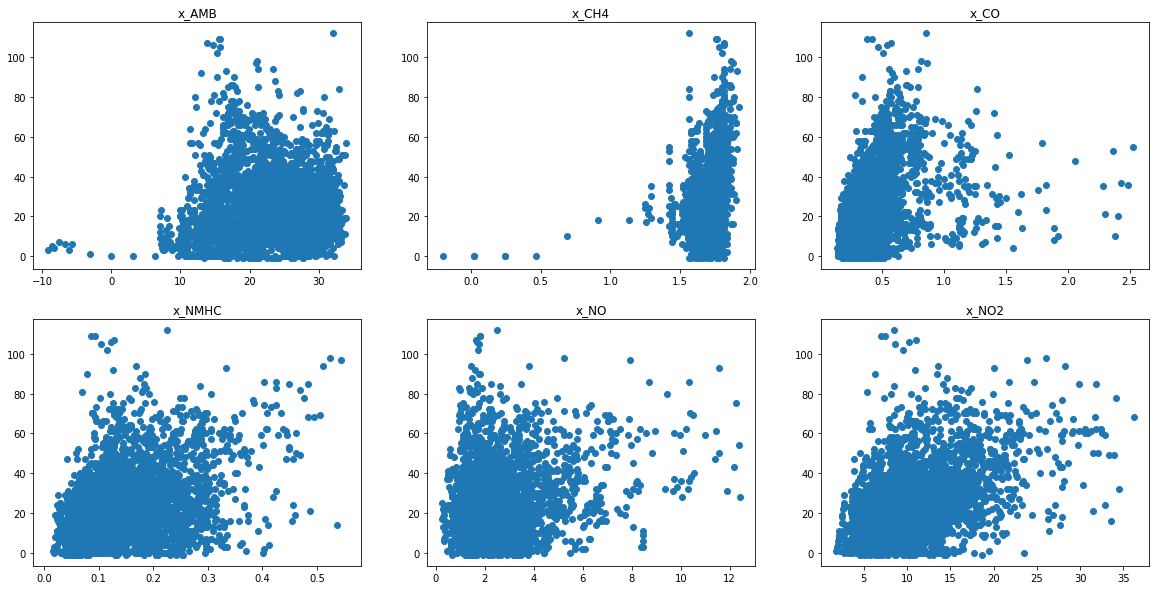

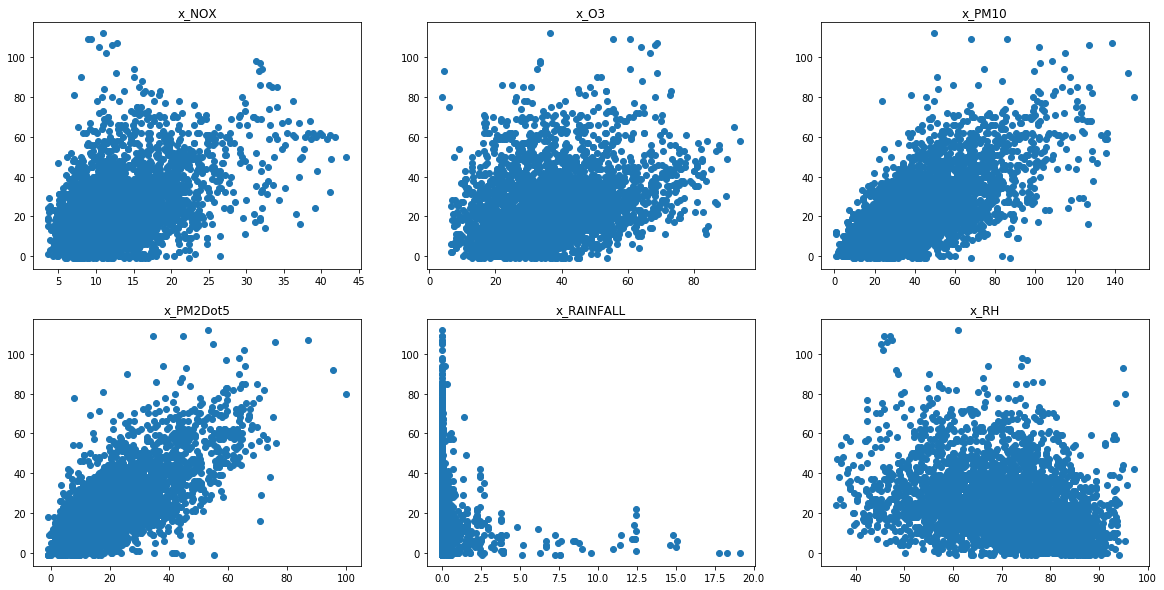

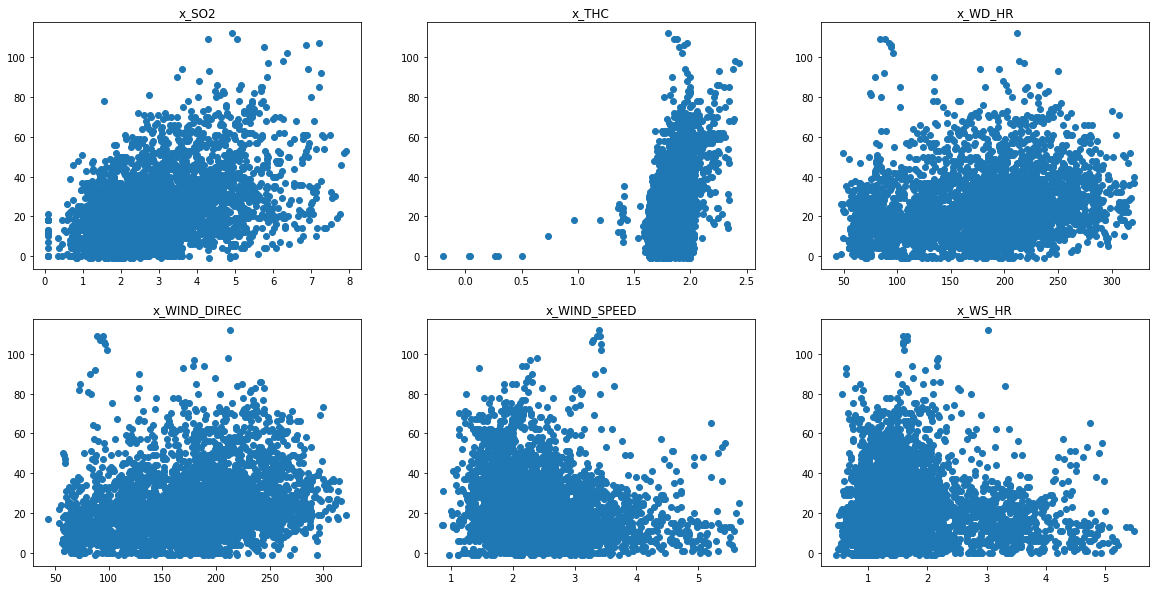

In [4]:
# 绘制散点图
plt.figure(num = '1',figsize=(20,10))
# x_AMB
plt.subplot(2,3,1)
plt.title('x_AMB')
plt.scatter(x_AMB,y)
# x_CH4
plt.subplot(2,3,2)
plt.title('x_CH4')
plt.scatter(x_CH4,y)
# x_CO
plt.subplot(2,3,3)
plt.title('x_CO')
plt.scatter(x_CO,y)
# x_NMHC
plt.subplot(2,3,4)
plt.title('x_NMHC')
plt.scatter(x_NMHC,y)
# x_NO
plt.subplot(2,3,5)
plt.title('x_NO')
plt.scatter(x_NO,y)
# x_NO2
plt.subplot(2,3,6)
plt.title('x_NO2')
plt.scatter(x_NO2,y)

plt.figure(num = '2',figsize=(20,10))
# x_NOX
plt.subplot(2,3,1)
plt.title('x_NOX')
plt.scatter(x_NOX,y)
# x_O3
plt.subplot(2,3,2)
plt.title('x_O3')
plt.scatter(x_O3,y)
# x_PM10
plt.subplot(2,3,3)
plt.title('x_PM10')
plt.scatter(x_PM10,y)
# x_PM2Dot5
plt.subplot(2,3,4)
plt.title('x_PM2Dot5')
plt.scatter(x_PM2Dot5,y)
# x_RAINFALL
plt.subplot(2,3,5)
plt.title('x_RAINFALL')
plt.scatter(x_RAINFALL,y)
# x_RH
plt.subplot(2,3,6)
plt.title('x_RH')
plt.scatter(x_RH,y)

plt.figure(num = '3',figsize=(20,10))
# x_SO2
plt.subplot(2,3,1)
plt.title('x_SO2')
plt.scatter(x_SO2,y)
# x_THC
plt.subplot(2,3,2)
plt.title('x_THC')
plt.scatter(x_THC,y)
# x_WD_HR
plt.subplot(2,3,3)
plt.title('x_WD_HR')
plt.scatter(x_WD_HR,y)
# x_WIND_DIREC
plt.subplot(2,3,4)
plt.title('x_WIND_DIREC')
plt.scatter(x_WIND_DIREC,y)
# x_WIND_SPEED
plt.subplot(2,3,5)
plt.title('x_WIND_SPEED')
plt.scatter(x_WIND_SPEED,y)
# x_WS_HR
plt.subplot(2,3,6)
plt.title('x_WS_HR')
plt.scatter(x_WS_HR,y)


In [5]:
# 整行转换string --> float
def ListTransform(data):
    result = np.array(data,dtype = float)
#     for i in data:
#         result.append(Transform(i))
    return result

# 将一天的数据转化为二维数组
def GetOneGroupData(data, dic):
    x = ListTransform(data.iloc[dic[0]])
    for key in dic:
        if key == 0:
            continue
        temp = data.iloc[dic[key]]
        x = np.vstack([x, ListTransform(temp)])
#     result = np.array(x)
    return x


# 根据以上散点图确定特征 PM2.5 PM10 SO2
''' 数据初始化 '''
feature_num = 3
iteration_count = 10000  # 迭代次数10000
learning_rate = 0.0000001 #学习率

# 类别索引字典
classical_index_dict = {0:8,1:9,2:12} # 所使用的特征对应的pandas数据中的位置
example_nums = 100  # 随机抽取的数据组数
b = 0.0001 
w = np.full((feature_num,9),0.001)
loss_history = []
# print(w.shape)

temp = GetOneGroupData(X_Train[0],classical_index_dict)
print(temp)
# print(type(temp[0][0]))


[[56.  50.  48.  35.  25.  12.   4.   2.  11. ]
 [26.  39.  36.  35.  31.  28.  25.  20.  19. ]
 [ 1.8  2.   1.7  1.6  1.9  1.4  1.5  1.6  5.1]]


In [6]:
ad_b_grand = 0.
ad_w_grand = 0.

start = time.time()
for i in range(iteration_count):
    print('*** ',i,' ***')
    grand_b = 0.
    grand_w = np.zeros((feature_num,9))
    loss = 0.
    examples = list(np.random.randint(0, len(X_Train)-1) for index in range(example_nums))
    for j in examples:
        onegroup_data = GetOneGroupData(X_Train[j], classical_index_dict)
        dis = b + np.sum(onegroup_data * w) - Y_Train[j]
        
        loss += dis**2
        grand_b +=  dis
        grand_w +=  dis * onegroup_data  
# print('loss: ',loss)
# print('grand_b: ',grand_b)
# print('grand_w: ',grand_w)

    loss_history.append(loss/2)
#     ad_b_grand += grand_b**2
#     ad_w_grand += np.sum(grand_w**2)
#     b -= 0.05/math.sqrt(ad_b_grand/(i+1)) * grand_b
#     w -= 0.05/math.sqrt(ad_w_grand/(i+1)) * grand_w
    b -= learning_rate * grand_b
    w -= learning_rate * grand_w
    print('b',b)
    print('w',w)
    
end = time.time()
print('spend time: ',end - start)

***  0  ***
b 0.00033966822
w [[0.01281338 0.01357318 0.01404152 0.01381285 0.01475391 0.01528552
  0.01551028 0.01611745 0.01637993]
 [0.00725421 0.00760102 0.00788112 0.00794222 0.00839703 0.00846084
  0.00849862 0.00905446 0.00943205]
 [0.0017573  0.00182866 0.00179092 0.00173644 0.0017522  0.00180952
  0.00194239 0.00188386 0.00186191]]
***  1  ***
b 0.00048743571173608146
w [[0.01966542 0.02038493 0.02091906 0.0208305  0.02225768 0.02304585
  0.02347968 0.02434055 0.02482271]
 [0.01055903 0.01097085 0.01121535 0.01157346 0.01216739 0.01249365
  0.0125575  0.01360587 0.01419084]
 [0.00219027 0.0022564  0.00221899 0.00225033 0.00229288 0.00229148
  0.00239051 0.00230504 0.00230715]]
***  2  ***
b 0.0006319381750235864
w [[0.02568102 0.02667829 0.02761566 0.02775381 0.02961188 0.03068537
  0.03172156 0.03325586 0.03451012]
 [0.01371639 0.01444129 0.01463731 0.01511348 0.01575831 0.01632175
  0.0168011  0.01861108 0.01999413]
 [0.00257205 0.00263389 0.00266505 0.00267791 0.00275742 0.

b 0.000996145445353824
w [[0.0286654  0.02883445 0.02938806 0.03123715 0.03577547 0.04324878
  0.05292742 0.06478863 0.07706627]
 [0.01903148 0.01871233 0.01928299 0.02019266 0.02257684 0.02680401
  0.03249321 0.04519105 0.05689687]
 [0.00269293 0.00295207 0.00321355 0.00335421 0.00373696 0.00419177
  0.00479593 0.0054617  0.00571088]]
***  30  ***
b 0.0010026487909466073
w [[0.02851829 0.0286729  0.02908506 0.0310263  0.03552497 0.04318179
  0.05310802 0.06519664 0.07757898]
 [0.01909911 0.01878055 0.01925672 0.0202314  0.02266188 0.02707867
  0.03291191 0.0459532  0.05783246]
 [0.00266388 0.00291707 0.00318389 0.00333112 0.00376862 0.00424101
  0.0048381  0.00553093 0.005748  ]]
***  31  ***
b 0.0010170739170890393
w [[0.02893159 0.02891234 0.02908869 0.03090164 0.03540478 0.04335285
  0.0536002  0.06612126 0.0792326 ]
 [0.01937456 0.01898395 0.01936059 0.02029776 0.02286909 0.02754532
  0.03364302 0.0470532  0.05935487]
 [0.00268709 0.00293199 0.00319953 0.00333369 0.00379341 0.0043

b 0.0011281994777922202
w [[0.02174998 0.019674   0.01903408 0.02160866 0.02759514 0.03843664
  0.05358868 0.07363391 0.09728083]
 [0.01995468 0.01839337 0.01805951 0.0190482  0.02228479 0.02985328
  0.03944113 0.06256746 0.08395035]
 [0.00229671 0.00271481 0.0029407  0.00325925 0.00392929 0.00478245
  0.00590483 0.00707808 0.00752861]]
***  56  ***
b 0.0011199030114072263
w [[0.02135567 0.01918699 0.01820714 0.02063257 0.0265258  0.03749244
  0.05283811 0.07295178 0.09701276]
 [0.01971241 0.01812244 0.01771685 0.01865457 0.02192511 0.02956636
  0.03924417 0.06260642 0.08437582]
 [0.00223051 0.00265114 0.00285788 0.00317725 0.00384528 0.00473292
  0.00584055 0.00703519 0.00751434]]
***  57  ***
b 0.0011376099808616217
w [[0.02216767 0.01997424 0.01895646 0.02134173 0.02731214 0.03848361
  0.05412131 0.07449706 0.09882031]
 [0.02020052 0.01865291 0.0181373  0.01913283 0.02243265 0.03020673
  0.03998655 0.0637171  0.08583953]
 [0.00226111 0.00269126 0.00290396 0.00321535 0.00390897 0.004

b 0.001150059182443633
w [[0.01465971 0.01203103 0.01017151 0.01255093 0.02014492 0.03259161
  0.05066512 0.07678023 0.11029365]
 [0.01963151 0.0187502  0.01734365 0.01820432 0.02146425 0.0304333
  0.04194629 0.07388858 0.10426313]
 [0.00180687 0.0024311  0.00267942 0.00308324 0.00388437 0.00491158
  0.00634013 0.00801845 0.00898705]]
***  80  ***
b 0.001151727179469137
w [[0.01479377 0.01200866 0.00996974 0.01236492 0.02027467 0.03313131
  0.05136267 0.07767725 0.1113453 ]
 [0.01995504 0.01895159 0.0175147  0.01846993 0.02190149 0.0309435
  0.04246804 0.07470897 0.10545079]
 [0.00178905 0.00242228 0.00269038 0.00309145 0.00390818 0.00493228
  0.00636528 0.00806617 0.0090672 ]]
***  81  ***
b 0.001154969332186485
w [[0.01513096 0.01233039 0.00996629 0.01262681 0.02039994 0.03353314
  0.05174241 0.07846978 0.11263221]
 [0.0204981  0.01945112 0.01799213 0.01889409 0.02218919 0.03117852
  0.04280275 0.07542109 0.10663289]
 [0.00178483 0.0024211  0.00267584 0.00307767 0.00390506 0.00492472

b 0.0012134100324101586
w [[0.01264816 0.0096362  0.00530078 0.00525016 0.01278784 0.02793186
  0.04975882 0.08078511 0.12278321]
 [0.0220495  0.01959379 0.0168737  0.01740464 0.02104687 0.03193332
  0.04566177 0.08685565 0.12696157]
 [0.00133946 0.00210961 0.002276   0.00276664 0.00374137 0.00508708
  0.00703352 0.00913666 0.01047474]]
***  108  ***
b 0.0012162482111022822
w [[0.01253953 0.0094358  0.00505037 0.00479604 0.01228908 0.02775133
  0.0498474  0.08105624 0.12329205]
 [0.02224763 0.01968253 0.01692989 0.01736694 0.02108223 0.03203005
  0.04599937 0.08741948 0.12801261]
 [0.00135123 0.0021109  0.00227839 0.00274957 0.00374973 0.00510661
  0.00705472 0.00917548 0.01053254]]
***  109  ***
b 0.0012178523665376992
w [[0.01217821 0.00932318 0.00496427 0.00449509 0.01163297 0.02720507
  0.04948893 0.08102519 0.123372  ]
 [0.02215836 0.01950717 0.01674752 0.01717728 0.02094245 0.03198342
  0.04606121 0.08772386 0.12870056]
 [0.00134572 0.00211348 0.00226824 0.00273364 0.00376436 0.0

b 0.0012976092103344893
w [[ 0.00695944  0.00373518 -0.00128854 -0.00124932  0.00599817  0.02332916
   0.04593858  0.08407792  0.13515469]
 [ 0.02318278  0.02007457  0.01743738  0.01755813  0.02099658  0.0332788
   0.04870301  0.09981148  0.15143282]
 [ 0.00104619  0.00207337  0.00226177  0.00289312  0.00394687  0.00550607
   0.00776559  0.01036639  0.01214807]]
***  141  ***
b 0.001293057174918202
w [[ 0.00650929  0.00350549 -0.00146231 -0.00138796  0.0059154   0.02340451
   0.04605731  0.08411131  0.13531016]
 [ 0.02316368  0.02010794  0.01759206  0.01768608  0.02114515  0.03337774
   0.04884694  0.10017516  0.15219811]
 [ 0.00102739  0.00206257  0.00225291  0.00290899  0.00397057  0.00551169
   0.00778179  0.01040799  0.01219481]]
***  142  ***
b 0.0013005464843365766
w [[ 0.00659942  0.00367162 -0.00114285 -0.00112947  0.00611419  0.0234135
   0.0461929   0.08460699  0.1364505 ]
 [ 0.02343903  0.02041485  0.01781761  0.0178305   0.0211332   0.03342073
   0.04900698  0.10074994  0.1

b 0.0013372496087739121
w [[ 0.00416633  0.00143692 -0.00437634 -0.00490494  0.00099618  0.01881579
   0.04322744  0.08578473  0.143153  ]
 [ 0.02446614  0.02084231  0.01761184  0.01732277  0.02011619  0.03321978
   0.05007996  0.10860237  0.16759034]
 [ 0.00079287  0.0018714   0.00206686  0.00277093  0.00390432  0.00565265
   0.00818863  0.01108337  0.01302296]]
***  165  ***
b 0.0013308924900680332
w [[ 0.0041143   0.00147336 -0.00447686 -0.00517209  0.0008296   0.01854456
   0.04309692  0.08560029  0.14306694]
 [ 0.02439615  0.02076174  0.01755433  0.0173709   0.02022677  0.03326773
   0.05013883  0.1088237   0.16810316]
 [ 0.00078315  0.00184898  0.00204761  0.00276282  0.00389523  0.00563932
   0.00816549  0.01105707  0.01302887]]
***  166  ***
b 0.0013248569248495857
w [[ 3.39049963e-03  9.26302470e-04 -5.09483086e-03 -5.77304965e-03
   7.55050673e-05  1.77392780e-02  4.23298341e-02  8.50134283e-02
   1.42835554e-01]
 [ 2.42429058e-02  2.04903104e-02  1.72849092e-02  1.70966225e-

b 0.0013937189750667278
w [[ 0.00301917  0.000981   -0.0060115  -0.00828471 -0.00392068  0.01316277
   0.03752459  0.08191621  0.14505917]
 [ 0.02545599  0.02196007  0.01792388  0.01743491  0.019724    0.03340124
   0.05033244  0.11504591  0.18080421]
 [ 0.00063257  0.0018582   0.0019377   0.00255227  0.00384715  0.00569096
   0.00835444  0.01179331  0.01392373]]
***  188  ***
b 0.0013998947742101964
w [[ 0.00333099  0.00120623 -0.00583588 -0.00820078 -0.00385066  0.01327196
   0.03758479  0.08208943  0.14531997]
 [ 0.02566563  0.0220393   0.01797273  0.01739577  0.0196413   0.03335131
   0.05038771  0.11538326  0.18141289]
 [ 0.0006294   0.00184554  0.00193307  0.0025603   0.00386883  0.00571068
   0.00839354  0.01186209  0.01398458]]
***  189  ***
b 0.0014056606110605966
w [[ 0.00308889  0.00092213 -0.00626133 -0.00852614 -0.00417848  0.01295716
   0.03702194  0.0817174   0.1451019 ]
 [ 0.02575905  0.0220756   0.01798722  0.01738414  0.01955789  0.03325546
   0.05026669  0.11548986  

b 0.001461715396403035
w [[ 2.02876483e-03 -8.96226674e-05 -8.73628130e-03 -1.05808498e-02
  -7.51158504e-03  1.04645283e-02  3.40330265e-02  8.11413331e-02
   1.49708970e-01]
 [ 2.71792495e-02  2.30049037e-02  1.84922853e-02  1.76986860e-02
   1.95658365e-02  3.32380329e-02  5.07262280e-02  1.21446186e-01
   1.94042730e-01]
 [ 4.27851565e-04  1.79844037e-03  1.90442471e-03  2.63466963e-03
   3.98627325e-03  5.84737896e-03  8.81981738e-03  1.26501303e-02
   1.51386377e-02]]
***  209  ***
b 0.00145491112420621
w [[ 0.00163436 -0.00074002 -0.0096477  -0.01150453 -0.00847273  0.00945457
   0.03288613  0.08011731  0.1491801 ]
 [ 0.02705691  0.02276328  0.01815417  0.01729214  0.0192021   0.03299129
   0.05043311  0.1213811   0.19424998]
 [ 0.00037108  0.00176228  0.00186272  0.00258684  0.00393081  0.00578314
   0.00875404  0.01260851  0.01513183]]
***  210  ***
b 0.0014749035683379937
w [[ 0.00287905  0.00046028 -0.00858111 -0.0105135  -0.0075005   0.0104113
   0.03379274  0.08122418  0.1

b 0.0015441603997895014
w [[ 0.00347392  0.00121515 -0.00938937 -0.01173402 -0.00861978  0.009023
   0.03068401  0.0793308   0.15456402]
 [ 0.02870907  0.02455908  0.01944862  0.0182327   0.01997021  0.03327863
   0.05049007  0.12703805  0.20830898]
 [ 0.00027676  0.00178241  0.00189586  0.0027348   0.00416635  0.00616157
   0.00909761  0.01338938  0.01638236]]
***  233  ***
b 0.0015446811367636473
w [[ 0.00338421  0.00111087 -0.00966646 -0.01210824 -0.00898686  0.00874375
   0.03035977  0.07917051  0.15479118]
 [ 0.02884584  0.02462723  0.01944602  0.01830836  0.02004181  0.03346897
   0.05057789  0.12748237  0.20901558]
 [ 0.00025849  0.00175844  0.00186439  0.00270694  0.0041546   0.00615113
   0.00908384  0.01340105  0.01641703]]
***  234  ***
b 0.0015418639734731778
w [[ 0.00311125  0.00091424 -0.0098723  -0.01242086 -0.00929217  0.00851274
   0.03012288  0.07916249  0.15488031]
 [ 0.02884957  0.02455551  0.01934012  0.01806555  0.01982466  0.03327363
   0.05042168  0.1275623   0.

b 0.0015996587524042614
w [[ 4.60421545e-03  1.37613825e-03 -9.62736775e-03 -1.37547717e-02
  -1.10111339e-02  6.30166651e-03  2.79808122e-02  7.89757529e-02
   1.59077532e-01]
 [ 3.01902975e-02  2.58772629e-02  2.04940917e-02  1.87740802e-02
   2.00239662e-02  3.40411384e-02  5.09825674e-02  1.33203617e-01
   2.20604545e-01]
 [ 1.62526985e-04  1.67765966e-03  1.72093934e-03  2.56884647e-03
   4.17260142e-03  6.31287717e-03  9.37473285e-03  1.39454625e-02
   1.70962512e-02]]
***  255  ***
b 0.0016164570012370772
w [[ 5.04274512e-03  1.98442986e-03 -9.11742476e-03 -1.30527505e-02
  -1.03205722e-02  7.00467362e-03  2.84014489e-02  7.93630078e-02
   1.59785470e-01]
 [ 3.04658185e-02  2.61265986e-02  2.08715265e-02  1.91178219e-02
   2.03474742e-02  3.42886315e-02  5.11116461e-02  1.33569180e-01
   2.21379502e-01]
 [ 2.02883056e-04  1.72135581e-03  1.76420201e-03  2.63863393e-03
   4.22738323e-03  6.36285857e-03  9.44352288e-03  1.40201628e-02
   1.71607413e-02]]
***  256  ***
b 0.00160673

b 0.0016413480314785625
w [[ 2.83047476e-03  6.77439754e-04 -1.12212100e-02 -1.59634998e-02
  -1.39771921e-02  3.20684544e-03  2.42236764e-02  7.60764858e-02
   1.60923193e-01]
 [ 3.07954840e-02  2.59815402e-02  2.01503022e-02  1.81837871e-02
   1.89186646e-02  3.26982308e-02  4.90945554e-02  1.36091537e-01
   2.30689876e-01]
 [-2.48127324e-05  1.55462869e-03  1.59338753e-03  2.50166074e-03
   4.08597020e-03  6.23534082e-03  9.53312612e-03  1.43199516e-02
   1.78157533e-02]]
***  275  ***
b 0.0016470021494328505
w [[ 2.96162812e-03  7.62014768e-04 -1.11621901e-02 -1.59955260e-02
  -1.40653990e-02  3.23672627e-03  2.41746315e-02  7.61382168e-02
   1.61213612e-01]
 [ 3.08576250e-02  2.60202139e-02  2.01990609e-02  1.82252781e-02
   1.89085233e-02  3.26160460e-02  4.90750332e-02  1.36353959e-01
   2.31274078e-01]
 [-9.16296920e-06  1.56133912e-03  1.61083451e-03  2.52708683e-03
   4.12356975e-03  6.30422213e-03  9.56023899e-03  1.43670280e-02
   1.78600851e-02]]
***  276  ***
b 0.00165815

b 0.0017228721414502969
w [[ 3.86772924e-03  1.64006162e-03 -1.11677431e-02 -1.64013375e-02
  -1.53790819e-02  1.39040462e-03  2.09637938e-02  7.48735282e-02
   1.64336665e-01]
 [ 3.16798717e-02  2.71115035e-02  2.13552274e-02  1.88676240e-02
   1.87739199e-02  3.25759508e-02  4.85654362e-02  1.41509714e-01
   2.43161832e-01]
 [-7.57872997e-05  1.60543850e-03  1.72774538e-03  2.69336190e-03
   4.30961598e-03  6.54425461e-03  1.01134260e-02  1.50175981e-02
   1.87903767e-02]]
***  298  ***
b 0.0017252951818009128
w [[ 3.84820909e-03  1.67850369e-03 -1.09555019e-02 -1.62142701e-02
  -1.50280143e-02  1.62331478e-03  2.12725909e-02  7.50648679e-02
   1.64739530e-01]
 [ 3.17255838e-02  2.72089097e-02  2.15071286e-02  1.90780225e-02
   1.89991183e-02  3.27435684e-02  4.87978656e-02  1.41898685e-01
   2.43807029e-01]
 [-9.33118503e-05  1.59337584e-03  1.74983122e-03  2.72914793e-03
   4.34111106e-03  6.54572357e-03  1.01217597e-02  1.50562667e-02
   1.88371462e-02]]
***  299  ***
b 0.00173325

b 0.001758771620056113
w [[ 0.00165443 -0.00037326 -0.01373849 -0.01940801 -0.0186774  -0.00238318
   0.01550654  0.06971362  0.16367794]
 [ 0.0317091   0.02714848  0.02113093  0.01830621  0.01781503  0.03102337
   0.04627344  0.14479481  0.25407493]
 [-0.00034363  0.00134579  0.00149775  0.00262972  0.00422068  0.00642777
   0.01020014  0.01554185  0.01973254]]
***  324  ***
b 0.0017653734880274433
w [[ 0.00160804 -0.00031916 -0.01359914 -0.01952602 -0.01894861 -0.0029044
   0.01495063  0.06922233  0.16362204]
 [ 0.03176229  0.02717258  0.02109163  0.01831417  0.01764624  0.03083685
   0.04598518  0.14479382  0.25440376]
 [-0.00035759  0.00133153  0.0014868   0.00263152  0.00422211  0.00641384
   0.01018533  0.01556986  0.01976978]]
***  325  ***
b 0.0017594698645202623
w [[ 0.00117842 -0.00077542 -0.01409673 -0.0200848  -0.01950545 -0.00351407
   0.01407982  0.06818496  0.16289422]
 [ 0.03143007  0.0267906   0.02067009  0.01794915  0.01726881  0.03045224
   0.04556292  0.14449649  0.

b 0.0018668006204810353
w [[ 0.00266562  0.00103962 -0.01207465 -0.01871546 -0.01837519 -0.00265499
   0.01404149  0.06936666  0.16805691]
 [ 0.03306894  0.02816427  0.02153068  0.01887399  0.0180244   0.03114297
   0.0456731   0.14892697  0.26521871]
 [-0.00038355  0.00138738  0.00156225  0.00273669  0.0043814   0.00662686
   0.01067589  0.01633915  0.02088237]]
***  348  ***
b 0.001869899142365307
w [[ 0.00248772  0.00107675 -0.01182507 -0.01840672 -0.01802025 -0.0024698
   0.01413229  0.06925061  0.16810755]
 [ 0.03300983  0.02818261  0.02155411  0.01894511  0.01807185  0.03119974
   0.04562952  0.14908963  0.26573311]
 [-0.00037923  0.00138582  0.00157733  0.00275222  0.00438759  0.00661067
   0.01068542  0.01642052  0.02093785]]
***  349  ***
b 0.0018744007854837558
w [[ 0.00227011  0.00097012 -0.01173981 -0.01843785 -0.01817399 -0.00249544
   0.01379519  0.06922231  0.16809107]
 [ 0.03294215  0.02804933  0.02156885  0.01893785  0.01812254  0.03122109
   0.04548941  0.14921079  0.

b 0.0019962929805035982
w [[ 0.0029412   0.0018978  -0.01157967 -0.01878493 -0.01872418 -0.00178014
   0.01257749  0.06889146  0.17183044]
 [ 0.03447361  0.02893601  0.02186477  0.01911685  0.01801524  0.03167615
   0.04485791  0.15554632  0.2802316 ]
 [-0.00059565  0.00123     0.0015162   0.00279798  0.00450837  0.00683659
   0.01107559  0.01732857  0.02220603]]
***  381  ***
b 0.0019864403361103664
w [[ 0.00242908  0.00127318 -0.01240064 -0.01951959 -0.01961139 -0.00258667
   0.01159108  0.0678584   0.17074394]
 [ 0.03425412  0.0286521   0.02156858  0.01879295  0.01764922  0.03126563
   0.04447535  0.15536424  0.28023464]
 [-0.00062744  0.00119769  0.0014842   0.00276207  0.00448232  0.00680169
   0.01104074  0.01730206  0.02218464]]
***  382  ***
b 0.0019880246512763706
w [[ 0.00250922  0.00131474 -0.01240952 -0.01944034 -0.01938805 -0.00229535
   0.01172289  0.06805502  0.17087718]
 [ 0.03413358  0.02854872  0.021447    0.01874227  0.01759941  0.03128129
   0.04449169  0.1555836   

b 0.00201010307230198
w [[ 1.99142848e-04 -3.18865467e-04 -1.48799747e-02 -2.23245079e-02
  -2.30378611e-02 -5.92472829e-03  6.29546984e-03  6.31173276e-02
   1.68903984e-01]
 [ 3.38575901e-02  2.81104308e-02  2.06890090e-02  1.78670488e-02
   1.63022653e-02  2.94435514e-02  4.20653907e-02  1.56819292e-01
   2.87415796e-01]
 [-8.50476405e-04  1.17400352e-03  1.40991992e-03  2.61630691e-03
   4.37849118e-03  6.76010849e-03  1.10201626e-02  1.75310515e-02
   2.27492477e-02]]
***  402  ***
b 0.002016407663877151
w [[ 4.29753596e-04 -9.82031358e-05 -1.44711017e-02 -2.18850619e-02
  -2.24867068e-02 -5.38981824e-03  6.91783787e-03  6.37476067e-02
   1.69369289e-01]
 [ 3.39245278e-02  2.82362491e-02  2.07491890e-02  1.79408651e-02
   1.64820203e-02  2.97400544e-02  4.23285271e-02  1.57265357e-01
   2.87957088e-01]
 [-8.54920340e-04  1.14845991e-03  1.40414586e-03  2.62137456e-03
   4.41422674e-03  6.79025538e-03  1.10571842e-02  1.75847156e-02
   2.28163521e-02]]
***  403  ***
b 0.00201202650

b 0.0020738570027842114
w [[ 0.00030797 -0.00038013 -0.01465871 -0.02206228 -0.02237967 -0.00527644
   0.00562275  0.0625829   0.17064116]
 [ 0.03405476  0.02804932  0.02040839  0.01761269  0.01555728  0.02851053
   0.04054897  0.15933323  0.29539133]
 [-0.00093563  0.00111418  0.00141689  0.00265259  0.0045416   0.00690655
   0.01115243  0.01806503  0.02351086]]
***  422  ***
b 0.0020840512913219275
w [[ 5.08747061e-04 -1.31030016e-04 -1.46433139e-02 -2.20058995e-02
  -2.24016205e-02 -5.13485474e-03  5.60707730e-03  6.24770334e-02
   1.70506572e-01]
 [ 3.39688258e-02  2.79198428e-02  2.02983967e-02  1.76431635e-02
   1.55272280e-02  2.84692107e-02  4.04862701e-02  1.59662195e-01
   2.95997141e-01]
 [-8.97922078e-04  1.15932304e-03  1.45668174e-03  2.69609695e-03
   4.58771759e-03  6.95276950e-03  1.11988815e-02  1.81349660e-02
   2.36072786e-02]]
***  423  ***
b 0.002078199719685757
w [[ 1.39040352e-04 -6.23630589e-04 -1.53763695e-02 -2.26804753e-02
  -2.29505965e-02 -5.57568173e-03  

b 0.0021809105388298088
w [[ 0.00228406  0.00171045 -0.01310361 -0.02020675 -0.02111182 -0.00394308
   0.00398366  0.06114503  0.17105965]
 [ 0.0352269   0.02917576  0.02151471  0.01905113  0.0163806   0.02894259
   0.03953427  0.16246468  0.30406342]
 [-0.00081278  0.00131002  0.00159976  0.00290066  0.00491348  0.00738673
   0.01156791  0.01865098  0.02444025]]
***  442  ***
b 0.0021787599175469084
w [[ 0.00232082  0.00166428 -0.01318524 -0.02030449 -0.0211811  -0.00381931
   0.00405882  0.06132458  0.17144278]
 [ 0.03516162  0.02908399  0.02144379  0.01903575  0.016298    0.02892838
   0.03944683  0.16270346  0.30450113]
 [-0.00081247  0.00133196  0.00160054  0.00290856  0.00492431  0.00740655
   0.01158484  0.01868719  0.02448302]]
***  443  ***
b 0.002161115078670726
w [[ 0.00157935  0.00097726 -0.01389363 -0.02106582 -0.02197989 -0.00474992
   0.00299171  0.0601538   0.17028203]
 [ 0.03474704  0.02867685  0.0210584   0.01861948  0.01583532  0.0284459
   0.03882033  0.16222355  0.

b 0.0022468773187542136
w [[ 3.40075604e-06  9.65763211e-04 -1.37084038e-02 -2.07957838e-02
  -2.25465777e-02 -5.95179135e-03  8.98660494e-04  5.84409645e-02
   1.71271083e-01]
 [ 3.45110730e-02  2.86436871e-02  2.13053177e-02  1.84913539e-02
   1.50561743e-02  2.69814408e-02  3.63122420e-02  1.64031224e-01
   3.11805044e-01]
 [-8.20833773e-04  1.50792985e-03  1.63744924e-03  2.98657811e-03
   5.08118164e-03  7.65120613e-03  1.18823941e-02  1.93098353e-02
   2.53966758e-02]]
***  466  ***
b 0.0022542870545566073
w [[ 0.00047459  0.00131509 -0.01339218 -0.0205165  -0.02202615 -0.00538819
   0.0014828   0.05904453  0.17206194]
 [ 0.03457407  0.02870999  0.02133777  0.01853228  0.01513444  0.0271088
   0.03649316  0.16445911  0.31245117]
 [-0.00081906  0.00150109  0.00163539  0.00298622  0.00510077  0.00768218
   0.01192661  0.01936132  0.02546802]]
***  467  ***
b 0.0022462840186235657
w [[ 0.00038323  0.00124854 -0.01336171 -0.02053292 -0.02212728 -0.00555201
   0.00113303  0.05859816  

b 0.0023010198212286294
w [[ 1.33360255e-04  2.56763600e-03 -1.21518136e-02 -1.89091605e-02
  -2.06603828e-02 -4.38687831e-03  1.13212348e-03  5.82980389e-02
   1.72815548e-01]
 [ 3.53422423e-02  2.98682752e-02  2.22289196e-02  1.92967615e-02
   1.55193965e-02  2.73573541e-02  3.61308268e-02  1.67577297e-01
   3.19330780e-01]
 [-9.38485003e-04  1.51378722e-03  1.64645440e-03  3.05461278e-03
   5.18968307e-03  7.80864510e-03  1.20712725e-02  1.97731054e-02
   2.60403126e-02]]
***  485  ***
b 0.002299194298709003
w [[-2.31062077e-04  2.05969108e-03 -1.26408465e-02 -1.94460801e-02
  -2.10009247e-02 -4.70916799e-03  6.78286211e-04  5.78061905e-02
   1.72582572e-01]
 [ 3.51047387e-02  2.95267556e-02  2.19372325e-02  1.89950691e-02
   1.52966387e-02  2.71719459e-02  3.59121944e-02  1.67641188e-01
   3.19689043e-01]
 [-9.83031454e-04  1.48459950e-03  1.62816632e-03  3.05018924e-03
   5.17251123e-03  7.79298942e-03  1.20694952e-02  1.97816437e-02
   2.60685805e-02]]
***  486  ***
b 0.002298207

b 0.0023824645288621758
w [[ 0.0003981   0.00251507 -0.012522   -0.02047715 -0.02272037 -0.00628862
  -0.00212607  0.05629538  0.1738523 ]
 [ 0.03519358  0.02940996  0.02144125  0.01835901  0.01444039  0.02563977
   0.03351666  0.16917252  0.32783086]
 [-0.0010863   0.00145634  0.00158803  0.00302951  0.00516117  0.00778823
   0.01228126  0.02042153  0.02693829]]
***  510  ***
b 0.002399560000575565
w [[ 0.00073582  0.00290374 -0.012082   -0.01977522 -0.02174293 -0.00530723
  -0.00134287  0.05709611  0.17499197]
 [ 0.03531424  0.0294563   0.02155223  0.01851232  0.01470784  0.02591732
   0.03387541  0.16974207  0.32887192]
 [-0.00106996  0.00148276  0.00162125  0.00307291  0.00520019  0.00779732
   0.01231624  0.02046625  0.02701971]]
***  511  ***
b 0.0024089289351895025
w [[ 0.00126313  0.00348667 -0.01150285 -0.01920265 -0.0212022  -0.00478588
  -0.00075485  0.05772938  0.1759932 ]
 [ 0.03563197  0.02975564  0.02183269  0.01875963  0.01496556  0.02608647
   0.03411936  0.17018447  0

b 0.002430099662590858
w [[-0.00132684  0.00122384 -0.01346746 -0.02117639 -0.02332878 -0.00713617
  -0.00444741  0.05435934  0.17581845]
 [ 0.03406678  0.02827623  0.02063338  0.0177743   0.01360771  0.02469187
   0.03146718  0.17189559  0.33747197]
 [-0.00127496  0.00141309  0.00148433  0.00294131  0.00513999  0.00772594
   0.01239071  0.0208758   0.02772432]]
***  536  ***
b 0.0024375333056369576
w [[-0.00106054  0.00145338 -0.01324486 -0.02100613 -0.02323352 -0.00716679
  -0.00444306  0.05444247  0.17599261]
 [ 0.03405577  0.02820601  0.02059169  0.01773845  0.01356414  0.02465979
   0.03146399  0.17213011  0.33787998]
 [-0.00126701  0.00142272  0.00149591  0.00294817  0.00513426  0.00773501
   0.01240685  0.02091559  0.02777925]]
***  537  ***
b 0.0024240303596617706
w [[-0.00170186  0.00068272 -0.01397805 -0.02165039 -0.02398468 -0.00807451
  -0.00556475  0.05341661  0.1750224 ]
 [ 0.03360728  0.02774205  0.02008776  0.01740064  0.01321944  0.02423614
   0.03092238  0.17169625  0

b 0.002500958302719258
w [[-0.00097948  0.00203037 -0.01287616 -0.01994199 -0.02224934 -0.0067093
  -0.00686545  0.05150876  0.17646113]
 [ 0.03567429  0.02917542  0.02091287  0.018324    0.01335052  0.02384395
   0.02866192  0.17418934  0.34732111]
 [-0.00134287  0.00136058  0.00143513  0.00286412  0.00506149  0.00778909
   0.01264015  0.02152496  0.02876364]]
***  565  ***
b 0.002495290052369298
w [[-0.00166531  0.0012995  -0.01353761 -0.02040948 -0.02287035 -0.00758286
  -0.00783438  0.05060886  0.17579509]
 [ 0.03536027  0.02881539  0.0206409   0.01798612  0.0129409   0.02336045
   0.02813099  0.17385281  0.3472645 ]
 [-0.00140045  0.00131947  0.00138991  0.00281052  0.00501509  0.00771504
   0.0126046   0.02150383  0.02874457]]
***  566  ***
b 0.0024968735928352845
w [[-0.00161593  0.00140446 -0.01351806 -0.02043494 -0.02290426 -0.00760707
  -0.00787173  0.05045983  0.17580704]
 [ 0.03536515  0.02882889  0.02066777  0.01803099  0.01290116  0.02328416
   0.02801647  0.1739345   0.3

b 0.002564061505614987
w [[-0.00125046  0.00295904 -0.01198123 -0.01961738 -0.02331136 -0.00888719
  -0.01044627  0.04755935  0.17665203]
 [ 0.0363019   0.02933857  0.02090646  0.01774852  0.01272467  0.02276736
   0.02596435  0.17563132  0.35519458]
 [-0.00141732  0.0015373   0.00147227  0.00295457  0.00517236  0.00783359
   0.01283922  0.02210909  0.02971614]]
***  588  ***
b 0.002550780305337301
w [[-0.00206916  0.00242585 -0.01276571 -0.02028853 -0.0240513  -0.00967034
  -0.01145911  0.04654529  0.17570201]
 [ 0.03575495  0.0289143   0.02039156  0.01723889  0.01224911  0.02230101
   0.02550581  0.17535033  0.35515   ]
 [-0.00147531  0.00148788  0.00141797  0.00289369  0.00511252  0.00778917
   0.01278585  0.02206536  0.02968176]]
***  589  ***
b 0.0025495571994013544
w [[-0.00196202  0.00244048 -0.01279857 -0.02031982 -0.02386436 -0.00943341
  -0.01132701  0.04644366  0.17557606]
 [ 0.03582848  0.02892717  0.02041343  0.01738343  0.01250691  0.02257744
   0.02571949  0.17563325  0.

b 0.0026349155403072185
w [[-0.00217571  0.00217194 -0.01195441 -0.0187872  -0.02174567 -0.00785436
  -0.01120025  0.04583116  0.17789853]
 [ 0.03593745  0.02874092  0.02070991  0.01795811  0.01266497  0.02252686
   0.02454729  0.17813858  0.36364412]
 [-0.00157406  0.00147453  0.00147381  0.00297497  0.00518342  0.00790849
   0.01301787  0.02249224  0.03042007]]
***  612  ***
b 0.0026379096523138357
w [[-0.00199725  0.00235906 -0.01194491 -0.01875407 -0.02180493 -0.00777614
  -0.01128404  0.04567442  0.17773534]
 [ 0.03588533  0.02866706  0.02064772  0.01793163  0.01257505  0.02247656
   0.02432712  0.17813191  0.3638743 ]
 [-0.00155511  0.00149293  0.00149193  0.00298679  0.00520741  0.0079091
   0.01299113  0.02249891  0.03047761]]
***  613  ***
b 0.0026686124121412993
w [[-0.00079229  0.00356533 -0.01060668 -0.017199   -0.02024409 -0.00617683
  -0.0097876   0.04722181  0.17935069]
 [ 0.036377    0.02918909  0.02118058  0.01861029  0.01324413  0.02325712
   0.02502282  0.17900263  0

b 0.0026965053371030695
w [[-0.00286529  0.00273643 -0.01190909 -0.01899167 -0.02231657 -0.00860881
  -0.0144222   0.04249994  0.17762571]
 [ 0.03618454  0.0288022   0.02041368  0.01671105  0.01122783  0.02124185
   0.02177555  0.18023176  0.37303175]
 [-0.00166715  0.00134048  0.00145238  0.00300143  0.00529837  0.00799088
   0.01329652  0.0231014   0.03134878]]
***  641  ***
b 0.0026959602599158777
w [[-0.00334419  0.00214784 -0.01240915 -0.01944602 -0.02269128 -0.00901751
  -0.01505473  0.04196075  0.17683311]
 [ 0.03587337  0.02845941  0.02012888  0.01641362  0.01100113  0.02101264
   0.02138398  0.18003218  0.37285494]
 [-0.00168541  0.00133793  0.00148181  0.00300856  0.0052808   0.00797629
   0.01328279  0.02308628  0.03134499]]
***  642  ***
b 0.002688861850725189
w [[-0.0040919   0.00160227 -0.01295393 -0.01982015 -0.02308268 -0.0092305
  -0.01552075  0.04131704  0.17604202]
 [ 0.03544007  0.02807447  0.01982507  0.01610701  0.01068906  0.02067324
   0.02095965  0.1797289   0.

b 0.002771180221011804
w [[-0.00262955  0.00444128 -0.0098839  -0.01703122 -0.02141824 -0.0081786
  -0.01603204  0.0410102   0.17707781]
 [ 0.03645738  0.02884429  0.02054223  0.01660229  0.01093502  0.02043616
   0.01933394  0.18245104  0.38112861]
 [-0.00182837  0.00132434  0.00139896  0.00298563  0.00527413  0.00801944
   0.01340214  0.02360842  0.03217031]]
***  667  ***
b 0.002770172654723091
w [[-0.0028839   0.00417631 -0.01023683 -0.01748307 -0.02195117 -0.00876044
  -0.01657895  0.04058523  0.17694806]
 [ 0.03649016  0.02881202  0.02051387  0.01635437  0.01068234  0.02006032
   0.01902826  0.18229539  0.38124723]
 [-0.00187317  0.0012985   0.00135452  0.00294114  0.00522437  0.00800892
   0.01338958  0.02360352  0.0321941 ]]
***  668  ***
b 0.0027615182451361684
w [[-0.00333599  0.00366877 -0.01074402 -0.018172   -0.02275895 -0.00961329
  -0.01744896  0.03956868  0.17599697]
 [ 0.03639578  0.02870716  0.02038256  0.01612097  0.01034904  0.01968524
   0.01862735  0.18200955  0.3

b 0.002809527570054166
w [[-0.0033687   0.00391132 -0.01058354 -0.01840986 -0.02295321 -0.00956882
  -0.01904481  0.0368106   0.17602009]
 [ 0.03629931  0.02810945  0.02042392  0.0158073   0.00971676  0.01861197
   0.01602561  0.1834196   0.38962793]
 [-0.00206496  0.00121097  0.00126303  0.00288346  0.00514239  0.00794409
   0.0134658   0.02406948  0.03306943]]
***  697  ***
b 0.002819105170276977
w [[-0.00301239  0.00431052 -0.01013083 -0.01790827 -0.02242954 -0.00909379
  -0.01861341  0.0372219   0.17657151]
 [ 0.03643964  0.02826296  0.02068858  0.016096    0.00998701  0.01881881
   0.01615081  0.18365377  0.39003015]
 [-0.0020588   0.00122694  0.00128326  0.00291438  0.00516701  0.00794073
   0.01349126  0.02411637  0.03311561]]
***  698  ***
b 0.0028279007641781842
w [[-0.00302272  0.00435216 -0.01001829 -0.01771773 -0.0221873  -0.00877252
  -0.01832263  0.0374285   0.17679481]
 [ 0.03655414  0.0284077   0.02076692  0.01617975  0.01003125  0.01885499
   0.01616779  0.18376893  0.

b 0.002874486640862467
w [[-0.00269078  0.00465732 -0.00915806 -0.01810085 -0.02299599 -0.01012362
  -0.02001425  0.03561221  0.17669136]
 [ 0.03639524  0.02786153  0.02060512  0.0157105   0.00923479  0.01722998
   0.01325545  0.18377413  0.39545639]
 [-0.00223608  0.00117551  0.00127132  0.00288082  0.00506864  0.00791716
   0.01366772  0.02462927  0.03374443]]
***  720  ***
b 0.0028756267635187817
w [[-0.00249266  0.00480681 -0.00903789 -0.0178281  -0.02268227 -0.00985954
  -0.01987167  0.03573631  0.17694517]
 [ 0.03653299  0.02802307  0.02067636  0.01583207  0.00934605  0.01736463
   0.01326811  0.18394157  0.39577111]
 [-0.0022493   0.00116255  0.00126267  0.00287439  0.00506701  0.00791295
   0.013663    0.02464053  0.03376542]]
***  721  ***
b 0.0028859495109185692
w [[-0.00198202  0.00523565 -0.00860398 -0.0174001  -0.02190958 -0.00914716
  -0.01913717  0.0361691   0.17748122]
 [ 0.0367413   0.02819774  0.0208647   0.01603696  0.00952705  0.01760574
   0.01349195  0.18426249  0

b 0.0029142162574829424
w [[-0.00192726  0.00565983 -0.00893473 -0.01790718 -0.02225145 -0.00956975
  -0.02120625  0.03280466  0.17592791]
 [ 0.03720509  0.02871227  0.02106119  0.01572134  0.00908817  0.01633681
   0.01125775  0.18471124  0.40160358]
 [-0.00233034  0.00117996  0.00122227  0.00285639  0.00508948  0.00789601
   0.01377225  0.02492524  0.03428141]]
***  742  ***
b 0.0029237743125062818
w [[-0.00122466  0.00628443 -0.00840897 -0.01749896 -0.02169909 -0.00900218
  -0.0207132   0.03321122  0.17650103]
 [ 0.03748371  0.02896694  0.02132729  0.01593756  0.00927717  0.01647699
   0.01135842  0.18494455  0.4020913 ]
 [-0.00231111  0.00120391  0.00123771  0.00288143  0.0051192   0.00792839
   0.01381504  0.02498315  0.03433741]]
***  743  ***
b 0.002935706736771944
w [[-0.00065331  0.00685333 -0.00774604 -0.01696047 -0.02103603 -0.00847216
  -0.02013876  0.03360144  0.1769325 ]
 [ 0.03789269  0.02934582  0.02153443  0.01610806  0.00948351  0.01668542
   0.01151652  0.18523295  0

b 0.0030409235891717262
w [[-0.0008619   0.00761882 -0.00671279 -0.01654688 -0.02026254 -0.00813173
  -0.02086107  0.0321793   0.17704511]
 [ 0.0378938   0.02942967  0.02138194  0.01570114  0.0091844   0.01573805
   0.00903439  0.18566901  0.4083441 ]
 [-0.00236335  0.00122733  0.00124447  0.00287175  0.00519599  0.0080212
   0.01395725  0.02551653  0.03510521]]
***  767  ***
b 0.0030194264489551005
w [[-0.00175819  0.00667321 -0.00779138 -0.01787955 -0.02160758 -0.00947315
  -0.0222607   0.03043773  0.17535335]
 [ 0.03736985  0.02885826  0.02084674  0.01517283  0.00856913  0.01508897
   0.00823517  0.18494919  0.40785671]
 [-0.00242274  0.00116302  0.00116069  0.00277711  0.00509557  0.0079156
   0.01383681  0.02542293  0.03503306]]
***  768  ***
b 0.003034097234394979
w [[-0.00096577  0.00770912 -0.00667564 -0.01677597 -0.02031136 -0.00808845
  -0.02088691  0.03177767  0.17657484]
 [ 0.03782365  0.02937251  0.02147711  0.01580144  0.00929781  0.01577257
   0.00891406  0.18569239  0.4

b 0.0030710982239491405
w [[-0.00281311  0.00588809 -0.00766714 -0.01792384 -0.02086968 -0.0087899
  -0.02270174  0.02940848  0.1764261 ]
 [ 0.03658832  0.02811425  0.02035101  0.01485134  0.00848456  0.01467476
   0.00677427  0.18627246  0.41484217]
 [-0.00257248  0.00112167  0.00122941  0.0028355   0.00524182  0.00795968
   0.01391358  0.02587022  0.03576152]]
***  794  ***
b 0.003063149616393836
w [[-0.00297278  0.0055916  -0.00806949 -0.01839108 -0.02141574 -0.00945499
  -0.02349559  0.02866284  0.17576108]
 [ 0.03637476  0.02788592  0.02008525  0.01452489  0.00820001  0.01428491
   0.00634071  0.18581929  0.41464516]
 [-0.00260851  0.00109289  0.00120062  0.00280406  0.0052119   0.00791834
   0.01386269  0.02582651  0.03575991]]
***  795  ***
b 0.0030663354522250537
w [[-0.00319569  0.00556452 -0.00805545 -0.01824174 -0.02122691 -0.00928472
  -0.02328093  0.02885302  0.17580553]
 [ 0.03630977  0.02780906  0.02007879  0.01453427  0.00825227  0.01429544
   0.00627757  0.18581461  0.

b 0.0031565998399779504
w [[-0.00205063  0.00681273 -0.00665323 -0.01682784 -0.01976217 -0.00759317
  -0.02312476  0.02836513  0.17735532]
 [ 0.03709563  0.02822458  0.02036278  0.01487841  0.00864601  0.01452533
   0.00482843  0.18781268  0.42166483]
 [-0.00268517  0.00106393  0.00120973  0.0028412   0.00519875  0.00790821
   0.01398268  0.02625422  0.03640443]]
***  819  ***
b 0.0031526922687011793
w [[-0.00237215  0.00650368 -0.00689317 -0.01715633 -0.01998924 -0.00771095
  -0.02323366  0.02816333  0.17707797]
 [ 0.0368644   0.02802857  0.02020606  0.01477488  0.00855295  0.01440551
   0.00463991  0.18764973  0.42181257]
 [-0.00270556  0.00104375  0.00119404  0.00282335  0.00517862  0.00786534
   0.01395783  0.02625904  0.0364203 ]]
***  820  ***
b 0.003150128675350363
w [[-0.00248669  0.00629944 -0.00709406 -0.01744459 -0.02028295 -0.00806341
  -0.02365556  0.02771047  0.1767111 ]
 [ 0.0369335   0.02806709  0.02016913  0.01470036  0.00839793  0.01426335
   0.0043637   0.18754526  0

b 0.0031952920691008984
w [[-0.00353603  0.00600715 -0.00716281 -0.01788985 -0.02069189 -0.00838615
  -0.02580389  0.0242274   0.17525562]
 [ 0.03622409  0.02750804  0.01990764  0.01445683  0.0079226   0.01284433
   0.00102341  0.1871927   0.42698207]
 [-0.00287189  0.00094775  0.00111373  0.00281733  0.00512415  0.00767276
   0.01375158  0.0264261   0.03690508]]
***  846  ***
b 0.003218549217961337
w [[-0.0026658   0.00692242 -0.00621674 -0.01696079 -0.01958985 -0.00731756
  -0.02461729  0.02542075  0.17680283]
 [ 0.03654016  0.02787219  0.0203013   0.01483412  0.00835511  0.01335703
   0.00155312  0.18797953  0.42810026]
 [-0.00281065  0.00100969  0.00116823  0.0028984   0.00520738  0.00777639
   0.0138416   0.02652032  0.03700422]]
***  847  ***
b 0.003222684007205018
w [[-0.0028614   0.00673607 -0.00635234 -0.01724252 -0.01990317 -0.00766961
  -0.02485701  0.02523733  0.17681746]
 [ 0.03654003  0.0278186   0.02020181  0.01467752  0.00821315  0.01314806
   0.00131854  0.18786328  0.

b 0.0032331004062386465
w [[-5.36882623e-03  4.45537400e-03 -8.06153347e-03 -1.85792909e-02
  -1.94721196e-02 -6.52544046e-03 -2.47688990e-02  2.39545244e-02
   1.76048533e-01]
 [ 3.52149276e-02  2.62725048e-02  1.88339419e-02  1.40588329e-02
   8.06624331e-03  1.30884662e-02  1.70707432e-04  1.88970486e-01
   4.33245320e-01]
 [-3.01388824e-03  8.67851885e-04  1.13722071e-03  2.83989168e-03
   5.17567807e-03  7.80707906e-03  1.38674738e-02  2.68164134e-02
   3.76364415e-02]]
***  868  ***
b 0.003239298083164714
w [[-5.04121905e-03  4.74393466e-03 -7.79743417e-03 -1.82884847e-02
  -1.92629553e-02 -6.29373288e-03 -2.43870834e-02  2.42968519e-02
   1.76390173e-01]
 [ 3.52319812e-02  2.63003017e-02  1.89005532e-02  1.41541831e-02
   8.18786946e-03  1.32507461e-02  2.94163557e-04  1.89159005e-01
   4.33732701e-01]
 [-2.99201969e-03  8.94557133e-04  1.14436438e-03  2.84046365e-03
   5.20043783e-03  7.84914651e-03  1.39385333e-02  2.68650418e-02
   3.76757892e-02]]
***  869  ***
b 0.003252529

b 0.003286664491796729
w [[-0.00644435  0.00351061 -0.00901525 -0.01946705 -0.02046782 -0.00725384
  -0.02715377  0.0212592   0.17425499]
 [ 0.03506039  0.02576429  0.01825693  0.01353685  0.00737481  0.01238747
  -0.00266409  0.18895416  0.43746662]
 [-0.00316284  0.00076858  0.00108356  0.0029019   0.00522877  0.00785341
   0.01387442  0.02698621  0.03803226]]
***  890  ***
b 0.003298247700406067
w [[-0.00643416  0.00356481 -0.008866   -0.0192557  -0.02020026 -0.0069238
  -0.02691679  0.02149782  0.17438225]
 [ 0.03502875  0.02578398  0.01829844  0.0135382   0.00729719  0.01234112
  -0.00275866  0.18902247  0.43780394]
 [-0.00316564  0.00077713  0.00109593  0.00291589  0.0052511   0.00788259
   0.01391621  0.02701443  0.03805654]]
***  891  ***
b 0.0033144467691904192
w [[-0.00632726  0.00394874 -0.00838215 -0.01864557 -0.01972559 -0.00647291
  -0.02646268  0.02191391  0.174868  ]
 [ 0.03531943  0.02604663  0.01853774  0.01373648  0.00743767  0.01268171
  -0.00246491  0.18963576  0.4

b 0.0033874562338256703
w [[-0.00552206  0.00512569 -0.00640149 -0.01659281 -0.01782684 -0.00489749
  -0.02564699  0.02137656  0.17593516]
 [ 0.03583404  0.02632778  0.01892278  0.01424956  0.00765575  0.0127758
  -0.00409917  0.19063862  0.44371517]
 [-0.00318351  0.00093369  0.00118901  0.00307925  0.00541948  0.00809261
   0.01415758  0.02746553  0.03874941]]
***  914  ***
b 0.003388372683117923
w [[-0.0054635   0.00530326 -0.0060981  -0.01627664 -0.01779586 -0.00483145
  -0.02549857  0.02156863  0.17596379]
 [ 0.03586536  0.02633719  0.01897742  0.01436854  0.00778656  0.01286154
  -0.00415409  0.1906505   0.44389318]
 [-0.00316114  0.00095878  0.00121873  0.00309786  0.00543773  0.00811402
   0.01416194  0.02748752  0.03879026]]
***  915  ***
b 0.0033995082668791276
w [[-0.0050973   0.0056204  -0.00556859 -0.0157268  -0.01732478 -0.00420068
  -0.02483794  0.02244236  0.17648471]
 [ 0.03613464  0.02657686  0.01929556  0.01463127  0.00797866  0.01309049
  -0.00395046  0.19103776  0.

b 0.0034492855203838825
w [[-0.00645235  0.00488542 -0.00652538 -0.01692823 -0.01814768 -0.0056799
  -0.02841747  0.01844101  0.17494964]
 [ 0.03615345  0.02623302  0.01852752  0.01371524  0.0072461   0.01154447
  -0.0078703   0.19007236  0.44945962]
 [-0.00326225  0.00092729  0.00122248  0.00312197  0.00546246  0.00814435
   0.01424648  0.02788713  0.03946161]]
***  940  ***
b 0.003462225762857839
w [[-0.00555165  0.00573529 -0.00576214 -0.01602262 -0.01731966 -0.00465139
  -0.02766549  0.01908468  0.17564364]
 [ 0.03676042  0.02667828  0.01899261  0.0141263   0.00767184  0.0119987
  -0.00756732  0.19065323  0.45026972]
 [-0.00322069  0.00098369  0.00127261  0.00316568  0.00549097  0.00818615
   0.0142823   0.02793607  0.03955378]]
***  941  ***
b 0.0034697905568060947
w [[-0.00542264  0.0058652  -0.00556633 -0.01580085 -0.01715208 -0.00446583
  -0.02759278  0.01909999  0.17572873]
 [ 0.03677391  0.0267382   0.01903586  0.01422917  0.0077127   0.0120595
  -0.00760756  0.19067965  0.45

b 0.0035653050033687427
w [[-0.00582547  0.00612568 -0.00543915 -0.01642349 -0.01780429 -0.00586837
  -0.03052157  0.01536864  0.17463348]
 [ 0.03657848  0.02637971  0.0181836   0.0132721   0.00690004  0.01117328
  -0.01102181  0.19076142  0.45549987]
 [-0.0033218   0.00101904  0.00121608  0.00311154  0.0055284   0.00827157
   0.01434524  0.02843107  0.04037893]]
***  969  ***
b 0.003586679663247915
w [[-0.00450215  0.00731382 -0.00449055 -0.01538058 -0.01668973 -0.00480788
  -0.02969807  0.01601315  0.17545503]
 [ 0.03708407  0.02696756  0.01877995  0.01397058  0.00766851  0.01183973
  -0.0104983   0.19130799  0.45643041]
 [-0.0032807   0.00107273  0.00127778  0.00318346  0.00559654  0.00833469
   0.01442258  0.02850753  0.04047445]]
***  970  ***
b 0.0035871237842423184
w [[-0.00495843  0.00683757 -0.00492277 -0.01571749 -0.01677554 -0.00495731
  -0.02979072  0.01586186  0.17541321]
 [ 0.03687671  0.02675311  0.01857208  0.01377311  0.00742884  0.0115508
  -0.01089133  0.19107878  0.

b 0.0036613088729310996
w [[-0.00437164  0.00695866 -0.00424197 -0.01554443 -0.01616075 -0.00492269
  -0.03080349  0.01404408  0.1749087 ]
 [ 0.03681382  0.02624662  0.01779754  0.01315067  0.00710443  0.01141319
  -0.0123901   0.19198965  0.46140008]
 [-0.00333283  0.00108895  0.00122052  0.00322325  0.00563458  0.00838933
   0.01455211  0.02892624  0.04106537]]
***  992  ***
b 0.003662366405479255
w [[-0.00463793  0.00665803 -0.00443649 -0.01581656 -0.01639594 -0.00514929
  -0.03096663  0.01382066  0.17455622]
 [ 0.03669084  0.02609844  0.01764752  0.01290161  0.00687202  0.01117521
  -0.01259758  0.19193995  0.46149384]
 [-0.00333103  0.00109333  0.00119163  0.00317397  0.00559679  0.00836473
   0.01452829  0.02892556  0.04107869]]
***  993  ***
b 0.0036640530985969466
w [[-0.00463304  0.00658352 -0.00458766 -0.0160409  -0.01678198 -0.00565132
  -0.03160788  0.01319654  0.17384307]
 [ 0.03659907  0.02589887  0.01748616  0.01265369  0.0065955   0.01085737
  -0.01301691  0.19166433  0

b 0.0037511309703286157
w [[-0.00284715  0.00775621 -0.00414292 -0.01594697 -0.01631448 -0.00506993
  -0.0321372   0.01276022  0.17485772]
 [ 0.03815175  0.02708609  0.01888528  0.01385579  0.00721002  0.01092256
  -0.01514567  0.19271091  0.4670859 ]
 [-0.00327245  0.00121214  0.00127902  0.00334454  0.00573524  0.00854351
   0.01470919  0.02941083  0.04195783]]
***  1016  ***
b 0.0037454913892119458
w [[-0.00323033  0.00741842 -0.00449196 -0.01636422 -0.0168     -0.00556697
  -0.03263518  0.01215582  0.1742528 ]
 [ 0.03799383  0.02694584  0.01869701  0.01369034  0.00700586  0.01069255
  -0.01545747  0.19244015  0.46703099]
 [-0.00330039  0.00117825  0.00124701  0.00332798  0.0057258   0.00852176
   0.01468427  0.02938767  0.04194527]]
***  1017  ***
b 0.0037562024635705064
w [[-0.00293002  0.00780323 -0.00420416 -0.01608911 -0.01656223 -0.00516318
  -0.03223694  0.01239594  0.17449176]
 [ 0.03813809  0.02705876  0.01885595  0.01385845  0.00721685  0.01094355
  -0.01528826  0.19266888

b 0.003857181503475641
w [[-0.00258986  0.00853606 -0.0036858  -0.01575244 -0.01532674 -0.00275735
  -0.03113379  0.01291862  0.17474306]
 [ 0.03799102  0.02724752  0.0186582   0.01386339  0.00727358  0.01099878
  -0.0175596   0.19329165  0.47286917]
 [-0.00340907  0.00121852  0.00129277  0.0033508   0.00581469  0.0086047
   0.01488354  0.02985133  0.04277024]]
***  1043  ***
b 0.003833573918146347
w [[-0.00374538  0.00733434 -0.00492661 -0.0170679  -0.01679509 -0.00434589
  -0.0330435   0.01090667  0.17261299]
 [ 0.03734947  0.0265729   0.01794788  0.0130412   0.0063975   0.00999412
  -0.01864427  0.19223651  0.4721219 ]
 [-0.00348018  0.00113285  0.00118797  0.00321437  0.00567603  0.00849671
   0.01479598  0.02975914  0.04269103]]
***  1044  ***
b 0.0038393066145173725
w [[-0.00368785  0.00734034 -0.00490874 -0.01722016 -0.01681336 -0.00453111
  -0.03317607  0.01062131  0.17259493]
 [ 0.03746667  0.02652695  0.01786146  0.01282546  0.00628024  0.00984058
  -0.01893169  0.1920268   0

b 0.0038879976831003534
w [[-0.00337492  0.00743604 -0.0050438  -0.01687184 -0.01583578 -0.00305587
  -0.03367775  0.00934834  0.17192751]
 [ 0.03758516  0.02630167  0.01802943  0.01297256  0.0069419   0.00991309
  -0.0205199   0.19272093  0.47736176]
 [-0.00359876  0.0011327   0.00125745  0.00324686  0.00568697  0.0085026
   0.01489205  0.03021061  0.04345789]]
***  1069  ***
b 0.003879951979568023
w [[-0.00379961  0.00697326 -0.00547129 -0.0173369  -0.01616827 -0.00340838
  -0.0342918   0.00844961  0.17115825]
 [ 0.03729511  0.0260419   0.01780722  0.01279959  0.00672393  0.00962024
  -0.02096914  0.19231806  0.47720074]
 [-0.00360507  0.00112492  0.00124631  0.00322724  0.00565082  0.00848174
   0.01487904  0.03020527  0.0434574 ]]
***  1070  ***
b 0.0038970041691805263
w [[-0.00320357  0.00767769 -0.00469704 -0.01661714 -0.01562811 -0.0027813
  -0.03356367  0.0094029   0.17215257]
 [ 0.03756743  0.02640644  0.01814833  0.01314378  0.00694363  0.00987436
  -0.02075171  0.1926838   0

b 0.003949788519224314
w [[-0.00342718  0.00843303 -0.00323286 -0.01519371 -0.0152324  -0.00209863
  -0.03335285  0.0099139   0.17336027]
 [ 0.03731643  0.02587771  0.01768877  0.0126837   0.00712177  0.00987417
  -0.02224076  0.1934115   0.48288036]
 [-0.00360159  0.00128164  0.0013765   0.00345729  0.00582702  0.00865617
   0.01518673  0.03060583  0.04407121]]
***  1093  ***
b 0.003956683671774827
w [[-0.00303795  0.00879712 -0.00286644 -0.01492172 -0.01490301 -0.00176632
  -0.03302598  0.01017901  0.1736243 ]
 [ 0.03757735  0.02611287  0.01792433  0.01289103  0.00732318  0.010097
  -0.02204651  0.19370457  0.48332498]
 [-0.00359985  0.00129082  0.00139637  0.00346813  0.00584039  0.00866675
   0.0151852   0.03061864  0.04409867]]
***  1094  ***
b 0.0039690348287514075
w [[-0.00227522  0.00947831 -0.00215948 -0.01432232 -0.01428711 -0.00106741
  -0.03225671  0.01109086  0.17476481]
 [ 0.03791124  0.02643703  0.01829921  0.01323276  0.00768923  0.01044805
  -0.02173479  0.19420306  0.

b 0.004015777427583731
w [[-0.00383284  0.00770524 -0.00397456 -0.01642351 -0.01577625 -0.00193782
  -0.03401278  0.00921518  0.17402513]
 [ 0.03653746  0.02480432  0.01698111  0.01212546  0.00672834  0.009198
  -0.0245546   0.19372241  0.48786124]
 [-0.00374072  0.00117478  0.00130301  0.00353655  0.00589689  0.00865845
   0.01528963  0.03095795  0.04456045]]
***  1115  ***
b 0.004016717666151315
w [[-0.00422771  0.00757608 -0.00441541 -0.01680838 -0.01627456 -0.00230161
  -0.0342572   0.00902917  0.17394769]
 [ 0.03628323  0.02463882  0.01668409  0.0118103   0.00644958  0.00898089
  -0.02475019  0.19364193  0.48794933]
 [-0.0037622   0.00115979  0.00129745  0.00353534  0.00588303  0.00865002
   0.01529921  0.03096485  0.04457855]]
***  1116  ***
b 0.004019376437595423
w [[-0.00422068  0.00741803 -0.00464172 -0.01721402 -0.01660623 -0.00264747
  -0.03462885  0.00871706  0.1739366 ]
 [ 0.03624692  0.02453982  0.01653307  0.01166415  0.00630013  0.00882901
  -0.02503728  0.19351847  0.4

b 0.004079057736675983
w [[-0.00353838  0.0078615  -0.00468179 -0.01742778 -0.0167941  -0.00291146
  -0.03500825  0.00756566  0.17425717]
 [ 0.0356591   0.02299505  0.01505075  0.01036914  0.00569191  0.00789698
  -0.02744304  0.19321822  0.49250565]
 [-0.00386478  0.00106746  0.00123339  0.00348869  0.00591256  0.00866924
   0.01540402  0.03123525  0.04515121]]
***  1139  ***
b 0.004084799833152335
w [[-0.00378147  0.00771299 -0.00478417 -0.01759965 -0.01693825 -0.00305317
  -0.03537682  0.00704582  0.17366891]
 [ 0.03555867  0.02287012  0.01499482  0.01027436  0.00556681  0.00768194
  -0.02772278  0.1930922   0.49250726]
 [-0.00387241  0.00105842  0.00124169  0.00348707  0.00593721  0.00868601
   0.01542266  0.03125062  0.04516091]]
***  1140  ***
b 0.004082313930249971
w [[-0.00383664  0.00753694 -0.00518241 -0.01814766 -0.01755658 -0.00352159
  -0.0358837   0.0066985   0.17350335]
 [ 0.0355117   0.02273924  0.01478849  0.01001602  0.00533485  0.00744579
  -0.02810013  0.19275021  0

b 0.0041820004800252825
w [[-0.00276258  0.00846496 -0.00409042 -0.01658998 -0.01496481 -0.00070812
  -0.03482268  0.00705207  0.17558203]
 [ 0.03612571  0.02330614  0.01546933  0.01091171  0.00624736  0.00724264
  -0.03047391  0.19339744  0.49901094]
 [-0.00386735  0.00115659  0.00132121  0.00364562  0.00611271  0.00887369
   0.01563245  0.03181366  0.04594376]]
***  1168  ***
b 0.004195134502012246
w [[-2.45316217e-03  8.83199732e-03 -3.83202088e-03 -1.62889235e-02
  -1.46023800e-02 -3.70801883e-04 -3.46344691e-02  7.23348045e-03
   1.75840008e-01]
 [ 3.62565255e-02  2.34849829e-02  1.56300540e-02  1.09475552e-02
   6.23032210e-03  7.20060104e-03 -3.04808542e-02  1.93496684e-01
   4.99400914e-01]
 [-3.84012218e-03  1.17543345e-03  1.34054118e-03  3.67765827e-03
   6.14413820e-03  8.91031858e-03  1.56608831e-02  3.18492687e-02
   4.59769466e-02]]
***  1169  ***
b 0.00418672285491804
w [[-0.0024629   0.00871576 -0.00408777 -0.01669752 -0.01505848 -0.00073556
  -0.03505346  0.00669846  

b 0.004260829538650557
w [[-0.00172988  0.00902593 -0.0037614  -0.01739559 -0.01554602 -0.00087689
  -0.03647787  0.00582751  0.17545387]
 [ 0.03697141  0.0240841   0.01634744  0.01137308  0.00665488  0.00714559
  -0.0333102   0.19383946  0.50521142]
 [-0.00400931  0.00114004  0.00129583  0.00364219  0.00614846  0.00898366
   0.01588022  0.03225673  0.04664845]]
***  1195  ***
b 0.004254933540739041
w [[-0.00210417  0.0085927  -0.00419554 -0.01778844 -0.01601826 -0.00132062
  -0.03688826  0.00547754  0.17508808]
 [ 0.0367492   0.02379696  0.01610022  0.01113562  0.00650727  0.00699228
  -0.03356905  0.19361371  0.5051492 ]
 [-0.00403493  0.00112056  0.00126154  0.00361066  0.00611219  0.00895642
   0.01584785  0.03220178  0.04659276]]
***  1196  ***
b 0.004260377309788863
w [[-0.00197482  0.008756   -0.00406365 -0.01764228 -0.01585373 -0.0011445
  -0.0368608   0.00547106  0.17509474]
 [ 0.03687597  0.0239513   0.01633307  0.01130924  0.00670755  0.00712032
  -0.03358124  0.19363538  0.

b 0.004330443675933077
w [[-0.00211377  0.00810878 -0.00514563 -0.01896358 -0.01673131 -0.00175979
  -0.03835286  0.0039665   0.17444531]
 [ 0.03647537  0.02307259  0.0154347   0.01077827  0.00651013  0.00644814
  -0.03617834  0.19334865  0.50881022]
 [-0.00411995  0.00103243  0.00114552  0.00352924  0.00614574  0.00895205
   0.0159024   0.03242837  0.04714804]]
***  1217  ***
b 0.004342557404024066
w [[-0.00192771  0.00841797 -0.00469058 -0.01844385 -0.01631436 -0.00118983
  -0.03790381  0.00438967  0.17488175]
 [ 0.03669517  0.02329741  0.015743    0.01098387  0.00671837  0.00665367
  -0.03609722  0.19355004  0.50914226]
 [-0.00408814  0.00105263  0.00118862  0.00357201  0.00619422  0.00898108
   0.01589422  0.03244233  0.04719874]]
***  1218  ***
b 0.004358560564053611
w [[-1.61284991e-03  8.94557429e-03 -4.11199540e-03 -1.75817843e-02
  -1.54222481e-02 -2.50122435e-04 -3.69770468e-02  5.43576371e-03
   1.76003565e-01]
 [ 3.68181699e-02  2.34542312e-02  1.60342564e-02  1.13904601e-0

b 0.0044155236018901785
w [[-2.95851335e-03  7.75369448e-03 -4.90720736e-03 -1.82454133e-02
  -1.52763253e-02  3.34479832e-04 -3.77228824e-02  4.17134866e-03
   1.74843598e-01]
 [ 3.56748691e-02  2.26537515e-02  1.52658481e-02  1.11000605e-02
   7.43630835e-03  7.24717801e-03 -3.74453987e-02  1.94089599e-01
   5.13183725e-01]
 [-4.13058320e-03  1.05087767e-03  1.27969279e-03  3.64806296e-03
   6.31563369e-03  9.07292945e-03  1.59882873e-02  3.27228929e-02
   4.77174740e-02]]
***  1239  ***
b 0.00442509194905012
w [[-0.00270037  0.00815504 -0.00452667 -0.01774807 -0.01483584  0.00081168
  -0.0374625   0.00430792  0.17498636]
 [ 0.0357303   0.02272297  0.01530694  0.01117586  0.00757473  0.00745319
  -0.03729541  0.19425141  0.51343099]
 [-0.00413067  0.00105483  0.00128908  0.00366122  0.00633945  0.00909892
   0.01601093  0.03275421  0.0477513 ]]
***  1240  ***
b 0.004428444530620763
w [[-0.00260388  0.00814263 -0.00471275 -0.0180161  -0.01499124  0.00076741
  -0.03744782  0.00423446  

b 0.004521427487011023
w [[-0.00259918  0.0082354  -0.0057215  -0.01830764 -0.01576763  0.00153138
  -0.03797604  0.00285603  0.17344533]
 [ 0.03576081  0.02261639  0.0150068   0.01078087  0.00755384  0.00735485
  -0.03956551  0.19411537  0.51775174]
 [-0.00418359  0.0011052   0.00124302  0.00369773  0.00650308  0.00921334
   0.01612911  0.03313763  0.04832806]]
***  1266  ***
b 0.004527319412099733
w [[-0.00296056  0.0078672  -0.00587724 -0.0184579  -0.01591619  0.00129934
  -0.03805484  0.00289022  0.17351008]
 [ 0.03559815  0.02239094  0.0147718   0.01057114  0.00739027  0.00720428
  -0.03976785  0.1939342   0.51792376]
 [-0.00419249  0.00109844  0.00124004  0.00368916  0.00649727  0.00922172
   0.01619337  0.03318642  0.04835215]]
***  1267  ***
b 0.004547401271024062
w [[-0.00223938  0.00861052 -0.00515665 -0.01775356 -0.01518655  0.00219961
  -0.0372241   0.00364474  0.17416757]
 [ 0.03589217  0.0227062   0.01510595  0.01097872  0.00782817  0.00766828
  -0.0393854   0.19433769  0

b 0.0045879540906528515
w [[-0.00327449  0.00874788 -0.00526838 -0.01746856 -0.01592706  0.00254831
  -0.03859865  0.00154869  0.17054341]
 [ 0.03586047  0.02282131  0.01504349  0.0112136   0.0082201   0.00830213
  -0.04165753  0.19476243  0.52203257]
 [-0.00421374  0.00129416  0.00132406  0.00378782  0.00665488  0.00933429
   0.01630284  0.03348039  0.04896912]]
***  1294  ***
b 0.0045939882617029425
w [[-0.00336402  0.00879068 -0.00529909 -0.0174255  -0.01608451  0.00261715
  -0.03873387  0.00135752  0.17041842]
 [ 0.03562756  0.02266301  0.01486977  0.0110476   0.00806224  0.00816768
  -0.04188373  0.19458894  0.5220381 ]
 [-0.00422948  0.00128951  0.0013194   0.00381147  0.00666961  0.0093502
   0.01633107  0.03351462  0.04900742]]
***  1295  ***
b 0.004596948962690744
w [[-0.00332821  0.00859423 -0.00530848 -0.01756907 -0.01622314  0.00240947
  -0.03894645  0.00132365  0.17063046]
 [ 0.03566882  0.02259135  0.01495058  0.01107279  0.00816643  0.00818274
  -0.04201296  0.19449583  

b 0.004671404556229916
w [[-3.92176045e-03  8.59344889e-03 -4.31063360e-03 -1.61149590e-02
  -1.43442803e-02  4.23889961e-03 -3.88141928e-02  4.11186015e-04
   1.69837402e-01]
 [ 3.54907467e-02  2.26399037e-02  1.51553649e-02  1.14926877e-02
   8.81957180e-03  8.63467967e-03 -4.37227790e-02  1.93939330e-01
   5.25184938e-01]
 [-4.25108330e-03  1.36375422e-03  1.41861481e-03  3.91379877e-03
   6.72970360e-03  9.40875891e-03  1.64054417e-02  3.38038578e-02
   4.94779297e-02]]
***  1317  ***
b 0.00467077827646431
w [[-4.04669826e-03  8.46842104e-03 -4.41986052e-03 -1.63002229e-02
  -1.46245651e-02  3.93636967e-03 -3.92095635e-02 -3.32607386e-05
   1.69356672e-01]
 [ 3.53961163e-02  2.24651191e-02  1.50362386e-02  1.14196742e-02
   8.74847700e-03  8.51316284e-03 -4.39489474e-02  1.93842141e-01
   5.25246663e-01]
 [-4.25438844e-03  1.34819807e-03  1.41282879e-03  3.89810563e-03
   6.70458449e-03  9.38518586e-03  1.63912389e-02  3.37933071e-02
   4.94791110e-02]]
***  1318  ***
b 0.004678522

b 0.0047210040778135455
w [[-0.00357503  0.00893444 -0.00379977 -0.01588676 -0.0135493   0.0056677
  -0.03817115  0.00075914  0.17042146]
 [ 0.03567262  0.02282034  0.01560922  0.01199363  0.00935233  0.00878498
  -0.04551492  0.19346269  0.52812909]
 [-0.00433604  0.00131208  0.00141222  0.00394101  0.00692736  0.0096074
   0.01656508  0.03408871  0.04995097]]
***  1339  ***
b 0.004720902203510935
w [[-0.00355323  0.00915862 -0.0035266  -0.01573696 -0.01349198  0.00573047
  -0.0380755   0.00076127  0.17043843]
 [ 0.03585206  0.02298282  0.01570867  0.01213765  0.00947673  0.00898825
  -0.04539366  0.19369203  0.52844978]
 [-0.00432726  0.00131542  0.00140723  0.0039506   0.00694091  0.00961837
   0.01657641  0.03412475  0.04997285]]
***  1340  ***
b 0.004728521387010241
w [[-0.00304948  0.00961974 -0.00312204 -0.01520132 -0.01288419  0.00634662
  -0.03757065  0.00119838  0.1707846 ]
 [ 0.03618583  0.02324733  0.01597457  0.01238829  0.00977492  0.00926433
  -0.04515553  0.19403428  0.

b 0.004778458157023983
w [[-0.00334103  0.00917986 -0.00376477 -0.01568212 -0.01322641  0.00674288
  -0.03783142  0.00072484  0.1707903 ]
 [ 0.03544469  0.02239408  0.01533185  0.01219419  0.00990445  0.00949264
  -0.04670339  0.19410987  0.53200298]
 [-0.00440084  0.00126336  0.00134118  0.00396004  0.00697259  0.00969261
   0.01675909  0.03439194  0.0503418 ]]
***  1360  ***
b 0.004776946096741521
w [[-3.60189010e-03  8.97978825e-03 -4.02773806e-03 -1.59278418e-02
  -1.34514342e-02  6.50948889e-03 -3.80573465e-02  5.26698757e-04
   1.70694460e-01]
 [ 3.52714121e-02  2.22440456e-02  1.51951536e-02  1.20931298e-02
   9.75849435e-03  9.35058630e-03 -4.68939640e-02  1.94041400e-01
   5.32120471e-01]
 [-4.39996711e-03  1.25442970e-03  1.33172815e-03  3.95277646e-03
   6.97597737e-03  9.69833005e-03  1.67616754e-02  3.44069801e-02
   5.03650335e-02]]
***  1361  ***
b 0.004784230198829851
w [[-0.00350954  0.00926716 -0.00377993 -0.01574987 -0.01360215  0.0063644
  -0.03811354  0.00056599  0

b 0.004822249006723142
w [[-4.52680123e-03  8.81065673e-03 -3.13482037e-03 -1.50223973e-02
  -1.28441839e-02  7.13461369e-03 -3.84027501e-02 -2.58749675e-04
   1.70475529e-01]
 [ 3.44391829e-02  2.14406081e-02  1.51786032e-02  1.20258834e-02
   9.94641427e-03  9.42367125e-03 -4.89540997e-02  1.94053189e-01
   5.35877423e-01]
 [-4.53288752e-03  1.29653259e-03  1.41317597e-03  3.93901050e-03
   7.01842327e-03  9.74470948e-03  1.67879116e-02  3.46418255e-02
   5.09560649e-02]]
***  1383  ***
b 0.004820511862858529
w [[-0.00473109  0.00858155 -0.00348812 -0.01534948 -0.01319367  0.00688442
  -0.03876719 -0.0005493   0.17021478]
 [ 0.0343427   0.02130399  0.01500235  0.01185465  0.00976408  0.00914582
  -0.04935389  0.19373424  0.53583092]
 [-0.00455524  0.00128443  0.00138791  0.003932    0.00701128  0.00973546
   0.01677572  0.03464345  0.05097673]]
***  1384  ***
b 0.004818865842535834
w [[-0.00530149  0.00806081 -0.00413486 -0.01599505 -0.01381726  0.00650429
  -0.03917328 -0.0010253   

b 0.004929809770490346
w [[-0.00522877  0.00851079 -0.00365955 -0.01605593 -0.01291744  0.00771804
  -0.03873067 -0.00186653  0.16952298]
 [ 0.03371568  0.02079489  0.01489166  0.01179159  0.00953925  0.0084941
  -0.05273309  0.19257499  0.5397603 ]
 [-0.00462447  0.00129449  0.00134773  0.00399748  0.00717882  0.00989642
   0.01679342  0.03497584  0.05168862]]
***  1412  ***
b 0.004941003850484924
w [[-0.00481027  0.00895361 -0.00332381 -0.01562417 -0.01238117  0.00828551
  -0.03821854 -0.0013036   0.1703845 ]
 [ 0.03390608  0.02098567  0.01510608  0.01207047  0.00983124  0.00876247
  -0.0526747   0.19270836  0.54030262]
 [-0.00459038  0.00129608  0.00138167  0.0040388   0.00718398  0.00991837
   0.01686902  0.03504465  0.05177734]]
***  1413  ***
b 0.004932935465790574
w [[-0.00555829  0.0083089  -0.00392256 -0.01614986 -0.01297914  0.00761406
  -0.03902516 -0.00213327  0.169762  ]
 [ 0.03367426  0.02069709  0.01480093  0.01172578  0.00953551  0.00841321
  -0.05315869  0.19226554  0.

b 0.004989208469588692
w [[-0.004572    0.00973775 -0.00272393 -0.01522011 -0.01188352  0.00959248
  -0.03829085 -0.0023067   0.16985558]
 [ 0.03356761  0.02078956  0.01540587  0.01270772  0.01081058  0.00930687
  -0.05426918  0.19253125  0.54417956]
 [-0.00461347  0.00130004  0.0013823   0.0040872   0.00725017  0.00996521
   0.01683327  0.03517548  0.05215975]]
***  1435  ***
b 0.004989494604673365
w [[-0.00468514  0.0096643  -0.00296461 -0.01551781 -0.01223534  0.00935241
  -0.03860553 -0.00266258  0.16954151]
 [ 0.03349835  0.0206888   0.01524248  0.01248154  0.01057278  0.00898232
  -0.0547224   0.19216333  0.54415084]
 [-0.00462302  0.00127985  0.00136327  0.00406906  0.00723141  0.00992888
   0.01678677  0.03516319  0.05216383]]
***  1436  ***
b 0.004992726246541521
w [[-0.00495004  0.0094722  -0.00318657 -0.01565846 -0.01240638  0.00932269
  -0.03864793 -0.00269854  0.1694737 ]
 [ 0.03337883  0.02055789  0.01516806  0.01240373  0.01054668  0.00903549
  -0.05480749  0.19216635  0

b 0.005045601810597831
w [[-0.00557892  0.00921937 -0.00332002 -0.01493716 -0.01214771  0.00945272
  -0.04026439 -0.00468452  0.16701586]
 [ 0.03365681  0.02078747  0.0154138   0.0125217   0.0107805   0.00933184
  -0.05644755  0.19233072  0.5468973 ]
 [-0.0047759   0.0013077   0.00131864  0.00420163  0.0073265   0.01003886
   0.01694883  0.03537397  0.05253249]]
***  1457  ***
b 0.005049910476001249
w [[-0.00566758  0.00927921 -0.00317736 -0.01486247 -0.0120962   0.00947089
  -0.04031417 -0.00471034  0.16719204]
 [ 0.03372995  0.02088098  0.01552548  0.01262833  0.01087634  0.00943011
  -0.0564974   0.19226627  0.54703546]
 [-0.00476582  0.00131137  0.00132519  0.00421567  0.00734788  0.01005941
   0.01697029  0.03543138  0.05256185]]
***  1458  ***
b 0.005050029972852345
w [[-0.00581841  0.00903584 -0.00338824 -0.01513192 -0.01225955  0.00927891
  -0.04034127 -0.00482813  0.16714795]
 [ 0.03365005  0.02086474  0.01546784  0.01254405  0.01075644  0.00930195
  -0.05665754  0.19210071  0

b 0.005099147461591446
w [[-0.0055923   0.00974071 -0.00289894 -0.01533269 -0.0125536   0.00933854
  -0.04083532 -0.00749762  0.16491881]
 [ 0.03410459  0.0212412   0.01593194  0.0125071   0.01048914  0.00838845
  -0.05956382  0.19070089  0.54990509]
 [-0.00490925  0.00130945  0.00134011  0.00422493  0.00734413  0.00995717
   0.01695188  0.03570374  0.05315516]]
***  1482  ***
b 0.0051118853482647955
w [[-0.00506837  0.01041784 -0.00223798 -0.01469138 -0.01195499  0.00994262
  -0.04022343 -0.00680072  0.16527946]
 [ 0.03459854  0.02173754  0.0163347   0.01296153  0.01094235  0.00882635
  -0.05922392  0.1910966   0.55020025]
 [-0.00489428  0.00133661  0.0013705   0.00426888  0.00739372  0.00996868
   0.01699491  0.03578009  0.05322322]]
***  1483  ***
b 0.0051160894656003975
w [[-0.00485746  0.01055711 -0.00213017 -0.01473646 -0.01206951  0.00988043
  -0.04024147 -0.00673169  0.16537314]
 [ 0.03471952  0.02184559  0.01649465  0.01310215  0.01107411  0.00892748
  -0.05923478  0.19113743 

b 0.005144612079764781
w [[-0.00520732  0.01015907 -0.00233789 -0.01509709 -0.01193114  0.01112027
  -0.03992332 -0.00779077  0.16388238]
 [ 0.03414875  0.02136515  0.01660751  0.01327309  0.01162626  0.00949823
  -0.06066417  0.19097     0.55359022]
 [-0.00505775  0.00128943  0.00140351  0.00428915  0.00745468  0.01000613
   0.01707252  0.03603364  0.05364916]]
***  1507  ***
b 0.0051329327278880075
w [[-0.00576903  0.00973471 -0.00271196 -0.0154652  -0.01241989  0.0106918
  -0.04031899 -0.00814398  0.16337602]
 [ 0.03383206  0.02109772  0.01646116  0.01317908  0.01151858  0.00934503
  -0.06094517  0.19075048  0.55348821]
 [-0.00508514  0.00125951  0.00138284  0.00427619  0.00743529  0.00999918
   0.01706005  0.03602261  0.05364008]]
***  1508  ***
b 0.005133036258491948
w [[-0.00596953  0.00968707 -0.00288549 -0.01555993 -0.01249975  0.01069602
  -0.04042658 -0.00813342  0.16342568]
 [ 0.03370296  0.02099791  0.01647693  0.01319857  0.01157577  0.00936344
  -0.06105071  0.19082979  0

b 0.0051787585825353345
w [[-0.00611312  0.00965075 -0.00277406 -0.01507474 -0.01152048  0.01270807
  -0.03883137 -0.00694475  0.16436088]
 [ 0.03301688  0.02029185  0.01589766  0.01307501  0.01145035  0.00981016
  -0.06250688  0.19167103  0.55767352]
 [-0.00525101  0.00121247  0.00136344  0.00425726  0.0074876   0.01006324
   0.01716072  0.03633486  0.05419057]]
***  1531  ***
b 0.0051784817954831875
w [[-0.00615613  0.00974233 -0.00289772 -0.01546567 -0.01205767  0.01244221
  -0.03924412 -0.00726082  0.16372255]
 [ 0.03320164  0.02040501  0.01589684  0.01296322  0.01132943  0.00965607
  -0.06273514  0.19151962  0.55753593]
 [-0.00527872  0.00119095  0.00132328  0.00424011  0.00748444  0.01005448
   0.01715106  0.03630287  0.05419092]]
***  1532  ***
b 0.005183153614369185
w [[-0.00632137  0.00964979 -0.00282537 -0.01523354 -0.01177399  0.01267651
  -0.03906406 -0.00699493  0.16389764]
 [ 0.03319617  0.02042529  0.01601728  0.01316072  0.0115987   0.00986124
  -0.06267231  0.19156409 

b 0.005248187371101121
w [[-0.00729463  0.00926654 -0.00394973 -0.0163392  -0.01311274  0.01255787
  -0.03991302 -0.0077801   0.16415957]
 [ 0.03242078  0.01947519  0.01485905  0.01240683  0.01100269  0.00901048
  -0.06593456  0.19017504  0.56073683]
 [-0.00541493  0.00111074  0.00119255  0.00413944  0.00745656  0.01011503
   0.01715658  0.03658521  0.05474308]]
***  1558  ***
b 0.005249497430988905
w [[-0.00746291  0.0090118  -0.00415477 -0.01650385 -0.01318924  0.01240474
  -0.04002909 -0.00795344  0.16395496]
 [ 0.03235979  0.01941091  0.01474362  0.01226163  0.01086386  0.0089547
  -0.06613335  0.19008615  0.56071392]
 [-0.00542094  0.00110063  0.0011794   0.00412743  0.00744859  0.01011742
   0.01714498  0.03656015  0.05472272]]
***  1559  ***
b 0.005262482104257912
w [[-0.00698542  0.00937152 -0.00379305 -0.01618259 -0.01277779  0.01264159
  -0.03992383 -0.00796069  0.16424056]
 [ 0.03268732  0.01970961  0.01509745  0.0126023   0.01117602  0.00915376
  -0.06616355  0.19025024  0.

b 0.005317369836990855
w [[-0.00723779  0.00941445 -0.00317918 -0.01529941 -0.01214995  0.01304813
  -0.03975203 -0.00781042  0.16475708]
 [ 0.03238142  0.01930722  0.01478591  0.01249496  0.01144409  0.00910202
  -0.06772799  0.18982327  0.56415571]
 [-0.00551233  0.00106702  0.00120004  0.00427757  0.00756882  0.01017528
   0.01727275  0.03684992  0.05521723]]
***  1580  ***
b 0.005317373065656789
w [[-0.00741424  0.00916741 -0.00336848 -0.0154344  -0.0122728   0.0128549
  -0.04022302 -0.00833926  0.16417756]
 [ 0.03237998  0.01924339  0.01473135  0.01240849  0.01135283  0.0089791
  -0.06787695  0.18975666  0.56422252]
 [-0.0055287   0.00104509  0.0011812   0.00425373  0.00756187  0.01016862
   0.01726074  0.03685006  0.05524203]]
***  1581  ***
b 0.00531609415181261
w [[-0.00754471  0.00907946 -0.00339405 -0.01546581 -0.01212416  0.01296926
  -0.04017738 -0.00850791  0.16406163]
 [ 0.0322934   0.01918916  0.01473818  0.01242504  0.01137737  0.00894672
  -0.06804831  0.1896057   0.56

b 0.0053506507912100265
w [[-0.00826377  0.00866698 -0.00345564 -0.01532834 -0.01193786  0.01372156
  -0.03964141 -0.00730544  0.16584507]
 [ 0.0319911   0.0189784   0.01441022  0.01234665  0.01150721  0.00903968
  -0.06998397  0.18940676  0.56770542]
 [-0.0056969   0.00095488  0.00114954  0.00433828  0.00765313  0.01018799
   0.01735952  0.03714713  0.05567801]]
***  1604  ***
b 0.005351203631403431
w [[-0.00828772  0.00865836 -0.00348345 -0.01539937 -0.01207956  0.01361394
  -0.0394446  -0.00735885  0.16589415]
 [ 0.03198863  0.01899523  0.01438802  0.01233874  0.01148842  0.00897207
  -0.06997922  0.18938503  0.56792756]
 [-0.00571596  0.00094122  0.00114412  0.00433873  0.00765654  0.01018826
   0.01736863  0.03716158  0.05568322]]
***  1605  ***
b 0.0053429581715011
w [[-0.00878002  0.00816061 -0.00395353 -0.01591584 -0.01273049  0.01303851
  -0.04026269 -0.00828448  0.16483451]
 [ 0.03174703  0.01879109  0.01415105  0.01206559  0.01114904  0.00860063
  -0.07051649  0.18887423  0.

b 0.0054118171200100195
w [[-0.00850443  0.00876789 -0.00371185 -0.01529886 -0.01205355  0.0138877
  -0.0405822  -0.01007977  0.16373505]
 [ 0.03256333  0.01937989  0.01484317  0.01229933  0.01163957  0.0091384
  -0.07237517  0.18951314  0.57210922]
 [-0.00590112  0.000959    0.00104074  0.00425144  0.00759256  0.01022122
   0.01747458  0.03744813  0.05620861]]
***  1633  ***
b 0.005426607406009947
w [[-0.00803759  0.0091542  -0.00328233 -0.01470415 -0.01131475  0.01481174
  -0.03968015 -0.00906352  0.1641502 ]
 [ 0.03279385  0.01958466  0.01513593  0.01259938  0.01195908  0.00947851
  -0.07208035  0.18991571  0.5723735 ]
 [-0.00584674  0.00102543  0.00111956  0.00432274  0.00764882  0.01027674
   0.01752812  0.03749872  0.05626515]]
***  1634  ***
b 0.005434240133740512
w [[-0.0074825   0.00953067 -0.00313876 -0.0145005  -0.01110311  0.01493951
  -0.03981845 -0.00916299  0.16418467]
 [ 0.03320361  0.01992278  0.01538128  0.01289504  0.01223568  0.00969231
  -0.07210921  0.19005102  0.

b 0.005497352448770201
w [[-0.00700323  0.00993004 -0.00271587 -0.0142862  -0.01066545  0.01605465
  -0.038375   -0.00792387  0.1657196 ]
 [ 0.03330437  0.01982038  0.01539571  0.01281216  0.01233023  0.00963401
  -0.07343111  0.19022368  0.57660065]
 [-0.00590507  0.00097624  0.00104949  0.00427889  0.00772495  0.01043697
   0.01774421  0.03784858  0.05685096]]
***  1657  ***
b 0.005503140407351784
w [[-0.00676973  0.01018276 -0.0024821  -0.01397378 -0.01021275  0.01653488
  -0.03799729 -0.00759395  0.16603923]
 [ 0.03339242  0.01992172  0.0155201   0.01296655  0.0125439   0.00991528
  -0.07324997  0.19046542  0.57698582]
 [-0.00589824  0.00099734  0.00107455  0.0043139   0.00776536  0.01046671
   0.01777162  0.0379002   0.05690779]]
***  1658  ***
b 0.005498898828049655
w [[-0.00737997  0.00953566 -0.00319595 -0.01468418 -0.01092855  0.01583923
  -0.0387266  -0.0083373   0.16535712]
 [ 0.0330619   0.01958056  0.01514794  0.01256226  0.01213367  0.00950133
  -0.07372138  0.19011145  0

b 0.005558164470711343
w [[-0.00739151  0.00936938 -0.00371815 -0.01557587 -0.01203331  0.01489319
  -0.04033892 -0.00945598  0.16534448]
 [ 0.03365372  0.01971065  0.01510924  0.01238442  0.0120187   0.0088836
  -0.07706212  0.18876567  0.57971381]
 [-0.00611848  0.00095615  0.00102328  0.00418087  0.00768165  0.01033405
   0.01771033  0.03812263  0.05731598]]
***  1685  ***
b 0.005571623288529729
w [[-0.00678961  0.01007269 -0.00307619 -0.01486741 -0.01145273  0.01561218
  -0.03970164 -0.00865929  0.16632986]
 [ 0.03398553  0.02012812  0.01563907  0.0128681   0.01251647  0.0093441
  -0.07678203  0.18910063  0.58026146]
 [-0.00607654  0.00100594  0.00107626  0.00424213  0.00772758  0.01038578
   0.01780544  0.03819047  0.05738855]]
***  1686  ***
b 0.005572738774380346
w [[-0.00671075  0.01022561 -0.00296453 -0.01472819 -0.01142419  0.01566247
  -0.03968236 -0.00867442  0.16648162]
 [ 0.03408381  0.0202453   0.01576878  0.01293796  0.01255481  0.00929859
  -0.07691864  0.18897984  0.5

b 0.005612471854382714
w [[-0.00875248  0.00850198 -0.00500356 -0.01646168 -0.01284421  0.01537114
  -0.04046774 -0.00972972  0.16500908]
 [ 0.0331356   0.01923225  0.01486099  0.01216208  0.01192784  0.00883565
  -0.07931901  0.18781427  0.58206424]
 [-0.00621159  0.00094285  0.00106747  0.00425286  0.00783587  0.01037846
   0.0177906   0.0384081   0.05782559]]
***  1708  ***
b 0.005623616079841099
w [[-0.00845526  0.00884855 -0.00436515 -0.01589021 -0.01211737  0.01617867
  -0.0396394  -0.0089554   0.16579843]
 [ 0.03327208  0.01943464  0.01515521  0.01246674  0.01236396  0.00938454
  -0.07884347  0.18833605  0.58270906]
 [-0.00620221  0.00096384  0.00109912  0.00430187  0.00788595  0.0104283
   0.01783813  0.03845701  0.05787984]]
***  1709  ***
b 0.005626164419067601
w [[-0.00838109  0.00890456 -0.00419711 -0.01577699 -0.01205752  0.01617579
  -0.0396457  -0.00896308  0.16574691]
 [ 0.03338177  0.01953804  0.01517927  0.01243894  0.01236669  0.00943523
  -0.07882374  0.1884229   0.

b 0.0056569034630452
w [[-0.00720562  0.00981114 -0.003561   -0.01586733 -0.012075    0.01648807
  -0.04019547 -0.01111048  0.16342993]
 [ 0.03379317  0.02019662  0.0156627   0.01270727  0.01243189  0.0097075
  -0.08041968  0.18771826  0.58450493]
 [-0.00632032  0.00089478  0.00102049  0.00423869  0.00792432  0.01050599
   0.01789866  0.0386771   0.05820586]]
***  1730  ***
b 0.0056547806979804355
w [[-0.00749037  0.00947837 -0.00377924 -0.01610125 -0.01235292  0.01622706
  -0.04047822 -0.01144098  0.16316486]
 [ 0.0337019   0.0200547   0.0154798   0.01244906  0.01217815  0.00943534
  -0.0807562   0.18745589  0.58443923]
 [-0.00632674  0.0008961   0.00100831  0.00421545  0.00789092  0.01046778
   0.01788895  0.03866394  0.0581944 ]]
***  1731  ***
b 0.005656356621746633
w [[-0.00715997  0.00981948 -0.00344135 -0.01587367 -0.01191545  0.01667778
  -0.04002947 -0.01117261  0.16335615]
 [ 0.03386772  0.02022268  0.01561185  0.01256504  0.01234031  0.00966128
  -0.080608    0.18765719  0.5

b 0.005700721501630813
w [[-0.00692419  0.01040101 -0.0030416  -0.01564664 -0.01158676  0.01731183
  -0.04016721 -0.01193674  0.16303203]
 [ 0.03416154  0.02035844  0.01603636  0.01289966  0.01284045  0.00960293
  -0.08266933  0.18692878  0.58720216]
 [-0.00642811  0.00086525  0.00102634  0.00425708  0.00795687  0.0104923
   0.01793967  0.03896892  0.05868117]]
***  1752  ***
b 0.0056963987239181165
w [[-0.00739859  0.00995625 -0.00339574 -0.0159644  -0.01191955  0.0171343
  -0.0403432  -0.01220288  0.16281352]
 [ 0.03381367  0.0199815   0.01571784  0.01272581  0.01273909  0.00951452
  -0.0828741   0.18673597  0.58717401]
 [-0.00643867  0.00086109  0.00102545  0.00424995  0.00794394  0.01047552
   0.01791454  0.03893517  0.05866886]]
***  1753  ***
b 0.005690824925964372
w [[-0.00781852  0.00945296 -0.00405749 -0.01664364 -0.01253201  0.01644895
  -0.04113521 -0.01310331  0.16211084]
 [ 0.03357396  0.01966986  0.01539578  0.01238875  0.01241011  0.00919051
  -0.0833074   0.18630186  0.

b 0.0058042124000358955
w [[-0.00685254  0.0102976  -0.00275735 -0.01569039 -0.011865    0.01791222
  -0.03994636 -0.01183725  0.16324388]
 [ 0.034083    0.01989759  0.01571909  0.0125854   0.01279458  0.00966579
  -0.08553066  0.1862967   0.59138201]
 [-0.00650676  0.00089638  0.00112673  0.00440336  0.00813078  0.01059236
   0.01808713  0.03936636  0.05936197]]
***  1784  ***
b 0.005799470961680795
w [[-0.0073057   0.00988454 -0.00299858 -0.01595535 -0.01217941  0.0176563
  -0.04025254 -0.01216292  0.16277586]
 [ 0.03387614  0.01972418  0.01557857  0.01242301  0.01259893  0.00953234
  -0.08581995  0.18601606  0.59123836]
 [-0.00653189  0.00087313  0.00110429  0.00437542  0.008101    0.01058419
   0.01807854  0.03934546  0.05937049]]
***  1785  ***
b 0.005796859578030675
w [[-0.00751206  0.00972692 -0.00313572 -0.01601511 -0.01235777  0.01744575
  -0.04050478 -0.01241021  0.16251366]
 [ 0.03373515  0.0196068   0.01551556  0.01240217  0.01257367  0.00944503
  -0.0860302   0.18588263  0

b 0.00583467662333418
w [[-0.00962226  0.00721915 -0.00520945 -0.01827883 -0.01378763  0.01680048
  -0.04111519 -0.01353697  0.1629791 ]
 [ 0.03241552  0.01809567  0.01414285  0.01136441  0.01134804  0.00820509
  -0.0890009   0.18499754  0.59459321]
 [-0.00678144  0.00068412  0.00089603  0.00424826  0.00802032  0.0105343
   0.01802101  0.0396089   0.05986166]]
***  1807  ***
b 0.0058418884213785865
w [[-0.00923802  0.00767665 -0.00465783 -0.01770599 -0.01320377  0.01727691
  -0.0406934  -0.01313054  0.16342729]
 [ 0.03247808  0.01816351  0.01423659  0.01146091  0.01147191  0.0083459
  -0.0888792   0.18517271  0.59490274]
 [-0.00676533  0.00070188  0.00091987  0.00427888  0.00804588  0.01055861
   0.01805171  0.03966215  0.05989171]]
***  1808  ***
b 0.0058464419850641994
w [[-0.00918303  0.00775745 -0.00451964 -0.01752732 -0.01297775  0.01756196
  -0.04044613 -0.01290936  0.16360162]
 [ 0.03251179  0.01812184  0.01419632  0.01148669  0.0115721   0.00846477
  -0.08882799  0.18529754  0.

b 0.005913294840643
w [[-0.00906725  0.00812118 -0.00443628 -0.01813092 -0.01283417  0.01799292
  -0.04015307 -0.01337055  0.16357382]
 [ 0.03235498  0.01817906  0.01423716  0.01178375  0.01219222  0.00922227
  -0.09059751  0.18509063  0.59840165]
 [-0.00686044  0.00067432  0.00091403  0.00435913  0.00821181  0.01068637
   0.01811864  0.03988147  0.06043289]]
***  1835  ***
b 0.005925745928936417
w [[-0.00852172  0.00872604 -0.00365769 -0.01732397 -0.0120086   0.01875732
  -0.03947962 -0.0126466   0.16383158]
 [ 0.03274225  0.01864556  0.01462194  0.01228892  0.01272252  0.00980917
  -0.09023651  0.18548581  0.59872191]
 [-0.00683925  0.00069745  0.0009401   0.00440006  0.0082653   0.01073448
   0.01816025  0.03992956  0.06051475]]
***  1836  ***
b 0.005931735219307688
w [[-0.0084111   0.00862147 -0.00370563 -0.01737005 -0.01191612  0.01882988
  -0.0393535  -0.01248606  0.16409108]
 [ 0.03281107  0.01865762  0.01456402  0.01223459  0.01270804  0.00981511
  -0.09034411  0.18539197  0.59

b 0.006020495076435977
w [[-0.00871472  0.00887376 -0.00283571 -0.01713037 -0.01140359  0.01963995
  -0.03868431 -0.01258089  0.16511209]
 [ 0.03255611  0.01819539  0.0143995   0.01248743  0.01332064  0.01049777
  -0.09256436  0.18548913  0.60326504]
 [-0.00690333  0.00078143  0.00097485  0.00448591  0.00839034  0.01093367
   0.0183486   0.04026963  0.06114471]]
***  1868  ***
b 0.006020438338927699
w [[-0.00889963  0.00879522 -0.00286049 -0.01723387 -0.01146407  0.01947622
  -0.03863819 -0.0124539   0.16552844]
 [ 0.03251395  0.01812023  0.01426445  0.01235106  0.01317407  0.01035861
  -0.09274756  0.18546854  0.60354791]
 [-0.00691803  0.00076931  0.00096649  0.00446257  0.00839502  0.01094084
   0.018347    0.04029233  0.06118243]]
***  1869  ***
b 0.006030879247750218
w [[-0.00832344  0.0094113  -0.0024347  -0.01678574 -0.01124855  0.01975104
  -0.03856568 -0.0123265   0.16572709]
 [ 0.03305995  0.01856126  0.01466463  0.01262791  0.01339824  0.01066178
  -0.09257016  0.18578977  0

b 0.006041873229701454
w [[-0.00837941  0.00935099 -0.00331304 -0.01781064 -0.01216119  0.01943808
  -0.039508   -0.01418877  0.16342766]
 [ 0.03299899  0.01824498  0.01417486  0.01212529  0.01326334  0.01038519
  -0.09455557  0.18473378  0.60601249]
 [-0.00704318  0.00067277  0.00078492  0.00429084  0.00826234  0.01088444
   0.01833564  0.04036146  0.06151334]]
***  1890  ***
b 0.0060327722922307635
w [[-0.00870204  0.00904888 -0.00364503 -0.01849507 -0.01306782  0.01857099
  -0.04033003 -0.01495631  0.16274145]
 [ 0.03290507  0.01812466  0.01409943  0.01184376  0.01293126  0.01002249
  -0.09504069  0.18433738  0.60578613]
 [-0.00708577  0.0006469   0.00076252  0.00426867  0.00822315  0.01084007
   0.018312    0.04033833  0.06150959]]
***  1891  ***
b 0.0060368775170126536
w [[-0.00845578  0.00942067 -0.00329335 -0.01802498 -0.0125901   0.01911782
  -0.04000963 -0.01469127  0.16292558]
 [ 0.03304048  0.01828344  0.01436641  0.01214061  0.01327587  0.01036375
  -0.09484971  0.18459796 

b 0.006098229283456622
w [[-0.00874364  0.00945726 -0.00241367 -0.01706302 -0.01157354  0.01972502
  -0.03943287 -0.01530963  0.16241304]
 [ 0.03362302  0.01886918  0.01535065  0.01298868  0.01398267  0.01067712
  -0.09643098  0.18541467  0.60967129]
 [-0.00719954  0.00077785  0.00083847  0.00435541  0.00826418  0.01098537
   0.01845781  0.04066041  0.06190594]]
***  1915  ***
b 0.006092727642111138
w [[-0.00896506  0.00921412 -0.00270719 -0.01748348 -0.01206637  0.01915232
  -0.04010386 -0.01597326  0.16167357]
 [ 0.03341176  0.01865558  0.01505523  0.01259484  0.01360447  0.01028781
  -0.09682759  0.18512717  0.60941725]
 [-0.007214    0.00074988  0.00077776  0.00426997  0.0081987   0.010945
   0.0184272   0.04064554  0.06188698]]
***  1916  ***
b 0.006082765118140886
w [[-0.00951163  0.0087253  -0.00314502 -0.01799822 -0.01265688  0.01855358
  -0.04089543 -0.01695755  0.16046217]
 [ 0.03324747  0.01839134  0.01477269  0.01227126  0.01328215  0.00992898
  -0.09730015  0.18476681  0.6

b 0.006119232267933355
w [[-0.00971484  0.00848143 -0.00310245 -0.01851879 -0.01336712  0.01770023
  -0.04199242 -0.02002022  0.15718642]
 [ 0.0332928   0.01853151  0.01489142  0.01235639  0.01356942  0.01040839
  -0.09876832  0.1838465   0.61049807]
 [-0.00730869  0.00068979  0.00062351  0.00411664  0.00803291  0.0109026
   0.01827001  0.04073831  0.06215432]]
***  1937  ***
b 0.006129692848754954
w [[-0.00918501  0.00907467 -0.00246249 -0.01791281 -0.01278126  0.01818356
  -0.04165402 -0.01982467  0.15760459]
 [ 0.03358832  0.01879988  0.01527326  0.01266085  0.01387431  0.01069796
  -0.09871443  0.18402438  0.61079633]
 [-0.00728537  0.00072318  0.00064211  0.00415584  0.00807905  0.01094404
   0.01830911  0.04079075  0.0621988 ]]
***  1938  ***
b 0.006136660690591876
w [[-0.00881528  0.00934485 -0.00225536 -0.0176785  -0.01245231  0.01856668
  -0.04144882 -0.01974279  0.15771192]
 [ 0.03377152  0.01901866  0.01551052  0.01296211  0.01416946  0.01093356
  -0.09869113  0.18409019  0.

b 0.0062002100352601015
w [[-0.00762163  0.01068198 -0.00139909 -0.01712524 -0.01177212  0.01998467
  -0.04041953 -0.01925269  0.15864539]
 [ 0.033921    0.01930592  0.01574152  0.01346866  0.01472906  0.01150364
  -0.1002664   0.18482828  0.61528639]
 [-0.00736754  0.0006688   0.00062752  0.00415315  0.00820301  0.0110125
   0.01831689  0.04110313  0.06276174]]
***  1965  ***
b 0.006195528495992472
w [[-7.90428729e-03  1.04035980e-02 -1.55706344e-03 -1.73621515e-02
  -1.19026651e-02  1.97935966e-02 -4.05909089e-02 -1.96096276e-02
   1.58235860e-01]
 [ 3.37681909e-02  1.91052510e-02  1.55522459e-02  1.32881908e-02
   1.45901072e-02  1.13603163e-02 -1.00429475e-01  1.84621757e-01
   6.15135131e-01]
 [-7.38340584e-03  6.53924126e-04  6.11274578e-04  4.13863701e-03
   8.18830307e-03  1.09900353e-02  1.83068811e-02  4.10975159e-02
   6.27604931e-02]]
***  1966  ***
b 0.006202055096570425
w [[-0.00774252  0.01053327 -0.00135647 -0.01709585 -0.01166583  0.0200219
  -0.04040595 -0.01929727  0

b 0.006247502416513235
w [[-0.00860796  0.00988643 -0.00193501 -0.01835687 -0.01220838  0.02058677
  -0.03975012 -0.01906147  0.15793392]
 [ 0.0334661   0.01881847  0.01556197  0.01324591  0.01480831  0.0115149
  -0.10194241  0.18437166  0.61739547]
 [-0.00743122  0.00071703  0.00062132  0.00411449  0.00819329  0.01103559
   0.01841367  0.04128062  0.06314771]]
***  1987  ***
b 0.006248899139420762
w [[-8.73968875e-03  9.67763878e-03 -2.18457229e-03 -1.86463269e-02
  -1.24749961e-02  2.02868342e-02 -4.00046780e-02 -1.92455119e-02
   1.57809670e-01]
 [ 3.33861137e-02  1.86938676e-02  1.53926215e-02  1.30209036e-02
   1.46398439e-02  1.13946191e-02 -1.02136383e-01  1.84259252e-01
   6.17297533e-01]
 [-7.43598583e-03  7.10905278e-04  6.05389342e-04  4.09933791e-03
   8.17381920e-03  1.10160059e-02  1.83960808e-02  4.12809342e-02
   6.31580037e-02]]
***  1988  ***
b 0.006247630437393214
w [[-8.81307272e-03  9.71333208e-03 -2.27486095e-03 -1.87447778e-02
  -1.26837645e-02  2.01542280e-02 -3

b 0.006324605707222518
w [[-0.00784159  0.01073036 -0.00134848 -0.01763725 -0.01182084  0.02167102
  -0.03862646 -0.01863042  0.15820662]
 [ 0.03356627  0.01861705  0.01530033  0.01295978  0.01465299  0.01144166
  -0.10349887  0.18397338  0.61934066]
 [-0.00747485  0.00072432  0.00063827  0.00415702  0.00824471  0.01109224
   0.01855689  0.04152018  0.06362922]]
***  2008  ***
b 0.006314933091052918
w [[-8.59960631e-03  9.89082242e-03 -2.11408859e-03 -1.84093178e-02
  -1.26035024e-02  2.08050266e-02 -3.93731580e-02 -1.93458460e-02
   1.57591651e-01]
 [ 3.31858158e-02  1.81144111e-02  1.47703701e-02  1.24176423e-02
   1.41520260e-02  1.09657688e-02 -1.03993180e-01  1.83595042e-01
   6.19103766e-01]
 [-7.52650974e-03  6.77807779e-04  5.95397151e-04  4.10158300e-03
   8.20098233e-03  1.10443984e-02  1.84992051e-02  4.14874873e-02
   6.35807242e-02]]
***  2009  ***
b 0.006318799822083149
w [[-8.65650053e-03  9.93663697e-03 -2.10013871e-03 -1.83318449e-02
  -1.24983113e-02  2.09369587e-02 -

b 0.006353902196220178
w [[-8.45697266e-03  1.03400577e-02 -1.88469533e-03 -1.81069760e-02
  -1.23409600e-02  2.17500434e-02 -3.89604125e-02 -1.92640020e-02
   1.57485223e-01]
 [ 3.31051586e-02  1.83641785e-02  1.51330364e-02  1.26046304e-02
   1.41448822e-02  1.08734205e-02 -1.05583596e-01  1.83376746e-01
   6.21360561e-01]
 [-7.57348970e-03  6.37197290e-04  5.23464275e-04  4.14195866e-03
   8.21750032e-03  1.10460143e-02  1.85782144e-02  4.16885694e-02
   6.40072596e-02]]
***  2028  ***
b 0.006342750146438062
w [[-9.06819770e-03  9.67407020e-03 -2.51266152e-03 -1.88614793e-02
  -1.31701098e-02  2.08128373e-02 -3.99647073e-02 -2.03399990e-02
   1.56285875e-01]
 [ 3.27645095e-02  1.80024554e-02  1.47636126e-02  1.22126593e-02
   1.37330858e-02  1.03748258e-02 -1.06213527e-01  1.82747968e-01
   6.20949609e-01]
 [-7.60870458e-03  6.05277996e-04  4.88906828e-04  4.09597838e-03
   8.14900574e-03  1.09889632e-02  1.85362824e-02  4.16357882e-02
   6.39634843e-02]]
***  2029  ***
b 0.00635304

b 0.006430250734083347
w [[-8.32074690e-03  1.04424169e-02 -1.71392484e-03 -1.81916723e-02
  -1.27163785e-02  2.21120204e-02 -3.90833893e-02 -1.95890797e-02
   1.57047703e-01]
 [ 3.26732148e-02  1.78958934e-02  1.47662726e-02  1.25804329e-02
   1.45643132e-02  1.17420734e-02 -1.06827119e-01  1.83566712e-01
   6.24443868e-01]
 [-7.67324425e-03  5.82536047e-04  4.35330174e-04  4.11070304e-03
   8.24151698e-03  1.10680627e-02  1.86711747e-02  4.20044900e-02
   6.44833477e-02]]
***  2052  ***
b 0.006430157250063239
w [[-8.17710313e-03  1.04348060e-02 -2.01762825e-03 -1.87507861e-02
  -1.32763084e-02  2.15821280e-02 -3.95697996e-02 -2.01532450e-02
   1.56688827e-01]
 [ 3.28610962e-02  1.80091257e-02  1.47303453e-02  1.23767492e-02
   1.43503767e-02  1.14946866e-02 -1.07223657e-01  1.83168060e-01
   6.24278781e-01]
 [-7.68987408e-03  5.51764273e-04  4.09044716e-04  4.08943552e-03
   8.21499798e-03  1.10257480e-02  1.86197724e-02  4.19978668e-02
   6.44919780e-02]]
***  2053  ***
b 0.00643705

b 0.00648785347132162
w [[-8.17921029e-03  1.02180088e-02 -2.72428312e-03 -1.99008597e-02
  -1.42438468e-02  2.10114650e-02 -3.95103977e-02 -2.04550084e-02
   1.56733891e-01]
 [ 3.23185139e-02  1.72517687e-02  1.38092117e-02  1.16324191e-02
   1.40009963e-02  1.12407342e-02 -1.09423006e-01  1.81752797e-01
   6.25691004e-01]
 [-7.74856743e-03  4.93864765e-04  3.77060163e-04  4.09383750e-03
   8.23890669e-03  1.09791551e-02  1.85612488e-02  4.21303084e-02
   6.48115568e-02]]
***  2072  ***
b 0.0065105674745673525
w [[-7.08095465e-03  1.13626979e-02 -1.60917717e-03 -1.86936289e-02
  -1.29716008e-02  2.21339434e-02 -3.85106298e-02 -1.96122410e-02
   1.57678456e-01]
 [ 3.29149294e-02  1.78630820e-02  1.44388201e-02  1.22202161e-02
   1.45905030e-02  1.17959819e-02 -1.09020532e-01  1.82212083e-01
   6.26322897e-01]
 [-7.68028361e-03  5.68670431e-04  4.36375013e-04  4.16506268e-03
   8.33194153e-03  1.10506569e-02  1.86075589e-02  4.21767158e-02
   6.48840101e-02]]
***  2073  ***
b 0.00651320

b 0.006561685202854383
w [[-7.81246640e-03  1.09817594e-02 -1.77497056e-03 -1.91288171e-02
  -1.37340125e-02  2.18539137e-02 -3.85306830e-02 -2.02753297e-02
   1.58341945e-01]
 [ 3.25219904e-02  1.74860323e-02  1.41824027e-02  1.20372987e-02
   1.50079419e-02  1.23775360e-02 -1.10697464e-01  1.81953994e-01
   6.29129866e-01]
 [-7.83825148e-03  5.39278024e-04  3.27382468e-04  4.09764034e-03
   8.30774183e-03  1.10954080e-02  1.86174606e-02  4.23659012e-02
   6.53428134e-02]]
***  2096  ***
b 0.0065653133217328154
w [[-7.55395508e-03  1.11283840e-02 -1.51749160e-03 -1.88203353e-02
  -1.34524033e-02  2.21968937e-02 -3.83335538e-02 -1.99782168e-02
   1.58001484e-01]
 [ 3.27185815e-02  1.76615731e-02  1.43229900e-02  1.21686181e-02
   1.51347353e-02  1.25269808e-02 -1.10657113e-01  1.82019272e-01
   6.29067611e-01]
 [-7.83006884e-03  5.57653589e-04  3.61883957e-04  4.12453182e-03
   8.32310443e-03  1.11015578e-02  1.86146394e-02  4.23657014e-02
   6.53498283e-02]]
***  2097  ***
b 0.0065752

b 0.0065929511982641634
w [[-7.59697987e-03  1.15796050e-02 -1.17952462e-03 -1.88799402e-02
  -1.38336857e-02  2.21264112e-02 -3.77809857e-02 -2.02209328e-02
   1.57319311e-01]
 [ 3.27322175e-02  1.80728724e-02  1.48982543e-02  1.23890986e-02
   1.51021236e-02  1.27994299e-02 -1.11802142e-01  1.82413576e-01
   6.31250047e-01]
 [-8.02693080e-03  5.05565975e-04  2.75923084e-04  3.97273018e-03
   8.20912563e-03  1.10624904e-02  1.85448194e-02  4.24329628e-02
   6.55795015e-02]]
***  2115  ***
b 0.006606623544798905
w [[-6.80899228e-03  1.23293078e-02 -4.08772481e-04 -1.82583906e-02
  -1.32228666e-02  2.27977409e-02 -3.70469830e-02 -1.95223430e-02
   1.58018928e-01]
 [ 3.30979199e-02  1.83727012e-02  1.51499789e-02  1.27150978e-02
   1.54796779e-02  1.32308575e-02 -1.11474688e-01  1.82764335e-01
   6.31791921e-01]
 [-7.98820103e-03  5.55726659e-04  3.13732983e-04  4.02377166e-03
   8.26062972e-03  1.11027601e-02  1.86056411e-02  4.24938549e-02
   6.56441048e-02]]
***  2116  ***
b 0.0065944

b 0.006648073772300196
w [[-7.07623048e-03  1.26035625e-02 -4.57253720e-04 -1.82935370e-02
  -1.41268436e-02  2.20578924e-02 -3.79480144e-02 -2.06579347e-02
   1.57303836e-01]
 [ 3.39845024e-02  1.86686771e-02  1.53021100e-02  1.24585184e-02
   1.52735122e-02  1.36660886e-02 -1.12950207e-01  1.83619213e-01
   6.34703332e-01]
 [-8.15675420e-03  5.73594407e-04  1.58767137e-04  3.84443376e-03
   8.05772493e-03  1.10330018e-02  1.86589714e-02  4.26673959e-02
   6.60328635e-02]]
***  2136  ***
b 0.006647350537859994
w [[-7.53717897e-03  1.20947810e-02 -9.28235085e-04 -1.89675992e-02
  -1.48390813e-02  2.13439867e-02 -3.86991910e-02 -2.13864557e-02
   1.56664596e-01]
 [ 3.37548285e-02  1.83411880e-02  1.49039361e-02  1.20336485e-02
   1.49105749e-02  1.32676734e-02 -1.13459649e-01  1.83149698e-01
   6.34395882e-01]
 [-8.19228306e-03  5.40910636e-04  1.26571649e-04  3.79621780e-03
   8.01478163e-03  1.09905914e-02  1.86076751e-02  4.26362215e-02
   6.60235297e-02]]
***  2137  ***
b 0.00664509

b 0.006714124678413862
w [[-7.55899203e-03  1.22728210e-02 -8.61079355e-04 -1.95773495e-02
  -1.49386965e-02  2.17406777e-02 -3.80569362e-02 -2.06398602e-02
   1.57925719e-01]
 [ 3.39263538e-02  1.79636594e-02  1.40890650e-02  1.13538833e-02
   1.46145093e-02  1.33685262e-02 -1.14895517e-01  1.83052484e-01
   6.36756987e-01]
 [-8.30674655e-03  4.63953601e-04  3.76070621e-05  3.76123772e-03
   7.96119137e-03  1.10209327e-02  1.86718428e-02  4.28274779e-02
   6.63887263e-02]]
***  2154  ***
b 0.006712054760034526
w [[-7.82526456e-03  1.20351029e-02 -9.73656812e-04 -1.97131424e-02
  -1.49242753e-02  2.18073948e-02 -3.80519552e-02 -2.09036291e-02
   1.57587967e-01]
 [ 3.36634996e-02  1.76864250e-02  1.38195400e-02  1.12126418e-02
   1.45421273e-02  1.33473245e-02 -1.15052645e-01  1.82951545e-01
   6.36732892e-01]
 [-8.32625695e-03  4.35541867e-04  1.24065497e-05  3.73763725e-03
   7.93776066e-03  1.09984078e-02  1.86543064e-02  4.28184509e-02
   6.63768974e-02]]
***  2155  ***
b 0.00670520

b 0.006763921178248919
w [[-8.49612827e-03  1.19517874e-02 -6.29860765e-04 -1.99184481e-02
  -1.46544722e-02  2.12271763e-02 -3.73127372e-02 -2.12257049e-02
   1.57473054e-01]
 [ 3.36688974e-02  1.76792917e-02  1.42459168e-02  1.15464032e-02
   1.49234686e-02  1.37375827e-02 -1.17069772e-01  1.83020363e-01
   6.39323620e-01]
 [-8.45765119e-03  4.87431779e-04 -4.06300746e-05  3.71047956e-03
   7.99808278e-03  1.10962135e-02  1.87030134e-02  4.31220510e-02
   6.68696406e-02]]
***  2182  ***
b 0.006777859697827535
w [[-7.96760215e-03  1.27046882e-02  1.03587170e-04 -1.90883028e-02
  -1.41712431e-02  2.17418278e-02 -3.68658945e-02 -2.06588893e-02
   1.57973385e-01]
 [ 3.43016807e-02  1.82612461e-02  1.47739357e-02  1.19238879e-02
   1.53086743e-02  1.42760363e-02 -1.16579595e-01  1.83700177e-01
   6.39886906e-01]
 [-8.40986502e-03  5.63873901e-04  1.22122517e-05  3.76698599e-03
   8.05673534e-03  1.11750623e-02  1.87790941e-02  4.31894715e-02
   6.69271076e-02]]
***  2183  ***
b 0.00678142

b 0.0068417160706044575
w [[-9.41274334e-03  1.11591706e-02  2.16650912e-04 -1.90029098e-02
  -1.33864655e-02  2.29012980e-02 -3.56430967e-02 -1.95357431e-02
   1.58389034e-01]
 [ 3.30871628e-02  1.69049878e-02  1.38558975e-02  1.10286688e-02
   1.47846562e-02  1.41365247e-02 -1.18514942e-01  1.83225848e-01
   6.42830648e-01]
 [-8.53578898e-03  5.26906987e-04 -2.04647432e-05  3.77185640e-03
   8.12530608e-03  1.12745819e-02  1.88047293e-02  4.33382413e-02
   6.72764857e-02]]
***  2209  ***
b 0.006841028938862262
w [[-1.00114885e-02  1.05452412e-02 -3.10818491e-04 -1.95284112e-02
  -1.38264521e-02  2.23778137e-02 -3.60538381e-02 -1.97952663e-02
   1.58276648e-01]
 [ 3.27240492e-02  1.65598926e-02  1.35653554e-02  1.07367178e-02
   1.45166757e-02  1.38821659e-02 -1.18840177e-01  1.83044628e-01
   6.42777542e-01]
 [-8.56357502e-03  5.01462034e-04 -4.53048281e-05  3.74178148e-03
   8.10983744e-03  1.12610069e-02  1.87898697e-02  4.33174893e-02
   6.72718136e-02]]
***  2210  ***
b 0.0068456

b 0.0068838361733324065
w [[-9.24442396e-03  1.09514108e-02 -5.20087866e-06 -1.90008811e-02
  -1.28532771e-02  2.35552154e-02 -3.56155438e-02 -1.95003169e-02
   1.58747667e-01]
 [ 3.33856996e-02  1.68346583e-02  1.38289268e-02  1.12884683e-02
   1.59154930e-02  1.51220000e-02 -1.19594938e-01  1.82678554e-01
   6.44582030e-01]
 [-8.61667687e-03  5.14310367e-04 -4.80072412e-05  3.80206211e-03
   8.22023201e-03  1.12690827e-02  1.87665137e-02  4.34672450e-02
   6.76272350e-02]]
***  2228  ***
b 0.006869843083303529
w [[-9.89480038e-03  1.02711163e-02 -7.37276947e-04 -1.96300748e-02
  -1.34783181e-02  2.29764425e-02 -3.62053820e-02 -2.01860353e-02
   1.57992105e-01]
 [ 3.31068501e-02  1.65554358e-02  1.35724915e-02  1.10399574e-02
   1.56772544e-02  1.48747932e-02 -1.19960599e-01  1.82408849e-01
   6.44408963e-01]
 [-8.65132623e-03  4.76329889e-04 -8.89198100e-05  3.76281758e-03
   8.17484667e-03  1.12327701e-02  1.87281388e-02  4.34287460e-02
   6.75982385e-02]]
***  2229  ***
b 0.0068786

b 0.0069058174579901
w [[-1.04118541e-02  1.02832300e-02 -9.59254167e-04 -2.01344306e-02
  -1.35250159e-02  2.27018980e-02 -3.66835380e-02 -2.10390751e-02
   1.58579929e-01]
 [ 3.30310561e-02  1.65628973e-02  1.34035352e-02  1.06847503e-02
   1.55009906e-02  1.45407544e-02 -1.21935158e-01  1.81330833e-01
   6.45446051e-01]
 [-8.71633925e-03  5.03798145e-04 -7.49982362e-05  3.77544352e-03
   8.12227382e-03  1.11815994e-02  1.87211863e-02  4.35952811e-02
   6.79161866e-02]]
***  2246  ***
b 0.006911035448033253
w [[-1.08605892e-02  1.00494869e-02 -1.23600884e-03 -2.03082323e-02
  -1.36842581e-02  2.25311771e-02 -3.68520226e-02 -2.11184800e-02
   1.58517843e-01]
 [ 3.28459130e-02  1.64623879e-02  1.32772330e-02  1.05718943e-02
   1.55231145e-02  1.45156077e-02 -1.22068575e-01  1.81197348e-01
   6.45475805e-01]
 [-8.71607722e-03  5.00480639e-04 -7.17435018e-05  3.77807781e-03
   8.10794970e-03  1.11812187e-02  1.87116943e-02  4.36083638e-02
   6.79400506e-02]]
***  2247  ***
b 0.0069110501

b 0.006955296650980603
w [[-1.08717073e-02  1.05653397e-02 -8.05557974e-05 -1.94615582e-02
  -1.36082751e-02  2.19867272e-02 -3.80294120e-02 -2.21344309e-02
   1.57845490e-01]
 [ 3.32199478e-02  1.67423473e-02  1.39206354e-02  1.09539206e-02
   1.55328248e-02  1.45915017e-02 -1.24369433e-01  1.80770230e-01
   6.47277567e-01]
 [-8.86063646e-03  4.71110269e-04 -1.66203297e-04  3.73713473e-03
   8.09988829e-03  1.12248659e-02  1.87772362e-02  4.37978354e-02
   6.83235046e-02]]
***  2271  ***
b 0.006958274570922162
w [[-1.08680514e-02  1.05294674e-02 -6.26818659e-06 -1.96053323e-02
  -1.36563120e-02  2.19395750e-02 -3.80656331e-02 -2.22410854e-02
   1.57720246e-01]
 [ 3.31492201e-02  1.66722826e-02  1.39800390e-02  1.08618249e-02
   1.55016074e-02  1.45530461e-02 -1.24497122e-01  1.80604665e-01
   6.47242622e-01]
 [-8.85981740e-03  4.68577470e-04 -1.70422591e-04  3.72736053e-03
   8.09779417e-03  1.12287897e-02  1.87848120e-02  4.38139648e-02
   6.83453754e-02]]
***  2272  ***
b 0.00695226

b 0.00701922863623546
w [[-1.14465727e-02  1.09065422e-02  2.95165757e-04 -1.95202157e-02
  -1.36810110e-02  2.28225573e-02 -3.76722697e-02 -2.23473153e-02
   1.56500013e-01]
 [ 3.23913815e-02  1.62355432e-02  1.38209456e-02  1.09461366e-02
   1.58068662e-02  1.45319859e-02 -1.26981781e-01  1.79209818e-01
   6.49058068e-01]
 [-8.87791275e-03  4.92709105e-04 -2.11744780e-04  3.73720717e-03
   8.28839441e-03  1.13182265e-02  1.88164794e-02  4.41048199e-02
   6.88669679e-02]]
***  2295  ***
b 0.007022776797008955
w [[-1.14087963e-02  1.09255266e-02  3.26167204e-04 -1.93714693e-02
  -1.34387676e-02  2.32532024e-02 -3.73526799e-02 -2.20509355e-02
   1.56678938e-01]
 [ 3.23485834e-02  1.61455410e-02  1.37383950e-02  1.08942572e-02
   1.58383560e-02  1.46027799e-02 -1.26990406e-01  1.79147406e-01
   6.49115657e-01]
 [-8.88156146e-03  4.87090412e-04 -2.12209752e-04  3.74762408e-03
   8.31820008e-03  1.13318711e-02  1.88281912e-02  4.41240299e-02
   6.88867685e-02]]
***  2296  ***
b 0.007025925

b 0.007069792437959338
w [[-1.07505109e-02  1.14906812e-02  6.41549252e-04 -1.92227134e-02
  -1.29017622e-02  2.37385302e-02 -3.75622929e-02 -2.26271045e-02
   1.55449102e-01]
 [ 3.30816973e-02  1.67848630e-02  1.40777126e-02  1.09941407e-02
   1.62181798e-02  1.47777051e-02 -1.28531290e-01  1.78413896e-01
   6.50231442e-01]
 [-8.84889717e-03  5.17120353e-04 -2.21946909e-04  3.63642775e-03
   8.30977973e-03  1.14464205e-02  1.89066004e-02  4.42599000e-02
   6.91736338e-02]]
***  2314  ***
b 0.007071476545367712
w [[-1.06032502e-02  1.15893958e-02  7.93336304e-04 -1.91113431e-02
  -1.27529688e-02  2.39564179e-02 -3.72771715e-02 -2.22879419e-02
   1.55851265e-01]
 [ 3.32170990e-02  1.69130149e-02  1.42369613e-02  1.10635944e-02
   1.63364858e-02  1.49388693e-02 -1.28380520e-01  1.78573901e-01
   6.50462972e-01]
 [-8.85344794e-03  5.15213995e-04 -2.38410041e-04  3.62334152e-03
   8.27508445e-03  1.14269367e-02  1.88889086e-02  4.42648585e-02
   6.91909523e-02]]
***  2315  ***
b 0.00706181

b 0.007127616426572654
w [[-1.05295571e-02  1.19307713e-02  1.36881634e-03 -1.85678247e-02
  -1.21070219e-02  2.53767828e-02 -3.62648534e-02 -2.18327065e-02
   1.56071927e-01]
 [ 3.34272982e-02  1.70598542e-02  1.45940258e-02  1.17698412e-02
   1.72216943e-02  1.60664508e-02 -1.29444042e-01  1.78779798e-01
   6.53183661e-01]
 [-8.81820071e-03  5.76281217e-04 -1.57618296e-04  3.69359760e-03
   8.37407108e-03  1.14579176e-02  1.88640999e-02  4.45022304e-02
   6.96252285e-02]]
***  2337  ***
b 0.0071182233081482004
w [[-1.10767078e-02  1.13372576e-02  8.28913755e-04 -1.91838766e-02
  -1.26167066e-02  2.48786306e-02 -3.67691183e-02 -2.24092546e-02
   1.55531104e-01]
 [ 3.32350324e-02  1.68850883e-02  1.43331073e-02  1.15560716e-02
   1.69894519e-02  1.58777502e-02 -1.29810760e-01  1.78452676e-01
   6.52982447e-01]
 [-8.84564118e-03  5.46214718e-04 -1.77602769e-04  3.67286241e-03
   8.35477617e-03  1.14317229e-02  1.88360895e-02  4.44646293e-02
   6.96042348e-02]]
***  2338  ***
b 0.0071161

b 0.007141178693094696
w [[-1.13261169e-02  1.04100870e-02  3.19050206e-04 -1.97878161e-02
  -1.33956058e-02  2.45890071e-02 -3.75287878e-02 -2.31623876e-02
   1.54732368e-01]
 [ 3.27095737e-02  1.65643837e-02  1.43187134e-02  1.13806020e-02
   1.68078009e-02  1.55762042e-02 -1.32022752e-01  1.76908951e-01
   6.53522476e-01]
 [-8.95056234e-03  4.83332240e-04 -3.84808897e-04  3.47644537e-03
   8.21064714e-03  1.13680247e-02  1.88176943e-02  4.45121061e-02
   6.97984261e-02]]
***  2355  ***
b 0.007139191903005552
w [[-1.14983868e-02  1.02850052e-02  3.12102846e-04 -1.96891453e-02
  -1.32558982e-02  2.48685916e-02 -3.73405695e-02 -2.31892364e-02
   1.54655778e-01]
 [ 3.27094610e-02  1.66094807e-02  1.43653738e-02  1.14644389e-02
   1.68524411e-02  1.56406760e-02 -1.32068345e-01  1.76889616e-01
   6.53577714e-01]
 [-8.95683079e-03  4.74288223e-04 -3.95529203e-04  3.47630295e-03
   8.21395177e-03  1.13677284e-02  1.88193335e-02  4.45036362e-02
   6.98083967e-02]]
***  2356  ***
b 0.00715205

b 0.007234081946042525
w [[-9.58632968e-03  1.22205975e-02  1.88330014e-03 -1.82886067e-02
  -1.21989468e-02  2.60666079e-02 -3.53092327e-02 -2.17066906e-02
   1.56535456e-01]
 [ 3.42651911e-02  1.82305320e-02  1.54428560e-02  1.23294410e-02
   1.76503416e-02  1.67668219e-02 -1.32285974e-01  1.78155353e-01
   6.57460425e-01]
 [-8.96355137e-03  6.36891695e-04 -2.70913337e-04  3.56071182e-03
   8.32981827e-03  1.15495978e-02  1.89577873e-02  4.49244483e-02
   7.04097062e-02]]
***  2377  ***
b 0.007227895637818257
w [[-9.63511051e-03  1.20689290e-02  1.53630669e-03 -1.86433117e-02
  -1.25953753e-02  2.56253759e-02 -3.58463264e-02 -2.22201060e-02
   1.56105108e-01]
 [ 3.41433291e-02  1.80671908e-02  1.52240049e-02  1.21168067e-02
   1.74235242e-02  1.65569259e-02 -1.32529146e-01  1.77991269e-01
   6.57419274e-01]
 [-8.98732249e-03  6.12755301e-04 -3.07624593e-04  3.52059835e-03
   8.27878661e-03  1.15079206e-02  1.89595880e-02  4.48983956e-02
   7.03844156e-02]]
***  2378  ***
b 0.00722073

b 0.007289055899570049
w [[-9.80183539e-03  1.23371316e-02  1.51017780e-03 -1.96753607e-02
  -1.38723318e-02  2.46700609e-02 -3.64531300e-02 -2.32514517e-02
   1.56522202e-01]
 [ 3.45501846e-02  1.81434481e-02  1.53922299e-02  1.18038507e-02
   1.73218772e-02  1.63882469e-02 -1.34440938e-01  1.77548196e-01
   6.60266005e-01]
 [-9.20327274e-03  5.11757944e-04 -4.41155138e-04  3.39864542e-03
   8.23534642e-03  1.15343412e-02  1.89523473e-02  4.51441456e-02
   7.09351387e-02]]
***  2404  ***
b 0.007287031419893865
w [[-9.83990484e-03  1.23435319e-02  1.59050161e-03 -1.94059731e-02
  -1.36272938e-02  2.49637506e-02 -3.63216603e-02 -2.31909723e-02
   1.56483595e-01]
 [ 3.46070419e-02  1.81647852e-02  1.53917504e-02  1.18903591e-02
   1.74359588e-02  1.65115191e-02 -1.34467076e-01  1.77583805e-01
   6.60404748e-01]
 [-9.20881539e-03  4.98644351e-04 -4.53369626e-04  3.39608010e-03
   8.23960845e-03  1.15338955e-02  1.89368488e-02  4.51548409e-02
   7.09495245e-02]]
***  2405  ***
b 0.00729498

b 0.007326756328836718
w [[-1.12547752e-02  1.07667192e-02  1.91102149e-04 -2.09989291e-02
  -1.50580841e-02  2.40252434e-02 -3.70830980e-02 -2.43966009e-02
   1.56268651e-01]
 [ 3.33568333e-02  1.66023935e-02  1.39988881e-02  1.06519799e-02
   1.64561902e-02  1.54292715e-02 -1.36970587e-01  1.75881863e-01
   6.61113283e-01]
 [-9.36470842e-03  3.87134916e-04 -5.48590217e-04  3.24672718e-03
   8.15174040e-03  1.14230661e-02  1.88227089e-02  4.52292085e-02
   7.11920223e-02]]
***  2424  ***
b 0.007330148412403855
w [[-1.13896918e-02  1.06627874e-02  4.80475231e-05 -2.11222374e-02
  -1.52420860e-02  2.38843303e-02 -3.72999484e-02 -2.45987002e-02
   1.56103974e-01]
 [ 3.33155166e-02  1.65385122e-02  1.38801986e-02  1.05024463e-02
   1.63365451e-02  1.53464703e-02 -1.37114552e-01  1.75686852e-01
   6.61037717e-01]
 [-9.37799768e-03  3.69539251e-04 -5.63975233e-04  3.24809838e-03
   8.15546333e-03  1.14156180e-02  1.88286591e-02  4.52425659e-02
   7.12103742e-02]]
***  2425  ***
b 0.00732923

b 0.007399183441620546
w [[-1.14876476e-02  1.14575905e-02  7.87936876e-04 -2.08508057e-02
  -1.51348246e-02  2.52446183e-02 -3.60067834e-02 -2.40445319e-02
   1.56002465e-01]
 [ 3.40429891e-02  1.70404521e-02  1.46845957e-02  1.10477442e-02
   1.70794944e-02  1.64564981e-02 -1.37860798e-01  1.76196085e-01
   6.63250479e-01]
 [-9.38491811e-03  5.03199814e-04 -5.02791180e-04  3.28624899e-03
   8.17869980e-03  1.13648472e-02  1.88294701e-02  4.53925522e-02
   7.16214378e-02]]
***  2445  ***
b 0.00740339457301272
w [[-1.13657121e-02  1.14956281e-02  6.88568356e-04 -2.10421712e-02
  -1.53842399e-02  2.50667927e-02 -3.63144145e-02 -2.44328336e-02
   1.55584509e-01]
 [ 3.41232265e-02  1.70073620e-02  1.46168322e-02  1.09523874e-02
   1.69800882e-02  1.63193437e-02 -1.38110649e-01  1.75993362e-01
   6.63161865e-01]
 [-9.36848090e-03  5.16874139e-04 -5.18525356e-04  3.27094304e-03
   8.16817561e-03  1.13554519e-02  1.88076540e-02  4.53828377e-02
   7.16538268e-02]]
***  2446  ***
b 0.007400687

b 0.007423607129512813
w [[-1.22050300e-02  1.06655288e-02  4.06608041e-04 -2.16818729e-02
  -1.61847585e-02  2.41859246e-02 -3.76185582e-02 -2.60574463e-02
   1.53994672e-01]
 [ 3.40640647e-02  1.66542534e-02  1.43500326e-02  1.07028446e-02
   1.74190458e-02  1.67724868e-02 -1.39882696e-01  1.75050976e-01
   6.64495834e-01]
 [-9.51836743e-03  4.01385453e-04 -6.62447116e-04  3.22680150e-03
   8.19378462e-03  1.12915512e-02  1.86817995e-02  4.54804223e-02
   7.19966128e-02]]
***  2467  ***
b 0.007437881618158397
w [[-1.15182315e-02  1.13596784e-02  1.22345651e-03 -2.08259624e-02
  -1.52290006e-02  2.52101308e-02 -3.65736055e-02 -2.51502807e-02
   1.54447547e-01]
 [ 3.44637836e-02  1.70707789e-02  1.46964832e-02  1.10656626e-02
   1.78646641e-02  1.72878895e-02 -1.39463362e-01  1.75507213e-01
   6.64789281e-01]
 [-9.48533207e-03  4.39327162e-04 -6.16952591e-04  3.27002523e-03
   8.25552481e-03  1.13555419e-02  1.87334766e-02  4.55255495e-02
   7.20538652e-02]]
***  2468  ***
b 0.00744312

b 0.007510136398233304
w [[-1.18789844e-02  1.11571714e-02  1.16044352e-03 -2.12481141e-02
  -1.51199409e-02  2.60221835e-02 -3.60663450e-02 -2.52532480e-02
   1.55443881e-01]
 [ 3.46708452e-02  1.70220442e-02  1.47722932e-02  1.09913077e-02
   1.80387649e-02  1.74215658e-02 -1.41350442e-01  1.74691312e-01
   6.67047703e-01]
 [-9.62701402e-03  4.11430259e-04 -7.01352889e-04  3.21741755e-03
   8.30667504e-03  1.13978062e-02  1.88575159e-02  4.59207371e-02
   7.25143784e-02]]
***  2490  ***
b 0.00751104176838745
w [[-1.21025826e-02  1.10684617e-02  1.11848969e-03 -2.13650399e-02
  -1.53164812e-02  2.58503009e-02 -3.61723684e-02 -2.53102510e-02
   1.55346424e-01]
 [ 3.46227241e-02  1.70048770e-02  1.47517451e-02  1.09419607e-02
   1.79504953e-02  1.73243656e-02 -1.41567366e-01  1.74590409e-01
   6.67040749e-01]
 [-9.64240734e-03  3.88362336e-04 -7.05361560e-04  3.22264364e-03
   8.31131446e-03  1.13757733e-02  1.88603781e-02  4.59570252e-02
   7.25569419e-02]]
***  2491  ***
b 0.007521514

b 0.007563170961189468
w [[-1.15946627e-02  1.09553307e-02  1.56194318e-03 -2.17752394e-02
  -1.51483454e-02  2.61767296e-02 -3.59317117e-02 -2.51464651e-02
   1.54942920e-01]
 [ 3.48375541e-02  1.69411438e-02  1.49732049e-02  1.08227462e-02
   1.82756695e-02  1.75391748e-02 -1.42976557e-01  1.73779280e-01
   6.68468228e-01]
 [-9.70726276e-03  3.95531483e-04 -6.60133227e-04  3.22664363e-03
   8.30834268e-03  1.13999066e-02  1.88191365e-02  4.61350732e-02
   7.28843982e-02]]
***  2512  ***
b 0.0075643461877206095
w [[-1.16282474e-02  1.09473241e-02  1.56419953e-03 -2.17206043e-02
  -1.51252230e-02  2.62421528e-02 -3.59174894e-02 -2.52114719e-02
   1.54821922e-01]
 [ 3.47865968e-02  1.68484290e-02  1.49350029e-02  1.08057622e-02
   1.83227520e-02  1.76185388e-02 -1.42994917e-01  1.73783273e-01
   6.68503270e-01]
 [-9.71885909e-03  3.81852368e-04 -6.72053417e-04  3.21272621e-03
   8.30510502e-03  1.13977016e-02  1.88213920e-02  4.61363629e-02
   7.28974449e-02]]
***  2513  ***
b 0.0075711

b 0.007607404493428919
w [[-1.25461745e-02  1.11196882e-02  2.15614033e-03 -2.13220824e-02
  -1.53013228e-02  2.62675980e-02 -3.59225792e-02 -2.57752860e-02
   1.54119253e-01]
 [ 3.55254866e-02  1.73104417e-02  1.56562369e-02  1.13841747e-02
   1.90962240e-02  1.89261695e-02 -1.43752886e-01  1.74344494e-01
   6.70660552e-01]
 [-9.79386956e-03  4.29016737e-04 -7.31804557e-04  3.14014528e-03
   8.25630199e-03  1.13909999e-02  1.88466800e-02  4.63815080e-02
   7.33119210e-02]]
***  2533  ***
b 0.0076136312483732725
w [[-1.23992725e-02  1.13171773e-02  2.31546726e-03 -2.11809545e-02
  -1.49935491e-02  2.66243708e-02 -3.55655915e-02 -2.55963618e-02
   1.54251348e-01]
 [ 3.54644669e-02  1.72807718e-02  1.55650560e-02  1.12916645e-02
   1.90615488e-02  1.89864497e-02 -1.43719048e-01  1.74457210e-01
   6.70895739e-01]
 [-9.79789045e-03  4.36891988e-04 -7.27427597e-04  3.15034125e-03
   8.25643619e-03  1.13806709e-02  1.88630911e-02  4.63981335e-02
   7.33502752e-02]]
***  2534  ***
b 0.0076181

b 0.007640041490557788
w [[-1.26578085e-02  1.06431624e-02  1.37961316e-03 -2.27576450e-02
  -1.63311112e-02  2.54667656e-02 -3.66674131e-02 -2.70645107e-02
   1.52905432e-01]
 [ 3.47610065e-02  1.67968743e-02  1.48311144e-02  1.07928120e-02
   1.88072933e-02  1.89104330e-02 -1.45219519e-01  1.73694414e-01
   6.72299792e-01]
 [-9.86646933e-03  3.70187720e-04 -8.69329585e-04  2.94542697e-03
   8.11464147e-03  1.12822677e-02  1.88918749e-02  4.65100867e-02
   7.36456788e-02]]
***  2551  ***
b 0.007643723793587173
w [[-1.23866963e-02  1.06976827e-02  1.53126364e-03 -2.26363210e-02
  -1.60928760e-02  2.55858290e-02 -3.66053845e-02 -2.68935171e-02
   1.53179978e-01]
 [ 3.49310758e-02  1.69341296e-02  1.48866903e-02  1.08104451e-02
   1.88197768e-02  1.89984472e-02 -1.45273199e-01  1.73734396e-01
   6.72433897e-01]
 [-9.90099385e-03  3.63963568e-04 -8.70675890e-04  2.96097774e-03
   8.12970464e-03  1.12730604e-02  1.88914926e-02  4.65292092e-02
   7.36697456e-02]]
***  2552  ***
b 0.00765072

b 0.007696377767990964
w [[-1.23223265e-02  1.14713362e-02  2.33555553e-03 -2.18247890e-02
  -1.54620234e-02  2.59423548e-02 -3.64988120e-02 -2.72087453e-02
   1.53159216e-01]
 [ 3.48484547e-02  1.71440977e-02  1.55582353e-02  1.12896024e-02
   1.95080150e-02  1.96010187e-02 -1.46798704e-01  1.73506792e-01
   6.75107388e-01]
 [-1.00743893e-02  2.89720055e-04 -9.58356322e-04  2.96125968e-03
   8.15707148e-03  1.12379366e-02  1.88132941e-02  4.66439042e-02
   7.39615871e-02]]
***  2579  ***
b 0.007712006109897324
w [[-1.18500886e-02  1.19472384e-02  2.85247955e-03 -2.13426194e-02
  -1.50037642e-02  2.63112598e-02 -3.61566543e-02 -2.68849680e-02
   1.53529186e-01]
 [ 3.49961745e-02  1.73278277e-02  1.57041516e-02  1.14407648e-02
   1.96322406e-02  1.97492375e-02 -1.46698295e-01  1.73757173e-01
   6.75448656e-01]
 [-1.00323535e-02  3.34074525e-04 -9.06929567e-04  3.01591604e-03
   8.20060447e-03  1.12744353e-02  1.88498302e-02  4.66994197e-02
   7.40278701e-02]]
***  2580  ***
b 0.00771667

b 0.007748851336110305
w [[-1.31572136e-02  1.09482527e-02  2.76714635e-03 -2.09524677e-02
  -1.41355656e-02  2.70618953e-02 -3.58364006e-02 -2.74616260e-02
   1.52206744e-01]
 [ 3.48562783e-02  1.72575954e-02  1.61701313e-02  1.17935458e-02
   2.04345544e-02  2.08925960e-02 -1.48295032e-01  1.73269918e-01
   6.77530801e-01]
 [-1.01715507e-02  2.98144274e-04 -1.00665409e-03  3.02559905e-03
   8.22323305e-03  1.12567481e-02  1.88290788e-02  4.69007770e-02
   7.44031277e-02]]
***  2606  ***
b 0.007759294601495956
w [[-1.28709486e-02  1.11742710e-02  2.86859415e-03 -2.07867162e-02
  -1.39313400e-02  2.72876113e-02 -3.55628923e-02 -2.73083273e-02
   1.52376062e-01]
 [ 3.49486648e-02  1.73659658e-02  1.62885745e-02  1.19183681e-02
   2.05403383e-02  2.09017827e-02 -1.48374876e-01  1.73264648e-01
   6.77723526e-01]
 [-1.01523212e-02  3.05926457e-04 -9.83256899e-04  3.05870547e-03
   8.26257672e-03  1.12859478e-02  1.88688378e-02  4.69156555e-02
   7.44370364e-02]]
***  2607  ***
b 0.00775067

b 0.007801758860522045
w [[-1.21178217e-02  1.22175559e-02  3.23027172e-03 -2.01147451e-02
  -1.34987827e-02  2.83769022e-02 -3.47323969e-02 -2.59611590e-02
   1.52263634e-01]
 [ 3.60675336e-02  1.81870593e-02  1.67399601e-02  1.18805248e-02
   2.10633696e-02  2.15746249e-02 -1.49144083e-01  1.74261412e-01
   6.80120809e-01]
 [-1.02435161e-02  2.33112144e-04 -9.74815613e-04  3.16570173e-03
   8.33002425e-03  1.13485657e-02  1.89039903e-02  4.71247614e-02
   7.48243037e-02]]
***  2625  ***
b 0.007797227514830129
w [[-1.26276446e-02  1.16653486e-02  2.78601586e-03 -2.04801345e-02
  -1.39594886e-02  2.78579279e-02 -3.54061584e-02 -2.65657386e-02
   1.51633767e-01]
 [ 3.58188023e-02  1.79777522e-02  1.65409780e-02  1.16666472e-02
   2.08393338e-02  2.13032745e-02 -1.49477859e-01  1.73988548e-01
   6.79990413e-01]
 [-1.02695592e-02  2.16193302e-04 -9.96392519e-04  3.14131879e-03
   8.30228499e-03  1.13259868e-02  1.88707940e-02  4.70932738e-02
   7.48184641e-02]]
***  2626  ***
b 0.00779680

b 0.007847205186492645
w [[-1.29085934e-02  1.11639543e-02  2.30687465e-03 -2.07809101e-02
  -1.40074105e-02  2.74260088e-02 -3.61125602e-02 -2.80317333e-02
   1.50703328e-01]
 [ 3.57945544e-02  1.79178674e-02  1.64949969e-02  1.15640678e-02
   2.09445913e-02  2.13792060e-02 -1.51438484e-01  1.73193740e-01
   6.81721401e-01]
 [-1.03651596e-02  1.94489022e-04 -1.01676384e-03  3.06453440e-03
   8.28723001e-03  1.13162998e-02  1.89616951e-02  4.72773527e-02
   7.51993327e-02]]
***  2647  ***
b 0.007843262563466655
w [[-1.30710330e-02  1.10286541e-02  2.08425660e-03 -2.10765779e-02
  -1.42611826e-02  2.73140813e-02 -3.62549055e-02 -2.83306253e-02
   1.50219992e-01]
 [ 3.57259832e-02  1.78825162e-02  1.65274847e-02  1.15848931e-02
   2.09688705e-02  2.14566494e-02 -1.51438234e-01  1.73166965e-01
   6.81736071e-01]
 [-1.03731507e-02  1.85504602e-04 -1.02894636e-03  3.04887065e-03
   8.27504962e-03  1.13030435e-02  1.89364849e-02  4.72484311e-02
   7.51891634e-02]]
***  2648  ***
b 0.00785612

b 0.00792458558612524
w [[-1.31786309e-02  1.12830663e-02  1.94792453e-03 -2.15995397e-02
  -1.49415279e-02  2.65518611e-02 -3.65575517e-02 -2.84934028e-02
   1.51056509e-01]
 [ 3.52620145e-02  1.72460485e-02  1.56651166e-02  1.06740567e-02
   2.04562244e-02  2.07380251e-02 -1.53837111e-01  1.71706995e-01
   6.83420516e-01]
 [-1.04310275e-02  2.11610501e-04 -1.01362829e-03  2.99732981e-03
   8.32093342e-03  1.13474526e-02  1.90423942e-02  4.75271544e-02
   7.56124911e-02]]
***  2668  ***
b 0.00794891250875424
w [[-1.24390063e-02  1.22708172e-02  2.91159723e-03 -2.06693596e-02
  -1.40592466e-02  2.76430539e-02 -3.53787329e-02 -2.73669408e-02
   1.52148825e-01]
 [ 3.55267828e-02  1.75746130e-02  1.60338735e-02  1.10878416e-02
   2.09384776e-02  2.12148859e-02 -1.53469144e-01  1.72119588e-01
   6.84012982e-01]
 [-1.03737415e-02  2.68620289e-04 -9.42322232e-04  3.04635506e-03
   8.37572932e-03  1.14246385e-02  1.91296882e-02  4.76305030e-02
   7.57277203e-02]]
***  2669  ***
b 0.0079648509

b 0.00797829653418984
w [[-1.43099815e-02  1.05602468e-02  1.23415037e-03 -2.23726167e-02
  -1.55324886e-02  2.65136676e-02 -3.64124535e-02 -2.85366506e-02
   1.51374632e-01]
 [ 3.50608912e-02  1.67221916e-02  1.51051482e-02  1.02768625e-02
   2.07493993e-02  2.14819148e-02 -1.54908536e-01  1.72123552e-01
   6.85794224e-01]
 [-1.05346630e-02  2.24924650e-04 -1.03545966e-03  2.98673083e-03
   8.36461645e-03  1.13224777e-02  1.90285098e-02  4.77117435e-02
   7.60058699e-02]]
***  2688  ***
b 0.007986683450616965
w [[-1.41497489e-02  1.07407173e-02  1.39279033e-03 -2.20829440e-02
  -1.51907580e-02  2.69663556e-02 -3.60212626e-02 -2.83296990e-02
   1.51558387e-01]
 [ 3.51178762e-02  1.67751553e-02  1.51126982e-02  1.03121352e-02
   2.08229063e-02  2.16026577e-02 -1.54789649e-01  1.72205599e-01
   6.86006265e-01]
 [-1.05289924e-02  2.38482019e-04 -1.02209934e-03  2.99810938e-03
   8.40076798e-03  1.13625384e-02  1.90543175e-02  4.77413919e-02
   7.60440544e-02]]
***  2689  ***
b 0.007988253

b 0.008037380473917034
w [[-1.36219606e-02  1.17304644e-02  2.62335498e-03 -2.16389039e-02
  -1.48137396e-02  2.78762067e-02 -3.49930518e-02 -2.73102545e-02
   1.52365487e-01]
 [ 3.53359696e-02  1.69718791e-02  1.56763450e-02  1.06654246e-02
   2.14251023e-02  2.23205981e-02 -1.55420117e-01  1.72901449e-01
   6.88331022e-01]
 [-1.05631514e-02  3.14857321e-04 -9.12574777e-04  3.02434959e-03
   8.50832938e-03  1.15258824e-02  1.91819876e-02  4.79706581e-02
   7.64647291e-02]]
***  2705  ***
b 0.008039560996535642
w [[-1.34550687e-02  1.18048026e-02  2.65770379e-03 -2.16149482e-02
  -1.46942041e-02  2.79982705e-02 -3.48661045e-02 -2.72345810e-02
   1.52511209e-01]
 [ 3.54732705e-02  1.70534556e-02  1.57727294e-02  1.07309993e-02
   2.14612218e-02  2.23444502e-02 -1.55395249e-01  1.73011675e-01
   6.88559056e-01]
 [-1.05492251e-02  3.14229758e-04 -9.07302826e-04  3.03169898e-03
   8.51057911e-03  1.15309591e-02  1.91865162e-02  4.79833476e-02
   7.64729788e-02]]
***  2706  ***
b 0.00805439

b 0.008101424691785254
w [[-1.40583169e-02  1.15559334e-02  1.92937078e-03 -2.31750397e-02
  -1.60630084e-02  2.79512993e-02 -3.41607860e-02 -2.60436312e-02
   1.52913048e-01]
 [ 3.56063214e-02  1.72369004e-02  1.56507555e-02  9.90453209e-03
   2.12500223e-02  2.29599540e-02 -1.56165094e-01  1.73932747e-01
   6.91349817e-01]
 [-1.06311937e-02  3.91548754e-04 -9.03417421e-04  2.99184424e-03
   8.45022090e-03  1.15917901e-02  1.93485095e-02  4.82528830e-02
   7.68675913e-02]]
***  2729  ***
b 0.00810918651952779
w [[-1.37697900e-02  1.18557394e-02  2.11280994e-03 -2.28725893e-02
  -1.57190920e-02  2.84186665e-02 -3.38205144e-02 -2.58912351e-02
   1.53095271e-01]
 [ 3.55707338e-02  1.71971258e-02  1.56836087e-02  1.00667109e-02
   2.15041318e-02  2.33217391e-02 -1.55965741e-01  1.74053145e-01
   6.91625646e-01]
 [-1.06364816e-02  3.90147934e-04 -9.01440572e-04  3.00829122e-03
   8.46751062e-03  1.16113121e-02  1.93733779e-02  4.82779619e-02
   7.68971625e-02]]
***  2730  ***
b 0.008110375

b 0.008160954569091314
w [[-1.43470808e-02  1.14625525e-02  1.67475580e-03 -2.39995022e-02
  -1.73574716e-02  2.72088899e-02 -3.46840525e-02 -2.65187231e-02
   1.52244215e-01]
 [ 3.53389854e-02  1.68787810e-02  1.54942389e-02  9.61821732e-03
   2.13552261e-02  2.31204612e-02 -1.58173976e-01  1.72268185e-01
   6.91864696e-01]
 [-1.07375262e-02  2.80986524e-04 -1.10294426e-03  2.76875918e-03
   8.35161225e-03  1.14619453e-02  1.92372151e-02  4.84058632e-02
   7.71923577e-02]]
***  2751  ***
b 0.008163450905244845
w [[-1.43296007e-02  1.12802217e-02  1.49536712e-03 -2.42502787e-02
  -1.74885261e-02  2.71022682e-02 -3.47495585e-02 -2.66219184e-02
   1.52153070e-01]
 [ 3.52215400e-02  1.67284351e-02  1.54168596e-02  9.43152274e-03
   2.12333402e-02  2.30756242e-02 -1.58276510e-01  1.72241631e-01
   6.91902339e-01]
 [-1.07424201e-02  2.78571027e-04 -1.10853093e-03  2.76103533e-03
   8.36047387e-03  1.14618203e-02  1.92446228e-02  4.83955632e-02
   7.71715591e-02]]
***  2752  ***
b 0.00816172

b 0.008226544778557403
w [[-1.31959463e-02  1.24276493e-02  2.52508540e-03 -2.35756133e-02
  -1.65635579e-02  2.75490752e-02 -3.43860289e-02 -2.66801450e-02
   1.52303052e-01]
 [ 3.52857843e-02  1.66327231e-02  1.50349447e-02  9.35604944e-03
   2.12891311e-02  2.33707881e-02 -1.60318177e-01  1.71494211e-01
   6.93195235e-01]
 [-1.08703736e-02  2.55228282e-04 -1.12964331e-03  2.83683043e-03
   8.40399708e-03  1.13988807e-02  1.91593007e-02  4.85510398e-02
   7.75906469e-02]]
***  2774  ***
b 0.008233974735579404
w [[-1.29372972e-02  1.30429439e-02  3.01754418e-03 -2.28828861e-02
  -1.59608118e-02  2.83636316e-02 -3.37582775e-02 -2.60264820e-02
   1.52497747e-01]
 [ 3.55400830e-02  1.70336811e-02  1.54376595e-02  9.76878289e-03
   2.16894189e-02  2.37622187e-02 -1.60069702e-01  1.71779295e-01
   6.93408113e-01]
 [-1.08726367e-02  2.68350500e-04 -1.11589483e-03  2.86374256e-03
   8.42935548e-03  1.14333986e-02  1.91967350e-02  4.85954986e-02
   7.76350756e-02]]
***  2775  ***
b 0.00821878

b 0.008248339004593323
w [[-1.45849688e-02  1.16091087e-02  2.65268524e-03 -2.33087783e-02
  -1.61052319e-02  2.82127953e-02 -3.40424384e-02 -2.68686049e-02
   1.51805412e-01]
 [ 3.49613219e-02  1.61736302e-02  1.46554060e-02  8.87028106e-03
   2.10216908e-02  2.34591653e-02 -1.62032983e-01  1.70641705e-01
   6.93992350e-01]
 [-1.10699818e-02  2.54477258e-04 -1.17494639e-03  2.78520974e-03
   8.40007065e-03  1.13950434e-02  1.91621528e-02  4.87499389e-02
   7.79175370e-02]]
***  2795  ***
b 0.008265305089797064
w [[-1.38327819e-02  1.22730892e-02  3.26056805e-03 -2.25708544e-02
  -1.54293585e-02  2.89931781e-02 -3.35287850e-02 -2.64053269e-02
   1.52336091e-01]
 [ 3.51630386e-02  1.64032480e-02  1.49246606e-02  9.17217471e-03
   2.14349505e-02  2.39361933e-02 -1.61697743e-01  1.71046411e-01
   6.94525648e-01]
 [-1.10273719e-02  3.03236292e-04 -1.13179994e-03  2.83382929e-03
   8.48160635e-03  1.14745455e-02  1.92325151e-02  4.88140596e-02
   7.80116535e-02]]
***  2796  ***
b 0.00827197

b 0.008350469354096987
w [[-1.44069963e-02  1.23225721e-02  4.09117968e-03 -2.08843363e-02
  -1.45161027e-02  3.05772868e-02 -3.26327880e-02 -2.62515588e-02
   1.51858750e-01]
 [ 3.48796617e-02  1.62974699e-02  1.48061472e-02  9.44543772e-03
   2.19709657e-02  2.44139802e-02 -1.63240233e-01  1.69993638e-01
   6.96073476e-01]
 [-1.11770096e-02  2.94389076e-04 -1.03823020e-03  2.84302766e-03
   8.49051675e-03  1.14779149e-02  1.91916657e-02  4.89914216e-02
   7.84229054e-02]]
***  2819  ***
b 0.00833988522192586
w [[-1.50725572e-02  1.15720669e-02  3.38705531e-03 -2.17152822e-02
  -1.54164096e-02  2.96566857e-02 -3.36313604e-02 -2.74271066e-02
   1.50701930e-01]
 [ 3.44426731e-02  1.57990705e-02  1.43191150e-02  8.91567372e-03
   2.14134879e-02  2.38367883e-02 -1.63862263e-01  1.69280642e-01
   6.95499307e-01]
 [-1.12175807e-02  2.52112963e-04 -1.11785137e-03  2.73873581e-03
   8.42337620e-03  1.14070146e-02  1.91273810e-02  4.89399381e-02
   7.84097492e-02]]
***  2820  ***
b 0.008351796

b 0.008384289346273688
w [[-1.50891760e-02  1.19370629e-02  3.43832885e-03 -2.13013434e-02
  -1.48029242e-02  2.98335971e-02 -3.40720893e-02 -2.83178325e-02
   1.50430072e-01]
 [ 3.43575063e-02  1.55414521e-02  1.41728550e-02  8.98463770e-03
   2.15851411e-02  2.39538525e-02 -1.65716783e-01  1.68338761e-01
   6.96802598e-01]
 [-1.13110778e-02  1.95671474e-04 -1.19389365e-03  2.64650800e-03
   8.39556750e-03  1.14371997e-02  1.91824440e-02  4.91046413e-02
   7.86752096e-02]]
***  2841  ***
b 0.008389101160171534
w [[-1.47762664e-02  1.23094454e-02  3.78342660e-03 -2.08799491e-02
  -1.45087778e-02  3.01965833e-02 -3.37338691e-02 -2.79724929e-02
   1.50586264e-01]
 [ 3.45709355e-02  1.57349731e-02  1.43137317e-02  9.08672462e-03
   2.16673958e-02  2.40032612e-02 -1.65812286e-01  1.68302527e-01
   6.96888317e-01]
 [-1.12901385e-02  2.12205736e-04 -1.17213911e-03  2.64560239e-03
   8.42031998e-03  1.14556319e-02  1.91852185e-02  4.91165894e-02
   7.86876195e-02]]
***  2842  ***
b 0.00838142

b 0.008420853294279884
w [[-1.56236235e-02  1.14542880e-02  3.34696256e-03 -2.16973524e-02
  -1.52759009e-02  2.95804111e-02 -3.47885731e-02 -2.91954120e-02
   1.49071750e-01]
 [ 3.38571315e-02  1.47298566e-02  1.33962925e-02  8.38263059e-03
   2.17219246e-02  2.39346892e-02 -1.67654258e-01  1.66793688e-01
   6.97495447e-01]
 [-1.13994047e-02  1.30280325e-04 -1.21471112e-03  2.61064368e-03
   8.43367119e-03  1.14681513e-02  1.92343447e-02  4.91936722e-02
   7.89345256e-02]]
***  2858  ***
b 0.00843022023636705
w [[-1.50622768e-02  1.20676741e-02  3.93618030e-03 -2.11380499e-02
  -1.47266608e-02  3.01664925e-02 -3.42106035e-02 -2.86705768e-02
   1.49530270e-01]
 [ 3.40840336e-02  1.49019391e-02  1.36392932e-02  8.67778838e-03
   2.20973164e-02  2.42911558e-02 -1.67402492e-01  1.66991768e-01
   6.97876287e-01]
 [-1.13723410e-02  1.56823819e-04 -1.19323278e-03  2.62699871e-03
   8.46394163e-03  1.14967234e-02  1.92540993e-02  4.92256202e-02
   7.89746534e-02]]
***  2859  ***
b 0.008428997

b 0.008489121669425186
w [[-1.52817500e-02  1.25202239e-02  4.39773427e-03 -2.04988935e-02
  -1.42252438e-02  3.09387277e-02 -3.32649054e-02 -2.86169984e-02
   1.49611537e-01]
 [ 3.38077196e-02  1.51335730e-02  1.44452253e-02  9.60723205e-03
   2.34252360e-02  2.57306665e-02 -1.68557893e-01  1.66206850e-01
   6.98925513e-01]
 [-1.14073607e-02  2.33632689e-04 -1.12337815e-03  2.79709912e-03
   8.57040663e-03  1.15861679e-02  1.91922431e-02  4.94198747e-02
   7.93850994e-02]]
***  2884  ***
b 0.008494106310871491
w [[-1.50674582e-02  1.27256000e-02  4.55118450e-03 -2.01678689e-02
  -1.39322414e-02  3.12972467e-02 -3.30364355e-02 -2.84179256e-02
   1.49713412e-01]
 [ 3.39906242e-02  1.52883241e-02  1.45086605e-02  9.61142140e-03
   2.34827757e-02  2.58100897e-02 -1.68601510e-01  1.66172110e-01
   6.98981895e-01]
 [-1.14180101e-02  2.28970533e-04 -1.11698761e-03  2.80798037e-03
   8.56494910e-03  1.15957252e-02  1.92019769e-02  4.94325958e-02
   7.94093331e-02]]
***  2885  ***
b 0.00849837

b 0.008559350727914021
w [[-1.57535390e-02  1.24294995e-02  4.29303078e-03 -2.03442301e-02
  -1.40625590e-02  3.19675118e-02 -3.25064855e-02 -2.83521706e-02
   1.49319548e-01]
 [ 3.36617473e-02  1.49161713e-02  1.46268178e-02  9.68485121e-03
   2.42963264e-02  2.67530771e-02 -1.69821901e-01  1.65914746e-01
   7.00986809e-01]
 [-1.15606692e-02  1.16335032e-04 -1.23944131e-03  2.83801971e-03
   8.70210995e-03  1.17486240e-02  1.93449777e-02  4.97307554e-02
   7.99013873e-02]]
***  2910  ***
b 0.008556490675125204
w [[-1.62214902e-02  1.21224204e-02  4.08259161e-03 -2.04694513e-02
  -1.43348991e-02  3.17903159e-02 -3.28406821e-02 -2.86000230e-02
   1.48796368e-01]
 [ 3.33699837e-02  1.46352664e-02  1.43572700e-02  9.37976654e-03
   2.40265893e-02  2.64214864e-02 -1.70165287e-01  1.65482955e-01
   7.00683264e-01]
 [-1.15964584e-02  9.24038699e-05 -1.28187696e-03  2.78739709e-03
   8.66795590e-03  1.17347355e-02  1.93355728e-02  4.97266549e-02
   7.98897479e-02]]
***  2911  ***
b 0.00855609

b 0.00863597833976621
w [[-1.60905958e-02  1.24233019e-02  4.68685665e-03 -2.05420978e-02
  -1.44214908e-02  3.18077604e-02 -3.27078053e-02 -2.92273828e-02
   1.48508336e-01]
 [ 3.34006581e-02  1.44898403e-02  1.42216373e-02  8.94686829e-03
   2.37971744e-02  2.66470168e-02 -1.71783208e-01  1.64873849e-01
   7.02560099e-01]
 [-1.17132718e-02  1.22169931e-04 -1.29523510e-03  2.71955548e-03
   8.59380644e-03  1.16424857e-02  1.92929682e-02  4.99083747e-02
   8.03191461e-02]]
***  2933  ***
b 0.008638125408046359
w [[-1.60382419e-02  1.25675439e-02  5.02039767e-03 -2.03431258e-02
  -1.42464759e-02  3.19874585e-02 -3.25931866e-02 -2.90860350e-02
   1.48674076e-01]
 [ 3.34376861e-02  1.45215655e-02  1.43814723e-02  9.05786575e-03
   2.39088455e-02  2.67191279e-02 -1.71804199e-01  1.64961384e-01
   7.02794707e-01]
 [-1.17038403e-02  1.22637487e-04 -1.29028130e-03  2.71715025e-03
   8.59831355e-03  1.16493629e-02  1.92970355e-02  4.99022842e-02
   8.03522340e-02]]
***  2934  ***
b 0.008642611

b 0.008681127463209272
w [[-1.65802432e-02  1.22003110e-02  4.23440102e-03 -2.13641498e-02
  -1.55774882e-02  3.11334224e-02 -3.35588861e-02 -3.03460483e-02
   1.47473104e-01]
 [ 3.33101876e-02  1.41898469e-02  1.37406666e-02  8.42240417e-03
   2.35200322e-02  2.69020665e-02 -1.73054227e-01  1.64707855e-01
   7.03842662e-01]
 [-1.17907042e-02  1.64700197e-04 -1.37860965e-03  2.68296590e-03
   8.58338450e-03  1.15859029e-02  1.91785927e-02  4.98899132e-02
   8.05864196e-02]]
***  2951  ***
b 0.008698895637307726
w [[-1.58471612e-02  1.29657695e-02  4.99025241e-03 -2.06688116e-02
  -1.48214716e-02  3.18541338e-02 -3.27241305e-02 -2.94830210e-02
   1.48363353e-01]
 [ 3.37484263e-02  1.45534025e-02  1.40810071e-02  8.75995002e-03
   2.39358493e-02  2.73709518e-02 -1.72632164e-01  1.65151653e-01
   7.04364924e-01]
 [-1.17519004e-02  2.10022926e-04 -1.32445559e-03  2.73761571e-03
   8.64541889e-03  1.16509959e-02  1.92409364e-02  4.99637987e-02
   8.06696087e-02]]
***  2952  ***
b 0.00869553

b 0.008759169378515739
w [[-1.54941458e-02  1.29139461e-02  5.29359832e-03 -2.12397465e-02
  -1.51161717e-02  3.14307985e-02 -3.31162142e-02 -3.00395023e-02
   1.47782937e-01]
 [ 3.35753901e-02  1.42620399e-02  1.39346207e-02  8.03906054e-03
   2.36298898e-02  2.72804694e-02 -1.74605124e-01  1.64109130e-01
   7.05429227e-01]
 [-1.18238903e-02  1.94167524e-04 -1.36497196e-03  2.64849228e-03
   8.62919113e-03  1.16903559e-02  1.92962327e-02  5.02374267e-02
   8.09985351e-02]]
***  2973  ***
b 0.008766945238858384
w [[-1.52333061e-02  1.31388288e-02  5.38005174e-03 -2.11999064e-02
  -1.50910638e-02  3.15971954e-02 -3.28660028e-02 -2.98481154e-02
   1.47851916e-01]
 [ 3.37050625e-02  1.43388872e-02  1.40412262e-02  8.12250354e-03
   2.37002151e-02  2.73493211e-02 -1.74604658e-01  1.64135580e-01
   7.05589972e-01]
 [-1.18116566e-02  2.04454930e-04 -1.37051140e-03  2.65213250e-03
   8.63072653e-03  1.17054843e-02  1.93275794e-02  5.02863243e-02
   8.10502109e-02]]
***  2974  ***
b 0.00876661

b 0.008800728427777052
w [[-1.51438624e-02  1.34419593e-02  5.81412484e-03 -2.04915449e-02
  -1.46407666e-02  3.21336965e-02 -3.25551038e-02 -2.90329747e-02
   1.49290835e-01]
 [ 3.40811582e-02  1.44342711e-02  1.41201413e-02  7.98587572e-03
   2.37340944e-02  2.77389641e-02 -1.75496835e-01  1.64247674e-01
   7.07941257e-01]
 [-1.18511744e-02  1.97998719e-04 -1.36218800e-03  2.71549809e-03
   8.71860565e-03  1.18124314e-02  1.94163699e-02  5.05929581e-02
   8.14534750e-02]]
***  2991  ***
b 0.008808348863435697
w [[-1.52347243e-02  1.33873022e-02  5.79621358e-03 -2.06572032e-02
  -1.47319523e-02  3.20880872e-02 -3.24781504e-02 -2.90086928e-02
   1.49458394e-01]
 [ 3.41524106e-02  1.44167548e-02  1.40507944e-02  7.88374585e-03
   2.36601458e-02  2.77117574e-02 -1.75648504e-01  1.64142097e-01
   7.07971480e-01]
 [-1.18454155e-02  1.88891075e-04 -1.37636564e-03  2.70029884e-03
   8.72216311e-03  1.18349051e-02  1.94283517e-02  5.05994321e-02
   8.14964743e-02]]
***  2992  ***
b 0.00881785

b 0.008829596635098145
w [[-1.58353888e-02  1.29311632e-02  6.00158448e-03 -2.01166751e-02
  -1.46832453e-02  3.17848261e-02 -3.35689165e-02 -3.03559024e-02
   1.49033905e-01]
 [ 3.39827034e-02  1.43179613e-02  1.40861755e-02  7.91256051e-03
   2.37945955e-02  2.81123867e-02 -1.76757664e-01  1.63503754e-01
   7.08925369e-01]
 [-1.19554202e-02  1.32229505e-04 -1.43597411e-03  2.68652177e-03
   8.68165233e-03  1.18386686e-02  1.94078824e-02  5.07208696e-02
   8.17112730e-02]]
***  3008  ***
b 0.008836477071190249
w [[-1.57830502e-02  1.30640554e-02  6.21789674e-03 -1.97199682e-02
  -1.43385219e-02  3.20523652e-02 -3.33024459e-02 -3.00977125e-02
   1.49333611e-01]
 [ 3.39875945e-02  1.43642152e-02  1.41437364e-02  8.02364349e-03
   2.39271926e-02  2.83057751e-02 -1.76646207e-01  1.63656566e-01
   7.09211669e-01]
 [-1.19318459e-02  1.51501847e-04 -1.42590381e-03  2.70323624e-03
   8.70058724e-03  1.18470513e-02  1.94148079e-02  5.07372452e-02
   8.17269826e-02]]
***  3009  ***
b 0.00883510

b 0.008875178852742426
w [[-1.60016967e-02  1.21853404e-02  5.62888667e-03 -2.11278379e-02
  -1.56909466e-02  3.10321031e-02 -3.44724332e-02 -3.21698980e-02
   1.47096397e-01]
 [ 3.41286387e-02  1.42475653e-02  1.40201055e-02  7.77942436e-03
   2.35562875e-02  2.75231257e-02 -1.79388276e-01  1.61643382e-01
   7.09428457e-01]
 [-1.19749241e-02  1.06662290e-04 -1.48677039e-03  2.63412953e-03
   8.63462165e-03  1.17394137e-02  1.93069375e-02  5.08321482e-02
   8.20224594e-02]]
***  3029  ***
b 0.00889172759821257
w [[-1.56829986e-02  1.25589048e-02  6.16271030e-03 -2.04303084e-02
  -1.49534448e-02  3.18459633e-02 -3.37182588e-02 -3.13653219e-02
   1.47873721e-01]
 [ 3.42298592e-02  1.42651548e-02  1.41324911e-02  7.93881309e-03
   2.39136063e-02  2.78706133e-02 -1.79102985e-01  1.61943352e-01
   7.09931352e-01]
 [-1.19475893e-02  1.50267998e-04 -1.46684334e-03  2.64349957e-03
   8.65967548e-03  1.17857753e-02  1.93650703e-02  5.09287437e-02
   8.20934885e-02]]
***  3030  ***
b 0.008894595

b 0.0089334627654164
w [[-1.44928875e-02  1.38386832e-02  7.21754716e-03 -1.92116813e-02
  -1.38010412e-02  3.33397087e-02 -3.26783493e-02 -3.07800065e-02
   1.47928854e-01]
 [ 3.44808001e-02  1.46757222e-02  1.47771375e-02  8.81088661e-03
   2.51630849e-02  2.91987947e-02 -1.79468832e-01  1.61695167e-01
   7.10774927e-01]
 [-1.20305569e-02  8.25380707e-05 -1.48898714e-03  2.65809953e-03
   8.75903580e-03  1.19254978e-02  1.94513113e-02  5.11462311e-02
   8.23943043e-02]]
***  3047  ***
b 0.00892666912263006
w [[-1.47992105e-02  1.34222723e-02  6.67557199e-03 -1.97527051e-02
  -1.43772195e-02  3.27197538e-02 -3.33879573e-02 -3.15786872e-02
   1.47101442e-01]
 [ 3.42592801e-02  1.43916062e-02  1.44296820e-02  8.50662125e-03
   2.48326013e-02  2.89119837e-02 -1.79898323e-01  1.61309733e-01
   7.10470514e-01]
 [-1.20511227e-02  5.16084367e-05 -1.52659359e-03  2.63819378e-03
   8.73805349e-03  1.18959861e-02  1.94141266e-02  5.11157848e-02
   8.23644858e-02]]
***  3048  ***
b 0.00891295554

b 0.008947173786146652
w [[-1.59107011e-02  1.22543649e-02  5.77764096e-03 -2.02390551e-02
  -1.50670489e-02  3.21508575e-02 -3.40591013e-02 -3.25647809e-02
   1.45493210e-01]
 [ 3.42152199e-02  1.42390832e-02  1.39813857e-02  8.06452813e-03
   2.45871182e-02  2.89362048e-02 -1.81555445e-01  1.60468982e-01
   7.10910553e-01]
 [-1.21745463e-02  3.40343436e-05 -1.59021917e-03  2.56246635e-03
   8.71371038e-03  1.18775589e-02  1.94732579e-02  5.11514927e-02
   8.25204424e-02]]
***  3065  ***
b 0.008955543120172537
w [[-1.60352859e-02  1.19791993e-02  5.58235954e-03 -2.04399908e-02
  -1.51147600e-02  3.21788249e-02 -3.39373669e-02 -3.24950683e-02
   1.45665262e-01]
 [ 3.40856294e-02  1.40242224e-02  1.38267589e-02  7.95383540e-03
   2.45354032e-02  2.88885362e-02 -1.81608482e-01  1.60426354e-01
   7.11002197e-01]
 [-1.21859676e-02  3.01098495e-05 -1.60634060e-03  2.54798255e-03
   8.70669275e-03  1.18791802e-02  1.94721524e-02  5.11501756e-02
   8.25219412e-02]]
***  3066  ***
b 0.00894966

b 0.009044647765829705
w [[-1.57439644e-02  1.18750506e-02  5.04341667e-03 -2.11937232e-02
  -1.55903712e-02  3.24627208e-02 -3.30982566e-02 -3.17882109e-02
   1.46892181e-01]
 [ 3.43626851e-02  1.36367961e-02  1.33200356e-02  7.67950073e-03
   2.49502766e-02  2.95147034e-02 -1.83296138e-01  1.59619899e-01
   7.13074307e-01]
 [-1.22944847e-02 -6.36696628e-05 -1.69565420e-03  2.55632922e-03
   8.72634007e-03  1.18830152e-02  1.94866269e-02  5.13295028e-02
   8.29890920e-02]]
***  3091  ***
b 0.009057352294499709
w [[-1.49099174e-02  1.26418297e-02  5.86110200e-03 -2.01758926e-02
  -1.44584801e-02  3.36687307e-02 -3.20728004e-02 -3.08583519e-02
   1.47210570e-01]
 [ 3.48105100e-02  1.41495151e-02  1.38198643e-02  8.31646927e-03
   2.56124738e-02  3.01676295e-02 -1.82752143e-01  1.60155794e-01
   7.13523526e-01]
 [-1.22734370e-02 -4.59020906e-05 -1.65793325e-03  2.60318561e-03
   8.82106246e-03  1.19751216e-02  1.95618355e-02  5.13574061e-02
   8.30280864e-02]]
***  3092  ***
b 0.00906155

b 0.009090496936364137
w [[-1.50073295e-02  1.23817547e-02  6.14910680e-03 -2.01736296e-02
  -1.44542208e-02  3.35212727e-02 -3.15025934e-02 -3.08489490e-02
   1.47526965e-01]
 [ 3.47564069e-02  1.40726284e-02  1.39400452e-02  8.43125628e-03
   2.59499103e-02  3.07822496e-02 -1.83682124e-01  1.59340451e-01
   7.14116853e-01]
 [-1.23552314e-02 -9.79898923e-05 -1.69518732e-03  2.53179211e-03
   8.72545171e-03  1.19424392e-02  1.95459468e-02  5.15038168e-02
   8.32817564e-02]]
***  3108  ***
b 0.009092554818425132
w [[-1.48350041e-02  1.23682938e-02  6.11480688e-03 -2.02519421e-02
  -1.44433932e-02  3.36516480e-02 -3.14119518e-02 -3.08310115e-02
   1.47470856e-01]
 [ 3.47973483e-02  1.40893627e-02  1.39543354e-02  8.44689481e-03
   2.59612325e-02  3.08330867e-02 -1.83698046e-01  1.59384607e-01
   7.14244785e-01]
 [-1.23498918e-02 -1.01306395e-04 -1.69327931e-03  2.53713091e-03
   8.72595014e-03  1.19544845e-02  1.95586719e-02  5.15122610e-02
   8.32966734e-02]]
***  3109  ***
b 0.00909721

b 0.00912515314361145
w [[-1.55968274e-02  1.10830686e-02  5.48405695e-03 -2.05827737e-02
  -1.44758803e-02  3.37332241e-02 -3.13129574e-02 -3.05809795e-02
   1.47224721e-01]
 [ 3.40428476e-02  1.31859386e-02  1.29096790e-02  7.59883302e-03
   2.57381489e-02  3.09833751e-02 -1.84945849e-01  1.58852021e-01
   7.15259261e-01]
 [-1.24161535e-02 -1.92676081e-04 -1.81899992e-03  2.40164577e-03
   8.65460200e-03  1.19597762e-02  1.95196629e-02  5.15520122e-02
   8.35176626e-02]]
***  3126  ***
b 0.009128082864053207
w [[-1.56512235e-02  1.10413901e-02  5.39545352e-03 -2.08628287e-02
  -1.47633099e-02  3.35643038e-02 -3.15003334e-02 -3.06728063e-02
   1.47054598e-01]
 [ 3.37958262e-02  1.29839610e-02  1.27701399e-02  7.47212398e-03
   2.56873338e-02  3.09105414e-02 -1.85172826e-01  1.58710383e-01
   7.15330205e-01]
 [-1.24264312e-02 -2.04212470e-04 -1.82204931e-03  2.38664346e-03
   8.64820508e-03  1.19556464e-02  1.95214148e-02  5.15695082e-02
   8.35298040e-02]]
***  3127  ***
b 0.009131525

b 0.009163344198277633
w [[-1.66518082e-02  9.89853003e-03  5.24888725e-03 -2.12971445e-02
  -1.49817749e-02  3.37039387e-02 -3.11931960e-02 -3.02993404e-02
   1.47560764e-01]
 [ 3.41385822e-02  1.31267626e-02  1.31745455e-02  7.72055302e-03
   2.63400537e-02  3.20878274e-02 -1.86008364e-01  1.58863892e-01
   7.17438530e-01]
 [-1.25544864e-02 -2.28010320e-04 -1.86498049e-03  2.32917547e-03
   8.66475931e-03  1.19439875e-02  1.95703143e-02  5.18368064e-02
   8.38500970e-02]]
***  3148  ***
b 0.009164067283249101
w [[-1.73606541e-02  9.45918897e-03  4.68464298e-03 -2.19186570e-02
  -1.56297456e-02  3.31410504e-02 -3.18630295e-02 -3.10509415e-02
   1.46714790e-01]
 [ 3.37195175e-02  1.28070289e-02  1.27984532e-02  7.36072286e-03
   2.60477378e-02  3.18020991e-02 -1.86477450e-01  1.58382249e-01
   7.17096277e-01]
 [-1.25790584e-02 -2.42502746e-04 -1.88193291e-03  2.31693667e-03
   8.64859806e-03  1.19397229e-02  1.95455316e-02  5.18134557e-02
   8.38327061e-02]]
***  3149  ***
b 0.00916701

b 0.00923434894708709
w [[-1.64445479e-02  1.00933441e-02  5.83064798e-03 -2.05372249e-02
  -1.36203598e-02  3.49853828e-02 -3.08740597e-02 -3.02029387e-02
   1.48163097e-01]
 [ 3.37296769e-02  1.26806779e-02  1.27513635e-02  7.45758215e-03
   2.70794267e-02  3.32612989e-02 -1.87205617e-01  1.58155911e-01
   7.19320190e-01]
 [-1.26684241e-02 -1.94363553e-04 -1.88342741e-03  2.30712245e-03
   8.72162645e-03  1.20253016e-02  1.95522478e-02  5.20341826e-02
   8.43692832e-02]]
***  3173  ***
b 0.009234654721459241
w [[-1.66992142e-02  9.87545405e-03  5.61034308e-03 -2.06454868e-02
  -1.37656964e-02  3.49047749e-02 -3.09692204e-02 -3.01805192e-02
   1.48323541e-01]
 [ 3.35363626e-02  1.24951151e-02  1.25915795e-02  7.27348287e-03
   2.69669427e-02  3.31478430e-02 -1.87409396e-01  1.58047131e-01
   7.19349030e-01]
 [-1.26731769e-02 -1.92895802e-04 -1.88625194e-03  2.30789251e-03
   8.72638009e-03  1.20303537e-02  1.95577556e-02  5.20522791e-02
   8.43994135e-02]]
***  3174  ***
b 0.009235701

b 0.009268196599540717
w [[-1.68934664e-02  1.00788353e-02  5.85954063e-03 -2.08131204e-02
  -1.43393278e-02  3.47918516e-02 -3.08061286e-02 -3.04504159e-02
   1.47126628e-01]
 [ 3.36730656e-02  1.25517054e-02  1.29369794e-02  7.25244813e-03
   2.73037116e-02  3.34649466e-02 -1.88474698e-01  1.58004619e-01
   7.20465632e-01]
 [-1.27989094e-02 -2.30348128e-04 -1.85167180e-03  2.35805605e-03
   8.73964069e-03  1.20147926e-02  1.94743142e-02  5.21527321e-02
   8.46554766e-02]]
***  3195  ***
b 0.009265978430787226
w [[-1.70997570e-02  9.91202597e-03  5.64408714e-03 -2.09205883e-02
  -1.45054150e-02  3.45354797e-02 -3.10903922e-02 -3.06410338e-02
   1.46856708e-01]
 [ 3.35819224e-02  1.24357211e-02  1.27537812e-02  7.06651778e-03
   2.71611964e-02  3.33470730e-02 -1.88612487e-01  1.57882763e-01
   7.20487823e-01]
 [-1.28254673e-02 -2.56569881e-04 -1.87310935e-03  2.34065831e-03
   8.72433075e-03  1.20066316e-02  1.94705536e-02  5.21348118e-02
   8.46452310e-02]]
***  3196  ***
b 0.00927640

b 0.00928902477423158
w [[-1.71208514e-02  1.04988557e-02  6.22745138e-03 -2.05887572e-02
  -1.43022014e-02  3.50414932e-02 -3.11750803e-02 -3.05354320e-02
   1.46586739e-01]
 [ 3.35171071e-02  1.25366946e-02  1.31543892e-02  7.21132764e-03
   2.73346189e-02  3.33156913e-02 -1.89688553e-01  1.57584024e-01
   7.21900002e-01]
 [-1.28844448e-02 -3.11264220e-04 -1.93351569e-03  2.31387923e-03
   8.70573107e-03  1.19004819e-02  1.94010478e-02  5.22380859e-02
   8.48911435e-02]]
***  3214  ***
b 0.009289094852567117
w [[-1.72875327e-02  1.03956683e-02  6.03590679e-03 -2.08636177e-02
  -1.46170999e-02  3.49254460e-02 -3.11823081e-02 -3.04360044e-02
   1.46646669e-01]
 [ 3.34661914e-02  1.24129270e-02  1.30189588e-02  7.08008897e-03
   2.72434607e-02  3.33235006e-02 -1.89717338e-01  1.57587145e-01
   7.21970594e-01]
 [-1.28928991e-02 -3.21530919e-04 -1.94217724e-03  2.31459356e-03
   8.69772939e-03  1.18851129e-02  1.93626833e-02  5.22204106e-02
   8.48819982e-02]]
***  3215  ***
b 0.009293677

b 0.009319091542364889
w [[-1.70127366e-02  1.06158318e-02  5.96250580e-03 -2.16131854e-02
  -1.50738615e-02  3.51200823e-02 -3.07602351e-02 -3.07593375e-02
   1.45742440e-01]
 [ 3.29318825e-02  1.15287570e-02  1.23818249e-02  6.30317888e-03
   2.72460555e-02  3.37067203e-02 -1.90763364e-01  1.57192425e-01
   7.23856273e-01]
 [-1.29659867e-02 -3.85201938e-04 -2.00340185e-03  2.31613164e-03
   8.78824416e-03  1.19480804e-02  1.93558675e-02  5.24182388e-02
   8.52477876e-02]]
***  3239  ***
b 0.009324662284462146
w [[-1.69525217e-02  1.06743579e-02  6.14583632e-03 -2.13806578e-02
  -1.47929670e-02  3.53875067e-02 -3.04591349e-02 -3.04112386e-02
   1.46122559e-01]
 [ 3.30037067e-02  1.16580565e-02  1.25123803e-02  6.42587205e-03
   2.74152075e-02  3.39012511e-02 -1.90617342e-01  1.57322122e-01
   7.24005749e-01]
 [-1.29563819e-02 -3.66581198e-04 -1.97111119e-03  2.34525032e-03
   8.82723536e-03  1.19903428e-02  1.93786136e-02  5.24490502e-02
   8.52714259e-02]]
***  3240  ***
b 0.00933363

b 0.00936589807117337
w [[-1.65052671e-02  1.10895827e-02  7.40071216e-03 -2.11012988e-02
  -1.51370689e-02  3.54797679e-02 -2.98592098e-02 -3.00560941e-02
   1.46103158e-01]
 [ 3.34498261e-02  1.18683783e-02  1.27582543e-02  6.39379822e-03
   2.73550380e-02  3.42860352e-02 -1.91538668e-01  1.57389571e-01
   7.25651950e-01]
 [-1.29776358e-02 -3.40754817e-04 -2.00897650e-03  2.38209799e-03
   8.91168477e-03  1.20908541e-02  1.95173607e-02  5.26375676e-02
   8.56640056e-02]]
***  3259  ***
b 0.009365478577340618
w [[-1.66816027e-02  1.08712086e-02  7.31643441e-03 -2.12077964e-02
  -1.52360951e-02  3.52601867e-02 -3.00862476e-02 -3.04003577e-02
   1.45702900e-01]
 [ 3.32996790e-02  1.17294681e-02  1.26339115e-02  6.32248482e-03
   2.73007251e-02  3.42231234e-02 -1.91654682e-01  1.57283843e-01
   7.25654001e-01]
 [-1.29904288e-02 -3.40466134e-04 -2.00670728e-03  2.37817114e-03
   8.90782498e-03  1.20847463e-02  1.95055869e-02  5.26250051e-02
   8.56499729e-02]]
***  3260  ***
b 0.009374643

b 0.009431804543729798
w [[-1.64396615e-02  1.15165303e-02  7.74817048e-03 -2.08738870e-02
  -1.46956237e-02  3.61336075e-02 -2.86273501e-02 -2.91562449e-02
   1.47514283e-01]
 [ 3.33861102e-02  1.17620815e-02  1.25812691e-02  6.08317130e-03
   2.72470357e-02  3.47353831e-02 -1.92170444e-01  1.57817085e-01
   7.27766626e-01]
 [-1.29414848e-02 -1.94895322e-04 -1.88929259e-03  2.48837558e-03
   9.07462197e-03  1.21959993e-02  1.95767618e-02  5.28219540e-02
   8.61222669e-02]]
***  3276  ***
b 0.009428872076884753
w [[-1.69804230e-02  1.10541760e-02  7.14966000e-03 -2.13900678e-02
  -1.52648610e-02  3.55949928e-02 -2.92993181e-02 -2.97629714e-02
   1.46938012e-01]
 [ 3.31378730e-02  1.14254774e-02  1.22094233e-02  5.72634618e-03
   2.69476793e-02  3.44226457e-02 -1.92581025e-01  1.57457155e-01
   7.27517647e-01]
 [-1.29824545e-02 -2.40977108e-04 -1.92686268e-03  2.46254732e-03
   9.04238779e-03  1.21463881e-02  1.95271031e-02  5.27854134e-02
   8.61115192e-02]]
***  3277  ***
b 0.00943258

b 0.00945652896818237
w [[-1.72479586e-02  1.02038560e-02  6.51786392e-03 -2.22989042e-02
  -1.60338892e-02  3.43540378e-02 -3.07767200e-02 -3.20472843e-02
   1.45262334e-01]
 [ 3.32652908e-02  1.13803767e-02  1.18860599e-02  5.12016680e-03
   2.64732527e-02  3.41500090e-02 -1.94491025e-01  1.56096520e-01
   7.28144485e-01]
 [-1.31187482e-02 -3.15177606e-04 -2.04528565e-03  2.35654881e-03
   8.93614587e-03  1.20708747e-02  1.94269124e-02  5.28782359e-02
   8.62799443e-02]]
***  3295  ***
b 0.009453845979876429
w [[-1.74899584e-02  9.94784449e-03  6.29343988e-03 -2.25070498e-02
  -1.61681990e-02  3.41538115e-02 -3.11562518e-02 -3.24444638e-02
   1.45036862e-01]
 [ 3.32447394e-02  1.12990023e-02  1.18135699e-02  5.04676670e-03
   2.64153836e-02  3.40735799e-02 -1.94629979e-01  1.55980713e-01
   7.28198399e-01]
 [-1.31216629e-02 -3.22007149e-04 -2.04065993e-03  2.36260019e-03
   8.95016415e-03  1.20622685e-02  1.94243907e-02  5.28696812e-02
   8.62940480e-02]]
***  3296  ***
b 0.009466682

b 0.009535844638186108
w [[-1.73824528e-02  1.01113717e-02  7.23076009e-03 -2.21051910e-02
  -1.58838233e-02  3.40834693e-02 -3.11491617e-02 -3.27651535e-02
   1.45365341e-01]
 [ 3.38011249e-02  1.15175717e-02  1.18974356e-02  4.76853343e-03
   2.67029185e-02  3.46730683e-02 -1.95672504e-01  1.55219014e-01
   7.29871995e-01]
 [-1.31589211e-02 -3.52033497e-04 -2.04476941e-03  2.37944896e-03
   9.10204676e-03  1.22077973e-02  1.94721813e-02  5.31457545e-02
   8.66969492e-02]]
***  3319  ***
b 0.009538952594012587
w [[-1.75853489e-02  9.77125114e-03  7.05609281e-03 -2.21874468e-02
  -1.59024895e-02  3.41748699e-02 -3.11435955e-02 -3.25548888e-02
   1.45055448e-01]
 [ 3.36516967e-02  1.13657011e-02  1.17601322e-02  4.76485832e-03
   2.67254246e-02  3.47897467e-02 -1.95653961e-01  1.55343424e-01
   7.29851104e-01]
 [-1.31593899e-02 -3.35013773e-04 -2.00162906e-03  2.41152634e-03
   9.11233565e-03  1.21879180e-02  1.94446375e-02  5.31473408e-02
   8.67129692e-02]]
***  3320  ***
b 0.00954071

b 0.009576819338520559
w [[-1.67034450e-02  1.05528234e-02  7.40292596e-03 -2.25440852e-02
  -1.71816906e-02  3.34499747e-02 -3.14271980e-02 -3.31010006e-02
   1.45212439e-01]
 [ 3.34776380e-02  1.11058763e-02  1.15723102e-02  4.50923440e-03
   2.66605159e-02  3.48636933e-02 -1.96934240e-01  1.54080956e-01
   7.30773590e-01]
 [-1.32670799e-02 -3.36351971e-04 -2.02242811e-03  2.35019835e-03
   9.05332304e-03  1.20790426e-02  1.93652139e-02  5.32916840e-02
   8.69997621e-02]]
***  3337  ***
b 0.009574134304229896
w [[-1.70639463e-02  1.01980159e-02  7.07891752e-03 -2.28583940e-02
  -1.76953682e-02  3.30059698e-02 -3.21265764e-02 -3.37782406e-02
   1.44344329e-01]
 [ 3.33489316e-02  1.09365712e-02  1.13539224e-02  4.15910032e-03
   2.62662185e-02  3.45100973e-02 -1.97401975e-01  1.53623477e-01
   7.30382043e-01]
 [-1.32788263e-02 -3.49272813e-04 -2.06085249e-03  2.27923619e-03
   8.98942105e-03  1.20489050e-02  1.93306811e-02  5.32609080e-02
   8.69740323e-02]]
***  3338  ***
b 0.00959451

b 0.009625918849371763
w [[-1.58675991e-02  1.11176360e-02  8.60889235e-03 -2.12735977e-02
  -1.63262774e-02  3.41597167e-02 -3.08593984e-02 -3.27564033e-02
   1.46001327e-01]
 [ 3.37406132e-02  1.11432443e-02  1.17126890e-02  4.49871380e-03
   2.69261844e-02  3.51890065e-02 -1.97988145e-01  1.53308124e-01
   7.31761752e-01]
 [-1.32704564e-02 -3.60697469e-04 -2.01900040e-03  2.25455013e-03
   9.02645067e-03  1.20432578e-02  1.94255712e-02  5.33696654e-02
   8.72449120e-02]]
***  3355  ***
b 0.009620757875925444
w [[-1.59506440e-02  1.09249228e-02  8.24419803e-03 -2.17291003e-02
  -1.69094443e-02  3.36424966e-02 -3.15870902e-02 -3.36147836e-02
   1.45104625e-01]
 [ 3.36531521e-02  1.10030716e-02  1.15277027e-02  4.28816424e-03
   2.67497503e-02  3.50679001e-02 -1.98304207e-01  1.52835815e-01
   7.31423843e-01]
 [-1.32856087e-02 -3.90473294e-04 -2.06658004e-03  2.21689608e-03
   8.99291737e-03  1.20113031e-02  1.93957829e-02  5.33334954e-02
   8.72158664e-02]]
***  3356  ***
b 0.00964047

b 0.009666359942770318
w [[-1.61945963e-02  1.11983387e-02  8.88120571e-03 -2.08081201e-02
  -1.64611644e-02  3.46654536e-02 -3.10058118e-02 -3.36234284e-02
   1.45448003e-01]
 [ 3.38859880e-02  1.14049609e-02  1.21473662e-02  4.79449172e-03
   2.72470160e-02  3.58751540e-02 -1.98917386e-01  1.53023728e-01
   7.33479252e-01]
 [-1.32848561e-02 -2.80336838e-04 -2.04745769e-03  2.20805190e-03
   9.03446065e-03  1.20756978e-02  1.94161355e-02  5.35526456e-02
   8.75094694e-02]]
***  3375  ***
b 0.00967014607445028
w [[-1.58778572e-02  1.15501903e-02  9.31893938e-03 -2.04252398e-02
  -1.59787631e-02  3.51094954e-02 -3.05513932e-02 -3.32117749e-02
   1.45926365e-01]
 [ 3.41053440e-02  1.16358856e-02  1.23107228e-02  4.97918577e-03
   2.74626842e-02  3.61492670e-02 -1.98670579e-01  1.53314872e-01
   7.33848313e-01]
 [-1.32769688e-02 -2.66075722e-04 -2.02058431e-03  2.24100814e-03
   9.06092779e-03  1.20988078e-02  1.94345689e-02  5.35745763e-02
   8.75456578e-02]]
***  3376  ***
b 0.009664062

b 0.009720105816717775
w [[-1.62310972e-02  1.10003014e-02  8.27910617e-03 -2.16425370e-02
  -1.72725497e-02  3.41771453e-02 -3.10063167e-02 -3.35332117e-02
   1.45143571e-01]
 [ 3.38113270e-02  1.11117680e-02  1.17087962e-02  4.46584786e-03
   2.76815955e-02  3.68383102e-02 -1.99990740e-01  1.52607612e-01
   7.34622967e-01]
 [-1.33847701e-02 -3.09479734e-04 -2.05797506e-03  2.17553414e-03
   9.06366625e-03  1.21787564e-02  1.94619128e-02  5.37468195e-02
   8.79243957e-02]]
***  3399  ***
b 0.009720259164355103
w [[-1.63744015e-02  1.08483986e-02  8.31279836e-03 -2.18651900e-02
  -1.75275528e-02  3.38772935e-02 -3.12527446e-02 -3.37604394e-02
   1.45011819e-01]
 [ 3.37194115e-02  1.10076726e-02  1.17209536e-02  4.41337604e-03
   2.76443074e-02  3.67626388e-02 -2.00136156e-01  1.52543496e-01
   7.34696981e-01]
 [-1.33993018e-02 -3.24686943e-04 -2.06494648e-03  2.16685769e-03
   9.04369899e-03  1.21487102e-02  1.94316277e-02  5.37485763e-02
   8.79357311e-02]]
***  3400  ***
b 0.00972592

b 0.00979082950172078
w [[-1.55988081e-02  1.15154110e-02  9.00576138e-03 -2.11452356e-02
  -1.69600394e-02  3.46746171e-02 -3.08656547e-02 -3.34871869e-02
   1.43855845e-01]
 [ 3.39843910e-02  1.11126251e-02  1.20004510e-02  4.62822051e-03
   2.79704619e-02  3.75555397e-02 -2.01237193e-01  1.52613829e-01
   7.35750398e-01]
 [-1.34633855e-02 -3.09988615e-04 -2.07788300e-03  2.07948671e-03
   9.07504370e-03  1.23261015e-02  1.94770957e-02  5.39113269e-02
   8.83250065e-02]]
***  3423  ***
b 0.009801776774881936
w [[-1.52158693e-02  1.18285965e-02  9.38490355e-03 -2.07649601e-02
  -1.65492018e-02  3.51661092e-02 -3.03977166e-02 -3.30413208e-02
   1.44274673e-01]
 [ 3.41626444e-02  1.13409149e-02  1.22195970e-02  4.86319453e-03
   2.82433990e-02  3.78608973e-02 -2.00974367e-01  1.52827680e-01
   7.36045864e-01]
 [-1.34577348e-02 -2.90140903e-04 -2.05211502e-03  2.09974301e-03
   9.11327612e-03  1.23584967e-02  1.94981833e-02  5.39275399e-02
   8.83728138e-02]]
***  3424  ***
b 0.009802221

b 0.009833041026868602
w [[-1.44976873e-02  1.21759550e-02  9.25989072e-03 -2.15118535e-02
  -1.69718723e-02  3.50353112e-02 -3.10425121e-02 -3.51359169e-02
   1.41650380e-01]
 [ 3.43822540e-02  1.12825891e-02  1.22715867e-02  5.01534244e-03
   2.90345801e-02  3.87795260e-02 -2.02174521e-01  1.51564771e-01
   7.36490151e-01]
 [-1.35566137e-02 -3.26131385e-04 -2.05370244e-03  2.10131417e-03
   9.11522070e-03  1.23545994e-02  1.94204060e-02  5.41170244e-02
   8.87233348e-02]]
***  3446  ***
b 0.009832078282659536
w [[-1.47562785e-02  1.18740731e-02  8.93410569e-03 -2.18753609e-02
  -1.72297301e-02  3.49112339e-02 -3.13020646e-02 -3.55094738e-02
   1.41260702e-01]
 [ 3.42553990e-02  1.11351525e-02  1.20708175e-02  4.82641448e-03
   2.88877216e-02  3.87074442e-02 -2.02373904e-01  1.51399088e-01
   7.36380729e-01]
 [-1.35834147e-02 -3.54459905e-04 -2.08239636e-03  2.09213138e-03
   9.10204565e-03  1.23335448e-02  1.93858970e-02  5.41029269e-02
   8.87271284e-02]]
***  3447  ***
b 0.00983207

b 0.009886577827246477
w [[-1.52816495e-02  1.15759907e-02  7.93263241e-03 -2.23576633e-02
  -1.71349797e-02  3.51126416e-02 -3.10901328e-02 -3.49701744e-02
   1.41919052e-01]
 [ 3.42236021e-02  1.10082434e-02  1.17359495e-02  4.62181416e-03
   2.94061866e-02  3.97087229e-02 -2.03033731e-01  1.51028916e-01
   7.37585579e-01]
 [-1.36945488e-02 -4.27933712e-04 -2.15083844e-03  2.11257145e-03
   9.22098036e-03  1.24133322e-02  1.95245106e-02  5.43278347e-02
   8.90184900e-02]]
***  3468  ***
b 0.009898442581405016
w [[-1.48712978e-02  1.19354602e-02  8.29672858e-03 -2.19581901e-02
  -1.66489044e-02  3.56541978e-02 -3.04744076e-02 -3.44035133e-02
   1.42638899e-01]
 [ 3.44501663e-02  1.11940947e-02  1.19257189e-02  4.87105365e-03
   2.97137570e-02  3.99764483e-02 -2.02869585e-01  1.51263327e-01
   7.37909793e-01]
 [-1.36864681e-02 -4.15208779e-04 -2.13758876e-03  2.13638311e-03
   9.24386100e-03  1.24398166e-02  1.95535697e-02  5.43665459e-02
   8.90622379e-02]]
***  3469  ***
b 0.00989744

b 0.009939780899997443
w [[-1.58924386e-02  1.08365884e-02  7.90048648e-03 -2.21040021e-02
  -1.66372250e-02  3.53917880e-02 -3.06929406e-02 -3.43813083e-02
   1.42280018e-01]
 [ 3.36220402e-02  1.05952768e-02  1.14020945e-02  4.28623815e-03
   2.93076261e-02  4.01054481e-02 -2.04102951e-01  1.51406640e-01
   7.39185761e-01]
 [-1.38217557e-02 -3.97292546e-04 -2.13154226e-03  2.11926189e-03
   9.20612679e-03  1.23705058e-02  1.95430561e-02  5.45887171e-02
   8.94193861e-02]]
***  3491  ***
b 0.009950766127068173
w [[-1.53428837e-02  1.12813247e-02  8.35811383e-03 -2.15916369e-02
  -1.59758539e-02  3.61658273e-02 -3.01157616e-02 -3.37954045e-02
   1.42791146e-01]
 [ 3.38231781e-02  1.08626531e-02  1.17247368e-02  4.64060756e-03
   2.96401320e-02  4.04475432e-02 -2.03841789e-01  1.51753725e-01
   7.39685216e-01]
 [-1.37992472e-02 -3.70752188e-04 -2.10341735e-03  2.14945122e-03
   9.26061356e-03  1.24313514e-02  1.95903290e-02  5.46493628e-02
   8.95076608e-02]]
***  3492  ***
b 0.00993955

b 0.009987209012344433
w [[-1.53847617e-02  1.13087423e-02  8.46347675e-03 -2.14754502e-02
  -1.60644842e-02  3.63444675e-02 -3.05498234e-02 -3.40964983e-02
   1.43191685e-01]
 [ 3.38626548e-02  1.07844515e-02  1.17797815e-02  4.73916649e-03
   3.01439947e-02  4.11718129e-02 -2.04813837e-01  1.51390225e-01
   7.40982765e-01]
 [-1.38155914e-02 -3.28931284e-04 -2.08708554e-03  2.20449565e-03
   9.32748960e-03  1.24493938e-02  1.96065127e-02  5.47638194e-02
   8.98754477e-02]]
***  3511  ***
b 0.009986077441773433
w [[-1.56724123e-02  1.09630404e-02  8.03364705e-03 -2.19988489e-02
  -1.67157332e-02  3.57262574e-02 -3.11675444e-02 -3.47411178e-02
   1.42615390e-01]
 [ 3.36918384e-02  1.05109902e-02  1.14110704e-02  4.36751748e-03
   2.97621305e-02  4.07997301e-02 -2.05220672e-01  1.51108112e-01
   7.40785112e-01]
 [-1.38260547e-02 -3.43221886e-04 -2.10056477e-03  2.17987802e-03
   9.28946598e-03  1.24010595e-02  1.95501609e-02  5.47234270e-02
   8.98637281e-02]]
***  3512  ***
b 0.00999861

b 0.010061737544695444
w [[-1.61652070e-02  1.06480413e-02  8.09121019e-03 -2.16500696e-02
  -1.59899119e-02  3.66288384e-02 -3.03800597e-02 -3.43330312e-02
   1.42718513e-01]
 [ 3.32715508e-02  9.84376121e-03  1.08230222e-02  3.58825011e-03
   2.96793223e-02  4.12499974e-02 -2.06413544e-01  1.50698097e-01
   7.42654450e-01]
 [-1.39632684e-02 -4.58431668e-04 -2.19528404e-03  2.26709768e-03
   9.34645113e-03  1.24148987e-02  1.95517905e-02  5.49677172e-02
   9.04056982e-02]]
***  3537  ***
b 0.01006464014079649
w [[-1.62968925e-02  1.05811961e-02  8.31937717e-03 -2.14030230e-02
  -1.56955680e-02  3.69491105e-02 -3.01220937e-02 -3.40545828e-02
   1.42949359e-01]
 [ 3.31472301e-02  9.77523186e-03  1.08388438e-02  3.61610391e-03
   2.97867442e-02  4.14715954e-02 -2.06298838e-01  1.50821789e-01
   7.42832491e-01]
 [-1.39650951e-02 -4.51486588e-04 -2.18260909e-03  2.26273310e-03
   9.35228558e-03  1.24161575e-02  1.95628958e-02  5.49961171e-02
   9.04361796e-02]]
***  3538  ***
b 0.010059099

b 0.010119717627411326
w [[-1.65242921e-02  1.06949698e-02  8.65699092e-03 -2.06913191e-02
  -1.50224774e-02  3.81422034e-02 -2.92372558e-02 -3.36970623e-02
   1.42401123e-01]
 [ 3.29932143e-02  9.79170337e-03  1.11160609e-02  3.99902544e-03
   3.05249105e-02  4.26092284e-02 -2.06751658e-01  1.50501879e-01
   7.44024155e-01]
 [-1.40303643e-02 -4.49197635e-04 -2.14711234e-03  2.29360790e-03
   9.49159082e-03  1.25726269e-02  1.96419240e-02  5.52864019e-02
   9.09183742e-02]]
***  3559  ***
b 0.010124111495561089
w [[-1.64933174e-02  1.06173480e-02  8.50545819e-03 -2.09793019e-02
  -1.53291586e-02  3.77294202e-02 -2.92297541e-02 -3.38305559e-02
   1.42303114e-01]
 [ 3.28467642e-02  9.66353912e-03  1.09127478e-02  3.78376741e-03
   3.02992040e-02  4.24305656e-02 -2.06842839e-01  1.50338074e-01
   7.43954929e-01]
 [-1.40578743e-02 -4.67823562e-04 -2.16200793e-03  2.28600834e-03
   9.49360889e-03  1.25785620e-02  1.96517895e-02  5.53019074e-02
   9.09329638e-02]]
***  3560  ***
b 0.01012684

b 0.01014466133525069
w [[-1.57100274e-02  1.14112378e-02  8.55155552e-03 -2.10114283e-02
  -1.53298234e-02  3.79511408e-02 -2.89162107e-02 -3.36971496e-02
   1.42939419e-01]
 [ 3.31112028e-02  9.98881296e-03  1.13663251e-02  3.76532617e-03
   3.07783985e-02  4.30156267e-02 -2.07542271e-01  1.50271258e-01
   7.45570060e-01]
 [-1.41003739e-02 -5.12737777e-04 -2.24598854e-03  2.27891164e-03
   9.57844671e-03  1.26519524e-02  1.96607338e-02  5.53900130e-02
   9.11425053e-02]]
***  3577  ***
b 0.010140177252063794
w [[-1.59131013e-02  1.11007704e-02  8.13837307e-03 -2.15360278e-02
  -1.59629845e-02  3.72155206e-02 -2.92942198e-02 -3.42614491e-02
   1.42364226e-01]
 [ 3.28247621e-02  9.71587739e-03  1.11782099e-02  3.55197042e-03
   3.05793848e-02  4.28037357e-02 -2.07699373e-01  1.49995087e-01
   7.45277602e-01]
 [-1.41302694e-02 -5.41161701e-04 -2.26590536e-03  2.24743327e-03
   9.55250393e-03  1.26535286e-02  1.96436487e-02  5.53786175e-02
   9.11319089e-02]]
***  3578  ***
b 0.010134264

b 0.010208859157748197
w [[-1.58188818e-02  1.12528586e-02  8.37745356e-03 -2.14456979e-02
  -1.62512470e-02  3.74310255e-02 -2.92089798e-02 -3.41301248e-02
   1.41416212e-01]
 [ 3.28626502e-02  9.30277468e-03  1.10130580e-02  3.32520359e-03
   3.11709188e-02  4.36520092e-02 -2.08807017e-01  1.49466308e-01
   7.46246895e-01]
 [-1.42043749e-02 -5.24587337e-04 -2.23164014e-03  2.27134464e-03
   9.54006784e-03  1.26954871e-02  1.96732716e-02  5.56322414e-02
   9.15584422e-02]]
***  3603  ***
b 0.010213939128977452
w [[-1.56449539e-02  1.14571934e-02  8.55183672e-03 -2.13958204e-02
  -1.62432516e-02  3.73709835e-02 -2.92679396e-02 -3.41600324e-02
   1.41552140e-01]
 [ 3.29235831e-02  9.41440648e-03  1.11248845e-02  3.35496784e-03
   3.11283088e-02  4.35534943e-02 -2.09008229e-01  1.49355423e-01
   7.46306292e-01]
 [-1.42036354e-02 -5.25618298e-04 -2.23501226e-03  2.27015263e-03
   9.54031930e-03  1.26960996e-02  1.96953121e-02  5.56588242e-02
   9.15975950e-02]]
***  3604  ***
b 0.01021883

b 0.010259901216575558
w [[-1.60049587e-02  1.22451797e-02  9.85400877e-03 -1.97889471e-02
  -1.59740464e-02  3.74502504e-02 -2.95955633e-02 -3.47234805e-02
   1.41063309e-01]
 [ 3.34057942e-02  9.98132147e-03  1.19218475e-02  3.95331831e-03
   3.16158298e-02  4.45860987e-02 -2.09745435e-01  1.49335707e-01
   7.47543488e-01]
 [-1.42831603e-02 -4.38349993e-04 -2.25795274e-03  2.25571359e-03
   9.60823375e-03  1.27801068e-02  1.96999837e-02  5.57681606e-02
   9.18899210e-02]]
***  3624  ***
b 0.010258301320659646
w [[-1.62385859e-02  1.19692985e-02  9.52057332e-03 -2.01320670e-02
  -1.64167192e-02  3.70620002e-02 -2.99856328e-02 -3.51134057e-02
   1.40773825e-01]
 [ 3.33056883e-02  9.80304597e-03  1.16993229e-02  3.70467202e-03
   3.13503363e-02  4.42765553e-02 -2.10132713e-01  1.49044973e-01
   7.47347120e-01]
 [-1.42829061e-02 -4.53832507e-04 -2.27013592e-03  2.25007538e-03
   9.60881727e-03  1.27794975e-02  1.97077418e-02  5.57836232e-02
   9.19167737e-02]]
***  3625  ***
b 0.01024334

b 0.010297449568665455
w [[-1.65400301e-02  1.16375254e-02  9.59895047e-03 -2.01290382e-02
  -1.69087151e-02  3.65768848e-02 -2.97819142e-02 -3.54264747e-02
   1.40431752e-01]
 [ 3.34589459e-02  9.53944878e-03  1.13312072e-02  2.94642792e-03
   3.10527805e-02  4.45869965e-02 -2.10737662e-01  1.49238615e-01
   7.48773501e-01]
 [-1.43090801e-02 -3.72992190e-04 -2.20144711e-03  2.28903652e-03
   9.56990153e-03  1.27766047e-02  1.97768293e-02  5.59825138e-02
   9.21900131e-02]]
***  3644  ***
b 0.010304440477736638
w [[-1.64817338e-02  1.17288960e-02  9.64460051e-03 -2.00779875e-02
  -1.67803108e-02  3.67484806e-02 -2.95329877e-02 -3.51784345e-02
   1.40755008e-01]
 [ 3.34674455e-02  9.55138757e-03  1.12690523e-02  2.80723856e-03
   3.09693084e-02  4.46016783e-02 -2.10733057e-01  1.49325698e-01
   7.48932754e-01]
 [-1.42981892e-02 -3.59545545e-04 -2.19774986e-03  2.30523015e-03
   9.57648239e-03  1.27891457e-02  1.98043914e-02  5.60130782e-02
   9.22230945e-02]]
***  3645  ***
b 0.01031480

b 0.010341245478183207
w [[-1.66142059e-02  1.15296817e-02  8.81600201e-03 -2.05345945e-02
  -1.69250440e-02  3.72277784e-02 -2.90852535e-02 -3.43647123e-02
   1.39612643e-01]
 [ 3.37244958e-02  9.55290445e-03  1.14168536e-02  2.86103081e-03
   3.14284870e-02  4.52454781e-02 -2.11656551e-01  1.49091652e-01
   7.49023188e-01]
 [-1.45149210e-02 -4.70057706e-04 -2.31807258e-03  2.19366163e-03
   9.52287499e-03  1.27188467e-02  1.97208052e-02  5.60267530e-02
   9.23832693e-02]]
***  3663  ***
b 0.010339121786103647
w [[-1.68273352e-02  1.13021693e-02  8.63224595e-03 -2.06681353e-02
  -1.70765770e-02  3.71029418e-02 -2.92868274e-02 -3.44197888e-02
   1.39527772e-01]
 [ 3.35527480e-02  9.41378087e-03  1.12826486e-02  2.79247896e-03
   3.13813813e-02  4.51891901e-02 -2.11853965e-01  1.48845631e-01
   7.48826717e-01]
 [-1.45408393e-02 -4.98559444e-04 -2.33617632e-03  2.18944549e-03
   9.52260712e-03  1.26999791e-02  1.97253933e-02  5.60421492e-02
   9.23880364e-02]]
***  3664  ***
b 0.01034946

b 0.010380628683311811
w [[-1.68816007e-02  1.05705011e-02  8.00836681e-03 -2.16105315e-02
  -1.74476808e-02  3.65036284e-02 -2.90104035e-02 -3.39898767e-02
   1.40289541e-01]
 [ 3.38879919e-02  9.49552350e-03  1.12867697e-02  2.78558141e-03
   3.19858142e-02  4.60383380e-02 -2.12002599e-01  1.48851860e-01
   7.50482396e-01]
 [-1.45617560e-02 -4.85381692e-04 -2.32986962e-03  2.22562886e-03
   9.57311874e-03  1.27307203e-02  1.97959244e-02  5.62714538e-02
   9.27179549e-02]]
***  3680  ***
b 0.01038344797631653
w [[-1.70282832e-02  1.04230380e-02  7.91630859e-03 -2.16904900e-02
  -1.75153887e-02  3.63754866e-02 -2.90361768e-02 -3.39120512e-02
   1.40578431e-01]
 [ 3.38039075e-02  9.38637794e-03  1.12233214e-02  2.73975413e-03
   3.19923659e-02  4.60841457e-02 -2.11977353e-01  1.48910453e-01
   7.50554373e-01]
 [-1.45856961e-02 -5.06061263e-04 -2.34354094e-03  2.22887355e-03
   9.58073075e-03  1.27230204e-02  1.97940264e-02  5.62860025e-02
   9.27449836e-02]]
***  3681  ***
b 0.010389349

b 0.010421801574538985
w [[-1.72848353e-02  9.98025716e-03  8.39262374e-03 -2.23396917e-02
  -1.77576436e-02  3.56621559e-02 -2.92695226e-02 -3.46280915e-02
   1.39593054e-01]
 [ 3.35327461e-02  9.53632151e-03  1.15646449e-02  2.73163067e-03
   3.19529354e-02  4.59877777e-02 -2.13111667e-01  1.48510484e-01
   7.52054276e-01]
 [-1.46264754e-02 -5.17500629e-04 -2.35848595e-03  2.20633055e-03
   9.55464199e-03  1.27674557e-02  1.99126244e-02  5.65232131e-02
   9.30940520e-02]]
***  3700  ***
b 0.010430589629485343
w [[-1.72941110e-02  9.95816645e-03  8.34237706e-03 -2.22885204e-02
  -1.76079361e-02  3.58685530e-02 -2.91739118e-02 -3.44582265e-02
   1.39830215e-01]
 [ 3.36336440e-02  9.57834612e-03  1.16345939e-02  2.83954506e-03
   3.21060915e-02  4.61012795e-02 -2.13139042e-01  1.48573515e-01
   7.52196306e-01]
 [-1.46101371e-02 -4.91877767e-04 -2.33488194e-03  2.23953928e-03
   9.56262847e-03  1.27793046e-02  1.99151866e-02  5.65469470e-02
   9.31381192e-02]]
***  3701  ***
b 0.01044472

b 0.010492582864224814
w [[-1.58378501e-02  1.14228524e-02  9.83405482e-03 -2.16338015e-02
  -1.77837749e-02  3.56299501e-02 -2.95851264e-02 -3.48738637e-02
   1.38381988e-01]
 [ 3.49656402e-02  1.08455066e-02  1.28067993e-02  3.30004396e-03
   3.28441471e-02  4.74003928e-02 -2.13621532e-01  1.48873733e-01
   7.53123232e-01]
 [-1.46023597e-02 -3.88356700e-04 -2.35121816e-03  2.20866342e-03
   9.60544488e-03  1.28444805e-02  1.99603803e-02  5.67128679e-02
   9.34631608e-02]]
***  3720  ***
b 0.010487781284417881
w [[-1.61339272e-02  1.10845949e-02  9.42830302e-03 -2.20830137e-02
  -1.83350944e-02  3.51003858e-02 -3.00957739e-02 -3.54419461e-02
   1.37921046e-01]
 [ 3.47606971e-02  1.06276628e-02  1.25726491e-02  2.96988834e-03
   3.26027230e-02  4.71704123e-02 -2.13836680e-01  1.48619007e-01
   7.52966124e-01]
 [-1.46170694e-02 -3.94841663e-04 -2.35635390e-03  2.20088972e-03
   9.58907888e-03  1.28348605e-02  1.99385086e-02  5.66894820e-02
   9.34321318e-02]]
***  3721  ***
b 0.01049860

b 0.010541952845408962
w [[-1.52463623e-02  1.16106108e-02  9.93213957e-03 -2.17381427e-02
  -1.80652134e-02  3.58528625e-02 -2.88503989e-02 -3.41120119e-02
   1.39590281e-01]
 [ 3.52316365e-02  1.07547387e-02  1.30375108e-02  3.32833965e-03
   3.33070125e-02  4.80730854e-02 -2.14628056e-01  1.48308720e-01
   7.54645189e-01]
 [-1.46647679e-02 -3.86774136e-04 -2.32449087e-03  2.26291531e-03
   9.65850111e-03  1.28436915e-02  2.00527333e-02  5.68430053e-02
   9.37392853e-02]]
***  3740  ***
b 0.010551848832636424
w [[-1.50816653e-02  1.18822040e-02  1.02150046e-02 -2.13692882e-02
  -1.78640933e-02  3.62573184e-02 -2.85448374e-02 -3.38175447e-02
   1.39878712e-01]
 [ 3.53570751e-02  1.08391312e-02  1.32099143e-02  3.52301109e-03
   3.34345007e-02  4.82394221e-02 -2.14579032e-01  1.48518893e-01
   7.54932612e-01]
 [-1.46344153e-02 -3.49360048e-04 -2.29425450e-03  2.27906403e-03
   9.67582364e-03  1.28665134e-02  2.00856297e-02  5.68730231e-02
   9.37912874e-02]]
***  3741  ***
b 0.01054753

b 0.010589534401923657
w [[-1.48822267e-02  1.15677850e-02  9.63584775e-03 -2.23522055e-02
  -1.87536853e-02  3.53677992e-02 -2.97207090e-02 -3.52070909e-02
   1.38944131e-01]
 [ 3.50405354e-02  1.01512208e-02  1.27544934e-02  3.04011567e-03
   3.33261847e-02  4.82657706e-02 -2.16806764e-01  1.46817830e-01
   7.55315925e-01]
 [-1.47398045e-02 -3.78920335e-04 -2.38602696e-03  2.25938182e-03
   9.66822929e-03  1.28864835e-02  2.00369854e-02  5.69791136e-02
   9.39971032e-02]]
***  3763  ***
b 0.01058531095599827
w [[-1.51884981e-02  1.12936957e-02  9.35518849e-03 -2.26291890e-02
  -1.91862036e-02  3.48823259e-02 -2.99952566e-02 -3.56380193e-02
   1.38559577e-01]
 [ 3.48924785e-02  1.00355488e-02  1.26601933e-02  2.87954383e-03
   3.31624491e-02  4.80175023e-02 -2.17048709e-01  1.46559475e-01
   7.55230710e-01]
 [-1.47551521e-02 -3.78780161e-04 -2.36606229e-03  2.26929068e-03
   9.64542455e-03  1.28702402e-02  2.00056941e-02  5.69761856e-02
   9.40073972e-02]]
***  3764  ***
b 0.010597986

b 0.010662618015416873
w [[-1.51900073e-02  1.13017172e-02  9.76067591e-03 -2.13991156e-02
  -1.80795532e-02  3.60893904e-02 -2.85995126e-02 -3.42196941e-02
   1.39728831e-01]
 [ 3.53433262e-02  1.03459881e-02  1.28608537e-02  2.61610394e-03
   3.30717392e-02  4.80852033e-02 -2.18193224e-01  1.45774928e-01
   7.55519216e-01]
 [-1.47714393e-02 -3.57847886e-04 -2.36049380e-03  2.33652236e-03
   9.72056319e-03  1.29142859e-02  2.00398737e-02  5.71459507e-02
   9.43309292e-02]]
***  3783  ***
b 0.010662557901528456
w [[-1.51555708e-02  1.14235356e-02  9.78220226e-03 -2.13910070e-02
  -1.80938266e-02  3.59396053e-02 -2.87055208e-02 -3.41949152e-02
   1.39935093e-01]
 [ 3.54404078e-02  1.03740003e-02  1.28385810e-02  2.64468690e-03
   3.31633670e-02  4.81570192e-02 -2.18211072e-01  1.45757765e-01
   7.55637014e-01]
 [-1.47737528e-02 -3.64553591e-04 -2.35622246e-03  2.33465452e-03
   9.71707780e-03  1.29069549e-02  2.00467626e-02  5.71386234e-02
   9.43274116e-02]]
***  3784  ***
b 0.01066635

b 0.010707269865947347
w [[-1.53528020e-02  1.09140359e-02  9.41241119e-03 -2.19523254e-02
  -1.84771388e-02  3.63242403e-02 -2.79419356e-02 -3.44247070e-02
   1.38263485e-01]
 [ 3.52025891e-02  9.94501114e-03  1.25332234e-02  2.37337959e-03
   3.34635909e-02  4.90512400e-02 -2.18602627e-01  1.45040579e-01
   7.55372524e-01]
 [-1.48512359e-02 -3.76155367e-04 -2.35102844e-03  2.34584753e-03
   9.77903474e-03  1.29303944e-02  2.00028890e-02  5.71975976e-02
   9.45014321e-02]]
***  3801  ***
b 0.010715477468952938
w [[-1.52725828e-02  1.10129270e-02  9.65201499e-03 -2.17533740e-02
  -1.82398751e-02  3.65943960e-02 -2.76338250e-02 -3.41108755e-02
   1.38683625e-01]
 [ 3.51068172e-02  9.90570335e-03  1.25727393e-02  2.40449744e-03
   3.35865072e-02  4.91914402e-02 -2.18496271e-01  1.45191628e-01
   7.55700879e-01]
 [-1.48366537e-02 -3.60176200e-04 -2.33103983e-03  2.35637281e-03
   9.79636103e-03  1.29532624e-02  2.00246812e-02  5.72299895e-02
   9.45467686e-02]]
***  3802  ***
b 0.01070703

b 0.01075153990641892
w [[-1.51761858e-02  1.08873022e-02  9.59963481e-03 -2.13546439e-02
  -1.75637829e-02  3.76763751e-02 -2.70842529e-02 -3.35490939e-02
   1.38304437e-01]
 [ 3.56238394e-02  1.01790424e-02  1.30108709e-02  2.75750216e-03
   3.44056910e-02  4.99934867e-02 -2.18884450e-01  1.45048624e-01
   7.56645553e-01]
 [-1.48888970e-02 -3.68262038e-04 -2.32825887e-03  2.36736734e-03
   9.76451553e-03  1.29388815e-02  2.00765923e-02  5.73765051e-02
   9.47414725e-02]]
***  3819  ***
b 0.010748996700357156
w [[-1.55447503e-02  1.06175553e-02  9.33427756e-03 -2.16727889e-02
  -1.79667655e-02  3.73706544e-02 -2.74370188e-02 -3.37646482e-02
   1.38203688e-01]
 [ 3.54365152e-02  9.92161107e-03  1.27038247e-02  2.47956340e-03
   3.41639411e-02  4.98206428e-02 -2.19049096e-01  1.44847060e-01
   7.56607059e-01]
 [-1.49125988e-02 -3.91533531e-04 -2.34973715e-03  2.34370126e-03
   9.74799806e-03  1.29106201e-02  2.00576799e-02  5.73739993e-02
   9.47538896e-02]]
***  3820  ***
b 0.010739970

b 0.010810156341773097
w [[-1.66899998e-02  9.48893845e-03  8.74247665e-03 -2.21535132e-02
  -1.91109952e-02  3.68812158e-02 -2.77029759e-02 -3.32799900e-02
   1.38275096e-01]
 [ 3.49262536e-02  9.59280979e-03  1.23348573e-02  1.88469549e-03
   3.40140751e-02  5.00533334e-02 -2.20106073e-01  1.43987323e-01
   7.57419751e-01]
 [-1.50084898e-02 -4.36318323e-04 -2.43169704e-03  2.28998607e-03
   9.77746787e-03  1.29509573e-02  1.99874509e-02  5.75210497e-02
   9.51618266e-02]]
***  3839  ***
b 0.010808029713009466
w [[-1.68977791e-02  9.29821628e-03  8.34075424e-03 -2.25756056e-02
  -1.95393344e-02  3.66805951e-02 -2.79750870e-02 -3.37132554e-02
   1.37791060e-01]
 [ 3.47305006e-02  9.40686286e-03  1.21674378e-02  1.68887033e-03
   3.38355891e-02  4.99982563e-02 -2.20183801e-01  1.43920015e-01
   7.57351682e-01]
 [-1.50263121e-02 -4.71479215e-04 -2.45718948e-03  2.28525282e-03
   9.76341029e-03  1.29315810e-02  1.99354192e-02  5.74954680e-02
   9.51541647e-02]]
***  3840  ***
b 0.01081637

b 0.010827460858158904
w [[-1.73811618e-02  8.99259717e-03  8.08784400e-03 -2.31330175e-02
  -2.01861313e-02  3.63195490e-02 -2.75980308e-02 -3.35737268e-02
   1.38298357e-01]
 [ 3.44770469e-02  9.13169373e-03  1.19034500e-02  1.10008455e-03
   3.36811430e-02  5.05054029e-02 -2.20674870e-01  1.43894803e-01
   7.59076635e-01]
 [-1.51161598e-02 -5.20186294e-04 -2.54705212e-03  2.18581975e-03
   9.72198411e-03  1.29143435e-02  1.98325777e-02  5.74529415e-02
   9.53875679e-02]]
***  3860  ***
b 0.010822874817496213
w [[-1.76735768e-02  8.85445845e-03  7.79726670e-03 -2.36223950e-02
  -2.06442133e-02  3.57933477e-02 -2.81543949e-02 -3.41547408e-02
   1.37870024e-01]
 [ 3.43014264e-02  8.96935719e-03  1.17738021e-02  9.13987156e-04
   3.35107026e-02  5.03561983e-02 -2.21124618e-01  1.43524644e-01
   7.58725155e-01]
 [-1.51565223e-02 -5.44665241e-04 -2.59383658e-03  2.15536659e-03
   9.68941960e-03  1.28836024e-02  1.98144700e-02  5.74684269e-02
   9.54043121e-02]]
***  3861  ***
b 0.01083712

w [[-1.75231608e-02  9.65105745e-03  8.52949957e-03 -2.26812813e-02
  -1.94157598e-02  3.69024638e-02 -2.66907475e-02 -3.31005781e-02
   1.38145207e-01]
 [ 3.50943258e-02  9.48071759e-03  1.24002313e-02  1.19950284e-03
   3.43143913e-02  5.15972806e-02 -2.21294740e-01  1.44660586e-01
   7.61103121e-01]
 [-1.52482265e-02 -5.43662934e-04 -2.64588634e-03  2.15684852e-03
   9.67450607e-03  1.28119374e-02  1.98129695e-02  5.76294823e-02
   9.56135709e-02]]
***  3883  ***
b 0.010870342973188101
w [[-1.72129878e-02  9.88087267e-03  8.72006787e-03 -2.24866700e-02
  -1.91599756e-02  3.71190640e-02 -2.65366338e-02 -3.29870075e-02
   1.38289533e-01]
 [ 3.53502826e-02  9.69122660e-03  1.25438385e-02  1.36480218e-03
   3.45049283e-02  5.17910868e-02 -2.21241361e-01  1.44605569e-01
   7.61203687e-01]
 [-1.52354960e-02 -5.33318271e-04 -2.64092254e-03  2.17066198e-03
   9.69334889e-03  1.28170104e-02  1.98099336e-02  5.76225797e-02
   9.56120004e-02]]
***  3884  ***
b 0.010877379737693807
w [[-1.70315

b 0.010880743815688224
w [[-1.68730529e-02  1.00366880e-02  9.16007836e-03 -2.22554672e-02
  -1.90060667e-02  3.64399516e-02 -2.72203098e-02 -3.38422606e-02
   1.37992949e-01]
 [ 3.61984844e-02  1.03802370e-02  1.33381043e-02  1.93895572e-03
   3.48906899e-02  5.22842241e-02 -2.22459783e-01  1.44327738e-01
   7.62376601e-01]
 [-1.53656973e-02 -5.98049281e-04 -2.72486098e-03  2.10662516e-03
   9.61938301e-03  1.27471989e-02  1.98051968e-02  5.76905859e-02
   9.59156413e-02]]
***  3901  ***
b 0.010869812436550344
w [[-1.77551207e-02  9.12043564e-03  7.99218895e-03 -2.34140733e-02
  -2.01837743e-02  3.53671506e-02 -2.81531820e-02 -3.49881629e-02
   1.36663828e-01]
 [ 3.56768910e-02  9.86193389e-03  1.27679944e-02  1.40559197e-03
   3.43652665e-02  5.17075354e-02 -2.23149520e-01  1.43547844e-01
   7.61737357e-01]
 [-1.54164246e-02 -6.41653802e-04 -2.76653763e-03  2.06797997e-03
   9.57102533e-03  1.26944085e-02  1.97319210e-02  5.76249113e-02
   9.58789222e-02]]
***  3902  ***
b 0.01088276

b 0.01093420494366372
w [[-1.66367309e-02  9.91926935e-03  8.27294896e-03 -2.28489498e-02
  -1.95758779e-02  3.57699370e-02 -2.78802182e-02 -3.46706321e-02
   1.37287285e-01]
 [ 3.58283586e-02  9.91313206e-03  1.31951213e-02  1.61107288e-03
   3.49061530e-02  5.20610709e-02 -2.24133849e-01  1.42830881e-01
   7.62303310e-01]
 [-1.55059308e-02 -6.49724167e-04 -2.78976588e-03  2.08282376e-03
   9.61187853e-03  1.27394957e-02  1.97950182e-02  5.78308982e-02
   9.62119936e-02]]
***  3921  ***
b 0.010943825576100435
w [[-1.65791625e-02  9.91150581e-03  8.51859971e-03 -2.24916406e-02
  -1.90238195e-02  3.62560958e-02 -2.73951811e-02 -3.43220208e-02
   1.37704846e-01]
 [ 3.59774333e-02  1.00413001e-02  1.33005282e-02  1.78545267e-03
   3.51964414e-02  5.24196822e-02 -2.23833810e-01  1.43102080e-01
   7.62683186e-01]
 [-1.54883355e-02 -6.25673937e-04 -2.76380689e-03  2.11897319e-03
   9.65127702e-03  1.27752675e-02  1.98250195e-02  5.78739011e-02
   9.62641841e-02]]
***  3922  ***
b 0.010969559

b 0.011012306308424844
w [[-1.61502157e-02  1.00070150e-02  9.05607475e-03 -2.23596241e-02
  -1.94047788e-02  3.66088548e-02 -2.65708935e-02 -3.31437937e-02
   1.37405070e-01]
 [ 3.62658323e-02  1.04338915e-02  1.36495061e-02  2.01557088e-03
   3.56632663e-02  5.34456269e-02 -2.24161897e-01  1.43043419e-01
   7.64378804e-01]
 [-1.55536890e-02 -5.75171673e-04 -2.66824297e-03  2.12694477e-03
   9.54333556e-03  1.27664587e-02  1.98769543e-02  5.81010083e-02
   9.66955526e-02]]
***  3948  ***
b 0.011012972354007208
w [[-1.62793250e-02  9.99314704e-03  9.13646099e-03 -2.21924092e-02
  -1.93913219e-02  3.65834371e-02 -2.66552114e-02 -3.30253697e-02
   1.37716187e-01]
 [ 3.62644795e-02  1.05453361e-02  1.38010789e-02  2.07546974e-03
   3.56010564e-02  5.32892943e-02 -2.24302392e-01  1.42997589e-01
   7.64502865e-01]
 [-1.55636406e-02 -5.69482721e-04 -2.65943924e-03  2.13877584e-03
   9.55241142e-03  1.27734288e-02  1.98900119e-02  5.81201621e-02
   9.67115479e-02]]
***  3949  ***
b 0.01100744

b 0.011021735422788224
w [[-1.76792329e-02  8.71002227e-03  8.57760237e-03 -2.31630326e-02
  -2.04089925e-02  3.61357021e-02 -2.71574798e-02 -3.38380046e-02
   1.35974461e-01]
 [ 3.57189036e-02  1.03158070e-02  1.37078131e-02  1.46788834e-03
   3.51951648e-02  5.33261242e-02 -2.25771410e-01  1.42354481e-01
   7.64851322e-01]
 [-1.57750121e-02 -6.51922247e-04 -2.67493211e-03  2.10370620e-03
   9.54012171e-03  1.26547372e-02  1.97471861e-02  5.81369320e-02
   9.68870673e-02]]
***  3968  ***
b 0.011030675978430708
w [[-1.74363877e-02  8.92252290e-03  8.77843230e-03 -2.30984258e-02
  -2.04032521e-02  3.62193856e-02 -2.68549387e-02 -3.33809312e-02
   1.36524647e-01]
 [ 3.58003329e-02  1.03749001e-02  1.37381888e-02  1.50872116e-03
   3.52708529e-02  5.35023464e-02 -2.25720710e-01  1.42478333e-01
   7.65081712e-01]
 [-1.57835552e-02 -6.50587507e-04 -2.67389834e-03  2.10506293e-03
   9.54255626e-03  1.26484640e-02  1.97467399e-02  5.81723820e-02
   9.69342292e-02]]
***  3969  ***
b 0.01104354

***  3989  ***
b 0.01109029854092908
w [[-1.72687228e-02  9.28467497e-03  9.48588013e-03 -2.16553002e-02
  -1.96456742e-02  3.75103932e-02 -2.56368998e-02 -3.18528166e-02
   1.37422411e-01]
 [ 3.61954283e-02  1.05974202e-02  1.42860783e-02  1.84801158e-03
   3.60342092e-02  5.44436007e-02 -2.26606036e-01  1.42129392e-01
   7.66032548e-01]
 [-1.58617101e-02 -6.66907121e-04 -2.67640384e-03  2.15150452e-03
   9.64801765e-03  1.26864916e-02  1.97844525e-02  5.83269769e-02
   9.73401979e-02]]
***  3990  ***
b 0.011088988340549808
w [[-1.72761952e-02  9.24348492e-03  9.35834827e-03 -2.18380924e-02
  -1.98181372e-02  3.73363379e-02 -2.57101321e-02 -3.18561393e-02
   1.37512469e-01]
 [ 3.61995902e-02  1.05779379e-02  1.42372573e-02  1.70718109e-03
   3.59246030e-02  5.43988608e-02 -2.26661956e-01  1.42105689e-01
   7.66075825e-01]
 [-1.58848249e-02 -6.94814227e-04 -2.71544355e-03  2.12540474e-03
   9.63070686e-03  1.26720071e-02  1.97675399e-02  5.83373755e-02
   9.73571933e-02]]
***  3991  **

b 0.011126854318013083
w [[-0.01655052  0.0096038   0.00960986 -0.02231034 -0.02015104  0.03710051
  -0.02531859 -0.0332915   0.13641936]
 [ 0.03638535  0.01094619  0.01469583  0.00167727  0.03587518  0.05451032
  -0.22781234  0.14054967  0.76638634]
 [-0.01600616 -0.0007946  -0.00279691  0.00198708  0.00953113  0.01260723
   0.01967122  0.05843055  0.09761661]]
***  4012  ***
b 0.011122454801521992
w [[-0.01679377  0.00937672  0.00935487 -0.02264251 -0.02047296  0.03687635
  -0.02553838 -0.03353706  0.13617353]
 [ 0.03626967  0.0107941   0.01456505  0.00159054  0.03581793  0.05445937
  -0.22796766  0.14038395  0.76624727]
 [-0.01601735 -0.00080755 -0.00282508  0.00196849  0.00951625  0.01257243
   0.01963879  0.05843528  0.09760667]]
***  4013  ***
b 0.011122583491352754
w [[-0.01724043  0.0090368   0.00888731 -0.02314449 -0.0210236   0.03639413
  -0.02589685 -0.03384203  0.13591378]
 [ 0.03607568  0.01062519  0.01426367  0.00129505  0.03560078  0.05422351
  -0.22831653  0.14007742  0

b 0.011181745664565338
w [[-0.01717074  0.00919197  0.00939484 -0.02320506 -0.02102694  0.03666201
  -0.02442173 -0.03246898  0.13757033]
 [ 0.03550038  0.01005798  0.01407511  0.00090886  0.03578338  0.05483476
  -0.2289589   0.1398274   0.76816071]
 [-0.01623495 -0.00092475 -0.00293305  0.00189785  0.00950696  0.01250288
   0.01959434  0.05859131  0.09806664]]
***  4040  ***
b 0.011194951817217498
w [[-0.01675263  0.00965325  0.00971032 -0.022948   -0.02086927  0.03703834
  -0.02404107 -0.03206586  0.13781206]
 [ 0.03568326  0.01022923  0.01423038  0.00100438  0.03592739  0.05505568
  -0.22881492  0.14002498  0.76839021]
 [-0.01619955 -0.00089003 -0.00289509  0.00193436  0.00953364  0.01254462
   0.01961045  0.05860721  0.09807949]]
***  4041  ***
b 0.011196003132504694
w [[-0.01656421  0.00977815  0.00980456 -0.02282583 -0.02068061  0.03724837
  -0.02392823 -0.03199038  0.13792025]
 [ 0.03574242  0.01020487  0.0142016   0.00100812  0.03602397  0.05512328
  -0.22886695  0.13996767  0

b 0.011235198183121528
w [[-0.01624339  0.00972433  0.01038924 -0.02270706 -0.02040634  0.03715243
  -0.02424159 -0.03188025  0.13751947]
 [ 0.03596053  0.01016744  0.01430938  0.00090772  0.03651449  0.0560027
  -0.22950619  0.13991849  0.76950427]
 [-0.01630197 -0.00091996 -0.00286101  0.00203717  0.00960222  0.01258481
   0.01971585  0.05870449  0.09839647]]
***  4062  ***
b 0.011249158963795762
w [[-0.01580339  0.01021949  0.01096398 -0.02222023 -0.01998806  0.03763877
  -0.02366868 -0.03120922  0.13816893]
 [ 0.03621464  0.01034368  0.0144316   0.00092004  0.03660981  0.0562501
  -0.22921474  0.14028475  0.76988334]
 [-0.016271   -0.00088931 -0.00284036  0.00204814  0.00962091  0.01260576
   0.01974324  0.05873181  0.09843094]]
***  4063  ***
b 0.01124728995287545
w [[-1.61269248e-02  9.92205783e-03  1.05743583e-02 -2.27367806e-02
  -2.05665054e-02  3.71056615e-02 -2.41905133e-02 -3.15814309e-02
   1.37804767e-01]
 [ 3.60684112e-02  1.01545115e-02  1.42389750e-02  6.96975118e-04
 

b 0.011284328686328102
w [[-1.66102500e-02  9.42584814e-03  1.00897430e-02 -2.28787349e-02
  -2.05995411e-02  3.74389974e-02 -2.46785414e-02 -3.19579861e-02
   1.37292301e-01]
 [ 3.58273495e-02  9.86182928e-03  1.39375672e-02  2.21478096e-04
   3.61580743e-02  5.62384954e-02 -2.31033512e-01  1.39166700e-01
   7.70742405e-01]
 [-1.64155039e-02 -9.77118062e-04 -2.95471746e-03  1.94491643e-03
   9.61163706e-03  1.25311240e-02  1.96881734e-02  5.87961229e-02
   9.86842325e-02]]
***  4084  ***
b 0.011281227534700481
w [[-1.68127647e-02  9.17227187e-03  9.81182307e-03 -2.31424444e-02
  -2.07578225e-02  3.74282321e-02 -2.46311690e-02 -3.19182096e-02
   1.37259239e-01]
 [ 3.56016968e-02  9.65675076e-03  1.38222910e-02  1.20230452e-04
   3.61637034e-02  5.63171292e-02 -2.31010918e-01  1.39190369e-01
   7.70811273e-01]
 [-1.64300220e-02 -9.87362535e-04 -2.96493313e-03  1.95115340e-03
   9.61806023e-03  1.25433117e-02  1.96946813e-02  5.87871942e-02
   9.86633159e-02]]
***  4085  ***
b 0.01127419

b 0.01132312725925928
w [[-1.68079750e-02  9.60440490e-03  1.05297575e-02 -2.22473730e-02
  -2.02871171e-02  3.77796397e-02 -2.43378274e-02 -3.15401445e-02
   1.37967747e-01]
 [ 3.57417814e-02  9.34883128e-03  1.36594081e-02 -3.85690644e-04
   3.64064429e-02  5.71666560e-02 -2.31733839e-01  1.39019637e-01
   7.71725095e-01]
 [-1.64875180e-02 -9.87676998e-04 -3.01130342e-03  2.01307723e-03
   9.56902835e-03  1.25345145e-02  1.97025050e-02  5.88853533e-02
   9.89379090e-02]]
***  4105  ***
b 0.011317584458112588
w [[-1.69297067e-02  9.53895660e-03  1.04764374e-02 -2.23315489e-02
  -2.04278667e-02  3.75432394e-02 -2.45340480e-02 -3.18435330e-02
   1.37644346e-01]
 [ 3.57413311e-02  9.28908604e-03  1.36321988e-02 -4.16658688e-04
   3.64056745e-02  5.71257445e-02 -2.31917631e-01  1.38816258e-01
   7.71453500e-01]
 [-1.65057368e-02 -1.00233173e-03 -3.02897478e-03  1.99078318e-03
   9.54637277e-03  1.25164664e-02  1.96866255e-02  5.88904981e-02
   9.89541064e-02]]
***  4106  ***
b 0.011317075

b 0.011342143971304635
w [[-0.01840228  0.00777163  0.00877455 -0.0239013  -0.02214381  0.03592962
  -0.02556071 -0.0329389   0.13760975]
 [ 0.03523869  0.00875202  0.01303099 -0.0013313   0.03558781  0.05669147
  -0.23332911  0.13832979  0.77249456]
 [-0.01669756 -0.001151   -0.00318087  0.00187066  0.00942716  0.01242296
   0.01961465  0.059016    0.09919429]]
***  4123  ***
b 0.011346198764985244
w [[-0.01826439  0.00800067  0.00892107 -0.02368971 -0.02182563  0.0363229
  -0.02518693 -0.03268542  0.13785025]
 [ 0.03533962  0.00885833  0.01315654 -0.00122241  0.03574685  0.05686611
  -0.23319486  0.13848876  0.77273904]
 [-0.01667891 -0.00113568 -0.00316121  0.00190785  0.00946054  0.01245565
   0.0196445   0.05903337  0.09921626]]
***  4124  ***
b 0.011353062805244911
w [[-0.01820654  0.00810804  0.00894271 -0.02363996 -0.02184194  0.03642633
  -0.02518454 -0.03280047  0.13772427]
 [ 0.03549757  0.00902448  0.0132913  -0.00111795  0.03578492  0.05690395
  -0.23328391  0.13833257  0.

b 0.011382426325059938
w [[-0.01845252  0.00820709  0.0088942  -0.02331129 -0.02178716  0.03723967
  -0.02465451 -0.03257975  0.13664375]
 [ 0.03521563  0.00879437  0.01316707 -0.00114849  0.0361132   0.05783491
  -0.23430909  0.13787381  0.77315841]
 [-0.01672892 -0.00116395 -0.00313887  0.00194713  0.00950517  0.01243657
   0.01955657  0.05911532  0.09949697]]
***  4147  ***
b 0.011395665830112143
w [[-0.01816273  0.00843914  0.00927319 -0.02290973 -0.02132108  0.03769957
  -0.02414238 -0.03199302  0.13729156]
 [ 0.03539009  0.00890834  0.01319582 -0.00120317  0.03609426  0.05791197
  -0.23417034  0.13804022  0.77337834]
 [-0.01671161 -0.00115168 -0.00313724  0.00195201  0.00951218  0.0124403
   0.01958784  0.05914898  0.09953643]]
***  4148  ***
b 0.011403239203113666
w [[-0.0176506   0.00896837  0.00983355 -0.02235313 -0.02087906  0.03801331
  -0.02365154 -0.03168865  0.13749484]
 [ 0.03597866  0.00948037  0.01372785 -0.00077719  0.03645013  0.05833783
  -0.23381252  0.13862304  0.

b 0.011452763890439156
w [[-0.01846998  0.00826763  0.00949105 -0.02274492 -0.02154933  0.03738588
  -0.02498246 -0.03314383  0.13630478]
 [ 0.03484427  0.00857068  0.01312409 -0.00171079  0.03582587  0.05821526
  -0.23601479  0.13694887  0.77423271]
 [-0.01674086 -0.00110567 -0.00308182  0.00193591  0.00957481  0.01247428
   0.01955343  0.05939788  0.10006064]]
***  4174  ***
b 0.011448476683581416
w [[-0.01884614  0.00774911  0.00886412 -0.02345489 -0.02226172  0.03667646
  -0.02565609 -0.03380081  0.13550199]
 [ 0.03450604  0.00818859  0.01275795 -0.00207355  0.03549884  0.05785918
  -0.2364038   0.13657432  0.77385972]
 [-0.01677333 -0.00112472 -0.00310604  0.00190102  0.00952458  0.01241615
   0.01949688  0.05935656  0.10003854]]
***  4175  ***
b 0.011459127883154226
w [[-0.01836316  0.00830519  0.0093816  -0.02293881 -0.02180648  0.03717612
  -0.02511054 -0.03327559  0.13610957]
 [ 0.03470645  0.00840368  0.0130444  -0.00170507  0.03582772  0.05825569
  -0.23608421  0.13700393  0

b 0.011529568311406809
w [[-0.01816875  0.00823903  0.00914822 -0.02288899 -0.02155588  0.03796602
  -0.0248244  -0.03304708  0.13694853]
 [ 0.03448351  0.00779714  0.01234788 -0.00229867  0.03578013  0.0588537
  -0.23741697  0.13618869  0.77611311]
 [-0.01678185 -0.00112622 -0.00313532  0.0019528   0.00953795  0.0125017
   0.01954297  0.059671    0.10068595]]
***  4201  ***
b 0.0115314594625539
w [[-0.01837527  0.00800306  0.00899547 -0.02310201 -0.02181912  0.03761346
  -0.0251036  -0.03332174  0.13678869]
 [ 0.0343065   0.00762124  0.01212756 -0.00253671  0.03550668  0.05858493
  -0.23773123  0.13592243  0.77603128]
 [-0.0168055  -0.00114784 -0.00315838  0.00194309  0.00952657  0.01248877
   0.01953161  0.05965457  0.10067744]]
***  4202  ***
b 0.011523592293930981
w [[-0.01893504  0.00744001  0.00839613 -0.02366815 -0.02238686  0.03709862
  -0.02558833 -0.03378531  0.13630635]
 [ 0.03395439  0.00725856  0.0117844  -0.00288181  0.03522648  0.05832561
  -0.23804008  0.13564492  0.775

b 0.011572985905710473
w [[-0.01697802  0.00880867  0.00910985 -0.02310124 -0.02135219  0.03821503
  -0.02471088 -0.03317469  0.13727411]
 [ 0.03496737  0.00828632  0.01254444 -0.00190506  0.03618881  0.05968484
  -0.23842863  0.13563867  0.77737679]
 [-0.01684048 -0.0011495  -0.00317339  0.00202352  0.0096394   0.01252562
   0.01958107  0.05986165  0.10106779]]
***  4225  ***
b 0.011580099704461977
w [[-0.01699335  0.00876331  0.00906724 -0.02301276 -0.02134951  0.03839333
  -0.02448996 -0.03294736  0.13745099]
 [ 0.03486417  0.00820047  0.01253708 -0.00189802  0.03620746  0.05978733
  -0.23834593  0.13572934  0.7775139 ]
 [-0.01683464 -0.00115298 -0.00316074  0.00203886  0.00965362  0.012533
   0.0195926   0.05987112  0.10107563]]
***  4226  ***
b 0.011579413939163041
w [[-0.01722643  0.00859645  0.0089351  -0.02320736 -0.02150984  0.03814027
  -0.02463094 -0.03309357  0.1373122 ]
 [ 0.03472728  0.0080574   0.01240302 -0.00204533  0.03614123  0.05971569
  -0.23850134  0.13557573  0.7

b 0.011638733399209313
w [[-0.01771812  0.00856087  0.0094919  -0.02308972 -0.02115558  0.038273
  -0.02380476 -0.03284431  0.13608274]
 [ 0.034597    0.00806195  0.01262293 -0.00187895  0.0363632   0.06038237
  -0.23975493  0.13474723  0.77800794]
 [-0.01689281 -0.00108776 -0.00312288  0.00213025  0.00974645  0.01265207
   0.01967408  0.06007372  0.10152079]]
***  4253  ***
b 0.011642663256099464
w [[-0.01774725  0.00859305  0.00942097 -0.02307514 -0.02115512  0.03827491
  -0.02382671 -0.03294049  0.1360788 ]
 [ 0.03461973  0.00806886  0.01256647 -0.00192256  0.03634046  0.06039268
  -0.23980082  0.13469622  0.77806702]
 [-0.01689186 -0.00108387 -0.00312161  0.00214245  0.00976006  0.01267482
   0.01968268  0.06007273  0.10153393]]
***  4254  ***
b 0.01165035758232714
w [[-0.01766897  0.00871402  0.00952475 -0.02307121 -0.02113796  0.03812249
  -0.02405418 -0.033254    0.13582644]
 [ 0.03463845  0.00806774  0.01256149 -0.00197721  0.03626442  0.06029098
  -0.24000131  0.13459927  0.77

b 0.011709162984681686
w [[-0.01622263  0.01002808  0.01092556 -0.022394   -0.02079231  0.03821134
  -0.02351472 -0.03305289  0.1363708 ]
 [ 0.03560075  0.00890245  0.01312202 -0.00196559  0.03627002  0.06108831
  -0.24046743  0.13503606  0.77974392]
 [-0.01688817 -0.00092889 -0.0030131   0.00222852  0.00982401  0.01276378
   0.01977926  0.06031751  0.10191703]]
***  4275  ***
b 0.011707365869962051
w [[-0.01630465  0.00979991  0.01069796 -0.02264921 -0.02099888  0.03796534
  -0.02391134 -0.03348119  0.13590804]
 [ 0.03553467  0.00879492  0.01299455 -0.00204585  0.03617013  0.06098848
  -0.2406865   0.13482933  0.77956453]
 [-0.01691126 -0.00094095 -0.00303353  0.00221415  0.00980457  0.01273752
   0.01974359  0.06029067  0.101882  ]]
***  4276  ***
b 0.011700807497464938
w [[-0.01658164  0.0094086   0.01021487 -0.02318334 -0.02153221  0.037418
  -0.02434974 -0.03407026  0.13536712]
 [ 0.03533295  0.00855132  0.01271962 -0.00233367  0.0359619   0.06085383
  -0.2408489   0.13448675  0.7

b 0.011745884073766222
w [[-0.01642624  0.0095514   0.00987629 -0.02335074 -0.02155411  0.03756018
  -0.02396026 -0.03368442  0.13624827]
 [ 0.03553046  0.00863568  0.0128331  -0.00250551  0.03603991  0.06125844
  -0.24196683  0.1340062   0.78039634]
 [-0.01700338 -0.00101599 -0.00311103  0.00221124  0.00988303  0.01265232
   0.01965226  0.0605507   0.10236496]]
***  4301  ***
b 0.011740206535475592
w [[-0.01689017  0.00913594  0.00971908 -0.02358569 -0.02177459  0.03743269
  -0.02411659 -0.03385762  0.13608027]
 [ 0.03524495  0.0083686   0.01268975 -0.00266475  0.03598665  0.06127047
  -0.24200428  0.13396455  0.78043787]
 [-0.01702271 -0.00102541 -0.00311663  0.00220831  0.00988543  0.01264026
   0.01962956  0.06052103  0.10233966]]
***  4302  ***
b 0.011742543175114898
w [[-0.01687537  0.00916773  0.00957274 -0.0237158  -0.02193967  0.03731728
  -0.02425646 -0.03407535  0.13596315]
 [ 0.03521146  0.00831664  0.01262232 -0.00267712  0.03599054  0.06127162
  -0.24211965  0.13383127  0

b 0.011811250657210361
w [[-0.01720511  0.0090639   0.01063443 -0.02299838 -0.02158365  0.03832079
  -0.02336861 -0.03318209  0.13570092]
 [ 0.03535494  0.00848098  0.01296801 -0.00299001  0.03613265  0.06207034
  -0.24286358  0.13337141  0.78137957]
 [-0.01710324 -0.00100996 -0.00307398  0.00224016  0.01000454  0.01268645
   0.01960687  0.06065116  0.10274192]]
***  4329  ***
b 0.011819774948660931
w [[-0.01716159  0.00919357  0.01078455 -0.02270844 -0.02122685  0.03864713
  -0.02297799 -0.03287645  0.13604724]
 [ 0.03539293  0.00847263  0.01297401 -0.00294608  0.03629842  0.062267
  -0.24277402  0.1334097   0.78155092]
 [-0.01708482 -0.0009851  -0.00305615  0.00226331  0.0100239   0.01270327
   0.01962666  0.06064987  0.10273414]]
***  4330  ***
b 0.01181743004950357
w [[-0.01690697  0.00940604  0.0110575  -0.02239922 -0.02100427  0.03893057
  -0.02277462 -0.03261452  0.13573045]
 [ 0.03569577  0.00873674  0.01315826 -0.00279404  0.0364545   0.06240889
  -0.24271931  0.13352397  0.78

b 0.011876548504882817
w [[-0.01641214  0.00923502  0.01103183 -0.02303996 -0.02185376  0.03817989
  -0.02351354 -0.03301721  0.13477507]
 [ 0.03582024  0.00891486  0.01331844 -0.0031197   0.03665263  0.0629979
  -0.24378163  0.1329896   0.7823834 ]
 [-0.01716592 -0.00097755 -0.00317918  0.00209158  0.00995391  0.01266911
   0.01960418  0.06081712  0.10306307]]
***  4354  ***
b 0.011875570738318105
w [[-0.01671605  0.00890499  0.01060512 -0.02342784 -0.02226848  0.03781614
  -0.02389265 -0.03342786  0.13440463]
 [ 0.03561386  0.00866931  0.01308137 -0.00338137  0.03647113  0.06284102
  -0.24401945  0.13270041  0.78215353]
 [-0.01718022 -0.00098017 -0.00318143  0.0020828   0.00991996  0.01264149
   0.01955564  0.06078521  0.10305914]]
***  4355  ***
b 0.011878082135640188
w [[-0.01659867  0.00905549  0.0107959  -0.02324199 -0.02205791  0.03791132
  -0.02386964 -0.03344113  0.13436884]
 [ 0.03569562  0.00877606  0.01323879 -0.00329446  0.03656776  0.06291386
  -0.24406186  0.13267178  0.

b 0.011935034209055409
w [[-0.01636651  0.00928502  0.01171791 -0.02165578 -0.02046426  0.03969289
  -0.02227268 -0.03151654  0.13620549]
 [ 0.03534209  0.00861938  0.01359422 -0.00260247  0.03739866  0.06408659
  -0.24438774  0.13290205  0.78410214]
 [-0.01725696 -0.00093809 -0.0030874   0.00214102  0.01001731  0.01272649
   0.01964694  0.06100367  0.10341183]]
***  4377  ***
b 0.011929927774147175
w [[-0.01696495  0.00864808  0.01101953 -0.02241634 -0.02105002  0.03903629
  -0.02280603 -0.03240659  0.13538772]
 [ 0.03504832  0.00827653  0.01320637 -0.00309528  0.03700094  0.06378796
  -0.2446822   0.13247641  0.78373782]
 [-0.0172809  -0.00097071 -0.00313217  0.00210044  0.00999141  0.01270638
   0.0196328   0.06099161  0.10341289]]
***  4378  ***
b 0.011925289736400224
w [[-0.01723332  0.00836346  0.01066645 -0.02283012 -0.02157706  0.0384986
  -0.02339655 -0.03304053  0.13479325]
 [ 0.03481681  0.00796043  0.0129326  -0.00336179  0.03674398  0.06354171
  -0.24502018  0.13218978  0.

b 0.01197811991478683
w [[-0.01669782  0.00914242  0.01111509 -0.02232854 -0.02105151  0.03903473
  -0.02306583 -0.03297128  0.13488185]
 [ 0.03537641  0.00865339  0.01349276 -0.00300299  0.03747876  0.06467544
  -0.24574903  0.13198059  0.78487053]
 [-0.01732026 -0.00095964 -0.00315478  0.00206138  0.0099938   0.01281138
   0.01977977  0.06115818  0.10380047]]
***  4403  ***
b 0.011971690496952967
w [[-0.01682357  0.00903506  0.01091055 -0.02269469 -0.02144534  0.03870982
  -0.0234227  -0.03338064  0.13437686]
 [ 0.03532304  0.00857487  0.01341291 -0.00307788  0.03738982  0.06456236
  -0.24590152  0.13189301  0.78484967]
 [-0.01733536 -0.00096943 -0.003172    0.00202567  0.0099643   0.0127781
   0.01974813  0.06113332  0.10376951]]
***  4404  ***
b 0.01197718787692804
w [[-0.01662313  0.0091116   0.01088463 -0.02270982 -0.02142815  0.03880653
  -0.02326498 -0.03317172  0.13458403]
 [ 0.03541439  0.00860131  0.0134304  -0.00305176  0.03741939  0.06461951
  -0.24590113  0.13191934  0.78

b 0.012048376309344013
w [[-0.015831    0.01003224  0.01109104 -0.02263908 -0.02110173  0.03941203
  -0.02281964 -0.03344469  0.13403195]
 [ 0.0361952   0.00935184  0.0139212  -0.00312355  0.0379508   0.06552383
  -0.24651046  0.13096515  0.78564847]
 [-0.01732154 -0.00093122 -0.00319898  0.00204915  0.01004874  0.01277328
   0.01979491  0.06144037  0.10427626]]
***  4430  ***
b 0.0120418697481363
w [[-0.01619332  0.00960887  0.01063403 -0.0231719  -0.02162702  0.03885842
  -0.02335567 -0.0340315   0.13358797]
 [ 0.03601643  0.00912847  0.01370266 -0.00340949  0.03768907  0.06528226
  -0.24685892  0.13063938  0.7853552 ]
 [-0.0173292  -0.00095457 -0.00323099  0.00201706  0.01001061  0.01274933
   0.01976373  0.0614218   0.10426292]]
***  4431  ***
b 0.01204351967065792
w [[-0.01612626  0.00968905  0.01080408 -0.02300293 -0.02146667  0.03897855
  -0.02335816 -0.03410085  0.1334965 ]
 [ 0.03605578  0.00917301  0.01375888 -0.00337907  0.03773519  0.06536216
  -0.24686451  0.13061897  0.78

b 0.012135040612450555
w [[-0.0162859   0.00980571  0.01115289 -0.02259475 -0.02156821  0.03881148
  -0.02253088 -0.03438417  0.13279521]
 [ 0.03604115  0.00924753  0.01422844 -0.00305986  0.03810397  0.06649697
  -0.24797578  0.13042903  0.78657318]
 [-0.01732152 -0.00080937 -0.0032226   0.00204008  0.01007058  0.01289701
   0.01990329  0.06172681  0.10470199]]
***  4463  ***
b 0.012120225338309275
w [[-0.01731339  0.00898593  0.01023877 -0.0236004  -0.02268439  0.0376975
  -0.02358736 -0.03540716  0.1317195 ]
 [ 0.03555197  0.00882091  0.01367732 -0.00367466  0.03748299  0.06590024
  -0.24869242  0.12971831  0.78600994]
 [-0.0173892  -0.00086223 -0.00327402  0.00196695  0.01000542  0.01282233
   0.01981042  0.06164703  0.10465345]]
***  4464  ***
b 0.012123801585169156
w [[-0.01737921  0.00906052  0.01048861 -0.02331106 -0.02238562  0.03793086
  -0.02329623 -0.035053    0.13205   ]
 [ 0.03552906  0.00884519  0.01378755 -0.00353501  0.03766382  0.06607675
  -0.24849849  0.12988315  0.

b 0.01223183645916042
w [[-1.63843877e-02  1.03436784e-02  1.12694938e-02 -2.25325088e-02
  -2.21676946e-02  3.83376939e-02 -2.27587787e-02 -3.37103469e-02
   1.32391267e-01]
 [ 3.60744300e-02  9.47625551e-03  1.42999802e-02 -3.19697770e-03
   3.82042501e-02  6.76429955e-02 -2.48454802e-01  1.31094256e-01
   7.87481315e-01]
 [-1.73172724e-02 -5.45546188e-04 -3.02153577e-03  2.13225041e-03
   1.00762466e-02  1.30033017e-02  1.98966488e-02  6.19092130e-02
   1.05137480e-01]]
***  4487  ***
b 0.01223422649585604
w [[-1.61905602e-02  1.05776899e-02  1.15916777e-02 -2.22838015e-02
  -2.18201046e-02  3.85789875e-02 -2.24827344e-02 -3.35455620e-02
   1.32624782e-01]
 [ 3.61815384e-02  9.60072877e-03  1.44550403e-02 -3.00564235e-03
   3.84087153e-02  6.78044023e-02 -2.48433417e-01  1.31119561e-01
   7.87657530e-01]
 [-1.73012752e-02 -5.36736631e-04 -3.01531969e-03  2.14610478e-03
   1.00928043e-02  1.30174392e-02  1.99140032e-02  6.19237843e-02
   1.05153213e-01]]
***  4488  ***
b 0.0122238291

b 0.012252096826267553
w [[-1.66318346e-02  9.74464794e-03  1.08340569e-02 -2.32483466e-02
  -2.33743749e-02  3.71525137e-02 -2.45757429e-02 -3.52978360e-02
   1.31338176e-01]
 [ 3.62662891e-02  9.74386994e-03  1.46658520e-02 -3.11493498e-03
   3.81378011e-02  6.75921003e-02 -2.50516425e-01  1.29530133e-01
   7.87721268e-01]
 [-1.73874473e-02 -6.42674669e-04 -3.09896987e-03  2.13133873e-03
   1.00755449e-02  1.30003567e-02  1.98876522e-02  6.20035933e-02
   1.05430326e-01]]
***  4508  ***
b 0.012268555821490482
w [[-1.60611857e-02  1.04029675e-02  1.15410669e-02 -2.25821311e-02
  -2.27733856e-02  3.75762774e-02 -2.40798913e-02 -3.48086159e-02
   1.31773683e-01]
 [ 3.65224255e-02  1.00068364e-02  1.49394506e-02 -2.84158650e-03
   3.84472389e-02  6.78165594e-02 -2.50308327e-01  1.29688331e-01
   7.87993200e-01]
 [-1.73598618e-02 -6.15473038e-04 -3.07045376e-03  2.14240242e-03
   1.00947158e-02  1.30159300e-02  1.99196388e-02  6.20513712e-02
   1.05509406e-01]]
***  4509  ***
b 0.01227526

***  4526  ***
b 0.012306933122867514
w [[-1.64350423e-02  9.93912586e-03  1.08338476e-02 -2.27188739e-02
  -2.26174990e-02  3.86241185e-02 -2.34471342e-02 -3.43269550e-02
   1.32054344e-01]
 [ 3.64954663e-02  9.65576151e-03  1.47531482e-02 -3.18880952e-03
   3.89557398e-02  6.87967865e-02 -2.50903875e-01  1.29543397e-01
   7.89086433e-01]
 [-1.75253538e-02 -7.15731293e-04 -3.18650036e-03  2.05717757e-03
   1.01824084e-02  1.32264613e-02  2.00513461e-02  6.22817470e-02
   1.05884673e-01]]
***  4527  ***
b 0.012291846152564076
w [[-1.72839563e-02  9.10467981e-03  9.98635562e-03 -2.34942197e-02
  -2.36187997e-02  3.77978909e-02 -2.43848364e-02 -3.53034115e-02
   1.30923801e-01]
 [ 3.59792046e-02  9.15890054e-03  1.43019808e-02 -3.67374046e-03
   3.84840603e-02  6.82885175e-02 -2.51554495e-01  1.28928606e-01
   7.88520097e-01]
 [-1.75698761e-02 -7.62238888e-04 -3.25755843e-03  1.97093715e-03
   1.01205062e-02  1.31837460e-02  1.99920716e-02  6.22134282e-02
   1.05828976e-01]]
***  4528  *

b 0.012332452970850014
w [[-1.64108383e-02  1.04213569e-02  1.15149548e-02 -2.19338280e-02
  -2.26782018e-02  3.85711046e-02 -2.35605081e-02 -3.40593438e-02
   1.31851976e-01]
 [ 3.68860792e-02  1.02663043e-02  1.55917244e-02 -2.62619811e-03
   3.92570634e-02  6.95360681e-02 -2.51751191e-01  1.29763709e-01
   7.89521301e-01]
 [-1.75486786e-02 -6.13757866e-04 -3.11314150e-03  2.07573137e-03
   1.01590058e-02  1.32478350e-02  2.00701414e-02  6.23475833e-02
   1.06078965e-01]]
***  4546  ***
b 0.012327832504807176
w [[-1.68155220e-02  9.90520550e-03  1.10420337e-02 -2.25292881e-02
  -2.31802297e-02  3.79616154e-02 -2.41731403e-02 -3.46890922e-02
   1.31386614e-01]
 [ 3.66893127e-02  1.00533627e-02  1.53644664e-02 -2.87165315e-03
   3.89709569e-02  6.92331007e-02 -2.52151339e-01  1.29534265e-01
   7.89475760e-01]
 [-1.75710720e-02 -6.25467869e-04 -3.13437747e-03  2.05203716e-03
   1.01439404e-02  1.32156966e-02  2.00327669e-02  6.23374802e-02
   1.06081219e-01]]
***  4547  ***
b 0.01232778

b 0.012413841169310783
w [[-1.54680346e-02  1.05696228e-02  1.17560874e-02 -2.16718067e-02
  -2.25327525e-02  3.89884346e-02 -2.26486957e-02 -3.31246947e-02
   1.32891616e-01]
 [ 3.70843707e-02  9.77302260e-03  1.49432446e-02 -3.17924943e-03
   3.92946095e-02  6.98526089e-02 -2.53125961e-01  1.28828215e-01
   7.89832819e-01]
 [-1.76226220e-02 -5.42361618e-04 -3.00013094e-03  2.18720541e-03
   1.02398316e-02  1.32047430e-02  2.00491647e-02  6.25466393e-02
   1.06434104e-01]]
***  4567  ***
b 0.01241384458121072
w [[-1.55055137e-02  1.04948026e-02  1.17314539e-02 -2.17563269e-02
  -2.25709942e-02  3.88978166e-02 -2.26675045e-02 -3.31685654e-02
   1.32944451e-01]
 [ 3.70897957e-02  9.77856133e-03  1.49772789e-02 -3.14809745e-03
   3.93479075e-02  6.98475514e-02 -2.53212962e-01  1.28760034e-01
   7.89864723e-01]
 [-1.76250897e-02 -5.50622432e-04 -3.01097731e-03  2.16131179e-03
   1.02192153e-02  1.32049567e-02  2.00501835e-02  6.25505640e-02
   1.06457521e-01]]
***  4568  ***
b 0.012415266

b 0.01244991599884916
w [[-1.60839056e-02  9.47574478e-03  1.10874294e-02 -2.21437956e-02
  -2.29600725e-02  3.83067971e-02 -2.33025120e-02 -3.43471361e-02
   1.32393848e-01]
 [ 3.71090078e-02  9.61756291e-03  1.48323546e-02 -3.49723564e-03
   3.91345703e-02  7.01491467e-02 -2.54608756e-01  1.28298676e-01
   7.90977574e-01]
 [-1.76371117e-02 -5.11119452e-04 -3.10355587e-03  2.09160655e-03
   1.02016194e-02  1.32447954e-02  2.00285874e-02  6.27329422e-02
   1.06773403e-01]]
***  4591  ***
b 0.012450082464335635
w [[-1.63228634e-02  9.10373364e-03  1.07512603e-02 -2.24712321e-02
  -2.31897609e-02  3.80437086e-02 -2.35226877e-02 -3.45203016e-02
   1.32159890e-01]
 [ 3.68845471e-02  9.31898298e-03  1.45675488e-02 -3.72755615e-03
   3.90015685e-02  7.01303487e-02 -2.54665022e-01  1.28226146e-01
   7.90924069e-01]
 [-1.76471183e-02 -5.22327104e-04 -3.11578801e-03  2.07636662e-03
   1.02039340e-02  1.32354301e-02  2.00206292e-02  6.27396820e-02
   1.06781133e-01]]
***  4592  ***
b 0.012444350

b 0.012475882668089458
w [[-1.60665767e-02  9.49131019e-03  1.17381683e-02 -2.17779636e-02
  -2.24847959e-02  3.90243096e-02 -2.18519156e-02 -3.27612355e-02
   1.33347034e-01]
 [ 3.70897928e-02  9.59019201e-03  1.50432367e-02 -3.29682897e-03
   3.97961002e-02  7.13717090e-02 -2.54434629e-01  1.28850825e-01
   7.92592760e-01]
 [-1.77345271e-02 -4.88582299e-04 -3.09665739e-03  2.12933451e-03
   1.02831128e-02  1.33234417e-02  2.01281696e-02  6.28547178e-02
   1.07028131e-01]]
***  4608  ***
b 0.012477575479560877
w [[-1.63359534e-02  9.42069011e-03  1.14851531e-02 -2.19973902e-02
  -2.26050817e-02  3.89917462e-02 -2.18231980e-02 -3.26858011e-02
   1.33512357e-01]
 [ 3.69489188e-02  9.45812626e-03  1.48242904e-02 -3.47690575e-03
   3.97760244e-02  7.14890816e-02 -2.54431841e-01  1.28819431e-01
   7.92563663e-01]
 [-1.77543321e-02 -5.13495258e-04 -3.13495023e-03  2.10746705e-03
   1.02640361e-02  1.33070813e-02  2.01082944e-02  6.28312155e-02
   1.07027353e-01]]
***  4609  ***
b 0.01247650

b 0.012530452489669764
w [[-1.71261075e-02  8.59328872e-03  1.10309688e-02 -2.24230742e-02
  -2.27219449e-02  3.85936179e-02 -2.23863918e-02 -3.37538168e-02
   1.32843890e-01]
 [ 3.65641261e-02  8.84135718e-03  1.44409615e-02 -3.69012696e-03
   3.98652840e-02  7.18465387e-02 -2.55434658e-01  1.28022161e-01
   7.92966519e-01]
 [-1.77650194e-02 -4.82405767e-04 -3.09686114e-03  2.17056615e-03
   1.02643651e-02  1.33713604e-02  2.00906285e-02  6.28955044e-02
   1.07309427e-01]]
***  4627  ***
b 0.012530280819678519
w [[-1.71828548e-02  8.51703231e-03  1.08923090e-02 -2.27017957e-02
  -2.30384124e-02  3.82620903e-02 -2.26487350e-02 -3.39420612e-02
   1.32978737e-01]
 [ 3.64547646e-02  8.73501766e-03  1.43487805e-02 -3.77128584e-03
   3.97243952e-02  7.16830456e-02 -2.55681702e-01  1.27912886e-01
   7.93068078e-01]
 [-1.77792448e-02 -5.06128684e-04 -3.11961015e-03  2.15261963e-03
   1.02350080e-02  1.33443059e-02  2.00641497e-02  6.28979519e-02
   1.07328537e-01]]
***  4628  ***
b 0.01253405

b 0.012565791389050347
w [[-1.71693366e-02  8.52251352e-03  1.11216790e-02 -2.30657535e-02
  -2.31952782e-02  3.83969065e-02 -2.24181342e-02 -3.43033466e-02
   1.32608740e-01]
 [ 3.60504340e-02  8.41703614e-03  1.43004569e-02 -3.77482157e-03
   4.00612804e-02  7.25739718e-02 -2.56441245e-01  1.26981034e-01
   7.93507604e-01]
 [-1.78148339e-02 -5.55870515e-04 -3.22796849e-03  2.06608349e-03
   1.01855580e-02  1.34081729e-02  2.00282297e-02  6.30356520e-02
   1.07552054e-01]]
***  4647  ***
b 0.01256570756437744
w [[-1.73944084e-02  8.31949334e-03  1.09185642e-02 -2.33293742e-02
  -2.36378004e-02  3.79229954e-02 -2.27595852e-02 -3.44056978e-02
   1.32565468e-01]
 [ 3.60045109e-02  8.36513721e-03  1.41833352e-02 -4.00776955e-03
   3.97538991e-02  7.22657756e-02 -2.56785553e-01  1.26725519e-01
   7.93327405e-01]
 [-1.78450618e-02 -5.81847866e-04 -3.24492283e-03  2.05396755e-03
   1.01681161e-02  1.33853549e-02  2.00173458e-02  6.30198409e-02
   1.07538705e-01]]
***  4648  ***
b 0.012567489

b 0.012611472961736496
w [[-1.56870341e-02  9.89321187e-03  1.19582008e-02 -2.24263551e-02
  -2.25171505e-02  3.89148101e-02 -2.17374843e-02 -3.38151808e-02
   1.32551502e-01]
 [ 3.63445539e-02  8.78269556e-03  1.44875737e-02 -3.47695154e-03
   4.09445899e-02  7.39802669e-02 -2.56477867e-01  1.26876429e-01
   7.94501879e-01]
 [-1.78217111e-02 -5.13945087e-04 -3.18584504e-03  2.20013389e-03
   1.03654961e-02  1.35958589e-02  2.02023369e-02  6.31947267e-02
   1.07892635e-01]]
***  4667  ***
b 0.012606127848952016
w [[-1.57854422e-02  9.76993256e-03  1.17400237e-02 -2.26821949e-02
  -2.27561622e-02  3.86170225e-02 -2.19639815e-02 -3.40400064e-02
   1.32506758e-01]
 [ 3.62546254e-02  8.71584666e-03  1.43947371e-02 -3.56510302e-03
   4.08573757e-02  7.39147390e-02 -2.56616463e-01  1.26754683e-01
   7.94522404e-01]
 [-1.78535675e-02 -5.43913291e-04 -3.23043264e-03  2.16933297e-03
   1.03452441e-02  1.35709115e-02  2.01774430e-02  6.31686837e-02
   1.07879195e-01]]
***  4668  ***
b 0.01261555

b 0.012637863600051539
w [[-1.53017065e-02  1.03487282e-02  1.14928294e-02 -2.31842458e-02
  -2.37023024e-02  3.78080246e-02 -2.28758371e-02 -3.46421820e-02
   1.31790424e-01]
 [ 3.58617073e-02  8.44739729e-03  1.40196414e-02 -3.79586593e-03
   4.08830340e-02  7.41687832e-02 -2.57776674e-01  1.25786752e-01
   7.94230402e-01]
 [-1.79304615e-02 -5.77889869e-04 -3.28824028e-03  2.19913332e-03
   1.03091255e-02  1.34860670e-02  2.01734873e-02  6.32689316e-02
   1.08050409e-01]]
***  4684  ***
b 0.012651382462937295
w [[-1.43477673e-02  1.13932256e-02  1.24784833e-02 -2.21942874e-02
  -2.28278132e-02  3.86814512e-02 -2.20241632e-02 -3.37294728e-02
   1.32318093e-01]
 [ 3.64289134e-02  9.13410802e-03  1.46584369e-02 -3.14778673e-03
   4.14677832e-02  7.47263917e-02 -2.57324788e-01  1.26245936e-01
   7.94576832e-01]
 [-1.79001864e-02 -5.60994753e-04 -3.26941329e-03  2.21708111e-03
   1.03629519e-02  1.35457698e-02  2.02429772e-02  6.33350858e-02
   1.08126983e-01]]
***  4685  ***
b 0.01264549

b 0.01267495816067854
w [[-1.52845638e-02  1.00326104e-02  1.09233643e-02 -2.33710452e-02
  -2.38897656e-02  3.77283033e-02 -2.25013278e-02 -3.47789849e-02
   1.31809780e-01]
 [ 3.52482813e-02  7.80008998e-03  1.37437241e-02 -4.28530086e-03
   4.08552610e-02  7.45357814e-02 -2.58375691e-01  1.25233589e-01
   7.94831613e-01]
 [-1.80978058e-02 -7.05125967e-04 -3.43714011e-03  2.06607713e-03
   1.02575856e-02  1.34951310e-02  2.02178271e-02  6.34292221e-02
   1.08376179e-01]]
***  4703  ***
b 0.01268751097860075
w [[-1.48062493e-02  1.06439174e-02  1.14928154e-02 -2.28464927e-02
  -2.33057823e-02  3.84257488e-02 -2.17517569e-02 -3.40981528e-02
   1.32420057e-01]
 [ 3.55225569e-02  8.13159217e-03  1.40506957e-02 -3.98222223e-03
   4.11951308e-02  7.49691407e-02 -2.58039095e-01  1.25613613e-01
   7.95171222e-01]
 [-1.80631338e-02 -6.56193686e-04 -3.39325378e-03  2.11145355e-03
   1.03100089e-02  1.35486247e-02  2.02708873e-02  6.35115697e-02
   1.08440125e-01]]
***  4704  ***
b 0.0126896672

w [[-1.58001546e-02  9.92547796e-03  1.08858205e-02 -2.28178539e-02
  -2.39568711e-02  3.76945837e-02 -2.29697086e-02 -3.52722255e-02
   1.31483824e-01]
 [ 3.51815301e-02  7.75454935e-03  1.41654501e-02 -4.43313880e-03
   4.12035649e-02  7.49697533e-02 -2.59032755e-01  1.25088868e-01
   7.95615304e-01]
 [-1.81157200e-02 -7.04611288e-04 -3.43312945e-03  2.08951224e-03
   1.02727826e-02  1.34450903e-02  2.01761333e-02  6.36705330e-02
   1.08673479e-01]]
***  4722  ***
b 0.012720379152348686
w [[-1.57449348e-02  1.00624687e-02  1.09876083e-02 -2.26311097e-02
  -2.37466821e-02  3.79097668e-02 -2.27406205e-02 -3.50306367e-02
   1.31692499e-01]
 [ 3.52728400e-02  7.97861972e-03  1.43427657e-02 -4.32696876e-03
   4.13341942e-02  7.51249714e-02 -2.59063577e-01  1.25099916e-01
   7.95691573e-01]
 [-1.81127401e-02 -6.97770632e-04 -3.43073737e-03  2.09218442e-03
   1.02653977e-02  1.34407867e-02  2.01668720e-02  6.36696275e-02
   1.08693575e-01]]
***  4723  ***
b 0.012723280580801554
w [[-1.56880

b 0.01277266845357856
w [[-1.49832099e-02  1.08934020e-02  1.19629537e-02 -2.17504922e-02
  -2.32067761e-02  3.81567196e-02 -2.18877840e-02 -3.45063842e-02
   1.32561217e-01]
 [ 3.56900974e-02  8.42691522e-03  1.49004286e-02 -3.99479642e-03
   4.18446110e-02  7.60686420e-02 -2.59113081e-01  1.25330950e-01
   7.97375566e-01]
 [-1.81358429e-02 -6.41811485e-04 -3.42879950e-03  2.09280629e-03
   1.03113762e-02  1.35061190e-02  2.02322568e-02  6.37789237e-02
   1.09003933e-01]]
***  4742  ***
b 0.012772270439337843
w [[-1.51153399e-02  1.08260728e-02  1.18382270e-02 -2.19150398e-02
  -2.34554050e-02  3.79161827e-02 -2.22147607e-02 -3.47827837e-02
   1.32370842e-01]
 [ 3.57031426e-02  8.34991977e-03  1.47816582e-02 -4.22314081e-03
   4.16856309e-02  7.59295949e-02 -2.59229955e-01  1.25253520e-01
   7.97352725e-01]
 [-1.81513337e-02 -6.54371776e-04 -3.44351361e-03  2.09759060e-03
   1.03117930e-02  1.34946277e-02  2.02372098e-02  6.37796460e-02
   1.09007700e-01]]
***  4743  ***
b 0.012778849

b 0.012830250612534795
w [[-1.58294874e-02  1.10371185e-02  1.21340954e-02 -2.14360441e-02
  -2.24700088e-02  3.91196325e-02 -2.09527887e-02 -3.30431757e-02
   1.34572382e-01]
 [ 3.55166118e-02  8.54033117e-03  1.52831835e-02 -3.72351256e-03
   4.23181320e-02  7.71202469e-02 -2.59423743e-01  1.25877645e-01
   7.98720854e-01]
 [-1.82366687e-02 -6.39576557e-04 -3.44989048e-03  2.21350563e-03
   1.04096310e-02  1.35714110e-02  2.03325215e-02  6.40589964e-02
   1.09388962e-01]]
***  4760  ***
b 0.01282389128732645
w [[-1.61409543e-02  1.06826674e-02  1.18671698e-02 -2.17057496e-02
  -2.27768476e-02  3.87776383e-02 -2.14818569e-02 -3.34370467e-02
   1.34151991e-01]
 [ 3.52791671e-02  8.32416455e-03  1.50596805e-02 -3.92003577e-03
   4.21317933e-02  7.70082460e-02 -2.59594240e-01  1.25699755e-01
   7.98663017e-01]
 [-1.82573438e-02 -6.52075243e-04 -3.46791513e-03  2.19320207e-03
   1.03806114e-02  1.35266039e-02  2.02981484e-02  6.40257253e-02
   1.09381102e-01]]
***  4761  ***
b 0.012816590

b 0.012845638088898995
w [[-1.72109208e-02  9.11864856e-03  1.03477936e-02 -2.33157662e-02
  -2.49839961e-02  3.61294484e-02 -2.38968514e-02 -3.59121331e-02
   1.32563043e-01]
 [ 3.44593699e-02  7.40788402e-03  1.41475272e-02 -5.30506733e-03
   4.10136339e-02  7.58542288e-02 -2.61835402e-01  1.23803541e-01
   7.98292292e-01]
 [-1.83429236e-02 -7.09207111e-04 -3.57538316e-03  2.11293373e-03
   1.03216525e-02  1.34676531e-02  2.01630439e-02  6.41033463e-02
   1.09630897e-01]]
***  4779  ***
b 0.01284516388163261
w [[-1.74015211e-02  8.93592151e-03  1.01520162e-02 -2.35257910e-02
  -2.50731675e-02  3.60538896e-02 -2.40373916e-02 -3.63003530e-02
   1.32315226e-01]
 [ 3.43288994e-02  7.25441850e-03  1.40235239e-02 -5.48394135e-03
   4.08623293e-02  7.57265824e-02 -2.61942876e-01  1.23612705e-01
   7.98180978e-01]
 [-1.83538429e-02 -7.22962963e-04 -3.58276132e-03  2.10551703e-03
   1.03120760e-02  1.34440186e-02  2.01452610e-02  6.41239778e-02
   1.09643582e-01]]
***  4780  ***
b 0.012854052

b 0.012916476814075664
w [[-1.54864339e-02  1.02728086e-02  1.19203109e-02 -2.22573128e-02
  -2.32616513e-02  3.79263171e-02 -2.20018605e-02 -3.47508444e-02
   1.34656925e-01]
 [ 3.47784988e-02  7.31812699e-03  1.44535720e-02 -5.32327797e-03
   4.14807350e-02  7.69971309e-02 -2.62503069e-01  1.23802749e-01
   8.00331901e-01]
 [-1.84212932e-02 -6.97838604e-04 -3.52430485e-03  2.17489391e-03
   1.03818584e-02  1.35294241e-02  2.02574853e-02  6.44427019e-02
   1.10072209e-01]]
***  4803  ***
b 0.012900977490129127
w [[-1.59844584e-02  9.58243023e-03  1.11044651e-02 -2.31040053e-02
  -2.40762384e-02  3.71388320e-02 -2.28926519e-02 -3.57551955e-02
   1.33607749e-01]
 [ 3.45831994e-02  7.11511709e-03  1.42058705e-02 -5.61562849e-03
   4.12069841e-02  7.67408058e-02 -2.62967774e-01  1.23245193e-01
   7.99757759e-01]
 [-1.84600762e-02 -7.48934141e-04 -3.57365790e-03  2.14517241e-03
   1.03522033e-02  1.35007691e-02  2.02163033e-02  6.43784520e-02
   1.10001678e-01]]
***  4804  ***
b 0.01291566

b 0.012928771581012176
w [[-0.01672424  0.00942761  0.01140378 -0.02227642 -0.02347895  0.03737126
  -0.02221565 -0.0357383   0.13293571]
 [ 0.03492071  0.00740553  0.01424892 -0.00584009  0.04095347  0.07711129
  -0.26397131  0.12273619  0.79970803]
 [-0.01867612 -0.00082709 -0.00363928  0.00208991  0.01041473  0.01349609
   0.02024429  0.0645194   0.11028472]]
***  4826  ***
b 0.012922614032433742
w [[-0.01671759  0.00923066  0.0112485  -0.02267101 -0.02401967  0.03674006
  -0.02282504 -0.03634527  0.1323677 ]
 [ 0.03488205  0.00735868  0.01422549 -0.00603743  0.04076216  0.07694376
  -0.26419543  0.12247073  0.79948803]
 [-0.01869942 -0.00085686 -0.00366619  0.00206427  0.01038372  0.01346429
   0.02020797  0.06449655  0.1102687 ]]
***  4827  ***
b 0.012920307072230644
w [[-0.01679625  0.00912531  0.01125652 -0.02260679 -0.02385055  0.03691095
  -0.02257045 -0.03620521  0.13236996]
 [ 0.03498799  0.00743281  0.0142336  -0.00603785  0.04087096  0.07718249
  -0.26407411  0.12250181  0

b 0.012979115221812856
w [[-1.60838512e-02  9.88918269e-03  1.22038554e-02 -2.16023057e-02
  -2.29239309e-02  3.77338806e-02 -2.14673591e-02 -3.57288810e-02
   1.32303849e-01]
 [ 3.51623749e-02  7.33716586e-03  1.42249397e-02 -6.20354272e-03
   4.08476435e-02  7.79978661e-02 -2.64418315e-01  1.23189886e-01
   8.00736642e-01]
 [-1.87489307e-02 -7.12581800e-04 -3.61210816e-03  2.09595133e-03
   1.03954262e-02  1.35000191e-02  2.02269194e-02  6.46421879e-02
   1.10602643e-01]]
***  4846  ***
b 0.012971473750636007
w [[-1.67526237e-02  9.20853934e-03  1.17166765e-02 -2.20014317e-02
  -2.32408034e-02  3.74781110e-02 -2.18984351e-02 -3.60822144e-02
   1.31983339e-01]
 [ 3.49180360e-02  7.11604132e-03  1.39230292e-02 -6.54027410e-03
   4.04643286e-02  7.76111229e-02 -2.64784944e-01  1.22877252e-01
   8.00514420e-01]
 [-1.87974743e-02 -7.47645880e-04 -3.64581313e-03  2.07561259e-03
   1.03813416e-02  1.35012140e-02  2.02175262e-02  6.46402352e-02
   1.10591858e-01]]
***  4847  ***
b 0.01297355

b 0.013030233659223829
w [[-1.67347461e-02  9.41285367e-03  1.17754237e-02 -2.15874052e-02
  -2.28801665e-02  3.84354149e-02 -2.09108023e-02 -3.46252088e-02
   1.33785900e-01]
 [ 3.47653032e-02  7.09623348e-03  1.40741653e-02 -6.36495993e-03
   4.09713748e-02  7.88120761e-02 -2.64949862e-01  1.23534756e-01
   8.02811184e-01]
 [-1.88771916e-02 -7.62083470e-04 -3.68647871e-03  2.07803201e-03
   1.03447184e-02  1.35280670e-02  2.02076198e-02  6.48681531e-02
   1.10920711e-01]]
***  4868  ***
b 0.013031650022700098
w [[-1.65279788e-02  9.52028738e-03  1.19297047e-02 -2.13762784e-02
  -2.26700437e-02  3.84989715e-02 -2.09006101e-02 -3.46057032e-02
   1.33734593e-01]
 [ 3.48117457e-02  7.16851313e-03  1.41549610e-02 -6.25141588e-03
   4.10715871e-02  7.89681868e-02 -2.64843237e-01  1.23586194e-01
   8.02913170e-01]
 [-1.88730581e-02 -7.58959368e-04 -3.67170875e-03  2.08464823e-03
   1.03551250e-02  1.35324531e-02  2.02365050e-02  6.48776810e-02
   1.10926430e-01]]
***  4869  ***
b 0.01303036

b 0.013068103773418991
w [[-0.01692717  0.00903349  0.01193361 -0.02205104 -0.02349584  0.03757917
  -0.02113741 -0.03480349  0.13456964]
 [ 0.03452254  0.00694995  0.0139535  -0.00670729  0.04076611  0.07879831
  -0.26635288  0.12273227  0.80358892]
 [-0.01907195 -0.00090894 -0.00381078  0.00199285  0.01029036  0.01344098
   0.02020162  0.06497756  0.11116008]]
***  4888  ***
b 0.013056273325327074
w [[-0.01727473  0.00845493  0.0113716  -0.02279134 -0.02424049  0.03665297
  -0.02230266 -0.03597449  0.13334044]
 [ 0.03432893  0.00671082  0.01368049 -0.00704748  0.04040622  0.07830779
  -0.2670343   0.12194807  0.80294999]
 [-0.01908886 -0.00093454 -0.00385894  0.00192902  0.010243    0.01340449
   0.02014622  0.0649173   0.11113493]]
***  4889  ***
b 0.013064135152912685
w [[-0.01692614  0.00879961  0.01173033 -0.02238098 -0.02382754  0.03708343
  -0.02187537 -0.03555078  0.13377578]
 [ 0.03452349  0.00690179  0.01387475 -0.0068956   0.04063992  0.07860312
  -0.26683542  0.12208529  0

b 0.013106562655785955
w [[-0.01721892  0.00950941  0.01240195 -0.02173361 -0.02377315  0.03737918
  -0.02135045 -0.03580721  0.13247865]
 [ 0.03437197  0.00666139  0.01346381 -0.00751269  0.04029849  0.07901202
  -0.26821172  0.12106698  0.80330451]
 [-0.01914619 -0.00091341 -0.00398443  0.00184892  0.0102284   0.01350336
   0.02018485  0.06511394  0.11148783]]
***  4917  ***
b 0.01310649165924098
w [[-0.01755195  0.00918309  0.01205447 -0.0220124  -0.02403412  0.03712998
  -0.02171781 -0.03614395  0.13228024]
 [ 0.03416433  0.00635705  0.01315104 -0.00777079  0.04007032  0.07879097
  -0.26855034  0.12073026  0.80320825]
 [-0.01916033 -0.00091276 -0.00397964  0.00185364  0.01023524  0.01348337
   0.02015186  0.06508404  0.11149194]]
***  4918  ***
b 0.013127926121039591
w [[-0.01656163  0.01014805  0.01311361 -0.02094348 -0.02301043  0.03826373
  -0.02058697 -0.03480866  0.13303498]
 [ 0.03468909  0.00688703  0.01374697 -0.00718806  0.04071531  0.07942688
  -0.26798125  0.12121335  0.

b 0.013150298515494662
w [[-0.01757264  0.00937665  0.01275293 -0.02121901 -0.02261188  0.03880341
  -0.01938431 -0.03417652  0.13449405]
 [ 0.03427809  0.00660682  0.01371668 -0.00737083  0.0411673   0.08034954
  -0.26823445  0.1213465   0.8051332 ]
 [-0.01924406 -0.00092737 -0.00389501  0.00191803  0.01029152  0.01356723
   0.02018553  0.06527351  0.1118494 ]]
***  4939  ***
b 0.013145686493542202
w [[-0.017979    0.00910218  0.01243264 -0.02147412 -0.0229871   0.03850087
  -0.01964422 -0.03449782  0.13413442]
 [ 0.0340016   0.00636533  0.01350312 -0.00748492  0.04102413  0.08021715
  -0.26842023  0.12114567  0.80493444]
 [-0.01927559 -0.00095057 -0.00391925  0.00189525  0.01028045  0.01356158
   0.02017908  0.06525952  0.11183864]]
***  4940  ***
b 0.013151641841947868
w [[-0.01794791  0.00905461  0.01237804 -0.02148061 -0.02287141  0.03862247
  -0.01940233 -0.03431959  0.13427012]
 [ 0.0340079   0.00640207  0.01355638 -0.00745825  0.0410605   0.08029998
  -0.26838741  0.12116622  0

b 0.013195658404960533
w [[-0.01813314  0.00828754  0.01187009 -0.0215115  -0.02250105  0.0386567
  -0.01968736 -0.03467968  0.13417939]
 [ 0.03403412  0.00626647  0.01336025 -0.0076313   0.04119284  0.08098718
  -0.26925756  0.12066438  0.80624282]
 [-0.01933665 -0.00093751 -0.00392865  0.00181805  0.01026708  0.01358682
   0.02019183  0.06537302  0.11209239]]
***  4964  ***
b 0.013200246606325978
w [[-0.0179981   0.00846416  0.01206449 -0.02126824 -0.0220745   0.03907684
  -0.01930629 -0.03449234  0.1343158 ]
 [ 0.03413442  0.0063723   0.01344138 -0.00756702  0.04135858  0.08121657
  -0.26911272  0.12067307  0.80628648]
 [-0.01932717 -0.00093143 -0.0039122   0.0018409   0.01028177  0.01360116
   0.02019489  0.0653781   0.11209975]]
***  4965  ***
b 0.013192496123973265
w [[-0.01837988  0.00789045  0.01146731 -0.02190697 -0.02267283  0.03848853
  -0.01998872 -0.03524363  0.13366003]
 [ 0.03405206  0.00621766  0.01319009 -0.007848    0.04103751  0.0809028
  -0.26959842  0.12013378  0.8

b 0.013256785967324528
w [[-0.01712556  0.00876334  0.01254628 -0.02029494 -0.02181771  0.03980535
  -0.01847214 -0.03323196  0.13356647]
 [ 0.03530233  0.00738385  0.01438383 -0.00688035  0.04218623  0.0830689
  -0.26927695  0.12109679  0.80705383]
 [-0.01938248 -0.00089553 -0.00380805  0.001955    0.0104112   0.01371285
   0.02016844  0.06556395  0.112499  ]]
***  4993  ***
b 0.013268287637703477
w [[-0.01643965  0.0094388   0.01336263 -0.01942472 -0.02090685  0.0408467
  -0.01747818 -0.03204901  0.13424768]
 [ 0.03566852  0.00776638  0.01475294 -0.0065203   0.04261086  0.0836595
  -0.26873538  0.12173581  0.80750092]
 [-0.01937234 -0.00085188 -0.00374255  0.00201154  0.01046181  0.0137738
   0.0202207   0.06561163  0.11254431]]
***  4994  ***
b 0.013263587398151384
w [[-0.01678767  0.00902136  0.01291973 -0.02004402 -0.02149423  0.04029239
  -0.01793047 -0.03253249  0.13378197]
 [ 0.03552485  0.00757614  0.01452103 -0.00680953  0.04235743  0.0833558
  -0.26907534  0.12140381  0.8072

b 0.013283194364560639
w [[-0.01762744  0.00786236  0.01149525 -0.0220607  -0.02339245  0.03786858
  -0.02034421 -0.03597452  0.130226  ]
 [ 0.03529876  0.00715904  0.01387017 -0.00784495  0.04164545  0.08319136
  -0.27113895  0.12006688  0.80736186]
 [-0.019551   -0.00096967 -0.00392103  0.00179859  0.01023674  0.01363789
   0.02008651  0.06556944  0.11270573]]
***  5018  ***
b 0.013292717147536751
w [[-0.01726466  0.00831435  0.01211594 -0.02131152 -0.02270004  0.03875456
  -0.01947611 -0.03501393  0.13119426]
 [ 0.03556513  0.00744595  0.01417391 -0.00749488  0.04193141  0.08352457
  -0.27091738  0.12037512  0.80785989]
 [-0.01953638 -0.00095671 -0.00390391  0.00183634  0.01027122  0.01365828
   0.02010227  0.06560172  0.11275631]]
***  5019  ***
b 0.013307034872533147
w [[-0.01674085  0.00893428  0.01275308 -0.02076653 -0.02217153  0.03931344
  -0.01892956 -0.03474274  0.13135089]
 [ 0.03576347  0.00765113  0.01439586 -0.00730578  0.04211549  0.08375038
  -0.27078341  0.12045412  0

b 0.013340208423343677
w [[-0.01868542  0.00712601  0.01108548 -0.02231389 -0.02440192  0.03702861
  -0.02121111 -0.0356589   0.12868497]
 [ 0.03584764  0.00772119  0.01394448 -0.00842335  0.04137856  0.08399801
  -0.27181035  0.12032278  0.8076171 ]
 [-0.0197122  -0.00094272 -0.00386216  0.00192319  0.01028457  0.01364059
   0.02014387  0.06563066  0.11288563]]
***  5040  ***
b 0.013336002183443583
w [[-0.01883919  0.00688345  0.01077481 -0.02283773 -0.02494396  0.03649064
  -0.02168645 -0.03601889  0.12825825]
 [ 0.03574263  0.00754716  0.01381045 -0.00867906  0.04118802  0.08376073
  -0.27205617  0.12002547  0.80750217]
 [-0.01972654 -0.00096765 -0.00389365  0.00190397  0.01027244  0.01364258
   0.02015758  0.06565673  0.11288574]]
***  5041  ***
b 0.013343671259898555
w [[-0.01878181  0.00695237  0.01088794 -0.02270164 -0.02488302  0.03661539
  -0.02153232 -0.035892    0.12837695]
 [ 0.03571861  0.00751482  0.01378891 -0.0086837   0.04117346  0.08378504
  -0.27212132  0.12000991  0

b 0.013428414312553566
w [[-0.01726554  0.00830365  0.01181991 -0.02174198 -0.02422085  0.03738584
  -0.02035714 -0.03428372  0.13075936]
 [ 0.03700945  0.00857256  0.01472229 -0.00851978  0.04162883  0.0851256
  -0.27215773  0.12037286  0.8095034 ]
 [-0.01967392 -0.00090652 -0.00384278  0.0020204   0.01036952  0.01365241
   0.0202029   0.06583796  0.11327865]]
***  5064  ***
b 0.01342275645304011
w [[-0.01750491  0.0080765   0.01166477 -0.02211448 -0.02451835  0.03715994
  -0.02055635 -0.03449347  0.13051825]
 [ 0.03693936  0.00853862  0.0146805  -0.00875975  0.04141408  0.08492342
  -0.2724161   0.12014071  0.80937997]
 [-0.01969146 -0.00093256 -0.00387831  0.00199357  0.01034442  0.01363052
   0.02017165  0.06583818  0.11327992]]
***  5065  ***
b 0.013419529730353754
w [[-0.01757441  0.0080967   0.01163215 -0.02222921 -0.02466327  0.0369494
  -0.02084438 -0.03482948  0.13026265]
 [ 0.03695195  0.008563    0.01473597 -0.00882657  0.04133722  0.08486726
  -0.27250984  0.12000289  0.80

b 0.013459373846717457
w [[-0.01816929  0.00745125  0.01152518 -0.02230821 -0.02572607  0.03619867
  -0.0207454  -0.03424362  0.13170967]
 [ 0.03649599  0.00837553  0.01467718 -0.00914136  0.04092638  0.08469174
  -0.27417392  0.11881783  0.81044986]
 [-0.01985522 -0.00109513 -0.00406439  0.00184683  0.01030432  0.01354086
   0.02008372  0.06601288  0.11368257]]
***  5092  ***
b 0.013476061758907852
w [[-0.01754481  0.00811336  0.01228667 -0.0214182  -0.02472051  0.03728778
  -0.01969018 -0.03313292  0.13285822]
 [ 0.03683765  0.00872381  0.015099   -0.00864443  0.04145401  0.08520647
  -0.27369605  0.11935713  0.81112123]
 [-0.0198186  -0.00106105 -0.00401914  0.00190152  0.01036389  0.0136048
   0.02014199  0.06608024  0.11375283]]
***  5093  ***
b 0.013481083942051986
w [[-0.01767149  0.0080101   0.0122011  -0.02154892 -0.02480832  0.03725735
  -0.01978024 -0.03318166  0.13272853]
 [ 0.03674023  0.00865463  0.01504039 -0.00872262  0.04136313  0.08513893
  -0.27386175  0.11929376  0.

b 0.013539574186622312
w [[-0.01828168  0.00794867  0.0125814  -0.0211337  -0.02522231  0.03615991
  -0.02045499 -0.03364492  0.13137411]
 [ 0.03725071  0.00971535  0.01619775 -0.00815241  0.04180252  0.08639177
  -0.27475716  0.1198139   0.81185665]
 [-0.01993847 -0.0009119  -0.00402374  0.00184104  0.01026294  0.01361137
   0.02014936  0.06626672  0.11413476]]
***  5120  ***
b 0.013544632858640968
w [[-0.01806158  0.00814666  0.01265549 -0.02109939 -0.02516911  0.03617439
  -0.02045791 -0.03364218  0.13152474]
 [ 0.03730869  0.00979313  0.01622587 -0.00814476  0.04180843  0.08642661
  -0.27475802  0.11980124  0.81200082]
 [-0.01994981 -0.0009263  -0.00402164  0.00186198  0.01027634  0.01361056
   0.02014816  0.0662772   0.11417241]]
***  5121  ***
b 0.013552128866322153
w [[-0.01807539  0.00809349  0.0126859  -0.02094843 -0.02502323  0.03614016
  -0.02038313 -0.03373005  0.13157636]
 [ 0.03726551  0.00982604  0.01626535 -0.00806838  0.04183184  0.08641155
  -0.27481256  0.11956694  0

b 0.013599888803470116
w [[-0.01887485  0.00762416  0.01240746 -0.02061532 -0.02494958  0.03618488
  -0.0203005  -0.03340491  0.13122165]
 [ 0.03697894  0.00957431  0.01580767 -0.00847081  0.04167869  0.08674315
  -0.27591128  0.11904751  0.81209219]
 [-0.01996238 -0.00090778 -0.00400855  0.00191409  0.01037032  0.01375064
   0.02010068  0.06637712  0.11444459]]
***  5145  ***
b 0.013600270960253558
w [[-0.01882307  0.00764895  0.01241118 -0.02072352 -0.02508     0.03600909
  -0.02028415 -0.03337199  0.13122086]
 [ 0.03696001  0.00950965  0.01580728 -0.00853434  0.04168067  0.08680105
  -0.27588273  0.11906253  0.81212338]
 [-0.01998202 -0.00091273 -0.00401141  0.00190264  0.01034579  0.01373936
   0.02008643  0.06635001  0.1144235 ]]
***  5146  ***
b 0.01360934235987176
w [[-0.01852319  0.00786069  0.01259996 -0.02057909 -0.02492689  0.03611048
  -0.02020903 -0.03336718  0.13131465]
 [ 0.03709391  0.00961159  0.01589263 -0.00849479  0.0416969   0.08686959
  -0.27589152  0.11908847  0.

b 0.013660757848392853
w [[-0.01895832  0.00670198  0.01136672 -0.02131574 -0.0258233   0.03580806
  -0.01990683 -0.03289194  0.13124947]
 [ 0.03590514  0.00797652  0.01415136 -0.00991421  0.04111937  0.0872069
  -0.27680136  0.11821135  0.81250019]
 [-0.02010419 -0.00096175 -0.00402058  0.00193264  0.01024045  0.01362588
   0.02001196  0.06634813  0.11467259]]
***  5169  ***
b 0.013666629188702385
w [[-0.0187546   0.00689768  0.01164485 -0.02104333 -0.02544929  0.0361229
  -0.01955897 -0.03267416  0.13150807]
 [ 0.03605912  0.00815341  0.01432307 -0.00976798  0.04132645  0.0873822
  -0.27666902  0.11823955  0.81262444]
 [-0.02009073 -0.00094501 -0.00399458  0.00195592  0.01026323  0.01364663
   0.02003165  0.06636983  0.11470948]]
***  5170  ***
b 0.013674264808244413
w [[-0.01851927  0.00721007  0.01193006 -0.02065388 -0.02527558  0.03636442
  -0.01931152 -0.03261115  0.13152861]
 [ 0.03612218  0.00826544  0.01450108 -0.00958002  0.04155603  0.08766211
  -0.27646891  0.11827521  0.81

b 0.013727410470652414
w [[-0.01758972  0.00784346  0.01286646 -0.0199788  -0.02498864  0.03632237
  -0.01926594 -0.0333227   0.13108049]
 [ 0.03641711  0.00863532  0.01523179 -0.00894232  0.04254437  0.08919035
  -0.27629234  0.11840017  0.81377346]
 [-0.0200913  -0.00085291 -0.00395808  0.002135    0.01039278  0.01375475
   0.02009668  0.06652855  0.11504857]]
***  5191  ***
b 0.013735792940103351
w [[-0.01717773  0.00827088  0.0132537  -0.01957406 -0.02459463  0.03674035
  -0.01890581 -0.03298141  0.13133566]
 [ 0.03661216  0.00883977  0.01542198 -0.00879948  0.04270227  0.08936865
  -0.27610903  0.11850144  0.81392434]
 [-0.02007637 -0.000832   -0.0039336   0.00216485  0.01042795  0.01378666
   0.02013371  0.06655515  0.11508749]]
***  5192  ***
b 0.013737361083614119
w [[-0.01724588  0.00827118  0.01324113 -0.01944029 -0.02454568  0.03680321
  -0.01889335 -0.03293959  0.13130373]
 [ 0.03653123  0.00879961  0.01537185 -0.00880631  0.04265268  0.08934941
  -0.27616304  0.11847727  0

b 0.013765037439496496
w [[-0.01921815  0.00696129  0.01233675 -0.02055464 -0.02570591  0.0360873
  -0.01919465 -0.03313845  0.13066133]
 [ 0.03630234  0.00815569  0.01487613 -0.01015082  0.04174988  0.08943214
  -0.27728535  0.11824418  0.81453496]
 [-0.02022148 -0.00086949 -0.00396051  0.00205482  0.01038301  0.01373785
   0.02012585  0.06659317  0.115344  ]]
***  5212  ***
b 0.013775772822578535
w [[-0.01856561  0.00771301  0.0131081  -0.01974873 -0.0250138   0.03679546
  -0.01853002 -0.03257248  0.13125672]
 [ 0.03660346  0.00853617  0.01533173 -0.00965508  0.04221627  0.08981586
  -0.27704689  0.11844717  0.81487407]
 [-0.02019185 -0.00084346 -0.00392856  0.00208825  0.01042878  0.01376985
   0.0201491   0.06661068  0.11537529]]
***  5213  ***
b 0.013759099760724435
w [[-0.01917339  0.00707288  0.01244844 -0.02024931 -0.02556885  0.03620227
  -0.01932552 -0.03337112  0.13047057]
 [ 0.03631804  0.00823471  0.01504512 -0.00999025  0.04181496  0.0894257
  -0.27756373  0.11811758  0.8

b 0.01378547708071111
w [[-0.01862795  0.00724756  0.01315167 -0.02019632 -0.0256563   0.03672746
  -0.01810879 -0.03292797  0.12986501]
 [ 0.036508    0.00844625  0.01546812 -0.01003392  0.0421784   0.09029081
  -0.27825225  0.11720897  0.81432463]
 [-0.02038946 -0.00096348 -0.0039881   0.00205683  0.01044081  0.01372501
   0.02005797  0.06661191  0.1155298 ]]
***  5234  ***
b 0.013774225472650987
w [[-0.01931407  0.00638551  0.01237541 -0.02124064 -0.02667651  0.03574166
  -0.01914864 -0.0341258   0.12886485]
 [ 0.03619555  0.00808714  0.01523246 -0.01047223  0.04176202  0.08983922
  -0.27887076  0.11650926  0.81355549]
 [-0.02043616 -0.00100851 -0.00405021  0.0019922   0.01037889  0.01365738
   0.02000067  0.06659629  0.11549786]]
***  5235  ***
b 0.013781606850609737
w [[-0.019367    0.00639087  0.01246848 -0.02114438 -0.02655505  0.03586515
  -0.01902691 -0.03397273  0.12904089]
 [ 0.03611204  0.00803936  0.01517962 -0.01050638  0.04175561  0.08989244
  -0.27893801  0.11647151  0.

b 0.0138123422871282
w [[-0.01941992  0.0060002   0.01177888 -0.02147702 -0.02714426  0.03511812
  -0.01960402 -0.03484335  0.12789687]
 [ 0.03612655  0.00797648  0.01531582 -0.01097902  0.04154237  0.08999009
  -0.28004817  0.11607443  0.81409648]
 [-0.02046157 -0.00093957 -0.00405507  0.00203986  0.01039515  0.0137293
   0.02001612  0.06673345  0.1158062 ]]
***  5256  ***
b 0.013823930574522322
w [[-0.01889392  0.00645901  0.01223785 -0.02120844 -0.0267838   0.03555373
  -0.01930732 -0.03462916  0.12829307]
 [ 0.03623402  0.00808385  0.01545936 -0.01093396  0.04162207  0.09014535
  -0.27998745  0.116124    0.81430119]
 [-0.02043398 -0.00090509 -0.00402602  0.00206474  0.01042741  0.01376408
   0.0200263   0.06676626  0.11586723]]
***  5257  ***
b 0.013845220277750236
w [[-0.01800622  0.00740674  0.0131722  -0.02019482 -0.02565192  0.03673088
  -0.0180326  -0.03326786  0.12983092]
 [ 0.03669448  0.00861501  0.01597862 -0.01039778  0.04210592  0.0907511
  -0.27936394  0.11685183  0.815

b 0.013883116499879814
w [[-1.75956944e-02  7.80098562e-03  1.33022633e-02 -2.00174575e-02
  -2.55773654e-02  3.68521242e-02 -1.85996746e-02 -3.36390186e-02
   1.26064338e-01]
 [ 3.68956485e-02  8.97011535e-03  1.63199446e-02 -1.03435693e-02
   4.25033823e-02  9.14900822e-02 -2.80065027e-01  1.16474895e-01
   8.14729438e-01]
 [-2.03425474e-02 -7.03154606e-04 -3.85147085e-03  2.19518354e-03
   1.05464286e-02  1.38068249e-02  2.00752174e-02  6.70061366e-02
   1.16208838e-01]]
***  5277  ***
b 0.013891829210308607
w [[-1.73089636e-02  8.26718954e-03  1.38874712e-02 -1.94153142e-02
  -2.51093701e-02  3.72748203e-02 -1.82657051e-02 -3.33390430e-02
   1.26301811e-01]
 [ 3.69760238e-02  9.08906117e-03  1.64621600e-02 -1.02309857e-02
   4.25540726e-02  9.15762402e-02 -2.80027138e-01  1.16498119e-01
   8.14761213e-01]
 [-2.03427508e-02 -7.00099293e-04 -3.83707423e-03  2.22378291e-03
   1.05656177e-02  1.38260448e-02  2.00885075e-02  6.70391817e-02
   1.16235214e-01]]
***  5278  ***
b 0.01388683

b 0.013936257730773822
w [[-1.78498651e-02  7.62574528e-03  1.34563731e-02 -1.93851362e-02
  -2.50276833e-02  3.71373745e-02 -1.86871699e-02 -3.34556305e-02
   1.25683794e-01]
 [ 3.72390842e-02  9.28331809e-03  1.70088824e-02 -9.70236311e-03
   4.34861929e-02  9.22392348e-02 -2.81501272e-01  1.15846625e-01
   8.15553261e-01]
 [-2.04842394e-02 -7.49331874e-04 -3.86849924e-03  2.17896110e-03
   1.05181966e-02  1.37899687e-02  2.00730606e-02  6.71538820e-02
   1.16514891e-01]]
***  5302  ***
b 0.013930917704405259
w [[-1.81595868e-02  7.22140588e-03  1.30225073e-02 -1.99462800e-02
  -2.55124090e-02  3.64485311e-02 -1.92123237e-02 -3.40518642e-02
   1.25143502e-01]
 [ 3.69211312e-02  8.94479921e-03  1.67735062e-02 -9.91090881e-03
   4.34008936e-02  9.20300654e-02 -2.81803836e-01  1.15414667e-01
   8.15178860e-01]
 [-2.05110450e-02 -7.81984332e-04 -3.90619293e-03  2.12995210e-03
   1.04817426e-02  1.37613707e-02  2.00490458e-02  6.71456384e-02
   1.16501028e-01]]
***  5303  ***
b 0.01392961

b 0.013998222255849511
w [[-0.01775692  0.00730783  0.01336723 -0.02018128 -0.02581669  0.03595998
  -0.01912502 -0.0342466   0.12554417]
 [ 0.03700366  0.00909022  0.01685864 -0.01063732  0.04276607  0.09211197
  -0.28277778  0.11483648  0.81572568]
 [-0.02066502 -0.00084433 -0.00399402  0.00212818  0.01052573  0.01377941
   0.02006403  0.06730484  0.11683458]]
***  5325  ***
b 0.01399399918460333
w [[-0.01811614  0.00688021  0.01303773 -0.02048548 -0.02606322  0.03561538
  -0.01951157 -0.03455067  0.12529239]
 [ 0.03678181  0.00888438  0.01666361 -0.01084321  0.04253685  0.09184001
  -0.2830654   0.11462868  0.81553256]
 [-0.02069457 -0.00086728 -0.00402299  0.0020999   0.01050077  0.01376505
   0.02003388  0.06729187  0.11680092]]
***  5326  ***
b 0.014001351282909115
w [[-0.01771559  0.0071524   0.01324199 -0.02021995 -0.0258321   0.03583914
  -0.01940699 -0.03439102  0.12548279]
 [ 0.03699319  0.00908134  0.01683756 -0.01072868  0.04264738  0.09194422
  -0.28298865  0.11474582  0.

b 0.014078088931549281
w [[-1.73004858e-02  7.69361819e-03  1.37013065e-02 -1.92026540e-02
  -2.50221074e-02  3.67209037e-02 -1.91582842e-02 -3.45615396e-02
   1.25987152e-01]
 [ 3.71373297e-02  9.33815980e-03  1.73978088e-02 -1.01011509e-02
   4.31854896e-02  9.27218111e-02 -2.83492649e-01  1.14767071e-01
   8.16895847e-01]
 [-2.06355282e-02 -7.19691067e-04 -3.90677765e-03  2.23359192e-03
   1.06329492e-02  1.37877343e-02  2.01112024e-02  6.75480372e-02
   1.17193363e-01]]
***  5346  ***
b 0.014081417770309768
w [[-1.74991743e-02  7.51021129e-03  1.35291194e-02 -1.92182846e-02
  -2.50554469e-02  3.66641858e-02 -1.91634959e-02 -3.45410717e-02
   1.26111507e-01]
 [ 3.70709164e-02  9.23669390e-03  1.73068325e-02 -1.01834573e-02
   4.31132786e-02  9.26760934e-02 -2.83527331e-01  1.14753195e-01
   8.16920763e-01]
 [-2.06483114e-02 -7.14891225e-04 -3.91609795e-03  2.21972053e-03
   1.06302564e-02  1.37792216e-02  2.01051398e-02  6.75464847e-02
   1.17198356e-01]]
***  5347  ***
b 0.01408203

b 0.014114441159973073
w [[-1.77882945e-02  7.11008893e-03  1.36568822e-02 -1.92995502e-02
  -2.55556995e-02  3.60859619e-02 -1.97772657e-02 -3.47470300e-02
   1.26380623e-01]
 [ 3.68657104e-02  9.07103113e-03  1.71343778e-02 -1.05732486e-02
   4.28310859e-02  9.34895662e-02 -2.83837711e-01  1.14981285e-01
   8.17883137e-01]
 [-2.07013549e-02 -6.57996943e-04 -3.92097817e-03  2.23175511e-03
   1.06116446e-02  1.37045831e-02  2.01092105e-02  6.77375269e-02
   1.17495155e-01]]
***  5366  ***
b 0.01411673554087401
w [[-1.75901447e-02  7.28238788e-03  1.38716107e-02 -1.90154011e-02
  -2.53271099e-02  3.63081174e-02 -1.97481390e-02 -3.47883192e-02
   1.26254548e-01]
 [ 3.69120348e-02  9.08871547e-03  1.72148367e-02 -1.04721169e-02
   4.29430322e-02  9.35879752e-02 -2.83815796e-01  1.14869902e-01
   8.17854635e-01]
 [-2.06919394e-02 -6.58882696e-04 -3.91795849e-03  2.23566256e-03
   1.06075384e-02  1.37013080e-02  2.01016279e-02  6.77421693e-02
   1.17508107e-01]]
***  5367  ***
b 0.014106573

b 0.014153586828278088
w [[-1.84608984e-02  6.42351084e-03  1.35154801e-02 -1.99799474e-02
  -2.65694454e-02  3.47580445e-02 -2.08459842e-02 -3.61175149e-02
   1.24501511e-01]
 [ 3.64494163e-02  8.43319125e-03  1.68310197e-02 -1.13895491e-02
   4.23983006e-02  9.34133183e-02 -2.85310773e-01  1.13309788e-01
   8.17375577e-01]
 [-2.07546014e-02 -6.93199614e-04 -3.98275132e-03  2.18825062e-03
   1.05551529e-02  1.36477378e-02  2.00424654e-02  6.78419679e-02
   1.17677231e-01]]
***  5386  ***
b 0.014158277635296352
w [[-1.85377411e-02  6.33651608e-03  1.34127499e-02 -1.99927125e-02
  -2.66453344e-02  3.47321179e-02 -2.08536520e-02 -3.60994359e-02
   1.24560003e-01]
 [ 3.64055310e-02  8.32135050e-03  1.67508804e-02 -1.15097190e-02
   4.23640958e-02  9.33879347e-02 -2.85423286e-01  1.13198569e-01
   8.17387392e-01]
 [-2.07645006e-02 -7.05244514e-04 -3.99287527e-03  2.18701057e-03
   1.05742101e-02  1.36593151e-02  2.00411216e-02  6.78416960e-02
   1.17676355e-01]]
***  5387  ***
b 0.01416156

b 0.014185655480694172
w [[-1.78464671e-02  7.02681561e-03  1.39697455e-02 -1.96946756e-02
  -2.57872096e-02  3.54829689e-02 -1.95523514e-02 -3.43995186e-02
   1.26039050e-01]
 [ 3.70477107e-02  8.88489374e-03  1.70791619e-02 -1.15084165e-02
   4.27188329e-02  9.44299521e-02 -2.85435941e-01  1.13888119e-01
   8.18890138e-01]
 [-2.07944620e-02 -6.63841262e-04 -4.00880765e-03  2.23513072e-03
   1.05979071e-02  1.37106810e-02  2.00564048e-02  6.78960428e-02
   1.17877735e-01]]
***  5403  ***
b 0.014183245238312152
w [[-1.80898624e-02  6.79684445e-03  1.37744597e-02 -1.98629196e-02
  -2.59679848e-02  3.52490572e-02 -1.97549447e-02 -3.46606008e-02
   1.25737322e-01]
 [ 3.69194799e-02  8.79386778e-03  1.69821842e-02 -1.16215031e-02
   4.25576975e-02  9.42508307e-02 -2.85640051e-01  1.13705909e-01
   8.18816780e-01]
 [-2.08176289e-02 -6.81443386e-04 -4.02964840e-03  2.21584733e-03
   1.05773691e-02  1.36887746e-02  2.00455394e-02  6.79042909e-02
   1.17897561e-01]]
***  5404  ***
b 0.01418265

b 0.014225759953535817
w [[-1.74192679e-02  7.53683897e-03  1.40254215e-02 -1.94920433e-02
  -2.63208429e-02  3.52406786e-02 -1.96459553e-02 -3.40978422e-02
   1.26786124e-01]
 [ 3.77545243e-02  9.63479781e-03  1.78136519e-02 -1.12963356e-02
   4.28454762e-02  9.49034167e-02 -2.86134721e-01  1.14136126e-01
   8.20771092e-01]
 [-2.08645203e-02 -6.11040521e-04 -4.02839335e-03  2.18668059e-03
   1.05569424e-02  1.37847769e-02  2.01343587e-02  6.80931321e-02
   1.18288052e-01]]
***  5423  ***
b 0.014230621389174268
w [[-1.72818614e-02  7.67449307e-03  1.43087957e-02 -1.93321828e-02
  -2.61872233e-02  3.53516383e-02 -1.94931244e-02 -3.39364568e-02
   1.26818615e-01]
 [ 3.77331111e-02  9.62816661e-03  1.78390565e-02 -1.12740238e-02
   4.29214996e-02  9.49481564e-02 -2.86174658e-01  1.14039375e-01
   8.20763957e-01]
 [-2.08450572e-02 -5.96983133e-04 -4.01882742e-03  2.20117686e-03
   1.05686373e-02  1.37984453e-02  2.01418787e-02  6.80887952e-02
   1.18305243e-01]]
***  5424  ***
b 0.01423990

b 0.014283650814220367
w [[-1.75521411e-02  7.02590246e-03  1.36148285e-02 -1.99807211e-02
  -2.55607024e-02  3.64138158e-02 -1.76174655e-02 -3.23614558e-02
   1.28147557e-01]
 [ 3.72593573e-02  9.14252505e-03  1.76652201e-02 -1.14641752e-02
   4.34606474e-02  9.58493802e-02 -2.86572364e-01  1.13565324e-01
   8.21720506e-01]
 [-2.09489841e-02 -6.64547726e-04 -4.05041390e-03  2.23680175e-03
   1.06058126e-02  1.38781133e-02  2.02691185e-02  6.83534375e-02
   1.18673382e-01]]
***  5448  ***
b 0.01428278789553571
w [[-1.76088176e-02  7.14271709e-03  1.35208559e-02 -1.99736818e-02
  -2.55800941e-02  3.62162391e-02 -1.80522751e-02 -3.27535936e-02
   1.27820602e-01]
 [ 3.72213926e-02  9.15521146e-03  1.75635555e-02 -1.15442389e-02
   4.34647002e-02  9.58172735e-02 -2.86759731e-01  1.13332292e-01
   8.21606660e-01]
 [-2.09406564e-02 -6.43211023e-04 -4.04347924e-03  2.23859259e-03
   1.05963431e-02  1.38797288e-02  2.02751538e-02  6.83656873e-02
   1.18713719e-01]]
***  5449  ***
b 0.014282734

b 0.014341277725939506
w [[-1.74246790e-02  7.26193953e-03  1.31694321e-02 -2.00996993e-02
  -2.57146054e-02  3.62564498e-02 -1.81341943e-02 -3.32073475e-02
   1.27450169e-01]
 [ 3.70137256e-02  8.96730572e-03  1.71849444e-02 -1.16287072e-02
   4.38293774e-02  9.67498608e-02 -2.87348573e-01  1.12773819e-01
   8.22264569e-01]
 [-2.09910532e-02 -6.37272178e-04 -4.08690190e-03  2.28445820e-03
   1.06193864e-02  1.39128467e-02  2.02715819e-02  6.84815742e-02
   1.18938645e-01]]
***  5472  ***
b 0.014361551094232582
w [[-1.69932180e-02  7.75348804e-03  1.38050144e-02 -1.92774874e-02
  -2.48830456e-02  3.71238023e-02 -1.72201314e-02 -3.22193318e-02
   1.28367745e-01]
 [ 3.72137891e-02  9.20169608e-03  1.74659930e-02 -1.13129319e-02
   4.41626018e-02  9.71933887e-02 -2.86966040e-01  1.13203173e-01
   8.22693088e-01]
 [-2.09490097e-02 -5.86753563e-04 -4.02860896e-03  2.35056412e-03
   1.06872626e-02  1.39874079e-02  2.03397090e-02  6.85444736e-02
   1.19000695e-01]]
***  5473  ***
b 0.01436581

b 0.014388078301094714
w [[-1.76098633e-02  6.73664263e-03  1.29530235e-02 -2.07591926e-02
  -2.67157767e-02  3.57346408e-02 -1.81585390e-02 -3.29385634e-02
   1.28587453e-01]
 [ 3.69340102e-02  9.01052795e-03  1.76610013e-02 -1.18064288e-02
   4.35679705e-02  9.71379134e-02 -2.88088444e-01  1.12928087e-01
   8.23543505e-01]
 [-2.10528024e-02 -6.36635721e-04 -4.16876098e-03  2.17089800e-03
   1.04877679e-02  1.38814091e-02  2.02869928e-02  6.86600400e-02
   1.19248025e-01]]
***  5493  ***
b 0.014395257380328397
w [[-1.74902434e-02  6.82003878e-03  1.30534069e-02 -2.05856277e-02
  -2.64990982e-02  3.59226136e-02 -1.80064634e-02 -3.27824707e-02
   1.28812428e-01]
 [ 3.69395526e-02  8.99016201e-03  1.76544853e-02 -1.18496234e-02
   4.35326933e-02  9.70954500e-02 -2.88130748e-01  1.12960686e-01
   8.23679211e-01]
 [-2.10428297e-02 -6.19902058e-04 -4.16583118e-03  2.18271884e-03
   1.04956242e-02  1.38847159e-02  2.03100424e-02  6.86791865e-02
   1.19270004e-01]]
***  5494  ***
b 0.01439320

b 0.014473194180452445
w [[-1.81429632e-02  6.47233873e-03  1.24044872e-02 -2.16926620e-02
  -2.75527926e-02  3.52657784e-02 -1.78765386e-02 -3.24239587e-02
   1.28928131e-01]
 [ 3.68952087e-02  8.46207478e-03  1.74703187e-02 -1.25109285e-02
   4.36800142e-02  9.80909844e-02 -2.88725290e-01  1.13450931e-01
   8.24931819e-01]
 [-2.10846137e-02 -5.38872653e-04 -4.18809301e-03  2.20076832e-03
   1.05438875e-02  1.40079235e-02  2.03895086e-02  6.88622980e-02
   1.19526823e-01]]
***  5518  ***
b 0.014490889046160919
w [[-1.75723930e-02  7.03892658e-03  1.30241170e-02 -2.10346998e-02
  -2.68388854e-02  3.60380528e-02 -1.71925120e-02 -3.16933032e-02
   1.29817671e-01]
 [ 3.71824928e-02  8.68203168e-03  1.77989263e-02 -1.21537598e-02
   4.40549771e-02  9.84574233e-02 -2.88450140e-01  1.13828581e-01
   8.25381935e-01]
 [-2.10447530e-02 -5.13998393e-04 -4.15157476e-03  2.23365216e-03
   1.05805339e-02  1.40460724e-02  2.04252127e-02  6.89171139e-02
   1.19616066e-01]]
***  5519  ***
b 0.01449153

b 0.01450648769125931
w [[-1.87332007e-02  5.91969194e-03  1.19606334e-02 -2.16866064e-02
  -2.78463166e-02  3.45787444e-02 -1.87943219e-02 -3.30829660e-02
   1.28525143e-01]
 [ 3.67816731e-02  8.27653771e-03  1.73268231e-02 -1.28981298e-02
   4.36033859e-02  9.83254350e-02 -2.90136332e-01  1.12871974e-01
   8.26297005e-01]
 [-2.11067981e-02 -4.89305429e-04 -4.13808329e-03  2.19442936e-03
   1.05451350e-02  1.40599432e-02  2.03905994e-02  6.89677560e-02
   1.19851638e-01]]
***  5544  ***
b 0.014509043278326316
w [[-1.85792739e-02  5.98464915e-03  1.19860472e-02 -2.17719692e-02
  -2.77564794e-02  3.46868129e-02 -1.88450579e-02 -3.31653222e-02
   1.28533464e-01]
 [ 3.69126896e-02  8.37203123e-03  1.74205247e-02 -1.29215511e-02
   4.35988382e-02  9.83312656e-02 -2.90215666e-01  1.12857160e-01
   8.26408132e-01]
 [-2.11128930e-02 -4.95863670e-04 -4.13433343e-03  2.19709812e-03
   1.05494149e-02  1.40513088e-02  2.03647097e-02  6.89459596e-02
   1.19854907e-01]]
***  5545  ***
b 0.014515121

b 0.014569647016234633
w [[-1.83159949e-02  6.63664682e-03  1.29805494e-02 -2.08903547e-02
  -2.70345020e-02  3.53244206e-02 -1.81833838e-02 -3.25624912e-02
   1.29921149e-01]
 [ 3.65756648e-02  7.69168358e-03  1.73168293e-02 -1.29314247e-02
   4.39238444e-02  9.91019333e-02 -2.90524758e-01  1.12785890e-01
   8.27968095e-01]
 [-2.11718853e-02 -5.10471921e-04 -4.11121022e-03  2.23906301e-03
   1.05579516e-02  1.39927249e-02  2.02653192e-02  6.91079019e-02
   1.20142372e-01]]
***  5569  ***
b 0.014561830514018251
w [[-1.84806230e-02  6.40949186e-03  1.28004854e-02 -2.11215951e-02
  -2.73281637e-02  3.48848654e-02 -1.88316188e-02 -3.31884470e-02
   1.29123926e-01]
 [ 3.63290424e-02  7.47953064e-03  1.71378295e-02 -1.31848019e-02
   4.36430613e-02  9.87657160e-02 -2.90944764e-01  1.12375553e-01
   8.27553867e-01]
 [-2.11781304e-02 -5.22079767e-04 -4.14608181e-03  2.19336498e-03
   1.05241104e-02  1.39659408e-02  2.02157899e-02  6.90675836e-02
   1.20108865e-01]]
***  5570  ***
b 0.01457745

b 0.014607809337983788
w [[-1.82714627e-02  6.22722780e-03  1.23189023e-02 -2.16360525e-02
  -2.69706392e-02  3.51054876e-02 -1.88080758e-02 -3.31846301e-02
   1.29415968e-01]
 [ 3.64872563e-02  7.55125322e-03  1.72846658e-02 -1.32839420e-02
   4.38406141e-02  9.90665945e-02 -2.91957764e-01  1.11755182e-01
   8.28315207e-01]
 [-2.12500556e-02 -5.31240949e-04 -4.13263090e-03  2.22760908e-03
   1.05552452e-02  1.39517342e-02  2.02881314e-02  6.91839170e-02
   1.20305250e-01]]
***  5587  ***
b 0.014612209318007304
w [[-1.79738275e-02  6.52067043e-03  1.25953148e-02 -2.13852499e-02
  -2.66981448e-02  3.54198709e-02 -1.84555414e-02 -3.29517679e-02
   1.29693670e-01]
 [ 3.66333936e-02  7.73482572e-03  1.74651674e-02 -1.30886696e-02
   4.40964286e-02  9.93357388e-02 -2.91789970e-01  1.11879497e-01
   8.28476410e-01]
 [-2.12338073e-02 -5.15756782e-04 -4.11884984e-03  2.25382773e-03
   1.05861058e-02  1.39741964e-02  2.03113358e-02  6.92032683e-02
   1.20326466e-01]]
***  5588  ***
b 0.01460362

b 0.014643328481571764
w [[-1.70522933e-02  7.29566100e-03  1.31894422e-02 -2.06407475e-02
  -2.63069947e-02  3.62950929e-02 -1.85537083e-02 -3.29763248e-02
   1.29584523e-01]
 [ 3.68313847e-02  7.98267650e-03  1.77297797e-02 -1.30150406e-02
   4.44991239e-02  1.00301469e-01 -2.92097011e-01  1.11888180e-01
   8.29034948e-01]
 [-2.12061638e-02 -5.02317776e-04 -4.16882610e-03  2.26150638e-03
   1.06306857e-02  1.40644112e-02  2.02991452e-02  6.93383159e-02
   1.20548042e-01]]
***  5605  ***
b 0.01464256021972171
w [[-1.72549043e-02  7.18680695e-03  1.30785251e-02 -2.07298120e-02
  -2.63066501e-02  3.63220084e-02 -1.84419480e-02 -3.29830911e-02
   1.29669843e-01]
 [ 3.67048199e-02  7.89774656e-03  1.76321120e-02 -1.30336369e-02
   4.44950071e-02  1.00334095e-01 -2.92165483e-01  1.11786894e-01
   8.29039851e-01]
 [-2.12366388e-02 -5.19098753e-04 -4.17702038e-03  2.25283229e-03
   1.06306157e-02  1.40541501e-02  2.02809437e-02  6.93228238e-02
   1.20542421e-01]]
***  5606  ***
b 0.014651080

b 0.014668045851123796
w [[-1.76817929e-02  7.00076186e-03  1.31542066e-02 -2.10201948e-02
  -2.66243496e-02  3.58883539e-02 -1.81534596e-02 -3.26232528e-02
   1.27974417e-01]
 [ 3.69820023e-02  8.32229347e-03  1.82475214e-02 -1.29450432e-02
   4.43737833e-02  1.00405045e-01 -2.92965734e-01  1.11305353e-01
   8.28623401e-01]
 [-2.14045884e-02 -5.66696354e-04 -4.17948739e-03  2.22029978e-03
   1.05784393e-02  1.41172951e-02  2.03386494e-02  6.94989514e-02
   1.20799796e-01]]
***  5626  ***
b 0.014673805931818565
w [[-1.74863927e-02  7.14359627e-03  1.32699977e-02 -2.07847875e-02
  -2.63067625e-02  3.64643356e-02 -1.75922350e-02 -3.19586586e-02
   1.28037168e-01]
 [ 3.71225408e-02  8.43942062e-03  1.84787094e-02 -1.27543328e-02
   4.46245718e-02  1.00713825e-01 -2.92663079e-01  1.11658274e-01
   8.28698215e-01]
 [-2.14035978e-02 -5.40540297e-04 -4.14241846e-03  2.23598246e-03
   1.05955241e-02  1.41365086e-02  2.03618402e-02  6.95245215e-02
   1.20826878e-01]]
***  5627  ***
b 0.01467411

b 0.014701504298078113
w [[-1.80788636e-02  6.60173809e-03  1.32652836e-02 -2.05393555e-02
  -2.62711326e-02  3.68152128e-02 -1.65584184e-02 -3.12330204e-02
   1.27905994e-01]
 [ 3.74973439e-02  8.70201352e-03  1.86589601e-02 -1.31828600e-02
   4.45264891e-02  1.01329910e-01 -2.92713572e-01  1.11990423e-01
   8.29444349e-01]
 [-2.15704598e-02 -5.57832035e-04 -4.17147042e-03  2.19587992e-03
   1.05767262e-02  1.41403914e-02  2.03707576e-02  6.96758247e-02
   1.21078166e-01]]
***  5649  ***
b 0.014692164077799198
w [[-1.86658843e-02  5.97221109e-03  1.25775767e-02 -2.12318372e-02
  -2.70985175e-02  3.59934509e-02 -1.74002265e-02 -3.18965424e-02
   1.27400406e-01]
 [ 3.72461798e-02  8.33653166e-03  1.82083716e-02 -1.36586522e-02
   4.40456022e-02  1.00896574e-01 -2.93223969e-01  1.11500388e-01
   8.29073289e-01]
 [-2.16218270e-02 -5.98752104e-04 -4.22423705e-03  2.13457050e-03
   1.05170875e-02  1.40953463e-02  2.03380076e-02  6.96524535e-02
   1.21054042e-01]]
***  5650  ***
b 0.01470815

b 0.014749200059473971
w [[-1.73925378e-02  7.27400986e-03  1.38928440e-02 -1.98609387e-02
  -2.58730183e-02  3.71111377e-02 -1.62961204e-02 -3.11888591e-02
   1.28228812e-01]
 [ 3.77735770e-02  9.10343201e-03  1.89245402e-02 -1.30620560e-02
   4.48309277e-02  1.01724824e-01 -2.93504275e-01  1.11393064e-01
   8.30337864e-01]
 [-2.15609276e-02 -5.23758129e-04 -4.20231489e-03  2.08956758e-03
   1.05339074e-02  1.41267996e-02  2.04294464e-02  6.98522558e-02
   1.21430511e-01]]
***  5666  ***
b 0.014765119444363895
w [[-1.70950863e-02  7.71279696e-03  1.42706393e-02 -1.92597042e-02
  -2.54535305e-02  3.76779774e-02 -1.57474944e-02 -3.06609973e-02
   1.28722530e-01]
 [ 3.81548004e-02  9.47758013e-03  1.93002429e-02 -1.27273835e-02
   4.51878372e-02  1.02256834e-01 -2.93052927e-01  1.12095596e-01
   8.30712135e-01]
 [-2.15223405e-02 -4.48380385e-04 -4.16032408e-03  2.12730633e-03
   1.05685924e-02  1.41815089e-02  2.04803151e-02  6.99124335e-02
   1.21490975e-01]]
***  5667  ***
b 0.01475501

b 0.014804298747123145
w [[-1.77176441e-02  7.19676067e-03  1.40599159e-02 -1.99774005e-02
  -2.69273784e-02  3.59168158e-02 -1.72675524e-02 -3.23420214e-02
   1.27448279e-01]
 [ 3.85001674e-02  9.52268767e-03  1.90833297e-02 -1.36849492e-02
   4.41873935e-02  1.02196533e-01 -2.94064134e-01  1.11824241e-01
   8.31063785e-01]
 [-2.15488456e-02 -3.69189176e-04 -4.26731528e-03  1.96103309e-03
   1.04884535e-02  1.41506955e-02  2.04663382e-02  7.00128886e-02
   1.21787271e-01]]
***  5686  ***
b 0.014800885594325151
w [[-1.80167630e-02  6.82131883e-03  1.38436848e-02 -2.00547184e-02
  -2.70120494e-02  3.57954497e-02 -1.74605734e-02 -3.25829277e-02
   1.27203764e-01]
 [ 3.84084448e-02  9.43812332e-03  1.90096233e-02 -1.38790078e-02
   4.39966015e-02  1.02060788e-01 -2.94315815e-01  1.11544484e-01
   8.30866558e-01]
 [-2.15684729e-02 -3.78637414e-04 -4.29103286e-03  1.93651845e-03
   1.04657718e-02  1.41420900e-02  2.04384950e-02  6.99791884e-02
   1.21791133e-01]]
***  5687  ***
b 0.01480307

b 0.014825975180486577
w [[-1.93678738e-02  5.01968195e-03  1.26379443e-02 -2.16976958e-02
  -2.81361949e-02  3.47214369e-02 -1.89287926e-02 -3.38278246e-02
   1.25945458e-01]
 [ 3.72601747e-02  8.28639858e-03  1.79170291e-02 -1.51720794e-02
   4.31654552e-02  1.01449081e-01 -2.96212084e-01  1.09822452e-01
   8.30362583e-01]
 [-2.16932593e-02 -4.36377360e-04 -4.29861648e-03  1.90266380e-03
   1.03973420e-02  1.39708787e-02  2.03421448e-02  7.00698021e-02
   1.22043752e-01]]
***  5704  ***
b 0.014837288325509975
w [[-1.91756997e-02  5.38504254e-03  1.30424827e-02 -2.11879043e-02
  -2.76012628e-02  3.51915501e-02 -1.83974764e-02 -3.33094802e-02
   1.26483438e-01]
 [ 3.73642238e-02  8.41306658e-03  1.81382900e-02 -1.49150603e-02
   4.34188861e-02  1.01692121e-01 -2.96011144e-01  1.09999908e-01
   8.30593397e-01]
 [-2.16689908e-02 -4.04473676e-04 -4.27203872e-03  1.93965999e-03
   1.04312724e-02  1.40080547e-02  2.03688991e-02  7.00937122e-02
   1.22076155e-01]]
***  5705  ***
b 0.01485048

b 0.014897065556292232
w [[-1.85832261e-02  5.92183586e-03  1.31156006e-02 -2.08884604e-02
  -2.73628991e-02  3.66680649e-02 -1.71478277e-02 -3.21053225e-02
   1.27740283e-01]
 [ 3.74657499e-02  8.40907716e-03  1.81057952e-02 -1.53188201e-02
   4.35107184e-02  1.02959014e-01 -2.95732036e-01  1.10596835e-01
   8.32296827e-01]
 [-2.16519967e-02 -3.39508291e-04 -4.22235393e-03  1.98317035e-03
   1.05108741e-02  1.40820775e-02  2.04093875e-02  7.01910437e-02
   1.22386977e-01]]
***  5727  ***
b 0.01489322432956626
w [[-1.87368239e-02  5.72337371e-03  1.30228404e-02 -2.11195317e-02
  -2.75948299e-02  3.64128615e-02 -1.74020183e-02 -3.24017147e-02
   1.27347886e-01]
 [ 3.73384366e-02  8.22614060e-03  1.79641248e-02 -1.54748486e-02
   4.33721766e-02  1.02826291e-01 -2.95920525e-01  1.10479695e-01
   8.32149622e-01]
 [-2.16558429e-02 -3.52527300e-04 -4.24078639e-03  1.96104270e-03
   1.04881646e-02  1.40594065e-02  2.03864304e-02  7.01881748e-02
   1.22376209e-01]]
***  5728  ***
b 0.014891689

b 0.014944272165144738
w [[-1.88303202e-02  5.54055829e-03  1.27142000e-02 -2.15448354e-02
  -2.77219739e-02  3.60183948e-02 -1.74130229e-02 -3.28578483e-02
   1.26811545e-01]
 [ 3.74417195e-02  8.18688403e-03  1.78265029e-02 -1.56429132e-02
   4.39161973e-02  1.03863549e-01 -2.96064819e-01  1.10312881e-01
   8.32663737e-01]
 [-2.17225531e-02 -3.16128707e-04 -4.20762041e-03  2.00844281e-03
   1.04755847e-02  1.40179291e-02  2.03141818e-02  7.02258710e-02
   1.22507781e-01]]
***  5748  ***
b 0.014941260322705768
w [[-1.88990266e-02  5.45863064e-03  1.26000471e-02 -2.17300673e-02
  -2.77643463e-02  3.60726425e-02 -1.73569088e-02 -3.26918569e-02
   1.26390643e-01]
 [ 3.74623603e-02  8.18085026e-03  1.77792039e-02 -1.57884721e-02
   4.38244334e-02  1.03854614e-01 -2.96108217e-01  1.10301578e-01
   8.32392303e-01]
 [-2.17456901e-02 -3.24500223e-04 -4.20462404e-03  2.01192224e-03
   1.04632202e-02  1.40048718e-02  2.03047196e-02  7.02101622e-02
   1.22479698e-01]]
***  5749  ***
b 0.01495336

b 0.014995521712479015
w [[-1.80098296e-02  6.67504815e-03  1.38552570e-02 -2.07482534e-02
  -2.72695652e-02  3.62396755e-02 -1.70328581e-02 -3.29038141e-02
   1.24671374e-01]
 [ 3.83075506e-02  8.98940920e-03  1.85394094e-02 -1.56327142e-02
   4.41848031e-02  1.05058231e-01 -2.96035975e-01  1.10651190e-01
   8.32970672e-01]
 [-2.17189382e-02 -2.01339114e-04 -4.10211964e-03  2.10770671e-03
   1.05215072e-02  1.41305053e-02  2.03759960e-02  7.04773231e-02
   1.22803274e-01]]
***  5770  ***
b 0.015004917599077235
w [[-1.74593984e-02  7.28150657e-03  1.43609468e-02 -2.02368949e-02
  -2.67629419e-02  3.67785759e-02 -1.66525138e-02 -3.24865426e-02
   1.25090048e-01]
 [ 3.86043391e-02  9.32647197e-03  1.88879965e-02 -1.52664991e-02
   4.45418080e-02  1.05479012e-01 -2.95796079e-01  1.10898209e-01
   8.33364142e-01]
 [-2.16663142e-02 -1.64291687e-04 -4.07300012e-03  2.14419591e-03
   1.05652152e-02  1.41757435e-02  2.04555548e-02  7.05271041e-02
   1.22851377e-01]]
***  5771  ***
b 0.01499813

b 0.015040288274519493
w [[-1.69473321e-02  6.76718639e-03  1.39008236e-02 -2.08859203e-02
  -2.81077576e-02  3.62405806e-02 -1.75612070e-02 -3.30492306e-02
   1.24117983e-01]
 [ 3.81993393e-02  8.78102551e-03  1.89806157e-02 -1.50612490e-02
   4.48565436e-02  1.06057789e-01 -2.96860810e-01  1.10064457e-01
   8.33841902e-01]
 [-2.17867568e-02 -2.19398894e-04 -4.09234497e-03  2.19844400e-03
   1.06171272e-02  1.42334739e-02  2.05157759e-02  7.07169109e-02
   1.23168569e-01]]
***  5791  ***
b 0.015051724452124434
w [[-1.60075695e-02  7.84501561e-03  1.49631318e-02 -1.97286706e-02
  -2.69874740e-02  3.73374026e-02 -1.66063741e-02 -3.21868272e-02
   1.24526448e-01]
 [ 3.88991314e-02  9.48929527e-03  1.96445335e-02 -1.43680303e-02
   4.56072434e-02  1.06833984e-01 -2.96158821e-01  1.10731350e-01
   8.34262416e-01]
 [-2.17652089e-02 -1.95027164e-04 -4.06680525e-03  2.23165415e-03
   1.06879289e-02  1.43142897e-02  2.05805989e-02  7.07711580e-02
   1.23220118e-01]]
***  5792  ***
b 0.01505699

b 0.015104990126221109
w [[-1.56000964e-02  7.88436155e-03  1.48726283e-02 -1.96914812e-02
  -2.68236451e-02  3.74273285e-02 -1.74591651e-02 -3.31560094e-02
   1.22228530e-01]
 [ 3.90927977e-02  9.56438500e-03  2.00809702e-02 -1.43169147e-02
   4.60016738e-02  1.07742374e-01 -2.96528597e-01  1.10873247e-01
   8.34556708e-01]
 [-2.17426583e-02 -5.90613860e-05 -4.07369198e-03  2.18083677e-03
   1.07176583e-02  1.43768208e-02  2.06026234e-02  7.08648253e-02
   1.23499134e-01]]
***  5811  ***
b 0.015090372264468336
w [[-1.62762472e-02  7.20816062e-03  1.41735765e-02 -2.04119218e-02
  -2.75845143e-02  3.65344223e-02 -1.84032153e-02 -3.42214020e-02
   1.21246443e-01]
 [ 3.87841437e-02  9.29094677e-03  1.98563020e-02 -1.46192265e-02
   4.56923338e-02  1.07388397e-01 -2.97012264e-01  1.10446943e-01
   8.34153257e-01]
 [-2.17662234e-02 -8.48234702e-05 -4.12723276e-03  2.13922165e-03
   1.06662572e-02  1.43110712e-02  2.05391290e-02  7.08172670e-02
   1.23451796e-01]]
***  5812  ***
b 0.01509368

b 0.015126225957418632
w [[-1.68782744e-02  6.41108149e-03  1.38128770e-02 -2.04904450e-02
  -2.77453872e-02  3.62537775e-02 -1.90193458e-02 -3.47701404e-02
   1.20855809e-01]
 [ 3.80600012e-02  8.70581489e-03  1.94015411e-02 -1.50615676e-02
   4.54758851e-02  1.07653717e-01 -2.98223865e-01  1.09217466e-01
   8.33902040e-01]
 [-2.18812372e-02 -1.73256890e-04 -4.18614297e-03  2.10421623e-03
   1.06937980e-02  1.42959019e-02  2.04354002e-02  7.09080727e-02
   1.23661629e-01]]
***  5833  ***
b 0.015143724168401493
w [[-1.64324518e-02  6.96739727e-03  1.43653156e-02 -1.98874168e-02
  -2.71597853e-02  3.68909080e-02 -1.84028574e-02 -3.41286385e-02
   1.21698886e-01]
 [ 3.82653677e-02  8.93589730e-03  1.96260679e-02 -1.48267921e-02
   4.57895763e-02  1.07994082e-01 -2.97868450e-01  1.09663565e-01
   8.34411192e-01]
 [-2.18413278e-02 -1.33641873e-04 -4.14778378e-03  2.14907097e-03
   1.07372761e-02  1.43399176e-02  2.05052897e-02  7.09659868e-02
   1.23723705e-01]]
***  5834  ***
b 0.01513917

b 0.015215731841131253
w [[-1.62904774e-02  7.50061818e-03  1.46761326e-02 -1.89864203e-02
  -2.64376824e-02  3.76520304e-02 -1.71662460e-02 -3.35114086e-02
   1.22671320e-01]
 [ 3.75148018e-02  8.51989835e-03  1.94853189e-02 -1.50040795e-02
   4.62345727e-02  1.08866509e-01 -2.98175544e-01  1.09296356e-01
   8.35387591e-01]
 [-2.20088951e-02 -2.55925105e-04 -4.21769198e-03  2.13840916e-03
   1.08095580e-02  1.43721009e-02  2.05588461e-02  7.12389835e-02
   1.24161115e-01]]
***  5856  ***
b 0.015210848337691943
w [[-1.65346709e-02  7.28020704e-03  1.45726951e-02 -1.91625951e-02
  -2.66850071e-02  3.73777418e-02 -1.74801609e-02 -3.39307928e-02
   1.22183902e-01]
 [ 3.73378796e-02  8.41628288e-03  1.93677014e-02 -1.51177258e-02
   4.60477767e-02  1.08702433e-01 -2.98425860e-01  1.09024606e-01
   8.35094545e-01]
 [-2.20276310e-02 -2.62281474e-04 -4.24688078e-03  2.09583607e-03
   1.07790659e-02  1.43363093e-02  2.05316964e-02  7.12121945e-02
   1.24137027e-01]]
***  5857  ***
b 0.01520159

b 0.015245742651489567
w [[-1.68658947e-02  6.60374366e-03  1.42116152e-02 -1.91269465e-02
  -2.67819453e-02  3.66243531e-02 -1.81137637e-02 -3.41594775e-02
   1.22131188e-01]
 [ 3.68731292e-02  7.71665022e-03  1.88470981e-02 -1.56730190e-02
   4.58117780e-02  1.09035355e-01 -2.99301415e-01  1.08747980e-01
   8.35063552e-01]
 [-2.21266334e-02 -2.86883513e-04 -4.23322141e-03  2.16281717e-03
   1.07707097e-02  1.42794329e-02  2.03942992e-02  7.12484467e-02
   1.24375677e-01]]
***  5875  ***
b 0.01524327593773126
w [[-1.70740468e-02  6.34247125e-03  1.40206413e-02 -1.93324971e-02
  -2.69292228e-02  3.64415822e-02 -1.82940317e-02 -3.45143681e-02
   1.21730966e-01]
 [ 3.67786944e-02  7.61199055e-03  1.87054523e-02 -1.57901908e-02
   4.57245121e-02  1.09005877e-01 -2.99424629e-01  1.08587123e-01
   8.34976287e-01]
 [-2.21455554e-02 -2.99820208e-04 -4.23296633e-03  2.16185684e-03
   1.07593745e-02  1.42711907e-02  2.03855023e-02  7.12262823e-02
   1.24364122e-01]]
***  5876  ***
b 0.015232711

b 0.015282311810978992
w [[-1.66653186e-02  6.10181704e-03  1.35292201e-02 -2.01613061e-02
  -2.73974363e-02  3.64463032e-02 -1.81465217e-02 -3.51131150e-02
   1.21324955e-01]
 [ 3.66010492e-02  7.32689336e-03  1.88492010e-02 -1.59866017e-02
   4.58264067e-02  1.09441525e-01 -3.00100554e-01  1.07838399e-01
   8.35234782e-01]
 [-2.22127836e-02 -3.28758678e-04 -4.23006659e-03  2.13157599e-03
   1.07430784e-02  1.42441472e-02  2.02445371e-02  7.12461005e-02
   1.24499907e-01]]
***  5895  ***
b 0.015291545814216628
w [[-1.65225536e-02  6.21051833e-03  1.37593478e-02 -1.99503275e-02
  -2.70256010e-02  3.69163698e-02 -1.76220855e-02 -3.46250792e-02
   1.21712566e-01]
 [ 3.64566460e-02  7.27952723e-03  1.88936611e-02 -1.58620280e-02
   4.60018756e-02  1.09691918e-01 -2.99855879e-01  1.08100140e-01
   8.35511973e-01]
 [-2.21991503e-02 -3.07565358e-04 -4.20079168e-03  2.15987679e-03
   1.07817930e-02  1.42673721e-02  2.02675353e-02  7.12689134e-02
   1.24527213e-01]]
***  5896  ***
b 0.01529019

b 0.015346013934036229
w [[-1.64188443e-02  5.68672452e-03  1.35315738e-02 -2.02824414e-02
  -2.67291371e-02  3.75160779e-02 -1.72662285e-02 -3.39085257e-02
   1.21225784e-01]
 [ 3.61287278e-02  6.99692689e-03  1.87646022e-02 -1.65119311e-02
   4.60957355e-02  1.10154937e-01 -3.00740734e-01  1.07017701e-01
   8.35341220e-01]
 [-2.22625632e-02 -3.51331502e-04 -4.24639706e-03  2.09375397e-03
   1.08034858e-02  1.43923155e-02  2.02315417e-02  7.13795707e-02
   1.24803811e-01]]
***  5918  ***
b 0.015342681326685762
w [[-1.66039877e-02  5.51060300e-03  1.34554339e-02 -2.04468656e-02
  -2.68507605e-02  3.72809842e-02 -1.75785541e-02 -3.42846814e-02
   1.20771635e-01]
 [ 3.58958065e-02  6.76417734e-03  1.85675917e-02 -1.67646778e-02
   4.58841971e-02  1.09957897e-01 -3.00960291e-01  1.06761496e-01
   8.35156876e-01]
 [-2.22692821e-02 -3.59213584e-04 -4.27565002e-03  2.03874919e-03
   1.07605840e-02  1.43755103e-02  2.02081542e-02  7.13541706e-02
   1.24802460e-01]]
***  5919  ***
b 0.01533514

b 0.015380733973238555
w [[-1.58504761e-02  6.12675548e-03  1.41318142e-02 -1.96112215e-02
  -2.61828527e-02  3.77968301e-02 -1.74198248e-02 -3.42011550e-02
   1.21586039e-01]
 [ 3.68757859e-02  7.67326455e-03  1.93327095e-02 -1.67291970e-02
   4.63251291e-02  1.10742866e-01 -3.01562165e-01  1.05653257e-01
   8.35459335e-01]
 [-2.23879361e-02 -4.14700765e-04 -4.37675154e-03  1.94724251e-03
   1.06552627e-02  1.43242615e-02  2.01854286e-02  7.15190160e-02
   1.24994467e-01]]
***  5941  ***
b 0.015388103261618892
w [[-1.58890828e-02  6.14720097e-03  1.41947283e-02 -1.95026920e-02
  -2.62170656e-02  3.77958214e-02 -1.73525888e-02 -3.40007155e-02
   1.21849893e-01]
 [ 3.68559223e-02  7.66950767e-03  1.92800336e-02 -1.67558007e-02
   4.62780336e-02  1.10757668e-01 -3.01534692e-01  1.05762239e-01
   8.35586385e-01]
 [-2.23865676e-02 -4.20221849e-04 -4.37114549e-03  1.96719990e-03
   1.06638123e-02  1.43253791e-02  2.01838579e-02  7.15256521e-02
   1.25002658e-01]]
***  5942  ***
b 0.01539482

b 0.015443317938168007
w [[-1.58759863e-02  6.34531289e-03  1.40631898e-02 -2.01802896e-02
  -2.73274563e-02  3.69552949e-02 -1.71517180e-02 -3.41529972e-02
   1.21626813e-01]
 [ 3.72055796e-02  7.62153533e-03  1.86989340e-02 -1.77215824e-02
   4.57281683e-02  1.11011581e-01 -3.02091188e-01  1.05636096e-01
   8.36474274e-01]
 [-2.24371432e-02 -4.41494982e-04 -4.47477063e-03  1.80668190e-03
   1.06722894e-02  1.43881636e-02  2.02354485e-02  7.16396473e-02
   1.25279818e-01]]
***  5962  ***
b 0.015450815302275355
w [[-1.57254324e-02  6.53192177e-03  1.43727847e-02 -1.96608146e-02
  -2.67737970e-02  3.74730848e-02 -1.65670001e-02 -3.34690179e-02
   1.22309130e-01]
 [ 3.72238938e-02  7.71157059e-03  1.88943080e-02 -1.75249717e-02
   4.59349713e-02  1.11285499e-01 -3.01860964e-01  1.05976515e-01
   8.36758016e-01]
 [-2.24408615e-02 -4.25486411e-04 -4.45250954e-03  1.83053623e-03
   1.07065703e-02  1.44127905e-02  2.02736679e-02  7.16810388e-02
   1.25314974e-01]]
***  5963  ***
b 0.01545272

b 0.015467155327381658
w [[-1.58264941e-02  6.34050293e-03  1.44081267e-02 -1.93954662e-02
  -2.62325889e-02  3.75386252e-02 -1.64973965e-02 -3.36052049e-02
   1.21810922e-01]
 [ 3.73744804e-02  8.07734087e-03  1.93720194e-02 -1.71273550e-02
   4.66145642e-02  1.12628149e-01 -3.01907295e-01  1.06406314e-01
   8.37575310e-01]
 [-2.25405896e-02 -3.93978392e-04 -4.49152161e-03  1.80011427e-03
   1.06730851e-02  1.44519387e-02  2.02659734e-02  7.18920999e-02
   1.25596938e-01]]
***  5983  ***
b 0.015459496348070412
w [[-1.63485100e-02  5.82433128e-03  1.38797741e-02 -1.99415365e-02
  -2.68862329e-02  3.69795268e-02 -1.70571072e-02 -3.40894393e-02
   1.21314585e-01]
 [ 3.70312457e-02  7.70009432e-03  1.90027572e-02 -1.74560673e-02
   4.63135421e-02  1.12386570e-01 -3.02215029e-01  1.06139815e-01
   8.37334706e-01]
 [-2.25732926e-02 -4.23342778e-04 -4.53099873e-03  1.74084501e-03
   1.06190984e-02  1.44144778e-02  2.02286548e-02  7.18632730e-02
   1.25580707e-01]]
***  5984  ***
b 0.01545362

***  6003  ***
b 0.015486171686776995
w [[-1.73732887e-02  5.24315837e-03  1.34481237e-02 -1.96030358e-02
  -2.66003372e-02  3.73685651e-02 -1.65185927e-02 -3.32550966e-02
   1.21925794e-01]
 [ 3.60671576e-02  7.18575725e-03  1.86858229e-02 -1.79667200e-02
   4.59415247e-02  1.12518698e-01 -3.02806416e-01  1.05778840e-01
   8.38194252e-01]
 [-2.27068044e-02 -4.31621770e-04 -4.51389537e-03  1.76952898e-03
   1.06368738e-02  1.44225732e-02  2.02841896e-02  7.20648571e-02
   1.25880209e-01]]
***  6004  ***
b 0.01549107995886392
w [[-1.71748428e-02  5.48010452e-03  1.36291119e-02 -1.93596726e-02
  -2.65342673e-02  3.75253691e-02 -1.63623577e-02 -3.30600134e-02
   1.22188029e-01]
 [ 3.60860656e-02  7.16440031e-03  1.87369893e-02 -1.79468994e-02
   4.59705568e-02  1.12607490e-01 -3.02742629e-01  1.05858981e-01
   8.38327367e-01]
 [-2.27084950e-02 -4.29434600e-04 -4.51304262e-03  1.77510528e-03
   1.06458640e-02  1.44215166e-02  2.02888446e-02  7.20794864e-02
   1.25898444e-01]]
***  6005  **

b 0.015530225865159586
w [[-1.65145330e-02  5.55239271e-03  1.32606770e-02 -2.03042577e-02
  -2.74742541e-02  3.72441399e-02 -1.60355580e-02 -3.26696637e-02
   1.22467052e-01]
 [ 3.66847257e-02  7.47749593e-03  1.90289229e-02 -1.82355169e-02
   4.59466745e-02  1.13615904e-01 -3.02838210e-01  1.06599898e-01
   8.39580006e-01]
 [-2.27491843e-02 -3.67096149e-04 -4.52817521e-03  1.72697558e-03
   1.06785282e-02  1.44304611e-02  2.03095999e-02  7.22160460e-02
   1.26232948e-01]]
***  6027  ***
b 0.015525451852871667
w [[-1.70260489e-02  5.13966051e-03  1.28348434e-02 -2.06944009e-02
  -2.80325522e-02  3.67616912e-02 -1.65574751e-02 -3.31374172e-02
   1.21949785e-01]
 [ 3.65866543e-02  7.35035723e-03  1.89466042e-02 -1.83804812e-02
   4.56925317e-02  1.13257884e-01 -3.03299340e-01  1.06243720e-01
   8.39282596e-01]
 [-2.27847127e-02 -3.82256822e-04 -4.54418730e-03  1.73607393e-03
   1.06611774e-02  1.44013035e-02  2.02833196e-02  7.22143333e-02
   1.26241543e-01]]
***  6028  ***
b 0.01552310

b 0.0155832893650864
w [[-1.59954930e-02  6.03365987e-03  1.37098956e-02 -1.98930730e-02
  -2.74192590e-02  3.71758035e-02 -1.59291253e-02 -3.26991497e-02
   1.21986483e-01]
 [ 3.71120014e-02  7.78583679e-03  1.93702987e-02 -1.88548294e-02
   4.59450465e-02  1.13966766e-01 -3.03467948e-01  1.06436314e-01
   8.40335497e-01]
 [-2.28374089e-02 -3.80900606e-04 -4.54734935e-03  1.73418607e-03
   1.07357753e-02  1.44682660e-02  2.03212523e-02  7.24141907e-02
   1.26606271e-01]]
***  6050  ***
b 0.015581806117042506
w [[-1.60966317e-02  5.88261142e-03  1.35526057e-02 -1.99869269e-02
  -2.74450739e-02  3.71906158e-02 -1.61022575e-02 -3.29883991e-02
   1.21673735e-01]
 [ 3.70464420e-02  7.69019023e-03  1.93232377e-02 -1.89923324e-02
   4.58507203e-02  1.13878321e-01 -3.03558161e-01  1.06259402e-01
   8.40154632e-01]
 [-2.28460188e-02 -3.95430623e-04 -4.56400744e-03  1.72302405e-03
   1.07249348e-02  1.44553119e-02  2.02982280e-02  7.23896706e-02
   1.26590371e-01]]
***  6051  ***
b 0.0155958618

b 0.01563891767087329
w [[-1.71002508e-02  5.37653814e-03  1.33841231e-02 -1.98089109e-02
  -2.75483353e-02  3.70836028e-02 -1.57808139e-02 -3.30219578e-02
   1.21646178e-01]
 [ 3.62837474e-02  7.18564613e-03  1.86457341e-02 -1.98886227e-02
   4.53777024e-02  1.13797867e-01 -3.04554257e-01  1.05507530e-01
   8.40235007e-01]
 [-2.29404359e-02 -4.02352543e-04 -4.58680753e-03  1.67497236e-03
   1.06428007e-02  1.43994849e-02  2.03158656e-02  7.24980845e-02
   1.26822438e-01]]
***  6071  ***
b 0.015649555905155575
w [[-1.69441618e-02  5.61376052e-03  1.36101988e-02 -1.95766827e-02
  -2.73229135e-02  3.73762952e-02 -1.54522492e-02 -3.26612416e-02
   1.22052479e-01]
 [ 3.62370740e-02  7.16514980e-03  1.86674141e-02 -1.98622336e-02
   4.54454186e-02  1.13882565e-01 -3.04490385e-01  1.05645534e-01
   8.40434486e-01]
 [-2.29135899e-02 -3.72392717e-04 -4.55175226e-03  1.70012419e-03
   1.06680692e-02  1.44389769e-02  2.03450088e-02  7.25336330e-02
   1.26865295e-01]]
***  6072  ***
b 0.015660887

b 0.015694583440654476
w [[-1.68341556e-02  5.60987850e-03  1.37034435e-02 -1.93533913e-02
  -2.69295635e-02  3.78652895e-02 -1.44731350e-02 -3.15924730e-02
   1.23729953e-01]
 [ 3.64317393e-02  7.32301203e-03  1.87418128e-02 -1.98275926e-02
   4.54287216e-02  1.14178017e-01 -3.05377401e-01  1.05236851e-01
   8.41866820e-01]
 [-2.29705742e-02 -4.36530215e-04 -4.57890117e-03  1.73039825e-03
   1.06609055e-02  1.44526228e-02  2.03703926e-02  7.26244685e-02
   1.27173311e-01]]
***  6094  ***
b 0.0156926314816032
w [[-1.69192183e-02  5.51326838e-03  1.35960490e-02 -1.94540818e-02
  -2.70542736e-02  3.77446689e-02 -1.47990409e-02 -3.19811348e-02
   1.23373051e-01]
 [ 3.64449435e-02  7.34464552e-03  1.87671923e-02 -1.98886018e-02
   4.53572254e-02  1.14120501e-01 -3.05516133e-01  1.05047056e-01
   8.41726351e-01]
 [-2.29662175e-02 -4.34272722e-04 -4.58231748e-03  1.72887438e-03
   1.06610239e-02  1.44436606e-02  2.03557916e-02  7.26100558e-02
   1.27170189e-01]]
***  6095  ***
b 0.0156954725

b 0.01570413271006458
w [[-1.70447991e-02  5.45406727e-03  1.39307708e-02 -1.92321663e-02
  -2.73064933e-02  3.68581545e-02 -1.50626038e-02 -3.13284618e-02
   1.24171257e-01]
 [ 3.69624561e-02  7.68855007e-03  1.89362184e-02 -1.99605875e-02
   4.54103323e-02  1.14507713e-01 -3.06116565e-01  1.04808915e-01
   8.41902427e-01]
 [-2.30495370e-02 -4.24469707e-04 -4.53141294e-03  1.69949686e-03
   1.05226383e-02  1.44087349e-02  2.03774444e-02  7.26445912e-02
   1.27353028e-01]]
***  6112  ***
b 0.01569647153131357
w [[-1.71197012e-02  5.26669711e-03  1.36180188e-02 -1.96086078e-02
  -2.78144829e-02  3.62390847e-02 -1.57317594e-02 -3.19435440e-02
   1.23682040e-01]
 [ 3.69876461e-02  7.65616174e-03  1.88101711e-02 -2.02093411e-02
   4.51015702e-02  1.14206078e-01 -3.06549591e-01  1.04450317e-01
   8.41609399e-01]
 [-2.30678633e-02 -4.46959963e-04 -4.54599348e-03  1.67128303e-03
   1.04982665e-02  1.43829660e-02  2.03453682e-02  7.26223205e-02
   1.27349048e-01]]
***  6113  ***
b 0.0156916034

b 0.015713677371886798
w [[-1.81838769e-02  4.63246634e-03  1.32778427e-02 -2.00623561e-02
  -2.89262471e-02  3.49482792e-02 -1.68973557e-02 -3.32480154e-02
   1.21893100e-01]
 [ 3.68899388e-02  7.38448814e-03  1.82074193e-02 -2.11419832e-02
   4.45518967e-02  1.14778373e-01 -3.07405716e-01  1.04421524e-01
   8.42332185e-01]
 [-2.32705879e-02 -5.21579378e-04 -4.75724373e-03  1.46571679e-03
   1.03303505e-02  1.42694457e-02  2.02205472e-02  7.26561382e-02
   1.27552881e-01]]
***  6136  ***
b 0.015715913886673673
w [[-1.80410239e-02  4.72220278e-03  1.32847265e-02 -2.01168404e-02
  -2.89591185e-02  3.49967921e-02 -1.68545756e-02 -3.32072288e-02
   1.21854232e-01]
 [ 3.70266093e-02  7.51726976e-03  1.83201897e-02 -2.10260489e-02
   4.46692558e-02  1.14980424e-01 -3.07279264e-01  1.04488849e-01
   8.42437921e-01]
 [-2.32729192e-02 -5.27258049e-04 -4.75496260e-03  1.48201155e-03
   1.03423575e-02  1.42812143e-02  2.02303396e-02  7.26645374e-02
   1.27562996e-01]]
***  6137  ***
b 0.01572660

b 0.01579373991345578
w [[-1.76083798e-02  5.19218523e-03  1.41763041e-02 -1.88045672e-02
  -2.77217572e-02  3.59678682e-02 -1.57648664e-02 -3.17948456e-02
   1.23890632e-01]
 [ 3.71928503e-02  7.94580326e-03  1.89876877e-02 -2.05466641e-02
   4.51865279e-02  1.16045500e-01 -3.07582111e-01  1.04453580e-01
   8.43277164e-01]
 [-2.32670272e-02 -4.24309460e-04 -4.64505585e-03  1.54378933e-03
   1.04670110e-02  1.43744320e-02  2.02637237e-02  7.28338040e-02
   1.27951006e-01]]
***  6156  ***
b 0.01579604131194745
w [[-1.73335287e-02  5.35734989e-03  1.42864063e-02 -1.87493500e-02
  -2.75635476e-02  3.59611269e-02 -1.58887486e-02 -3.20606413e-02
   1.23868397e-01]
 [ 3.73514416e-02  8.06095101e-03  1.90890718e-02 -2.05031471e-02
   4.52206648e-02  1.16046936e-01 -3.07689248e-01  1.04325965e-01
   8.43293922e-01]
 [-2.32594093e-02 -4.19847004e-04 -4.64111968e-03  1.55204830e-03
   1.04796829e-02  1.43807444e-02  2.02650544e-02  7.28427278e-02
   1.27976054e-01]]
***  6157  ***
b 0.0157951619

b 0.015822875116707685
w [[-1.68197061e-02  5.55386222e-03  1.49069821e-02 -1.87532404e-02
  -2.79056718e-02  3.53143362e-02 -1.62076700e-02 -3.19643450e-02
   1.22580813e-01]
 [ 3.73451844e-02  8.00114091e-03  1.90096729e-02 -2.06631973e-02
   4.52677524e-02  1.16776149e-01 -3.08043208e-01  1.04237136e-01
   8.43176413e-01]
 [-2.33459277e-02 -4.16395952e-04 -4.58756615e-03  1.57178905e-03
   1.04546982e-02  1.42389982e-02  2.00542785e-02  7.28229690e-02
   1.28169278e-01]]
***  6174  ***
b 0.015831248360769063
w [[-1.61633952e-02  6.20228003e-03  1.54402341e-02 -1.83026423e-02
  -2.75213343e-02  3.57424554e-02 -1.58797517e-02 -3.16319140e-02
   1.22845704e-01]
 [ 3.77021726e-02  8.31520815e-03  1.93288388e-02 -2.04278890e-02
   4.55047658e-02  1.16999262e-01 -3.07894590e-01  1.04406849e-01
   8.43433820e-01]
 [-2.33328341e-02 -4.01202409e-04 -4.58553144e-03  1.58787786e-03
   1.04867578e-02  1.42733768e-02  2.00691229e-02  7.28466572e-02
   1.28196251e-01]]
***  6175  ***
b 0.01583311

b 0.015889267341291355
w [[-1.66213829e-02  5.94617938e-03  1.52690354e-02 -1.77286522e-02
  -2.71274934e-02  3.60566252e-02 -1.52654764e-02 -3.12256237e-02
   1.22359043e-01]
 [ 3.75809308e-02  8.20351877e-03  1.92588889e-02 -2.07653976e-02
   4.56821843e-02  1.17618038e-01 -3.08764951e-01  1.03592176e-01
   8.43264694e-01]
 [-2.34166397e-02 -4.75590860e-04 -4.63354931e-03  1.55422606e-03
   1.04760605e-02  1.43749715e-02  2.01031523e-02  7.29417216e-02
   1.28472540e-01]]
***  6203  ***
b 0.01588742274968538
w [[-1.69532706e-02  5.65005530e-03  1.51591421e-02 -1.77834531e-02
  -2.70349332e-02  3.61718156e-02 -1.51330201e-02 -3.11081320e-02
   1.22438590e-01]
 [ 3.73824938e-02  7.98890927e-03  1.90902556e-02 -2.07935195e-02
   4.57143581e-02  1.17679312e-01 -3.08797368e-01  1.03591985e-01
   8.43406540e-01]
 [-2.34444237e-02 -4.92934313e-04 -4.65573688e-03  1.52856674e-03
   1.04677483e-02  1.43808337e-02  2.01220434e-02  7.29363835e-02
   1.28487591e-01]]
***  6204  ***
b 0.015900096

b 0.015918529171110175
w [[-1.83298771e-02  4.19000409e-03  1.39790439e-02 -1.90205341e-02
  -2.81482306e-02  3.53285773e-02 -1.58597749e-02 -3.11681157e-02
   1.21735485e-01]
 [ 3.70457113e-02  7.44193653e-03  1.82396970e-02 -2.18123449e-02
   4.50721164e-02  1.17958533e-01 -3.09503318e-01  1.03378337e-01
   8.43295654e-01]
 [-2.35703055e-02 -5.65517386e-04 -4.67396025e-03  1.53790395e-03
   1.05053121e-02  1.42983221e-02  2.00503595e-02  7.30053968e-02
   1.28694784e-01]]
***  6224  ***
b 0.01592278472129096
w [[-1.82625251e-02  4.29915199e-03  1.41918603e-02 -1.87640211e-02
  -2.79604838e-02  3.55363281e-02 -1.56988492e-02 -3.09409157e-02
   1.21914917e-01]
 [ 3.71021476e-02  7.45692646e-03  1.83188382e-02 -2.17453915e-02
   4.51684718e-02  1.18090251e-01 -3.09444861e-01  1.03491988e-01
   8.43437538e-01]
 [-2.35686700e-02 -5.53958269e-04 -4.66485655e-03  1.55292531e-03
   1.05232657e-02  1.43131893e-02  2.00664281e-02  7.30203822e-02
   1.28716195e-01]]
***  6225  ***
b 0.015936838

b 0.0159744532543327
w [[-1.85636422e-02  3.22553170e-03  1.39041783e-02 -1.88505718e-02
  -2.72017775e-02  3.67295708e-02 -1.41098326e-02 -2.95444611e-02
   1.22660820e-01]
 [ 3.77872440e-02  7.65245286e-03  1.86729006e-02 -2.17259190e-02
   4.56078865e-02  1.19255083e-01 -3.09516084e-01  1.03832488e-01
   8.44089133e-01]
 [-2.36513452e-02 -5.06283044e-04 -4.61176200e-03  1.69062012e-03
   1.06104256e-02  1.43701365e-02  2.01282067e-02  7.31251928e-02
   1.28951240e-01]]
***  6246  ***
b 0.015980465634647275
w [[-1.84637930e-02  3.32453595e-03  1.39622833e-02 -1.86328958e-02
  -2.71456313e-02  3.69504836e-02 -1.38954320e-02 -2.91818405e-02
   1.23005739e-01]
 [ 3.78521607e-02  7.74225260e-03  1.87825978e-02 -2.15706411e-02
   4.58477735e-02  1.19536076e-01 -3.09409071e-01  1.03932894e-01
   8.44279481e-01]
 [-2.36547548e-02 -5.00558321e-04 -4.59991389e-03  1.69368146e-03
   1.06319844e-02  1.43834912e-02  2.01295694e-02  7.31509481e-02
   1.28990669e-01]]
***  6247  ***
b 0.0159748586

b 0.016028579998125007
w [[-1.79740099e-02  3.40159023e-03  1.42052145e-02 -1.84627810e-02
  -2.68738561e-02  3.72797580e-02 -1.33860842e-02 -2.84139642e-02
   1.22828990e-01]
 [ 3.85436077e-02  8.19679782e-03  1.88048373e-02 -2.18620995e-02
   4.60284437e-02  1.20274368e-01 -3.10003651e-01  1.03556982e-01
   8.44090467e-01]
 [-2.37437197e-02 -5.91268762e-04 -4.69130109e-03  1.67799776e-03
   1.07279861e-02  1.44992239e-02  2.01962751e-02  7.32231053e-02
   1.29201452e-01]]
***  6268  ***
b 0.016027736506570675
w [[-1.80520816e-02  3.35305948e-03  1.41156203e-02 -1.85446329e-02
  -2.69892383e-02  3.72267164e-02 -1.34690336e-02 -2.84696101e-02
   1.22750449e-01]
 [ 3.84313804e-02  8.06438964e-03  1.86699458e-02 -2.20119087e-02
   4.59559990e-02  1.20275274e-01 -3.10009454e-01  1.03532502e-01
   8.44050391e-01]
 [-2.37547875e-02 -6.02958137e-04 -4.71127885e-03  1.65457453e-03
   1.07097564e-02  1.44904546e-02  2.01860845e-02  7.32086804e-02
   1.29192690e-01]]
***  6269  ***
b 0.01602609

b 0.016037666699330027
w [[-1.88187136e-02  2.94455663e-03  1.35596688e-02 -1.86166695e-02
  -2.77929343e-02  3.56546550e-02 -1.45672282e-02 -2.94550143e-02
   1.21507223e-01]
 [ 3.85576553e-02  8.39887014e-03  1.89001336e-02 -2.22619166e-02
   4.55279094e-02  1.20129513e-01 -3.10607577e-01  1.03541403e-01
   8.44117845e-01]
 [-2.38901771e-02 -5.56446787e-04 -4.69523525e-03  1.68836133e-03
   1.07624087e-02  1.45527314e-02  2.02417322e-02  7.34074365e-02
   1.29460788e-01]]
***  6286  ***
b 0.016040251155089037
w [[-1.85543340e-02  3.34082274e-03  1.39108160e-02 -1.81147722e-02
  -2.72703915e-02  3.62214959e-02 -1.41097362e-02 -2.90130349e-02
   1.21835084e-01]
 [ 3.86912579e-02  8.57442932e-03  1.91555450e-02 -2.19047403e-02
   4.59611861e-02  1.20578812e-01 -3.10271457e-01  1.03747732e-01
   8.44220818e-01]
 [-2.38637266e-02 -5.39097061e-04 -4.67709169e-03  1.70810809e-03
   1.07860132e-02  1.45654865e-02  2.02495402e-02  7.34242097e-02
   1.29474264e-01]]
***  6287  ***
b 0.01603968

b 0.016070497322921286
w [[-1.93929886e-02  2.89050506e-03  1.36713247e-02 -1.85348041e-02
  -2.74153512e-02  3.54663421e-02 -1.47603999e-02 -2.97373955e-02
   1.21767823e-01]
 [ 3.79871582e-02  7.96703014e-03  1.84265192e-02 -2.26583889e-02
   4.58546136e-02  1.21033327e-01 -3.10703128e-01  1.03280960e-01
   8.44736199e-01]
 [-2.39111717e-02 -5.40943393e-04 -4.70181988e-03  1.73546561e-03
   1.07874596e-02  1.45847087e-02  2.02426502e-02  7.35083568e-02
   1.29655527e-01]]
***  6307  ***
b 0.016063060995191596
w [[-1.98470136e-02  2.36647181e-03  1.30743728e-02 -1.91371936e-02
  -2.80611829e-02  3.48014509e-02 -1.54670656e-02 -3.03233604e-02
   1.21277516e-01]
 [ 3.76854000e-02  7.66371886e-03  1.81251035e-02 -2.30072425e-02
   4.55508495e-02  1.20759693e-01 -3.10977193e-01  1.02974229e-01
   8.44469323e-01]
 [-2.39494429e-02 -5.73364773e-04 -4.73441840e-03  1.67424536e-03
   1.07402774e-02  1.45480184e-02  2.02033373e-02  7.34726561e-02
   1.29633313e-01]]
***  6308  ***
b 0.01606046

b 0.01611232543222148
w [[-1.91252841e-02  3.19718782e-03  1.37075931e-02 -1.83258716e-02
  -2.74939925e-02  3.54781199e-02 -1.51398353e-02 -3.06686966e-02
   1.20889190e-01]
 [ 3.79212687e-02  7.98115936e-03  1.87404367e-02 -2.25722208e-02
   4.62340257e-02  1.22037783e-01 -3.10881658e-01  1.03254326e-01
   8.44712429e-01]
 [-2.39369623e-02 -4.79711090e-04 -4.63146219e-03  1.76822109e-03
   1.08589898e-02  1.46747410e-02  2.02896982e-02  7.36311741e-02
   1.29944743e-01]]
***  6324  ***
b 0.01610901186361192
w [[-1.93327824e-02  2.90725658e-03  1.33650434e-02 -1.87403347e-02
  -2.79119494e-02  3.52190124e-02 -1.54688795e-02 -3.09873806e-02
   1.20527545e-01]
 [ 3.77405275e-02  7.77580832e-03  1.85627792e-02 -2.27591276e-02
   4.60660900e-02  1.21919658e-01 -3.11086600e-01  1.03045880e-01
   8.44433556e-01]
 [-2.39506241e-02 -4.86851201e-04 -4.66402637e-03  1.74898582e-03
   1.08448094e-02  1.46729519e-02  2.02812162e-02  7.36149210e-02
   1.29951785e-01]]
***  6325  ***
b 0.0161027275

b 0.016163681241195958
w [[-1.83043170e-02  4.24548823e-03  1.46019287e-02 -1.73314608e-02
  -2.70224036e-02  3.53053200e-02 -1.50575563e-02 -3.09205013e-02
   1.20760093e-01]
 [ 3.85971730e-02  8.26452115e-03  1.92133684e-02 -2.26922466e-02
   4.65875922e-02  1.22953749e-01 -3.10774456e-01  1.03803232e-01
   8.45755787e-01]
 [-2.38830944e-02 -3.07747443e-04 -4.54796276e-03  1.82428449e-03
   1.08966257e-02  1.48015695e-02  2.04000426e-02  7.37882932e-02
   1.30259193e-01]]
***  6341  ***
b 0.01616484596218631
w [[-1.83869500e-02  4.11606461e-03  1.44796096e-02 -1.75345095e-02
  -2.72159823e-02  3.51798586e-02 -1.51263974e-02 -3.09686067e-02
   1.20809095e-01]
 [ 3.85429166e-02  8.19632187e-03  1.91553748e-02 -2.26976190e-02
   4.65747632e-02  1.22968822e-01 -3.10811964e-01  1.03753496e-01
   8.45782468e-01]
 [-2.38838413e-02 -3.04029593e-04 -4.54347199e-03  1.81860971e-03
   1.08981581e-02  1.47968059e-02  2.03983870e-02  7.37789173e-02
   1.30257892e-01]]
***  6342  ***
b 0.016164682

b 0.016218383064264763
w [[-1.75144770e-02  5.18106425e-03  1.54728244e-02 -1.69747182e-02
  -2.65583117e-02  3.59303093e-02 -1.47394668e-02 -3.10628585e-02
   1.20551011e-01]
 [ 3.83442578e-02  8.21390788e-03  1.93601081e-02 -2.25877311e-02
   4.69462446e-02  1.24073999e-01 -3.11073978e-01  1.04163198e-01
   8.46818077e-01]
 [-2.39161971e-02 -3.13544661e-04 -4.62736342e-03  1.75145283e-03
   1.09274525e-02  1.48807131e-02  2.04135862e-02  7.39572479e-02
   1.30555053e-01]]
***  6362  ***
b 0.01621075873285825
w [[-1.82393966e-02  4.39642334e-03  1.48056817e-02 -1.77044778e-02
  -2.72545949e-02  3.51965653e-02 -1.52986002e-02 -3.16131560e-02
   1.20064090e-01]
 [ 3.79999753e-02  7.87106219e-03  1.89558821e-02 -2.30065286e-02
   4.65322391e-02  1.23578156e-01 -3.11627953e-01  1.03618930e-01
   8.46418790e-01]
 [-2.39724759e-02 -3.59682112e-04 -4.67980339e-03  1.69645587e-03
   1.08676943e-02  1.48037460e-02  2.03472220e-02  7.39240141e-02
   1.30543641e-01]]
***  6363  ***
b 0.016228577

b 0.016253021240620995
w [[-1.81030194e-02  4.44851985e-03  1.48575321e-02 -1.72589016e-02
  -2.71759505e-02  3.49507032e-02 -1.57490148e-02 -3.18463806e-02
   1.20280567e-01]
 [ 3.76746938e-02  7.45241404e-03  1.85874803e-02 -2.33978653e-02
   4.62445288e-02  1.23835561e-01 -3.12356899e-01  1.03343959e-01
   8.46566724e-01]
 [-2.40486185e-02 -3.72693966e-04 -4.68911046e-03  1.67656996e-03
   1.08662462e-02  1.47533963e-02  2.02982427e-02  7.40582689e-02
   1.30759629e-01]]
***  6380  ***
b 0.01624377611797128
w [[-1.85738367e-02  3.97622999e-03  1.43068448e-02 -1.77050682e-02
  -2.75256152e-02  3.47318721e-02 -1.58960626e-02 -3.20214405e-02
   1.19919621e-01]
 [ 3.74312379e-02  7.19670166e-03  1.83065715e-02 -2.36536008e-02
   4.60775711e-02  1.23725159e-01 -3.12471226e-01  1.03207669e-01
   8.46405614e-01]
 [-2.40826415e-02 -4.03855390e-04 -4.70877521e-03  1.66699590e-03
   1.08476556e-02  1.47431892e-02  2.02652380e-02  7.40370528e-02
   1.30743881e-01]]
***  6381  ***
b 0.016254627

b 0.016299780483578646
w [[-1.71458462e-02  5.28149991e-03  1.50692135e-02 -1.71857116e-02
  -2.67730009e-02  3.54519379e-02 -1.55737495e-02 -3.18119626e-02
   1.19992418e-01]
 [ 3.76896827e-02  7.62735856e-03  1.88654196e-02 -2.35915200e-02
   4.64536813e-02  1.24256681e-01 -3.13473527e-01  1.02442884e-01
   8.46911212e-01]
 [-2.40879212e-02 -4.14594249e-04 -4.65830584e-03  1.74082661e-03
   1.09220888e-02  1.48309158e-02  2.03184326e-02  7.42736463e-02
   1.31056094e-01]]
***  6403  ***
b 0.016309957989407577
w [[-1.69585190e-02  5.50105822e-03  1.52923302e-02 -1.67478397e-02
  -2.63231520e-02  3.59863620e-02 -1.50617094e-02 -3.12800300e-02
   1.20620670e-01]
 [ 3.77954436e-02  7.76227476e-03  1.90514410e-02 -2.32982664e-02
   4.67990668e-02  1.24643781e-01 -3.13142611e-01  1.02725195e-01
   8.47260105e-01]
 [-2.40747440e-02 -3.84576275e-04 -4.63480076e-03  1.77241253e-03
   1.09453894e-02  1.48441556e-02  2.03408932e-02  7.43137512e-02
   1.31107968e-01]]
***  6404  ***
b 0.01631061

b 0.01635102715443253
w [[-1.83432301e-02  4.25404132e-03  1.45556272e-02 -1.83048588e-02
  -2.78365195e-02  3.45923478e-02 -1.52818584e-02 -3.20370628e-02
   1.20082232e-01]
 [ 3.70029240e-02  6.84027288e-03  1.81847449e-02 -2.46130763e-02
   4.62549592e-02  1.24809274e-01 -3.13572489e-01  1.02021567e-01
   8.47595077e-01]
 [-2.42502502e-02 -4.53993013e-04 -4.65613958e-03  1.72760967e-03
   1.09715911e-02  1.48882116e-02  2.03903815e-02  7.45162026e-02
   1.31398625e-01]]
***  6428  ***
b 0.016358265789073997
w [[-1.81729069e-02  4.41287189e-03  1.50471540e-02 -1.80070313e-02
  -2.75286110e-02  3.49292525e-02 -1.49510535e-02 -3.16898223e-02
   1.20409270e-01]
 [ 3.70682769e-02  6.86836304e-03  1.83015846e-02 -2.45935460e-02
   4.63915857e-02  1.25065527e-01 -3.13378598e-01  1.02170616e-01
   8.47812659e-01]
 [-2.42473131e-02 -4.34696382e-04 -4.63147123e-03  1.75168435e-03
   1.10035893e-02  1.49186391e-02  2.04104317e-02  7.45225413e-02
   1.31407924e-01]]
***  6429  ***
b 0.016359916

b 0.01641369502973502
w [[-1.76640526e-02  4.54551288e-03  1.46681263e-02 -1.86862604e-02
  -2.76165975e-02  3.50360505e-02 -1.38070302e-02 -3.14058723e-02
   1.19568027e-01]
 [ 3.73342461e-02  6.95592439e-03  1.83440826e-02 -2.46564344e-02
   4.65414673e-02  1.25449535e-01 -3.13936189e-01  1.01727432e-01
   8.48124761e-01]
 [-2.43573365e-02 -4.88615276e-04 -4.60335790e-03  1.71233052e-03
   1.10643421e-02  1.49076337e-02  2.03811601e-02  7.46431207e-02
   1.31745445e-01]]
***  6452  ***
b 0.016412678265187625
w [[-1.77731404e-02  4.31734774e-03  1.44549417e-02 -1.88180845e-02
  -2.77574996e-02  3.48964458e-02 -1.39325486e-02 -3.14062176e-02
   1.19610432e-01]
 [ 3.72421315e-02  6.81434955e-03  1.81811408e-02 -2.47990651e-02
   4.64556659e-02  1.25472762e-01 -3.14011697e-01  1.01698283e-01
   8.48082217e-01]
 [-2.43673522e-02 -4.95455853e-04 -4.60876159e-03  1.69830508e-03
   1.10658411e-02  1.49041017e-02  2.03688113e-02  7.46396973e-02
   1.31753091e-01]]
***  6453  ***
b 0.016415774

b 0.016474273440747356
w [[-1.70434777e-02  4.52808521e-03  1.43856676e-02 -1.89088294e-02
  -2.81177612e-02  3.49081911e-02 -1.38321012e-02 -3.15609831e-02
   1.19065728e-01]
 [ 3.77691699e-02  7.24614347e-03  1.82208270e-02 -2.54118604e-02
   4.63537208e-02  1.26266267e-01 -3.14599411e-01  1.01292419e-01
   8.48006741e-01]
 [-2.44228442e-02 -4.93766057e-04 -4.61551597e-03  1.74178516e-03
   1.11099564e-02  1.49754677e-02  2.04221961e-02  7.47550715e-02
   1.32117723e-01]]
***  6479  ***
b 0.016476678207778227
w [[-1.71495587e-02  4.31346410e-03  1.42225282e-02 -1.90290108e-02
  -2.82976815e-02  3.46783522e-02 -1.41070289e-02 -3.17461432e-02
   1.18906393e-01]
 [ 3.77267404e-02  7.18857555e-03  1.81157897e-02 -2.55529989e-02
   4.62657862e-02  1.26250622e-01 -3.14670699e-01  1.01235160e-01
   8.47960564e-01]
 [-2.44249563e-02 -5.06747718e-04 -4.62986322e-03  1.72723721e-03
   1.11027627e-02  1.49671189e-02  2.04167681e-02  7.47613240e-02
   1.32138583e-01]]
***  6480  ***
b 0.01646721

b 0.01653900037362055
w [[-1.69681923e-02  4.08743638e-03  1.44243767e-02 -1.95364547e-02
  -2.86359826e-02  3.43842864e-02 -1.42298113e-02 -3.20195561e-02
   1.19109169e-01]
 [ 3.73374012e-02  6.94212778e-03  1.79337964e-02 -2.61243455e-02
   4.56984333e-02  1.26108850e-01 -3.16297880e-01  1.00276768e-01
   8.47901681e-01]
 [-2.45470558e-02 -5.55795248e-04 -4.65081039e-03  1.72060774e-03
   1.12202712e-02  1.50527587e-02  2.03716228e-02  7.48690955e-02
   1.32441908e-01]]
***  6500  ***
b 0.016539515490380043
w [[-1.71301830e-02  4.01379306e-03  1.44078980e-02 -1.94781833e-02
  -2.85594329e-02  3.44876072e-02 -1.42076557e-02 -3.19870246e-02
   1.19151944e-01]
 [ 3.72993831e-02  6.87927809e-03  1.78915757e-02 -2.61771278e-02
   4.56915862e-02  1.26141349e-01 -3.16286590e-01  1.00319144e-01
   8.47969925e-01]
 [-2.45699696e-02 -5.88154704e-04 -4.67237232e-03  1.70630517e-03
   1.12053808e-02  1.50320776e-02  2.03507913e-02  7.48676573e-02
   1.32447088e-01]]
***  6501  ***
b 0.016547588

b 0.01659517170322364
w [[-1.64249557e-02  4.23655168e-03  1.45104120e-02 -1.90281459e-02
  -2.78124441e-02  3.59989646e-02 -1.32557860e-02 -3.09208944e-02
   1.20717454e-01]
 [ 3.75344347e-02  7.20504963e-03  1.82555611e-02 -2.60459663e-02
   4.62985235e-02  1.27613482e-01 -3.16282670e-01  1.00392798e-01
   8.49068731e-01]
 [-2.46386931e-02 -5.79993708e-04 -4.67654725e-03  1.70922356e-03
   1.12795194e-02  1.50333407e-02  2.04300267e-02  7.50103334e-02
   1.32793409e-01]]
***  6522  ***
b 0.016591010111280485
w [[-1.69636422e-02  3.73665704e-03  1.39273751e-02 -1.95761144e-02
  -2.83396655e-02  3.55319032e-02 -1.36029167e-02 -3.15920766e-02
   1.20074916e-01]
 [ 3.72420497e-02  6.89140598e-03  1.79378497e-02 -2.63690882e-02
   4.60169547e-02  1.27389606e-01 -3.16457153e-01  1.00139187e-01
   8.48890659e-01]
 [-2.46564037e-02 -6.06982581e-04 -4.71493715e-03  1.67898390e-03
   1.12453063e-02  1.50058228e-02  2.03950267e-02  7.50006617e-02
   1.32794101e-01]]
***  6523  ***
b 0.016596868

b 0.016631083860000492
w [[-1.62169764e-02  4.46350079e-03  1.48164109e-02 -1.84075487e-02
  -2.70136668e-02  3.66476727e-02 -1.32608404e-02 -3.13279661e-02
   1.20217029e-01]
 [ 3.71034817e-02  6.60334178e-03  1.79393170e-02 -2.65059353e-02
   4.66563320e-02  1.28922780e-01 -3.16531984e-01  9.98456766e-02
   8.49191272e-01]
 [-2.46934100e-02 -6.32868254e-04 -4.72193754e-03  1.70161743e-03
   1.12689731e-02  1.49682235e-02  2.03061632e-02  7.50277351e-02
   1.32939557e-01]]
***  6544  ***
b 0.016624616886335142
w [[-1.65445396e-02  4.06922539e-03  1.42952813e-02 -1.89299061e-02
  -2.76249447e-02  3.60591563e-02 -1.38087904e-02 -3.19063545e-02
   1.19691352e-01]
 [ 3.68843801e-02  6.34105884e-03  1.76165494e-02 -2.67511522e-02
   4.64239779e-02  1.28771112e-01 -3.16819198e-01  9.95613629e-02
   8.48976081e-01]
 [-2.47425541e-02 -6.70223912e-04 -4.76251210e-03  1.66156706e-03
   1.12427511e-02  1.49264496e-02  2.02572850e-02  7.50005902e-02
   1.32930832e-01]]
***  6545  ***
b 0.01663514

b 0.01667463684002076
w [[-1.69926483e-02  3.67869801e-03  1.34183203e-02 -1.96563745e-02
  -2.81412758e-02  3.57864685e-02 -1.41181643e-02 -3.22977241e-02
   1.19084461e-01]
 [ 3.70245492e-02  6.40304415e-03  1.76056740e-02 -2.71219034e-02
   4.61690722e-02  1.29133516e-01 -3.17441686e-01  9.88238030e-02
   8.48740061e-01]
 [-2.48259698e-02 -6.58886837e-04 -4.82779304e-03  1.61545924e-03
   1.12762983e-02  1.49760059e-02  2.03087864e-02  7.50783588e-02
   1.33164894e-01]]
***  6568  ***
b 0.01668549820607907
w [[-1.66893071e-02  3.92498717e-03  1.37354683e-02 -1.92379300e-02
  -2.77834243e-02  3.60847724e-02 -1.38008139e-02 -3.18624749e-02
   1.19597748e-01]
 [ 3.72319427e-02  6.61179503e-03  1.78786404e-02 -2.69507246e-02
   4.63518647e-02  1.29283253e-01 -3.17346065e-01  9.89643374e-02
   8.49045574e-01]
 [-2.48141951e-02 -6.45662411e-04 -4.81345448e-03  1.63534056e-03
   1.12873257e-02  1.49854033e-02  2.03189885e-02  7.50993428e-02
   1.33210005e-01]]
***  6569  ***
b 0.0166724119

b 0.01673497854963734
w [[-1.70630840e-02  4.11993193e-03  1.41986986e-02 -1.91035430e-02
  -2.83100620e-02  3.52817071e-02 -1.42094547e-02 -3.23307569e-02
   1.19001772e-01]
 [ 3.75689810e-02  6.97608166e-03  1.80016195e-02 -2.73994493e-02
   4.60219304e-02  1.30023555e-01 -3.17953117e-01  9.87155726e-02
   8.49528042e-01]
 [-2.49050911e-02 -5.76545064e-04 -4.78142513e-03  1.64604463e-03
   1.12804784e-02  1.50323266e-02  2.03362482e-02  7.51964268e-02
   1.33479577e-01]]
***  6591  ***
b 0.01674054927743861
w [[-1.69239375e-02  4.29389421e-03  1.44286987e-02 -1.87627790e-02
  -2.80980610e-02  3.54542861e-02 -1.40576897e-02 -3.20824027e-02
   1.19252392e-01]
 [ 3.75240118e-02  6.99061605e-03  1.80785297e-02 -2.73067270e-02
   4.60453333e-02  1.30093761e-01 -3.17918259e-01  9.88216195e-02
   8.49737122e-01]
 [-2.48926985e-02 -5.56512293e-04 -4.75768625e-03  1.66771376e-03
   1.13010330e-02  1.50591939e-02  2.03664333e-02  7.52254438e-02
   1.33505271e-01]]
***  6592  ***
b 0.0167443845

b 0.016758796573256966
w [[-1.70095087e-02  4.04757468e-03  1.45253240e-02 -1.92837666e-02
  -2.84507986e-02  3.50551483e-02 -1.46223743e-02 -3.24908690e-02
   1.19455648e-01]
 [ 3.73843544e-02  6.52069744e-03  1.79869221e-02 -2.80174405e-02
   4.60224018e-02  1.30687123e-01 -3.18172769e-01  9.83941522e-02
   8.50202903e-01]
 [-2.49220113e-02 -6.11292227e-04 -4.87794678e-03  1.56911849e-03
   1.12059670e-02  1.49758997e-02  2.02328205e-02  7.52470287e-02
   1.33647888e-01]]
***  6608  ***
b 0.016755651584858297
w [[-1.72994558e-02  3.74559110e-03  1.42185685e-02 -1.97063819e-02
  -2.88842472e-02  3.46016867e-02 -1.49501592e-02 -3.29598453e-02
   1.19104518e-01]
 [ 3.72387529e-02  6.30520333e-03  1.77156497e-02 -2.83700963e-02
   4.56883477e-02  1.30445055e-01 -3.18401819e-01  9.81293705e-02
   8.49918787e-01]
 [-2.49407624e-02 -6.35517628e-04 -4.90729807e-03  1.54593858e-03
   1.11925348e-02  1.49626322e-02  2.02079436e-02  7.52299538e-02
   1.33637701e-01]]
***  6609  ***
b 0.01676064

b 0.016775592536907736
w [[-1.73085647e-02  3.73109269e-03  1.43834352e-02 -1.95117207e-02
  -2.84749007e-02  3.52469977e-02 -1.41106349e-02 -3.29107252e-02
   1.18107561e-01]
 [ 3.75088418e-02  6.45830137e-03  1.79577983e-02 -2.82947542e-02
   4.59915696e-02  1.30960711e-01 -3.18666164e-01  9.75674338e-02
   8.49679408e-01]
 [-2.49946213e-02 -6.44665178e-04 -4.95136066e-03  1.48100723e-03
   1.11384877e-02  1.48255214e-02  2.00692513e-02  7.52372659e-02
   1.33815791e-01]]
***  6627  ***
b 0.016778284969556183
w [[-1.71585259e-02  3.86090206e-03  1.44448118e-02 -1.95129620e-02
  -2.84442724e-02  3.53375116e-02 -1.39445226e-02 -3.27589256e-02
   1.18332995e-01]
 [ 3.75775666e-02  6.52364794e-03  1.80016813e-02 -2.82753952e-02
   4.60387175e-02  1.31051939e-01 -3.18585473e-01  9.77082474e-02
   8.49919647e-01]
 [-2.49970187e-02 -6.42079613e-04 -4.94792974e-03  1.48055585e-03
   1.11460668e-02  1.48413157e-02  2.00819288e-02  7.52416956e-02
   1.33825191e-01]]
***  6628  ***
b 0.01678641

b 0.01686131617534024
w [[-1.54828320e-02  4.82997942e-03  1.53166520e-02 -1.83394622e-02
  -2.74112879e-02  3.57964009e-02 -1.35163347e-02 -3.14843733e-02
   1.20839353e-01]
 [ 3.81182134e-02  6.80381211e-03  1.81824558e-02 -2.84049403e-02
   4.62014045e-02  1.31708244e-01 -3.18839495e-01  9.77292854e-02
   8.51311704e-01]
 [-2.49395127e-02 -4.99128954e-04 -4.90403414e-03  1.49244801e-03
   1.12261390e-02  1.50028510e-02  2.03019913e-02  7.55223617e-02
   1.34248018e-01]]
***  6646  ***
b 0.016860734294340797
w [[-1.55515033e-02  4.70182673e-03  1.52743776e-02 -1.84552466e-02
  -2.74959844e-02  3.56805018e-02 -1.36756185e-02 -3.16038562e-02
   1.20736290e-01]
 [ 3.80396862e-02  6.71972745e-03  1.81013827e-02 -2.84853075e-02
   4.61788370e-02  1.31683421e-01 -3.18932297e-01  9.76250015e-02
   8.51285028e-01]
 [-2.49602773e-02 -5.18573830e-04 -4.91516149e-03  1.48678595e-03
   1.12282639e-02  1.50141400e-02  2.03088609e-02  7.55388790e-02
   1.34258446e-01]]
***  6647  ***
b 0.016859889

b 0.01688552450779781
w [[-1.64132449e-02  2.98602414e-03  1.41629319e-02 -1.95051171e-02
  -2.77405749e-02  3.59007136e-02 -1.34633479e-02 -3.21811679e-02
   1.20084519e-01]
 [ 3.75069590e-02  5.98585752e-03  1.76493821e-02 -2.93149310e-02
   4.60232514e-02  1.32187586e-01 -3.19154916e-01  9.68377838e-02
   8.51350215e-01]
 [-2.50778788e-02 -6.06803672e-04 -4.96965549e-03  1.44546750e-03
   1.12809091e-02  1.49974968e-02  2.02355984e-02  7.55651940e-02
   1.34500402e-01]]
***  6669  ***
b 0.016888754513705355
w [[-1.63825094e-02  2.97608611e-03  1.41830369e-02 -1.95239982e-02
  -2.77166208e-02  3.59515364e-02 -1.34057492e-02 -3.20557332e-02
   1.20275633e-01]
 [ 3.74917246e-02  5.95759658e-03  1.76040369e-02 -2.93368549e-02
   4.60345084e-02  1.32255061e-01 -3.19108771e-01  9.69852856e-02
   8.51535025e-01]
 [-2.50725341e-02 -5.96931935e-04 -4.96762594e-03  1.45354623e-03
   1.12905302e-02  1.49955966e-02  2.02324055e-02  7.55772245e-02
   1.34498586e-01]]
***  6670  ***
b 0.016907280

b 0.016948858405465773
w [[-1.66239336e-02  2.92650811e-03  1.40126320e-02 -1.95872722e-02
  -2.78879545e-02  3.51721111e-02 -1.37299650e-02 -3.20571979e-02
   1.21476758e-01]
 [ 3.78493272e-02  6.86430142e-03  1.85764650e-02 -2.92143208e-02
   4.56889764e-02  1.31993506e-01 -3.20510741e-01  9.61723515e-02
   8.51528167e-01]
 [-2.51106743e-02 -5.44876264e-04 -4.92327626e-03  1.43677282e-03
   1.13498911e-02  1.50030558e-02  2.01876382e-02  7.57181777e-02
   1.34876340e-01]]
***  6690  ***
b 0.016949263008612686
w [[-1.66432429e-02  2.77789354e-03  1.38604991e-02 -1.97536697e-02
  -2.79496317e-02  3.48978956e-02 -1.41589095e-02 -3.24322453e-02
   1.21348367e-01]
 [ 3.79041815e-02  6.88165029e-03  1.85247550e-02 -2.93002525e-02
   4.55788070e-02  1.31861553e-01 -3.20753216e-01  9.59524068e-02
   8.51458261e-01]
 [-2.51141723e-02 -5.57892148e-04 -4.93307490e-03  1.43589625e-03
   1.13476179e-02  1.49861860e-02  2.01500750e-02  7.56940670e-02
   1.34874527e-01]]
***  6691  ***
b 0.01695260

b 0.017001422727964136
w [[-1.60171458e-02  2.81856168e-03  1.35624099e-02 -1.96582163e-02
  -2.80341148e-02  3.53507444e-02 -1.40455118e-02 -3.28096576e-02
   1.21564783e-01]
 [ 3.76852663e-02  6.52760073e-03  1.83283180e-02 -2.93617271e-02
   4.53458704e-02  1.31967706e-01 -3.21705311e-01  9.53286145e-02
   8.52035468e-01]
 [-2.51762541e-02 -6.00294328e-04 -4.99192103e-03  1.40615835e-03
   1.13192902e-02  1.49437332e-02  2.01975003e-02  7.58235914e-02
   1.35142793e-01]]
***  6711  ***
b 0.01700747997340971
w [[-1.59027505e-02  2.91619106e-03  1.36657852e-02 -1.94874557e-02
  -2.79655085e-02  3.54089525e-02 -1.40130715e-02 -3.26907505e-02
   1.21774257e-01]
 [ 3.78289677e-02  6.70457441e-03  1.84422520e-02 -2.93044940e-02
   4.53766095e-02  1.32055582e-01 -3.21670635e-01  9.53688399e-02
   8.52155905e-01]
 [-2.51711926e-02 -5.93731242e-04 -4.97320549e-03  1.41179979e-03
   1.13122366e-02  1.49268262e-02  2.01966517e-02  7.58408982e-02
   1.35164810e-01]]
***  6712  ***
b 0.017008931

b 0.017036125759457156
w [[-1.65857948e-02  2.65755554e-03  1.36614785e-02 -1.97813647e-02
  -2.82483691e-02  3.45357723e-02 -1.40662530e-02 -3.26281447e-02
   1.22413039e-01]
 [ 3.80325230e-02  6.78247500e-03  1.87447741e-02 -2.94255242e-02
   4.56121307e-02  1.32186489e-01 -3.22603857e-01  9.48300649e-02
   8.53002184e-01]
 [-2.53190468e-02 -6.28397375e-04 -5.02674889e-03  1.32963828e-03
   1.12993091e-02  1.49317430e-02  2.02179912e-02  7.59241903e-02
   1.35433987e-01]]
***  6733  ***
b 0.017048687861045485
w [[-1.60653585e-02  3.28685434e-03  1.42175137e-02 -1.92395489e-02
  -2.76724641e-02  3.51419249e-02 -1.33739721e-02 -3.19210323e-02
   1.23091849e-01]
 [ 3.82266797e-02  7.06361293e-03  1.90260282e-02 -2.91228049e-02
   4.58747988e-02  1.32527721e-01 -3.22260037e-01  9.51708427e-02
   8.53408803e-01]
 [-2.52856795e-02 -6.01255917e-04 -4.98514503e-03  1.37549010e-03
   1.13362116e-02  1.49765627e-02  2.02554531e-02  7.59616647e-02
   1.35494381e-01]]
***  6734  ***
b 0.01705480

b 0.017102122260903043
w [[-1.65229727e-02  3.50109679e-03  1.45279480e-02 -1.89416650e-02
  -2.73102948e-02  3.54943170e-02 -1.32109992e-02 -3.20840272e-02
   1.22645063e-01]
 [ 3.76875427e-02  6.85160714e-03  1.91140753e-02 -2.93025257e-02
   4.57737655e-02  1.32700502e-01 -3.23419366e-01  9.43475776e-02
   8.53618852e-01]
 [-2.54258095e-02 -6.41560364e-04 -4.99305878e-03  1.33347661e-03
   1.14008937e-02  1.49513110e-02  2.02424848e-02  7.60702285e-02
   1.35784992e-01]]
***  6758  ***
b 0.017102105226899086
w [[-1.65946066e-02  3.39785229e-03  1.43881542e-02 -1.91067143e-02
  -2.75667884e-02  3.52454773e-02 -1.34791393e-02 -3.23141323e-02
   1.22306436e-01]
 [ 3.76299484e-02  6.76944672e-03  1.90196442e-02 -2.94195037e-02
   4.56858445e-02  1.32601853e-01 -3.23539169e-01  9.41916782e-02
   8.53505158e-01]
 [-2.54315753e-02 -6.61022009e-04 -5.00803217e-03  1.32429750e-03
   1.13953274e-02  1.49498479e-02  2.02136878e-02  7.60605379e-02
   1.35770189e-01]]
***  6759  ***
b 0.01710046

b 0.017123814049836292
w [[-1.65474769e-02  3.53246280e-03  1.39287014e-02 -1.96333668e-02
  -2.92800279e-02  3.33145931e-02 -1.49531603e-02 -3.37381309e-02
   1.20055416e-01]
 [ 3.82024589e-02  7.00426446e-03  1.89270119e-02 -3.02725955e-02
   4.48034549e-02  1.32603967e-01 -3.24118449e-01  9.41717117e-02
   8.53342904e-01]
 [-2.54626711e-02 -5.62282358e-04 -5.06841887e-03  1.18974618e-03
   1.12800098e-02  1.49665512e-02  2.02225531e-02  7.61366883e-02
   1.35929895e-01]]
***  6777  ***
b 0.01713050653551447
w [[-1.63605077e-02  3.72579347e-03  1.40702267e-02 -1.95634232e-02
  -2.91067662e-02  3.35689480e-02 -1.45798977e-02 -3.33883535e-02
   1.20384867e-01]
 [ 3.82574838e-02  7.09948326e-03  1.90360530e-02 -3.01549409e-02
   4.49552602e-02  1.32783709e-01 -3.23936237e-01  9.43565914e-02
   8.53601944e-01]
 [-2.54470184e-02 -5.46982122e-04 -5.05044654e-03  1.20900098e-03
   1.13052266e-02  1.49926467e-02  2.02432485e-02  7.61695812e-02
   1.35951961e-01]]
***  6778  ***
b 0.017128348

b 0.017188504669294585
w [[-1.50116662e-02  4.89063529e-03  1.50599952e-02 -1.75232937e-02
  -2.71865248e-02  3.49518890e-02 -1.30871850e-02 -3.12714354e-02
   1.21969408e-01]
 [ 3.87949578e-02  7.69077910e-03  1.96902235e-02 -2.96887127e-02
   4.58044533e-02  1.34478394e-01 -3.23761921e-01  9.50788065e-02
   8.54900354e-01]
 [-2.56453999e-02 -5.07535295e-04 -5.02414932e-03  1.21926336e-03
   1.12482459e-02  1.49205881e-02  2.01221908e-02  7.62166309e-02
   1.36238832e-01]]
***  6808  ***
b 0.017189667275221043
w [[-1.51072983e-02  4.87958724e-03  1.50891354e-02 -1.73460719e-02
  -2.69537595e-02  3.51978534e-02 -1.28657910e-02 -3.10549859e-02
   1.22230540e-01]
 [ 3.87393410e-02  7.67073804e-03  1.96887133e-02 -2.96676369e-02
   4.58687793e-02  1.34581068e-01 -3.23713779e-01  9.51505463e-02
   8.55051382e-01]
 [-2.56407734e-02 -5.10655315e-04 -5.03205405e-03  1.21465129e-03
   1.12402350e-02  1.49392841e-02  2.01332187e-02  7.62375223e-02
   1.36255195e-01]]
***  6809  ***
b 0.01719909

b 0.017173851430015083
w [[-1.65343565e-02  3.58158053e-03  1.48655091e-02 -1.72385883e-02
  -2.74565819e-02  3.40976139e-02 -1.38646441e-02 -3.22301206e-02
   1.19163677e-01]
 [ 3.84983566e-02  7.81400685e-03  1.97726062e-02 -2.97103356e-02
   4.55645268e-02  1.34290806e-01 -3.24690842e-01  9.40170375e-02
   8.53502715e-01]
 [-2.58370657e-02 -6.10588916e-04 -5.15361710e-03  1.14642648e-03
   1.11931071e-02  1.48791400e-02  2.00374941e-02  7.61674005e-02
   1.36286708e-01]]
***  6825  ***
b 0.017179944624615525
w [[-1.66180387e-02  3.59271883e-03  1.47985885e-02 -1.73633080e-02
  -2.78087885e-02  3.36797630e-02 -1.41918758e-02 -3.23103400e-02
   1.19198375e-01]
 [ 3.87699546e-02  8.04189042e-03  1.98973352e-02 -2.98456381e-02
   4.53665437e-02  1.34280067e-01 -3.24673103e-01  9.42998205e-02
   8.53668293e-01]
 [-2.58254536e-02 -5.62490632e-04 -5.14402991e-03  1.14357902e-03
   1.11707616e-02  1.48658172e-02  2.00536681e-02  7.61821572e-02
   1.36303821e-01]]
***  6826  ***
b 0.01717382

b 0.017231703718492225
w [[-1.75307413e-02  3.02654642e-03  1.36329699e-02 -1.76966309e-02
  -2.76015337e-02  3.37352915e-02 -1.47568647e-02 -3.22157829e-02
   1.20337107e-01]
 [ 3.83194505e-02  7.45114539e-03  1.92028626e-02 -3.04909804e-02
   4.52803079e-02  1.34441492e-01 -3.25981487e-01  9.36591174e-02
   8.54642671e-01]
 [-2.59351016e-02 -6.05346546e-04 -5.17161400e-03  1.21856607e-03
   1.11584946e-02  1.48351799e-02  2.00502647e-02  7.63587917e-02
   1.36645456e-01]]
***  6849  ***
b 0.01723038922621999
w [[-1.77959757e-02  2.75259678e-03  1.34254089e-02 -1.79583607e-02
  -2.79009003e-02  3.34391012e-02 -1.48468352e-02 -3.24532376e-02
   1.20155255e-01]
 [ 3.82374955e-02  7.35295892e-03  1.90789930e-02 -3.05944883e-02
   4.52364423e-02  1.34413288e-01 -3.25979512e-01  9.35252922e-02
   8.54561841e-01]
 [-2.59417902e-02 -6.06701322e-04 -5.18318180e-03  1.20246369e-03
   1.11409551e-02  1.48212920e-02  2.00411227e-02  7.63359381e-02
   1.36631267e-01]]
***  6850  ***
b 0.017249313

b 0.017278782408904146
w [[-1.71813078e-02  3.32625585e-03  1.45042286e-02 -1.72000045e-02
  -2.78969826e-02  3.30100098e-02 -1.52942151e-02 -3.25089477e-02
   1.20533834e-01]
 [ 3.83190137e-02  7.19472702e-03  1.90702602e-02 -3.07116311e-02
   4.52226088e-02  1.35072412e-01 -3.26502023e-01  9.29691104e-02
   8.55016700e-01]
 [-2.60157987e-02 -6.22311257e-04 -5.26084957e-03  1.15799613e-03
   1.11078155e-02  1.47917090e-02  2.00981092e-02  7.64317623e-02
   1.36854825e-01]]
***  6867  ***
b 0.017284105940486547
w [[-1.69983027e-02  3.54572169e-03  1.47162021e-02 -1.71499801e-02
  -2.79659353e-02  3.28893312e-02 -1.53468956e-02 -3.25751766e-02
   1.20589440e-01]
 [ 3.83879961e-02  7.21548250e-03  1.90839527e-02 -3.08400467e-02
   4.51455559e-02  1.34961062e-01 -3.26597051e-01  9.28711586e-02
   8.55031420e-01]
 [-2.60161992e-02 -6.17198249e-04 -5.26491705e-03  1.14755584e-03
   1.11029896e-02  1.48025283e-02  2.01128854e-02  7.64568061e-02
   1.36878161e-01]]
***  6868  ***
b 0.01729255

b 0.017344893070997958
w [[-1.58484055e-02  5.11068900e-03  1.62228388e-02 -1.49334195e-02
  -2.60653947e-02  3.47791914e-02 -1.42147197e-02 -3.19242505e-02
   1.20935025e-01]
 [ 3.98917542e-02  8.82924917e-03  2.07283912e-02 -2.95243891e-02
   4.65959667e-02  1.37026342e-01 -3.25740777e-01  9.36424121e-02
   8.56551085e-01]
 [-2.59880026e-02 -4.72927462e-04 -5.22068173e-03  1.20485830e-03
   1.11932282e-02  1.48902359e-02  2.01252962e-02  7.65362062e-02
   1.37153598e-01]]
***  6887  ***
b 0.017339783085093128
w [[-1.63119729e-02  4.68661232e-03  1.58344339e-02 -1.53477756e-02
  -2.64035926e-02  3.44156232e-02 -1.44708776e-02 -3.21472487e-02
   1.20743979e-01]
 [ 3.96449929e-02  8.57858606e-03  2.05142666e-02 -2.96860819e-02
   4.64976849e-02  1.36941433e-01 -3.25924735e-01  9.34891017e-02
   8.56410887e-01]
 [-2.60074517e-02 -4.87521975e-04 -5.23505487e-03  1.19340251e-03
   1.11835244e-02  1.48743294e-02  2.01125515e-02  7.65186611e-02
   1.37135530e-01]]
***  6888  ***
b 0.01733888

b 0.01735046515837046
w [[-1.63539830e-02  4.42677137e-03  1.50145936e-02 -1.58337954e-02
  -2.69085381e-02  3.36365179e-02 -1.46708996e-02 -3.31198824e-02
   1.19024696e-01]
 [ 3.91912387e-02  8.09490648e-03  2.01725131e-02 -3.00490727e-02
   4.62791863e-02  1.37105536e-01 -3.26450689e-01  9.28575251e-02
   8.55775387e-01]
 [-2.61956148e-02 -5.81334259e-04 -5.33068154e-03  1.11440077e-03
   1.11386347e-02  1.49308488e-02  2.01414058e-02  7.66253871e-02
   1.37300158e-01]]
***  6904  ***
b 0.017347944800280842
w [[-1.65282909e-02  4.32652084e-03  1.49278786e-02 -1.58603698e-02
  -2.70079635e-02  3.35631779e-02 -1.46573267e-02 -3.30111887e-02
   1.19028136e-01]
 [ 3.92037113e-02  8.09255030e-03  2.01994651e-02 -3.00673968e-02
   4.62783743e-02  1.37161026e-01 -3.26437247e-01  9.28923155e-02
   8.55749084e-01]
 [-2.62090530e-02 -5.86949756e-04 -5.32351291e-03  1.10852638e-03
   1.11486352e-02  1.49322992e-02  2.01301320e-02  7.66072379e-02
   1.37294345e-01]]
***  6905  ***
b 0.017357397

b 0.017420903611034426
w [[-1.63711015e-02  4.50678934e-03  1.42841206e-02 -1.60626577e-02
  -2.75675913e-02  3.39233438e-02 -1.49865788e-02 -3.28718121e-02
   1.18900186e-01]
 [ 3.99062098e-02  8.78583945e-03  2.07915115e-02 -2.99048669e-02
   4.66807218e-02  1.38342088e-01 -3.26556276e-01  9.36079011e-02
   8.56596495e-01]
 [-2.62903720e-02 -5.29568944e-04 -5.33811271e-03  1.17946131e-03
   1.11383031e-02  1.49686965e-02  2.01999863e-02  7.67588712e-02
   1.37670305e-01]]
***  6928  ***
b 0.017418859577433245
w [[-1.64966753e-02  4.39290689e-03  1.42779831e-02 -1.60281317e-02
  -2.75212743e-02  3.38235050e-02 -1.51404088e-02 -3.30917688e-02
   1.18757287e-01]
 [ 3.99550173e-02  8.79845523e-03  2.08259600e-02 -2.98242876e-02
   4.67405115e-02  1.38418747e-01 -3.26592526e-01  9.36190052e-02
   8.56621034e-01]
 [-2.63088472e-02 -5.46221513e-04 -5.35300480e-03  1.17955279e-03
   1.11216075e-02  1.49501970e-02  2.01788300e-02  7.67445955e-02
   1.37667268e-01]]
***  6929  ***
b 0.01740865

b 0.017449998397829895
w [[-1.67470049e-02  4.55917438e-03  1.45052429e-02 -1.45676389e-02
  -2.63872798e-02  3.43611041e-02 -1.48958217e-02 -3.24851973e-02
   1.18433837e-01]
 [ 4.04429681e-02  9.32068754e-03  2.13082276e-02 -2.94715376e-02
   4.71208564e-02  1.39546130e-01 -3.26785805e-01  9.42332903e-02
   8.56701289e-01]
 [-2.64573262e-02 -5.20439832e-04 -5.36176822e-03  1.16625919e-03
   1.11091760e-02  1.48515151e-02  2.01293889e-02  7.68005807e-02
   1.37823730e-01]]
***  6949  ***
b 0.017457566920030924
w [[-1.63507267e-02  4.89835323e-03  1.47768946e-02 -1.43179907e-02
  -2.59772902e-02  3.47855995e-02 -1.40603814e-02 -3.21095269e-02
   1.18874711e-01]
 [ 4.05491694e-02  9.43899212e-03  2.14017679e-02 -2.93659874e-02
   4.73112168e-02  1.39820702e-01 -3.26400943e-01  9.44248087e-02
   8.56925101e-01]
 [-2.64598173e-02 -5.16520871e-04 -5.33808123e-03  1.19719655e-03
   1.11390321e-02  1.48803140e-02  2.01571327e-02  7.68362787e-02
   1.37850847e-01]]
***  6950  ***
b 0.01747164

b 0.017483422551173276
w [[-1.77642447e-02  3.56375778e-03  1.41002782e-02 -1.52472067e-02
  -2.70020423e-02  3.36965603e-02 -1.42782261e-02 -3.24753532e-02
   1.19219519e-01]
 [ 3.95281976e-02  8.41303153e-03  2.07503266e-02 -3.04828841e-02
   4.64829882e-02  1.40288719e-01 -3.27029673e-01  9.44583624e-02
   8.57489889e-01]
 [-2.66018714e-02 -5.38892268e-04 -5.39147797e-03  1.11421502e-03
   1.11267034e-02  1.49098048e-02  2.01668319e-02  7.69559947e-02
   1.38017702e-01]]
***  6973  ***
b 0.01748011590921715
w [[-1.80118559e-02  3.31615000e-03  1.39277854e-02 -1.53876874e-02
  -2.71871736e-02  3.33001986e-02 -1.44474947e-02 -3.30314703e-02
   1.18853529e-01]
 [ 3.94433600e-02  8.32879517e-03  2.06179255e-02 -3.06301193e-02
   4.63303466e-02  1.40139402e-01 -3.27141874e-01  9.41873181e-02
   8.57355861e-01]
 [-2.66312585e-02 -5.60982541e-04 -5.41451815e-03  1.09802416e-03
   1.10988799e-02  1.48848273e-02  2.01517129e-02  7.69633708e-02
   1.38019110e-01]]
***  6974  ***
b 0.017487214

b 0.01753697791660794
w [[-1.71459010e-02  3.67376030e-03  1.36903038e-02 -1.52393879e-02
  -2.75394556e-02  3.21213239e-02 -1.57346229e-02 -3.42982437e-02
   1.18065647e-01]
 [ 3.92728859e-02  7.81355277e-03  2.02451605e-02 -3.10711850e-02
   4.60398199e-02  1.40220698e-01 -3.28843371e-01  9.29165590e-02
   8.57259433e-01]
 [-2.66812511e-02 -5.48469656e-04 -5.46581447e-03  9.78116663e-04
   1.10007240e-02  1.48387061e-02  2.01295229e-02  7.70215848e-02
   1.38250577e-01]]
***  6996  ***
b 0.017545623729707718
w [[-1.69906055e-02  3.84245154e-03  1.38538928e-02 -1.49335682e-02
  -2.72595577e-02  3.23827989e-02 -1.54666254e-02 -3.41101133e-02
   1.18509352e-01]
 [ 3.93150145e-02  7.92132318e-03  2.04460878e-02 -3.08208226e-02
   4.62808350e-02  1.40445141e-01 -3.28617264e-01  9.31193010e-02
   8.57596220e-01]
 [-2.66544074e-02 -5.16260149e-04 -5.42351058e-03  1.02258986e-03
   1.10397124e-02  1.48697656e-02  2.01641965e-02  7.70717210e-02
   1.38301907e-01]]
***  6997  ***
b 0.017539863

b 0.017608497421907184
w [[-1.60242654e-02  4.87342654e-03  1.49723894e-02 -1.35735422e-02
  -2.61818319e-02  3.38313398e-02 -1.40651704e-02 -3.24144705e-02
   1.19852277e-01]
 [ 3.94849439e-02  7.85403600e-03  2.03028649e-02 -3.09165314e-02
   4.65787499e-02  1.41333468e-01 -3.28550913e-01  9.35700227e-02
   8.58947006e-01]
 [-2.66491196e-02 -4.86149064e-04 -5.42129696e-03  1.00622372e-03
   1.10982063e-02  1.49564073e-02  2.02052645e-02  7.72457083e-02
   1.38568387e-01]]
***  7014  ***
b 0.017594027782425005
w [[-1.68018938e-02  3.83252985e-03  1.37977779e-02 -1.48631069e-02
  -2.74649720e-02  3.24211340e-02 -1.53600223e-02 -3.36691862e-02
   1.18814471e-01]
 [ 3.91201316e-02  7.38709784e-03  1.98170500e-02 -3.15707061e-02
   4.59031853e-02  1.40551979e-01 -3.29377618e-01  9.28582250e-02
   8.58391284e-01]
 [-2.67017296e-02 -5.39848986e-04 -5.49496686e-03  9.33479424e-04
   1.10146659e-02  1.48752712e-02  2.01387884e-02  7.71938062e-02
   1.38536742e-01]]
***  7015  ***
b 0.01759694

b 0.017634518592692747
w [[-1.68068307e-02  3.42072646e-03  1.29902478e-02 -1.50886565e-02
  -2.78285761e-02  3.29640448e-02 -1.39873521e-02 -3.19448371e-02
   1.19216014e-01]
 [ 3.91783386e-02  7.24554210e-03  2.00409635e-02 -3.13842919e-02
   4.65863533e-02  1.41706788e-01 -3.28964844e-01  9.36448554e-02
   8.59140424e-01]
 [-2.68163419e-02 -5.53796550e-04 -5.47482308e-03  1.03404860e-03
   1.11236909e-02  1.49713051e-02  2.01754986e-02  7.73131803e-02
   1.38812421e-01]]
***  7038  ***
b 0.017638187914981177
w [[-1.67753215e-02  3.47548364e-03  1.29887564e-02 -1.50308417e-02
  -2.77572400e-02  3.30551721e-02 -1.38104981e-02 -3.17291180e-02
   1.19615809e-01]
 [ 3.91193352e-02  7.19086456e-03  1.99837052e-02 -3.14289637e-02
   4.66239743e-02  1.41709261e-01 -3.28890268e-01  9.38668687e-02
   8.59478856e-01]
 [-2.68144313e-02 -5.45323079e-04 -5.45593224e-03  1.06154862e-03
   1.11435758e-02  1.49568174e-02  2.01733504e-02  7.73399210e-02
   1.38848812e-01]]
***  7039  ***
b 0.01763890

b 0.017690753603366693
w [[-1.67571622e-02  3.37500314e-03  1.26146721e-02 -1.50887648e-02
  -2.76158520e-02  3.33961412e-02 -1.33949791e-02 -3.14795209e-02
   1.19524231e-01]
 [ 3.91261702e-02  6.98498527e-03  1.97225075e-02 -3.20077170e-02
   4.64324363e-02  1.41964938e-01 -3.29626793e-01  9.32234259e-02
   8.59412445e-01]
 [-2.68653420e-02 -4.84635867e-04 -5.37339721e-03  1.15964799e-03
   1.12191609e-02  1.50100053e-02  2.01898495e-02  7.74245587e-02
   1.39088529e-01]]
***  7056  ***
b 0.01769289213974299
w [[-1.66703462e-02  3.47118211e-03  1.28897369e-02 -1.47403723e-02
  -2.71785611e-02  3.35813917e-02 -1.30360963e-02 -3.10969168e-02
   1.19952548e-01]
 [ 3.91464449e-02  7.03566705e-03  1.97642586e-02 -3.19535389e-02
   4.64842237e-02  1.42096255e-01 -3.29477828e-01  9.34047510e-02
   8.59605703e-01]
 [-2.68803216e-02 -4.94262262e-04 -5.38661645e-03  1.14843458e-03
   1.12175540e-02  1.50070308e-02  2.01951315e-02  7.74510865e-02
   1.39097268e-01]]
***  7057  ***
b 0.017703150

b 0.017739771788270717
w [[-1.61962357e-02  3.52252237e-03  1.28839135e-02 -1.48562485e-02
  -2.77039435e-02  3.29390485e-02 -1.30136913e-02 -3.13351054e-02
   1.20238570e-01]
 [ 3.89953987e-02  6.68088975e-03  1.96522608e-02 -3.26620491e-02
   4.59402718e-02  1.41982577e-01 -3.29974659e-01  9.31077933e-02
   8.60271188e-01]
 [-2.69826975e-02 -4.90903617e-04 -5.46078111e-03  1.07056213e-03
   1.11347278e-02  1.50373929e-02  2.02745403e-02  7.75631525e-02
   1.39290385e-01]]
***  7073  ***
b 0.017740094094755268
w [[-1.63419293e-02  3.40564354e-03  1.27047854e-02 -1.50168344e-02
  -2.78083416e-02  3.28523016e-02 -1.31218170e-02 -3.14649306e-02
   1.20154636e-01]
 [ 3.89961272e-02  6.63704014e-03  1.95813771e-02 -3.27057893e-02
   4.59458735e-02  1.42017227e-01 -3.30019007e-01  9.31140417e-02
   8.60283224e-01]
 [-2.69818438e-02 -4.88548287e-04 -5.45624242e-03  1.08114342e-03
   1.11507504e-02  1.50422526e-02  2.02749995e-02  7.75598593e-02
   1.39297448e-01]]
***  7074  ***
b 0.01774619

b 0.017775871396316027
w [[-1.70629529e-02  3.72775008e-03  1.27084268e-02 -1.49363928e-02
  -2.80723546e-02  3.29716913e-02 -1.29006037e-02 -3.21212524e-02
   1.18241732e-01]
 [ 3.88824162e-02  6.77225415e-03  1.98975833e-02 -3.31255535e-02
   4.59306399e-02  1.42789713e-01 -3.30318403e-01  9.31006018e-02
   8.60409489e-01]
 [-2.70879227e-02 -4.64189453e-04 -5.42461526e-03  1.12907096e-03
   1.12329838e-02  1.50682270e-02  2.02899997e-02  7.76735267e-02
   1.39529612e-01]]
***  7097  ***
b 0.01777893372583603
w [[-1.71012157e-02  3.65168289e-03  1.25262607e-02 -1.51048016e-02
  -2.82640485e-02  3.27969160e-02 -1.30795208e-02 -3.21461590e-02
   1.18375046e-01]
 [ 3.88604934e-02  6.76020192e-03  1.99032733e-02 -3.31475748e-02
   4.59114012e-02  1.42741551e-01 -3.30497708e-01  9.29589926e-02
   8.60465673e-01]
 [-2.70922110e-02 -4.73217655e-04 -5.43098674e-03  1.11402952e-03
   1.12264870e-02  1.50570055e-02  2.02879653e-02  7.76749868e-02
   1.39555407e-01]]
***  7098  ***
b 0.017777565

b 0.01782066096867727
w [[-1.79317747e-02  2.71008376e-03  1.26068537e-02 -1.56125780e-02
  -2.90502648e-02  3.17549708e-02 -1.35896897e-02 -3.29685446e-02
   1.18049295e-01]
 [ 3.83371029e-02  6.31012432e-03  1.96904823e-02 -3.39274848e-02
   4.49823967e-02  1.42626180e-01 -3.31864426e-01  9.20248564e-02
   8.60478965e-01]
 [-2.71948322e-02 -4.82911318e-04 -5.46709254e-03  1.14751657e-03
   1.12572429e-02  1.50852939e-02  2.02478414e-02  7.78180878e-02
   1.39824803e-01]]
***  7124  ***
b 0.017835294474988675
w [[-1.72480839e-02  3.45301204e-03  1.34641709e-02 -1.47367268e-02
  -2.82873960e-02  3.25286925e-02 -1.28807062e-02 -3.22638243e-02
   1.18814140e-01]
 [ 3.87367654e-02  6.73792846e-03  2.01356011e-02 -3.34299340e-02
   4.54359097e-02  1.43095093e-01 -3.31520161e-01  9.23447875e-02
   8.60846234e-01]
 [-2.71678649e-02 -4.38276563e-04 -5.42724607e-03  1.18210420e-03
   1.12900612e-02  1.51194795e-02  2.02851662e-02  7.78462587e-02
   1.39863537e-01]]
***  7125  ***
b 0.017830341

b 0.017873898887344922
w [[-1.75146984e-02  3.22745634e-03  1.28889313e-02 -1.57396847e-02
  -2.93508024e-02  3.12177735e-02 -1.35529003e-02 -3.24055452e-02
   1.19243274e-01]
 [ 3.82986669e-02  6.49341358e-03  1.99430766e-02 -3.40478011e-02
   4.49974882e-02  1.43134165e-01 -3.32360858e-01  9.22949176e-02
   8.61691282e-01]
 [-2.72168183e-02 -4.44930429e-04 -5.43628694e-03  1.15165490e-03
   1.12703138e-02  1.51075893e-02  2.02811790e-02  7.78705017e-02
   1.40068683e-01]]
***  7143  ***
b 0.017890005522706517
w [[-1.70327207e-02  3.77513463e-03  1.34569044e-02 -1.51263900e-02
  -2.86689038e-02  3.18061444e-02 -1.28335653e-02 -3.16775419e-02
   1.20174282e-01]
 [ 3.84933570e-02  6.73659275e-03  2.02091725e-02 -3.37181135e-02
   4.53328368e-02  1.43473238e-01 -3.32053519e-01  9.26982723e-02
   8.62228213e-01]
 [-2.71813647e-02 -4.12766280e-04 -5.40247450e-03  1.19214009e-03
   1.13224419e-02  1.51735767e-02  2.03498364e-02  7.79502654e-02
   1.40142686e-01]]
***  7144  ***
b 0.01790316

b 0.017943756565100583
w [[-1.70535779e-02  3.99956524e-03  1.38743293e-02 -1.43798091e-02
  -2.84094962e-02  3.17737974e-02 -1.34260100e-02 -3.26048250e-02
   1.19432733e-01]
 [ 3.85806239e-02  7.00384768e-03  2.09202192e-02 -3.35276288e-02
   4.54128319e-02  1.44041325e-01 -3.32863396e-01  9.24080726e-02
   8.62219383e-01]
 [-2.72022519e-02 -3.13213859e-04 -5.43329106e-03  1.06839208e-03
   1.12896656e-02  1.51734580e-02  2.02947812e-02  7.79379113e-02
   1.40267516e-01]]
***  7164  ***
b 0.01793827316821713
w [[-1.77469213e-02  3.51935796e-03  1.32794014e-02 -1.50395286e-02
  -2.90918778e-02  3.10968732e-02 -1.39957239e-02 -3.30998946e-02
   1.18927842e-01]
 [ 3.82535727e-02  6.75831769e-03  2.05930067e-02 -3.38829889e-02
   4.50653868e-02  1.43710835e-01 -3.33248227e-01  9.20162485e-02
   8.61864493e-01]
 [-2.72491898e-02 -3.47503890e-04 -5.46412443e-03  1.02910374e-03
   1.12437535e-02  1.51177186e-02  2.02420265e-02  7.78788340e-02
   1.40219451e-01]]
***  7165  ***
b 0.017944913

b 0.017982722516374373
w [[-1.68271288e-02  4.73954071e-03  1.44881858e-02 -1.35594168e-02
  -2.80193321e-02  3.20253142e-02 -1.33234892e-02 -3.27295553e-02
   1.19806688e-01]
 [ 3.89891335e-02  7.55411685e-03  2.17361155e-02 -3.33280040e-02
   4.57613090e-02  1.44441311e-01 -3.33403931e-01  9.24213093e-02
   8.63661513e-01]
 [-2.72666422e-02 -3.02836730e-04 -5.37982238e-03  1.08128130e-03
   1.13452114e-02  1.52378656e-02  2.03391503e-02  7.81236433e-02
   1.40611738e-01]]
***  7186  ***
b 0.017981340265447822
w [[-1.67825298e-02  4.68333274e-03  1.43484266e-02 -1.38550018e-02
  -2.82271122e-02  3.18413384e-02 -1.34178981e-02 -3.28289495e-02
   1.19666111e-01]
 [ 3.90849973e-02  7.63970921e-03  2.17796059e-02 -3.33415565e-02
   4.57544984e-02  1.44494875e-01 -3.33379919e-01  9.24333779e-02
   8.63575992e-01]
 [-2.72787893e-02 -3.13592424e-04 -5.39067448e-03  1.07028261e-03
   1.13390979e-02  1.52399307e-02  2.03276390e-02  7.81045779e-02
   1.40613202e-01]]
***  7187  ***
b 0.01798605

b 0.01800341720255682
w [[-1.68703352e-02  5.16955060e-03  1.47542632e-02 -1.33281108e-02
  -2.83150809e-02  3.18512302e-02 -1.34179575e-02 -3.28015743e-02
   1.18143173e-01]
 [ 3.93015553e-02  7.87620875e-03  2.21499150e-02 -3.30725577e-02
   4.64178837e-02  1.45618499e-01 -3.33137392e-01  9.25056089e-02
   8.63572456e-01]
 [-2.73455204e-02 -2.69729532e-04 -5.42040461e-03  1.02867253e-03
   1.12535793e-02  1.52462634e-02  2.03304634e-02  7.81096538e-02
   1.40722648e-01]]
***  7204  ***
b 0.01801113192707801
w [[-1.66880244e-02  5.28237835e-03  1.50010430e-02 -1.30882791e-02
  -2.79315577e-02  3.22671051e-02 -1.28924930e-02 -3.21321158e-02
   1.18983356e-01]
 [ 3.93683869e-02  7.95825724e-03  2.23013640e-02 -3.28986730e-02
   4.66419759e-02  1.45926162e-01 -3.32827586e-01  9.28960045e-02
   8.64084924e-01]
 [-2.73395327e-02 -2.61475316e-04 -5.41487678e-03  1.04593025e-03
   1.12806778e-02  1.52775920e-02  2.03609794e-02  7.81440237e-02
   1.40756200e-01]]
***  7205  ***
b 0.0180104029

b 0.01805236940185493
w [[-1.71621793e-02  4.64078450e-03  1.44709580e-02 -1.36418870e-02
  -2.87758760e-02  3.12594604e-02 -1.33139930e-02 -3.27004270e-02
   1.18483992e-01]
 [ 3.92167078e-02  7.71840393e-03  2.20293390e-02 -3.39599677e-02
   4.58307094e-02  1.45756025e-01 -3.33642579e-01  9.26404279e-02
   8.64340413e-01]
 [-2.74712652e-02 -3.06290207e-04 -5.49801055e-03  9.46306465e-04
   1.11801220e-02  1.51875390e-02  2.02236189e-02  7.81491257e-02
   1.41015392e-01]]
***  7225  ***
b 0.018049470591387836
w [[-1.75472433e-02  4.21060301e-03  1.40304990e-02 -1.40901138e-02
  -2.91210555e-02  3.08533833e-02 -1.37725452e-02 -3.31196591e-02
   1.18114132e-01]
 [ 3.89143610e-02  7.41597826e-03  2.17501965e-02 -3.42834569e-02
   4.55336912e-02  1.45408654e-01 -3.34106470e-01  9.22609709e-02
   8.64126666e-01]
 [-2.74936899e-02 -3.46695941e-04 -5.52982137e-03  9.14235393e-04
   1.11489496e-02  1.51428168e-02  2.01879793e-02  7.81343458e-02
   1.41024853e-01]]
***  7226  ***
b 0.018053750

b 0.018104786832401566
w [[-1.68911084e-02  4.55517569e-03  1.41116342e-02 -1.45289129e-02
  -2.87984220e-02  3.14829423e-02 -1.27830391e-02 -3.25838559e-02
   1.17739021e-01]
 [ 3.89053611e-02  7.55734407e-03  2.23403243e-02 -3.41903184e-02
   4.59358988e-02  1.45875914e-01 -3.34340559e-01  9.19552365e-02
   8.64884947e-01]
 [-2.75839315e-02 -4.03551096e-04 -5.61445827e-03  7.90809431e-04
   1.11250601e-02  1.50923967e-02  2.01767965e-02  7.82692730e-02
   1.41314138e-01]]
***  7249  ***
b 0.018101055910958164
w [[-1.73231990e-02  4.12004816e-03  1.37625095e-02 -1.47690810e-02
  -2.89657685e-02  3.13216314e-02 -1.29365179e-02 -3.27324584e-02
   1.17625382e-01]
 [ 3.86193198e-02  7.32021273e-03  2.21498645e-02 -3.43373997e-02
   4.58347376e-02  1.45800162e-01 -3.34446828e-01  9.18471141e-02
   8.64792435e-01]
 [-2.75982797e-02 -4.17949758e-04 -5.61762854e-03  7.84162030e-04
   1.11205538e-02  1.50820513e-02  2.01451305e-02  7.82461731e-02
   1.41289733e-01]]
***  7250  ***
b 0.01811403

b 0.01813647909686666
w [[-1.80574540e-02  4.27435692e-03  1.38418863e-02 -1.41060949e-02
  -2.89773003e-02  3.15404621e-02 -1.29424783e-02 -3.18995498e-02
   1.16512967e-01]
 [ 3.89364750e-02  7.86870934e-03  2.30654484e-02 -3.35352524e-02
   4.68760350e-02  1.47445623e-01 -3.34058843e-01  9.24753870e-02
   8.65116626e-01]
 [-2.76600961e-02 -3.54826827e-04 -5.58903439e-03  8.04539685e-04
   1.11452570e-02  1.51156121e-02  2.01044277e-02  7.83096334e-02
   1.41520056e-01]]
***  7272  ***
b 0.018142820217522712
w [[-1.78075793e-02  4.57794094e-03  1.39794892e-02 -1.39431634e-02
  -2.88634096e-02  3.19019092e-02 -1.25379864e-02 -3.15382089e-02
   1.16814114e-01]
 [ 3.89711325e-02  7.92459816e-03  2.31129778e-02 -3.34024851e-02
   4.70541319e-02  1.47725457e-01 -3.33837036e-01  9.27457464e-02
   8.65550525e-01]
 [-2.76561183e-02 -3.37809984e-04 -5.57265991e-03  8.15119100e-04
   1.11568662e-02  1.51325084e-02  2.01137930e-02  7.83371039e-02
   1.41565006e-01]]
***  7273  ***
b 0.018149866

b 0.018211039746005787
w [[-1.64154167e-02  5.53508586e-03  1.50705880e-02 -1.32155957e-02
  -2.80532720e-02  3.24974525e-02 -1.13057755e-02 -3.08847929e-02
   1.17892134e-01]
 [ 3.92525682e-02  8.13006673e-03  2.36489724e-02 -3.32121240e-02
   4.74273796e-02  1.48266984e-01 -3.33945911e-01  9.26587360e-02
   8.66237215e-01]
 [-2.76623549e-02 -3.05450765e-04 -5.51520597e-03  9.18874511e-04
   1.12435226e-02  1.51811038e-02  2.01407528e-02  7.84832750e-02
   1.41790127e-01]]
***  7290  ***
b 0.018200228492309057
w [[-1.69504243e-02  4.98529523e-03  1.44430839e-02 -1.38634203e-02
  -2.87474171e-02  3.19398312e-02 -1.18468984e-02 -3.14015686e-02
   1.17373752e-01]
 [ 3.89536685e-02  7.79339212e-03  2.32790911e-02 -3.35972338e-02
   4.71113868e-02  1.48033079e-01 -3.34301654e-01  9.22505855e-02
   8.65779248e-01]
 [-2.77054522e-02 -3.52575671e-04 -5.57934015e-03  8.71160728e-04
   1.11988767e-02  1.51278749e-02  2.00958532e-02  7.84391461e-02
   1.41756414e-01]]
***  7291  ***
b 0.01819945

b 0.018233182738668134
w [[-1.78288005e-02  4.27895429e-03  1.38700533e-02 -1.42540966e-02
  -2.90528329e-02  3.13471709e-02 -1.29562284e-02 -3.32498792e-02
   1.15305417e-01]
 [ 3.78610419e-02  6.75781312e-03  2.26068740e-02 -3.41629594e-02
   4.70156670e-02  1.48151201e-01 -3.35287223e-01  9.07703639e-02
   8.65192080e-01]
 [-2.77607067e-02 -3.60525097e-04 -5.62465585e-03  8.87402305e-04
   1.12209332e-02  1.51328716e-02  1.99209067e-02  7.84397720e-02
   1.41973484e-01]]
***  7312  ***
b 0.018242228806740892
w [[-1.76724155e-02  4.50375712e-03  1.40903245e-02 -1.41254515e-02
  -2.88274890e-02  3.14787302e-02 -1.27450895e-02 -3.30628038e-02
   1.15576948e-01]
 [ 3.78268752e-02  6.76568757e-03  2.26462883e-02 -3.40710698e-02
   4.71108889e-02  1.48311369e-01 -3.35175275e-01  9.09008881e-02
   8.65335755e-01]
 [-2.77520040e-02 -3.39357029e-04 -5.61473040e-03  9.15559617e-04
   1.12399801e-02  1.51515244e-02  1.99394728e-02  7.84582540e-02
   1.41999020e-01]]
***  7313  ***
b 0.01825518

b 0.018304809113471106
w [[-1.54578102e-02  6.28113088e-03  1.60629225e-02 -1.21013374e-02
  -2.70412551e-02  3.32819806e-02 -1.04436945e-02 -3.03331142e-02
   1.17737320e-01]
 [ 3.91887601e-02  8.01680326e-03  2.38583345e-02 -3.30792572e-02
   4.82353551e-02  1.50082879e-01 -3.34566509e-01  9.22388143e-02
   8.66975260e-01]
 [-2.77589962e-02 -2.52160382e-04 -5.54023398e-03  9.41353780e-04
   1.12962297e-02  1.52814724e-02  1.99601212e-02  7.86309984e-02
   1.42366858e-01]]
***  7333  ***
b 0.018298559456711126
w [[-1.57949221e-02  6.03274939e-03  1.58428954e-02 -1.23010200e-02
  -2.72267455e-02  3.29336005e-02 -1.07335905e-02 -3.07097130e-02
   1.17412238e-01]
 [ 3.90190303e-02  7.87969594e-03  2.37309424e-02 -3.31982408e-02
   4.81383997e-02  1.50001556e-01 -3.34648795e-01  9.21156289e-02
   8.66886170e-01]
 [-2.77805197e-02 -2.79825946e-04 -5.56590253e-03  9.16730620e-04
   1.12783323e-02  1.52523939e-02  1.99351819e-02  7.86229931e-02
   1.42363362e-01]]
***  7334  ***
b 0.01829396

b 0.01828856558255251
w [[-1.72933689e-02  4.44718671e-03  1.41179239e-02 -1.42604114e-02
  -2.96539229e-02  3.04262755e-02 -1.29006952e-02 -3.28561171e-02
   1.14373107e-01]
 [ 3.86263157e-02  7.35715925e-03  2.34352611e-02 -3.42775459e-02
   4.74053587e-02  1.49417874e-01 -3.35938457e-01  9.12398343e-02
   8.65950710e-01]
 [-2.80263865e-02 -3.62207316e-04 -5.69546386e-03  7.84802949e-04
   1.11023317e-02  1.50930131e-02  1.98194625e-02  7.86138718e-02
   1.42416929e-01]]
***  7350  ***
b 0.018288723479701237
w [[-1.72518554e-02  4.59888767e-03  1.42906483e-02 -1.42457616e-02
  -2.96041396e-02  3.02137626e-02 -1.27128077e-02 -3.27131594e-02
   1.14460446e-01]
 [ 3.86325973e-02  7.41285137e-03  2.35168986e-02 -3.42647142e-02
   4.74017428e-02  1.49284467e-01 -3.35920974e-01  9.13057215e-02
   8.65988502e-01]
 [-2.80244792e-02 -3.65792949e-04 -5.68113293e-03  7.90027575e-04
   1.10884252e-02  1.50675816e-02  1.97918616e-02  7.85953156e-02
   1.42400930e-01]]
***  7351  ***
b 0.018278020

b 0.01832435981614772
w [[-1.78046194e-02  4.10966459e-03  1.44713224e-02 -1.39532053e-02
  -2.95313372e-02  3.02432009e-02 -1.25773442e-02 -3.25990776e-02
   1.14406301e-01]
 [ 3.83855474e-02  7.28900927e-03  2.36703816e-02 -3.44930238e-02
   4.75184807e-02  1.49925531e-01 -3.36216418e-01  9.10229658e-02
   8.66504940e-01]
 [-2.81333916e-02 -4.03711181e-04 -5.73366546e-03  6.82591872e-04
   1.10244949e-02  1.50354133e-02  1.96767072e-02  7.85953211e-02
   1.42581218e-01]]
***  7374  ***
b 0.018326926390103623
w [[-1.78395586e-02  4.09336211e-03  1.44955619e-02 -1.38222645e-02
  -2.94861764e-02  3.03620671e-02 -1.25823273e-02 -3.26457279e-02
   1.14296023e-01]
 [ 3.82845836e-02  7.14828559e-03  2.35505095e-02 -3.46313803e-02
   4.74876359e-02  1.49938696e-01 -3.36283860e-01  9.08803137e-02
   8.66233082e-01]
 [-2.81380168e-02 -4.07765952e-04 -5.74307529e-03  6.74119849e-04
   1.10242507e-02  1.50375044e-02  1.96816137e-02  7.85939354e-02
   1.42606009e-01]]
***  7375  ***
b 0.018337287

b 0.018384429686041436
w [[-1.87803829e-02  3.29138588e-03  1.42845734e-02 -1.48653748e-02
  -3.11290790e-02  2.90109621e-02 -1.21331817e-02 -3.21203458e-02
   1.14621212e-01]
 [ 3.75580971e-02  6.28108582e-03  2.27917360e-02 -3.58485306e-02
   4.64310712e-02  1.49450745e-01 -3.37488128e-01  9.04759321e-02
   8.66537856e-01]
 [-2.82368732e-02 -3.53717436e-04 -5.76980818e-03  6.51555811e-04
   1.10525349e-02  1.50765620e-02  1.96665090e-02  7.87114637e-02
   1.42866347e-01]]
***  7396  ***
b 0.018388739183601493
w [[-1.86428253e-02  3.38800830e-03  1.44642702e-02 -1.46141591e-02
  -3.09352548e-02  2.91618557e-02 -1.19635885e-02 -3.18493547e-02
   1.14858757e-01]
 [ 3.76406423e-02  6.33131958e-03  2.29081372e-02 -3.57357718e-02
   4.66588529e-02  1.49661073e-01 -3.37289813e-01  9.06646841e-02
   8.66670081e-01]
 [-2.82328023e-02 -3.36430983e-04 -5.74351088e-03  6.73161978e-04
   1.10657646e-02  1.50981850e-02  1.96704752e-02  7.87176452e-02
   1.42872044e-01]]
***  7397  ***
b 0.01839811

b 0.018439028017523253
w [[-1.87805261e-02  3.07178265e-03  1.49191205e-02 -1.43977148e-02
  -3.07489443e-02  2.94316629e-02 -1.15176261e-02 -3.13370311e-02
   1.15730651e-01]
 [ 3.68731890e-02  5.39560034e-03  2.25602033e-02 -3.63639353e-02
   4.66279626e-02  1.50259592e-01 -3.37540690e-01  9.05892216e-02
   8.67973199e-01]
 [-2.83040477e-02 -3.66962977e-04 -5.76981712e-03  6.46013723e-04
   1.11117297e-02  1.51387439e-02  1.96641432e-02  7.88842551e-02
   1.43223017e-01]]
***  7419  ***
b 0.018441818579636685
w [[-1.85403276e-02  3.31850966e-03  1.51221063e-02 -1.40942301e-02
  -3.04887012e-02  2.97560300e-02 -1.14231624e-02 -3.13093948e-02
   1.15704837e-01]
 [ 3.70907395e-02  5.59382470e-03  2.28287914e-02 -3.61414211e-02
   4.68790559e-02  1.50494395e-01 -3.37385598e-01  9.08760385e-02
   8.68071594e-01]
 [-2.82997013e-02 -3.51099236e-04 -5.75639843e-03  6.80169213e-04
   1.11203073e-02  1.51343834e-02  1.96417668e-02  7.88874156e-02
   1.43247715e-01]]
***  7420  ***
b 0.01843820

b 0.01852541207476987
w [[-1.82578751e-02  3.98259883e-03  1.58639315e-02 -1.28143468e-02
  -2.91683735e-02  3.08927371e-02 -8.79567457e-03 -3.03074046e-02
   1.17652357e-01]
 [ 3.65174415e-02  5.05968824e-03  2.28047547e-02 -3.60575012e-02
   4.74581915e-02  1.51553138e-01 -3.36564553e-01  9.06081095e-02
   8.69066975e-01]
 [-2.83823350e-02 -3.17948557e-04 -5.70455848e-03  6.92102068e-04
   1.12049842e-02  1.52944819e-02  1.97992890e-02  7.91284231e-02
   1.43661284e-01]]
***  7441  ***
b 0.018523919294455578
w [[-1.80732881e-02  4.19390856e-03  1.60502930e-02 -1.26251338e-02
  -2.90745877e-02  3.07533813e-02 -8.54197638e-03 -3.02023633e-02
   1.17866162e-01]
 [ 3.66725944e-02  5.24169442e-03  2.30175562e-02 -3.58889231e-02
   4.76377305e-02  1.51619000e-01 -3.36343174e-01  9.06842679e-02
   8.69203609e-01]
 [-2.83721179e-02 -3.15739017e-04 -5.70593454e-03  6.86889821e-04
   1.12158877e-02  1.52971119e-02  1.98085602e-02  7.91585431e-02
   1.43700136e-01]]
***  7442  ***
b 0.018530133

b 0.018535871024903602
w [[-2.00015896e-02  2.53739289e-03  1.44651570e-02 -1.41693584e-02
  -3.08895938e-02  2.86795586e-02 -1.07979389e-02 -3.30136353e-02
   1.15054845e-01]
 [ 3.55450991e-02  4.23840870e-03  2.24663395e-02 -3.73202258e-02
   4.68182462e-02  1.50929967e-01 -3.38353412e-01  8.85112394e-02
   8.68478040e-01]
 [-2.85663929e-02 -4.08571310e-04 -5.92386516e-03  4.50159260e-04
   1.10261962e-02  1.52094629e-02  1.96662575e-02  7.91496011e-02
   1.43885504e-01]]
***  7465  ***
b 0.01854605696546567
w [[-1.96235151e-02  2.91463878e-03  1.47982158e-02 -1.38881182e-02
  -3.04626091e-02  2.91154690e-02 -1.04039597e-02 -3.25752518e-02
   1.15436254e-01]
 [ 3.56928230e-02  4.50669332e-03  2.26450280e-02 -3.72579597e-02
   4.69338107e-02  1.51064891e-01 -3.38182678e-01  8.87009263e-02
   8.68734584e-01]
 [-2.85534488e-02 -3.90534508e-04 -5.90249669e-03  4.80554290e-04
   1.10489503e-02  1.52378077e-02  1.96983903e-02  7.91805009e-02
   1.43913756e-01]]
***  7466  ***
b 0.018561069

b 0.01860591093625495
w [[-1.85287671e-02  3.57541059e-03  1.49801067e-02 -1.39171505e-02
  -2.99158172e-02  2.95487889e-02 -1.00696561e-02 -3.23842470e-02
   1.15917734e-01]
 [ 3.56907215e-02  4.52502015e-03  2.26990922e-02 -3.74851548e-02
   4.69163422e-02  1.51478513e-01 -3.38792803e-01  8.82319900e-02
   8.68799462e-01]
 [-2.85395145e-02 -3.73278138e-04 -5.91514292e-03  5.05112479e-04
   1.11312156e-02  1.52643490e-02  1.96448648e-02  7.92325893e-02
   1.44185146e-01]]
***  7482  ***
b 0.0186021997978898
w [[-1.88288820e-02  3.25502956e-03  1.45438917e-02 -1.44333526e-02
  -3.04806969e-02  2.90619329e-02 -1.04898165e-02 -3.28746605e-02
   1.15553720e-01]
 [ 3.55424387e-02  4.31768098e-03  2.24958526e-02 -3.77077425e-02
   4.67425676e-02  1.51349724e-01 -3.39018379e-01  8.79477570e-02
   8.68544834e-01]
 [-2.85736910e-02 -4.06244554e-04 -5.93763857e-03  4.73152275e-04
   1.11073858e-02  1.52578813e-02  1.96363732e-02  7.92371729e-02
   1.44190600e-01]]
***  7483  ***
b 0.01859491498

b 0.018673671921153844
w [[-1.74836352e-02  4.88786747e-03  1.61016240e-02 -1.24311052e-02
  -2.88113195e-02  3.07852835e-02 -7.87355458e-03 -3.12551179e-02
   1.17459591e-01]
 [ 3.62074564e-02  5.33141298e-03  2.35335145e-02 -3.71064762e-02
   4.69873718e-02  1.52437246e-01 -3.38195930e-01  8.90569356e-02
   8.70435866e-01]
 [-2.85440636e-02 -2.69090530e-04 -5.81929114e-03  5.31778488e-04
   1.11520423e-02  1.53265956e-02  1.97218013e-02  7.94048173e-02
   1.44468708e-01]]
***  7499  ***
b 0.018656195040994947
w [[-1.83403552e-02  4.05949225e-03  1.52930079e-02 -1.33813187e-02
  -2.98401750e-02  2.96396985e-02 -9.15981074e-03 -3.25117665e-02
   1.16145637e-01]
 [ 3.57275947e-02  4.92914951e-03  2.31833870e-02 -3.75175868e-02
   4.64902152e-02  1.51817523e-01 -3.38952918e-01  8.83433006e-02
   8.69817230e-01]
 [-2.85923116e-02 -3.20334227e-04 -5.88783790e-03  4.40909854e-04
   1.10762305e-02  1.52677871e-02  1.96689445e-02  7.93810811e-02
   1.44428773e-01]]
***  7500  ***
b 0.01866143

b 0.018710494905919063
w [[-1.75714608e-02  4.95764222e-03  1.57655861e-02 -1.31972614e-02
  -3.00607740e-02  2.89828588e-02 -9.64808682e-03 -3.26419708e-02
   1.16733707e-01]
 [ 3.65249428e-02  5.37311293e-03  2.34613799e-02 -3.78094077e-02
   4.63321281e-02  1.52075546e-01 -3.39925156e-01  8.82131398e-02
   8.70952905e-01]
 [-2.86616123e-02 -3.25191885e-04 -5.93821096e-03  4.06396601e-04
   1.11473728e-02  1.53025019e-02  1.96711582e-02  7.95444476e-02
   1.44732434e-01]]
***  7524  ***
b 0.018707172719912395
w [[-1.77227811e-02  4.77762420e-03  1.55052600e-02 -1.34812056e-02
  -3.03356932e-02  2.87469253e-02 -9.85066107e-03 -3.28600507e-02
   1.16557167e-01]
 [ 3.63915376e-02  5.22009827e-03  2.33423162e-02 -3.79569766e-02
   4.61759566e-02  1.51915768e-01 -3.40144192e-01  8.80211406e-02
   8.70804021e-01]
 [-2.86761118e-02 -3.38695326e-04 -5.95099465e-03  3.96000506e-04
   1.11299498e-02  1.52801199e-02  1.96513933e-02  7.95341800e-02
   1.44723278e-01]]
***  7525  ***
b 0.01871150

b 0.018745811515058056
w [[-1.82475067e-02  4.23436654e-03  1.50515136e-02 -1.37887794e-02
  -3.08693531e-02  2.82576329e-02 -1.03088209e-02 -3.30464770e-02
   1.15843019e-01]
 [ 3.62051096e-02  4.94283746e-03  2.33951856e-02 -3.82546445e-02
   4.63351137e-02  1.52438549e-01 -3.40611746e-01  8.79213281e-02
   8.70927810e-01]
 [-2.87786875e-02 -2.96933815e-04 -5.94369716e-03  3.11113954e-04
   1.11024071e-02  1.52792516e-02  1.96163162e-02  7.96116300e-02
   1.44956969e-01]]
***  7546  ***
b 0.018750907662189124
w [[-1.82662136e-02  4.20274361e-03  1.50674385e-02 -1.36951730e-02
  -3.07036278e-02  2.84200504e-02 -1.00564319e-02 -3.27510655e-02
   1.16202226e-01]
 [ 3.61491914e-02  4.90254897e-03  2.34107461e-02 -3.82246622e-02
   4.64356211e-02  1.52584863e-01 -3.40516055e-01  8.80295782e-02
   8.71119961e-01]
 [-2.87761821e-02 -2.89087630e-04 -5.93728255e-03  3.20272885e-04
   1.11156436e-02  1.52986299e-02  1.96471751e-02  7.96386603e-02
   1.45001559e-01]]
***  7547  ***
b 0.01874733

w [[-1.83224420e-02  4.35495016e-03  1.55938979e-02 -1.33608232e-02
  -3.06435011e-02  2.79940811e-02 -9.66704109e-03 -3.27889578e-02
   1.16038455e-01]
 [ 3.57321710e-02  5.02950771e-03  2.35855735e-02 -3.83736229e-02
   4.61584464e-02  1.52748740e-01 -3.41270086e-01  8.72637597e-02
   8.71488796e-01]
 [-2.88653016e-02 -2.72948683e-04 -5.87585585e-03  3.20037621e-04
   1.11244612e-02  1.52933402e-02  1.96656991e-02  7.97264329e-02
   1.45219749e-01]]
***  7569  ***
b 0.018784590405291714
w [[-1.82149905e-02  4.45663949e-03  1.58946775e-02 -1.30729702e-02
  -3.02490556e-02  2.84341326e-02 -9.09955986e-03 -3.22470878e-02
   1.16499546e-01]
 [ 3.57585533e-02  5.09932506e-03  2.36533447e-02 -3.82870105e-02
   4.62585259e-02  1.52929442e-01 -3.41093963e-01  8.74236974e-02
   8.71684883e-01]
 [-2.88540618e-02 -2.61559716e-04 -5.84911196e-03  3.45010768e-04
   1.11510064e-02  1.53236586e-02  1.96855673e-02  7.97452040e-02
   1.45235016e-01]]
***  7570  ***
b 0.018782296997523432
w [[-1.84377

b 0.018817233770886364
w [[-1.77867401e-02  4.31217379e-03  1.56321753e-02 -1.29859864e-02
  -3.02174387e-02  2.87558175e-02 -8.25083814e-03 -3.19222279e-02
   1.16548722e-01]
 [ 3.62375086e-02  5.43467915e-03  2.39061318e-02 -3.84627789e-02
   4.67046192e-02  1.53970019e-01 -3.40891550e-01  8.75507043e-02
   8.72322717e-01]
 [-2.89453796e-02 -3.19483710e-04 -5.91834614e-03  2.96909742e-04
   1.11600666e-02  1.53443521e-02  1.96833378e-02  7.98560449e-02
   1.45514696e-01]]
***  7591  ***
b 0.01881820262422619
w [[-1.77091689e-02  4.40814527e-03  1.57089874e-02 -1.29470982e-02
  -3.01856424e-02  2.87352495e-02 -8.28250180e-03 -3.18698045e-02
   1.16630623e-01]
 [ 3.63219331e-02  5.50682483e-03  2.38951449e-02 -3.84900987e-02
   4.66792985e-02  1.53981247e-01 -3.40833069e-01  8.75860400e-02
   8.72418754e-01]
 [-2.89490722e-02 -3.24147368e-04 -5.91580528e-03  2.92319531e-04
   1.11625452e-02  1.53464847e-02  1.96733491e-02  7.98462864e-02
   1.45494003e-01]]
***  7592  ***
b 0.018824805

b 0.018886289211067376
w [[-1.67483067e-02  5.64220749e-03  1.66137147e-02 -1.16460201e-02
  -2.96637507e-02  2.90352869e-02 -8.62316810e-03 -3.22218053e-02
   1.15775581e-01]
 [ 3.72591970e-02  6.54873241e-03  2.46502355e-02 -3.84519597e-02
   4.68928505e-02  1.54783428e-01 -3.41089764e-01  8.79291946e-02
   8.73162093e-01]
 [-2.89188377e-02 -2.00735068e-04 -5.85664096e-03  3.56851325e-04
   1.12840776e-02  1.54682956e-02  1.97444827e-02  8.00186624e-02
   1.45791600e-01]]
***  7611  ***
b 0.018885851601409948
w [[-1.68382163e-02  5.66223625e-03  1.65710351e-02 -1.17679727e-02
  -2.98845797e-02  2.89064388e-02 -8.85165558e-03 -3.24640322e-02
   1.15429260e-01]
 [ 3.70825649e-02  6.40620438e-03  2.45532035e-02 -3.85470305e-02
   4.67510255e-02  1.54731633e-01 -3.41214329e-01  8.78335559e-02
   8.73080346e-01]
 [-2.89217423e-02 -1.97782630e-04 -5.85841625e-03  3.57522146e-04
   1.12748156e-02  1.54511226e-02  1.97349129e-02  8.00288524e-02
   1.45789815e-01]]
***  7612  ***
b 0.01888734

b 0.01889601800273758
w [[-1.79974857e-02  4.49813101e-03  1.54776626e-02 -1.19794659e-02
  -3.02987673e-02  2.86832043e-02 -9.19563847e-03 -3.20945640e-02
   1.14636153e-01]
 [ 3.66852798e-02  5.91107316e-03  2.46083650e-02 -3.88735899e-02
   4.67715576e-02  1.55110706e-01 -3.41982288e-01  8.75003729e-02
   8.72992681e-01]
 [-2.91207167e-02 -2.79146421e-04 -5.94144048e-03  3.30927853e-04
   1.12467317e-02  1.54265011e-02  1.96646471e-02  7.99824918e-02
   1.45760090e-01]]
***  7637  ***
b 0.018898212200458096
w [[-1.80249642e-02  4.37888100e-03  1.52588344e-02 -1.22077282e-02
  -3.05520883e-02  2.84658665e-02 -9.35260088e-03 -3.21689358e-02
   1.14711086e-01]
 [ 3.66444719e-02  5.83180973e-03  2.45014486e-02 -3.89767128e-02
   4.66760664e-02  1.55036675e-01 -3.42112801e-01  8.74684714e-02
   8.73090301e-01]
 [-2.91246197e-02 -2.88446358e-04 -5.93805256e-03  3.39447151e-04
   1.12573487e-02  1.54289444e-02  1.96685759e-02  7.99780785e-02
   1.45770101e-01]]
***  7638  ***
b 0.018900486

b 0.01894281404918266
w [[-1.95071453e-02  2.88760301e-03  1.43074263e-02 -1.31296667e-02
  -3.13676132e-02  2.69606249e-02 -1.00549012e-02 -3.31223172e-02
   1.12208299e-01]
 [ 3.58688854e-02  5.04294293e-03  2.35669756e-02 -4.00556118e-02
   4.59976816e-02  1.54777216e-01 -3.42859865e-01  8.72135995e-02
   8.72388585e-01]
 [-2.93139561e-02 -3.12468407e-04 -6.00031036e-03  2.36963826e-04
   1.11141984e-02  1.53334995e-02  1.95520236e-02  7.99790964e-02
   1.45946631e-01]]
***  7658  ***
b 0.01896657628317402
w [[-1.87304369e-02  3.80082376e-03  1.51871269e-02 -1.21330265e-02
  -3.01957719e-02  2.82764547e-02 -8.75126605e-03 -3.17932210e-02
   1.13433576e-01]
 [ 3.63281511e-02  5.59799028e-03  2.41569951e-02 -3.93754678e-02
   4.67617891e-02  1.55598837e-01 -3.42198914e-01  8.77975699e-02
   8.73033639e-01]
 [-2.92687445e-02 -2.53813854e-04 -5.92776084e-03  3.03546585e-04
   1.11715301e-02  1.53982078e-02  1.96382431e-02  8.00723829e-02
   1.46025967e-01]]
***  7659  ***
b 0.0189673980

b 0.019017303900879703
w [[-1.83696712e-02  3.73615493e-03  1.52993496e-02 -1.15777378e-02
  -2.91409536e-02  2.97072889e-02 -7.02304725e-03 -3.08654528e-02
   1.14768751e-01]
 [ 3.63379975e-02  5.29529580e-03  2.40910246e-02 -3.95936182e-02
   4.67672050e-02  1.56473345e-01 -3.42457558e-01  8.75920607e-02
   8.73780219e-01]
 [-2.94565432e-02 -3.23248102e-04 -5.96157443e-03  3.14102646e-04
   1.11564672e-02  1.52944588e-02  1.95327905e-02  8.00856347e-02
   1.46284566e-01]]
***  7684  ***
b 0.019021415803577475
w [[-1.84799598e-02  3.66190083e-03  1.52186970e-02 -1.15780801e-02
  -2.91475356e-02  2.96959509e-02 -7.18200335e-03 -3.09617033e-02
   1.14776253e-01]
 [ 3.62329989e-02  5.17244780e-03  2.39752886e-02 -3.96630957e-02
   4.67197611e-02  1.56449866e-01 -3.42595753e-01  8.74242953e-02
   8.73712412e-01]
 [-2.94524720e-02 -3.17306619e-04 -5.95560446e-03  3.14168396e-04
   1.11677669e-02  1.52958042e-02  1.95324279e-02  8.00899629e-02
   1.46317038e-01]]
***  7685  ***
b 0.01902797

b 0.019061159542516592
w [[-1.84114711e-02  3.10110028e-03  1.48678000e-02 -1.25204444e-02
  -3.06314959e-02  2.77451313e-02 -9.07185710e-03 -3.26012230e-02
   1.11066189e-01]
 [ 3.64168293e-02  5.19038691e-03  2.41063445e-02 -4.02981267e-02
   4.65281230e-02  1.56595376e-01 -3.43236829e-01  8.63731984e-02
   8.72535061e-01]
 [-2.94895422e-02 -2.90032529e-04 -6.03355035e-03  9.88624252e-05
   1.09976692e-02  1.51625490e-02  1.94570480e-02  8.01117639e-02
   1.46436370e-01]]
***  7706  ***
b 0.019068559668602703
w [[-1.78591093e-02  3.69062389e-03  1.54466301e-02 -1.19016970e-02
  -3.00363263e-02  2.84181518e-02 -8.44657986e-03 -3.20963558e-02
   1.11497648e-01]
 [ 3.67781350e-02  5.49459991e-03  2.43403122e-02 -4.00401326e-02
   4.67959634e-02  1.56906981e-01 -3.43044684e-01  8.65669160e-02
   8.72785956e-01]
 [-2.94680480e-02 -2.72237032e-04 -6.02314353e-03  1.20943461e-04
   1.10198351e-02  1.51810638e-02  1.94753520e-02  8.01469323e-02
   1.46478254e-01]]
***  7707  ***
b 0.01906381

b 0.0191312361146615
w [[-1.70974592e-02  4.12814447e-03  1.61212161e-02 -1.18175125e-02
  -2.96965530e-02  2.93567956e-02 -7.16016828e-03 -3.09089188e-02
   1.13263636e-01]
 [ 3.71334793e-02  5.58920311e-03  2.45727274e-02 -4.01640353e-02
   4.68766109e-02  1.57505110e-01 -3.43625707e-01  8.64165589e-02
   8.73403077e-01]
 [-2.95077629e-02 -2.72790937e-04 -6.03034168e-03  7.48514915e-05
   1.10561722e-02  1.51215148e-02  1.94073684e-02  8.02341787e-02
   1.46834352e-01]]
***  7729  ***
b 0.019134182697738554
w [[-1.69349571e-02  4.16958193e-03  1.60284846e-02 -1.19703966e-02
  -2.99555762e-02  2.90892789e-02 -7.52072534e-03 -3.13353903e-02
   1.12889455e-01]
 [ 3.71193156e-02  5.56882645e-03  2.45372227e-02 -4.01575886e-02
   4.69208761e-02  1.57545464e-01 -3.43737326e-01  8.63041837e-02
   8.73438320e-01]
 [-2.95174787e-02 -2.73904898e-04 -6.02997175e-03  7.24896135e-05
   1.10519025e-02  1.51138764e-02  1.93906309e-02  8.02327991e-02
   1.46855063e-01]]
***  7730  ***
b 0.0191447697

b 0.01917376525159942
w [[-1.72923448e-02  3.94467772e-03  1.58896558e-02 -1.24902302e-02
  -3.03102081e-02  2.87150719e-02 -8.07457277e-03 -3.14219093e-02
   1.12991581e-01]
 [ 3.68186164e-02  5.39922266e-03  2.42379222e-02 -4.07518719e-02
   4.66692036e-02  1.57578679e-01 -3.44614784e-01  8.55454668e-02
   8.73516266e-01]
 [-2.95591941e-02 -2.60588660e-04 -6.01500819e-03  3.95824620e-05
   1.10845178e-02  1.51540500e-02  1.93426399e-02  8.02538717e-02
   1.46990860e-01]]
***  7747  ***
b 0.019177882343176255
w [[-1.71858829e-02  4.04351719e-03  1.60385061e-02 -1.24026232e-02
  -3.02919839e-02  2.87360098e-02 -8.02428678e-03 -3.12765868e-02
   1.13121989e-01]
 [ 3.68723313e-02  5.45021401e-03  2.43044002e-02 -4.07031913e-02
   4.67345488e-02  1.57613705e-01 -3.44618953e-01  8.55041424e-02
   8.73521425e-01]
 [-2.95632771e-02 -2.66942247e-04 -6.01693359e-03  4.29665028e-05
   1.10922185e-02  1.51643395e-02  1.93509885e-02  8.02575406e-02
   1.46990246e-01]]
***  7748  ***
b 0.019182047

b 0.019210141499396177
w [[-1.76965851e-02  3.46462640e-03  1.56149102e-02 -1.27633419e-02
  -3.11335181e-02  2.76319798e-02 -9.39808408e-03 -3.24109892e-02
   1.12427111e-01]
 [ 3.62527417e-02  4.77736875e-03  2.38289882e-02 -4.15894697e-02
   4.59722543e-02  1.57416785e-01 -3.45812863e-01  8.47375577e-02
   8.73327453e-01]
 [-2.96775395e-02 -2.64117285e-04 -6.13972918e-03 -5.95965018e-05
   1.10279198e-02  1.51568510e-02  1.93820410e-02  8.03575523e-02
   1.47225741e-01]]
***  7768  ***
b 0.01921449628845064
w [[-1.76653025e-02  3.46567048e-03  1.57299774e-02 -1.26409310e-02
  -3.09829067e-02  2.76935675e-02 -9.35499134e-03 -3.23741658e-02
   1.12453909e-01]
 [ 3.62642474e-02  4.84593937e-03  2.39292530e-02 -4.14663943e-02
   4.60506690e-02  1.57463261e-01 -3.45823733e-01  8.47304277e-02
   8.73421216e-01]
 [-2.96716180e-02 -2.60745711e-04 -6.13810138e-03 -5.30056458e-05
   1.10457307e-02  1.51805142e-02  1.94068046e-02  8.03715997e-02
   1.47246644e-01]]
***  7769  ***
b 0.019215309

b 0.019249919530852096
w [[-1.69407898e-02  4.12660441e-03  1.60620697e-02 -1.23512484e-02
  -3.05728027e-02  2.81214583e-02 -8.51365943e-03 -3.08589307e-02
   1.12082242e-01]
 [ 3.66750769e-02  5.30846661e-03  2.44177434e-02 -4.12496718e-02
   4.64498813e-02  1.57965842e-01 -3.46678762e-01  8.43815906e-02
   8.72961896e-01]
 [-2.97708538e-02 -2.76954320e-04 -6.16493523e-03 -7.51457305e-05
   1.10037014e-02  1.51007841e-02  1.94156900e-02  8.04998572e-02
   1.47466801e-01]]
***  7789  ***
b 0.019249272682836077
w [[-1.68905970e-02  4.15319992e-03  1.61378512e-02 -1.23191825e-02
  -3.05462903e-02  2.81125543e-02 -8.63144608e-03 -3.09737953e-02
   1.11875734e-01]
 [ 3.66908892e-02  5.31489434e-03  2.44674373e-02 -4.12255673e-02
   4.65153627e-02  1.58068790e-01 -3.46683447e-01  8.43635129e-02
   8.72798233e-01]
 [-2.97835549e-02 -2.97321509e-04 -6.18542294e-03 -9.01830267e-05
   1.09786580e-02  1.50811486e-02  1.93921381e-02  8.04788887e-02
   1.47454111e-01]]
***  7790  ***
b 0.01925613

b 0.01931637420535624
w [[-1.68965852e-02  4.19925160e-03  1.61514803e-02 -1.17081902e-02
  -2.97921391e-02  2.83069548e-02 -8.12972213e-03 -3.04632799e-02
   1.13447596e-01]
 [ 3.66667936e-02  5.22838908e-03  2.43000328e-02 -4.14390454e-02
   4.68708301e-02  1.58942344e-01 -3.47043946e-01  8.38658920e-02
   8.73505919e-01]
 [-2.98146931e-02 -2.81129346e-04 -6.23685528e-03 -1.61859148e-04
   1.09669771e-02  1.51356710e-02  1.94458581e-02  8.06547806e-02
   1.47711007e-01]]
***  7811  ***
b 0.01932583158443523
w [[-1.67356874e-02  4.32369263e-03  1.63328904e-02 -1.14791207e-02
  -2.94357667e-02  2.87183052e-02 -7.68550141e-03 -3.00830379e-02
   1.13868803e-01]
 [ 3.67314892e-02  5.29444241e-03  2.44063378e-02 -4.13380065e-02
   4.70974954e-02  1.59183116e-01 -3.46830349e-01  8.40390280e-02
   8.73747060e-01]
 [-2.97986962e-02 -2.57265519e-04 -6.21255473e-03 -1.35981321e-04
   1.09966817e-02  1.51608360e-02  1.94642118e-02  8.07000687e-02
   1.47751689e-01]]
***  7812  ***
b 0.0193237403

b 0.01935037029657271
w [[-1.71688647e-02  4.17068132e-03  1.56763276e-02 -1.19592784e-02
  -3.05042032e-02  2.77435288e-02 -7.34006498e-03 -3.14665947e-02
   1.12739027e-01]
 [ 3.68793149e-02  5.33156867e-03  2.46372169e-02 -4.11549438e-02
   4.74248406e-02  1.60053745e-01 -3.46911754e-01  8.42196069e-02
   8.74208444e-01]
 [-2.98771908e-02 -1.99435579e-04 -6.22960160e-03 -9.13634982e-05
   1.10591415e-02  1.51723801e-02  1.93359619e-02  8.08147299e-02
   1.48131231e-01]]
***  7838  ***
b 0.019350392181633362
w [[-1.72863216e-02  4.21290356e-03  1.57454584e-02 -1.17671925e-02
  -3.05686696e-02  2.75512149e-02 -7.51864168e-03 -3.16702302e-02
   1.12435878e-01]
 [ 3.70776263e-02  5.50919291e-03  2.48282175e-02 -4.10906194e-02
   4.73299270e-02  1.60114466e-01 -3.46869726e-01  8.44823325e-02
   8.74286876e-01]
 [-2.98795945e-02 -1.66613764e-04 -6.22828939e-03 -9.46017728e-05
   1.10434698e-02  1.51590961e-02  1.93363287e-02  8.08064841e-02
   1.48111664e-01]]
***  7839  ***
b 0.019361175

b 0.01939301266555525
w [[-1.73664570e-02  4.24175490e-03  1.59137495e-02 -1.13696129e-02
  -3.00197175e-02  2.71874900e-02 -6.94577659e-03 -3.14362864e-02
   1.12488673e-01]
 [ 3.71183404e-02  5.80839018e-03  2.52960308e-02 -4.11120309e-02
   4.75447403e-02  1.60491204e-01 -3.47050480e-01  8.43050144e-02
   8.74352814e-01]
 [-2.99836789e-02 -1.86292582e-04 -6.31598869e-03 -1.74070988e-04
   1.10105835e-02  1.51979785e-02  1.93585321e-02  8.08921099e-02
   1.48347920e-01]]
***  7860  ***
b 0.01940110127014791
w [[-1.71024014e-02  4.49858655e-03  1.61044619e-02 -1.12014758e-02
  -2.98087662e-02  2.74223338e-02 -6.69784113e-03 -3.12006594e-02
   1.12700563e-01]
 [ 3.71394013e-02  5.89233860e-03  2.53252123e-02 -4.10946371e-02
   4.75492514e-02  1.60552952e-01 -3.47046063e-01  8.43428644e-02
   8.74458557e-01]
 [-2.99689886e-02 -1.82844248e-04 -6.32768592e-03 -1.79608250e-04
   1.10186741e-02  1.52105867e-02  1.93635787e-02  8.08877859e-02
   1.48359232e-01]]
***  7861  ***
b 0.0194041066

b 0.019422893790335787
w [[-1.81656546e-02  3.85276447e-03  1.57017509e-02 -1.07767368e-02
  -3.03962330e-02  2.69123058e-02 -7.89752621e-03 -3.21594476e-02
   1.11885495e-01]
 [ 3.66751422e-02  5.20134919e-03  2.48622802e-02 -4.14668180e-02
   4.71655562e-02  1.60395937e-01 -3.48355905e-01  8.34066689e-02
   8.74383041e-01]
 [-3.00973130e-02 -2.76718450e-04 -6.38865229e-03 -2.32624628e-04
   1.10102163e-02  1.51475221e-02  1.92756558e-02  8.08631647e-02
   1.48473542e-01]]
***  7878  ***
b 0.019432512012176578
w [[-1.78497796e-02  4.27957447e-03  1.61850304e-02 -1.01661939e-02
  -2.99167866e-02  2.75348477e-02 -7.33962798e-03 -3.16431645e-02
   1.12419323e-01]
 [ 3.68382224e-02  5.46286026e-03  2.51932036e-02 -4.11406063e-02
   4.74569013e-02  1.60718558e-01 -3.48093614e-01  8.36641685e-02
   8.74690036e-01]
 [-3.00885826e-02 -2.63042263e-04 -6.36894742e-03 -2.18726896e-04
   1.10290366e-02  1.51602590e-02  1.92908774e-02  8.08872141e-02
   1.48511240e-01]]
***  7879  ***
b 0.01943198

b 0.01948372820145508
w [[-1.88543444e-02  3.42448269e-03  1.52677196e-02 -1.04082822e-02
  -2.98369111e-02  2.78062184e-02 -6.46002639e-03 -3.09126034e-02
   1.13076403e-01]
 [ 3.62674751e-02  4.99042892e-03  2.45564750e-02 -4.18047741e-02
   4.72800360e-02  1.61385957e-01 -3.48107745e-01  8.34973393e-02
   8.74673461e-01]
 [-3.02564212e-02 -3.38300372e-04 -6.39462487e-03 -1.73818861e-04
   1.11185644e-02  1.51032804e-02  1.93021321e-02  8.09888152e-02
   1.48740856e-01]]
***  7897  ***
b 0.019493937460288407
w [[-1.80668461e-02  4.30405251e-03  1.60753902e-02 -9.53906782e-03
  -2.89884469e-02  2.88423801e-02 -5.42658619e-03 -2.97894001e-02
   1.13583804e-01]
 [ 3.67413686e-02  5.52956725e-03  2.50232873e-02 -4.13446877e-02
   4.77933630e-02  1.62002134e-01 -3.47584956e-01  8.39867956e-02
   8.74967618e-01]
 [-3.02302881e-02 -3.08808763e-04 -6.36320280e-03 -1.46997971e-04
   1.11595168e-02  1.51584945e-02  1.93469764e-02  8.10221578e-02
   1.48785814e-01]]
***  7898  ***
b 0.019492967

b 0.01953238997561724
w [[-1.83878752e-02  4.17919324e-03  1.54406595e-02 -1.03456587e-02
  -3.07337212e-02  2.68303135e-02 -5.81141173e-03 -3.02168894e-02
   1.13546156e-01]
 [ 3.73159032e-02  5.82869870e-03  2.53151446e-02 -4.21127467e-02
   4.71822744e-02  1.62812069e-01 -3.47309864e-01  8.50067316e-02
   8.75836457e-01]
 [-3.03779020e-02 -3.01947574e-04 -6.43934711e-03 -2.22013083e-04
   1.11083769e-02  1.52574717e-02  1.94162494e-02  8.11015625e-02
   1.48984873e-01]]
***  7923  ***
b 0.019534074588629397
w [[-1.83721688e-02  4.10736736e-03  1.53625595e-02 -1.05129054e-02
  -3.09526894e-02  2.65159695e-02 -6.24079950e-03 -3.06802611e-02
   1.13256858e-01]
 [ 3.74482336e-02  5.88961216e-03  2.52900359e-02 -4.21995544e-02
   4.70627292e-02  1.62727372e-01 -3.47490688e-01  8.48499519e-02
   8.75723085e-01]
 [-3.03876047e-02 -3.18448265e-04 -6.45639936e-03 -2.39681845e-04
   1.11140451e-02  1.52589085e-02  1.94143789e-02  8.11231543e-02
   1.49004476e-01]]
***  7924  ***
b 0.019530501

b 0.019564772428217244
w [[-1.84709167e-02  3.43822528e-03  1.43973836e-02 -1.15494255e-02
  -3.17475339e-02  2.56173315e-02 -7.14097182e-03 -3.16149881e-02
   1.11462975e-01]
 [ 3.75049021e-02  5.74390311e-03  2.49953045e-02 -4.29178270e-02
   4.67008265e-02  1.62516177e-01 -3.48386489e-01  8.40741378e-02
   8.74956867e-01]
 [-3.05247088e-02 -4.01504415e-04 -6.53546763e-03 -3.07239694e-04
   1.11295241e-02  1.50954479e-02  1.93053511e-02  8.11273897e-02
   1.49204233e-01]]
***  7944  ***
b 0.019578045387389206
w [[-1.80957407e-02  3.86231990e-03  1.48671354e-02 -1.10130005e-02
  -3.14398993e-02  2.59651007e-02 -6.86680984e-03 -3.14520218e-02
   1.11612190e-01]
 [ 3.76570378e-02  5.92263147e-03  2.51899448e-02 -4.26693110e-02
   4.69015230e-02  1.62723168e-01 -3.48261817e-01  8.41648425e-02
   8.75087898e-01]
 [-3.05010001e-02 -3.79589280e-04 -6.51251755e-03 -2.89266488e-04
   1.11447686e-02  1.51097961e-02  1.93267326e-02  8.11657244e-02
   1.49247761e-01]]
***  7945  ***
b 0.01957986

b 0.01964099892032937
w [[-1.64832403e-02  4.80059649e-03  1.61854391e-02 -9.67091841e-03
  -2.88579552e-02  2.86039076e-02 -4.09989314e-03 -2.86957027e-02
   1.14037067e-01]
 [ 3.83806696e-02  7.11057711e-03  2.63122298e-02 -4.16779532e-02
   4.82206370e-02  1.64588155e-01 -3.47502807e-01  8.44691856e-02
   8.75505361e-01]
 [-3.05048637e-02 -3.56305001e-04 -6.44214179e-03 -1.59292592e-04
   1.12851847e-02  1.52260621e-02  1.94480280e-02  8.13865956e-02
   1.49513760e-01]]
***  7964  ***
b 0.019630699760420103
w [[-1.71915745e-02  4.05885286e-03  1.54857781e-02 -1.04529259e-02
  -2.96772434e-02  2.77371508e-02 -4.95358807e-03 -2.94029411e-02
   1.13524151e-01]
 [ 3.80384875e-02  6.79178911e-03  2.60316411e-02 -4.20274034e-02
   4.78094550e-02  1.64111182e-01 -3.48001913e-01  8.40489089e-02
   8.75217578e-01]
 [-3.05516270e-02 -4.11572459e-04 -6.50223567e-03 -2.12156868e-04
   1.12309338e-02  1.51664435e-02  1.93985723e-02  8.13721970e-02
   1.49484680e-01]]
***  7965  ***
b 0.019629607

b 0.019656791347541672
w [[-1.84141592e-02  2.57617734e-03  1.40604497e-02 -1.13755860e-02
  -3.08213254e-02  2.61255691e-02 -6.85585694e-03 -3.09373580e-02
   1.12902614e-01]
 [ 3.72172061e-02  5.86589675e-03  2.52288324e-02 -4.29469867e-02
   4.71913006e-02  1.63796382e-01 -3.49501286e-01  8.27009972e-02
   8.75041588e-01]
 [-3.07315121e-02 -5.99223199e-04 -6.64809754e-03 -4.49902305e-04
   1.10723354e-02  1.49814324e-02  1.92726798e-02  8.13918577e-02
   1.49672377e-01]]
***  7986  ***
b 0.019656589831561114
w [[-1.85282344e-02  2.60546699e-03  1.40687452e-02 -1.14334367e-02
  -3.07980410e-02  2.61370869e-02 -6.85793910e-03 -3.10528204e-02
   1.12715421e-01]
 [ 3.72803073e-02  5.93889961e-03  2.52768612e-02 -4.29311890e-02
   4.72549219e-02  1.63864546e-01 -3.49561089e-01  8.25682434e-02
   8.74936614e-01]
 [-3.07320374e-02 -5.99269114e-04 -6.64537807e-03 -4.55104420e-04
   1.10670753e-02  1.49753752e-02  1.92654997e-02  8.13968645e-02
   1.49684550e-01]]
***  7987  ***
b 0.01966778

b 0.01967092923808816
w [[-1.89454777e-02  2.30876774e-03  1.42329553e-02 -1.12685563e-02
  -3.09268888e-02  2.68174100e-02 -6.10553573e-03 -3.01569078e-02
   1.12631394e-01]
 [ 3.66213569e-02  5.30154300e-03  2.48869120e-02 -4.33566241e-02
   4.72397686e-02  1.64514995e-01 -3.49803808e-01  8.27099504e-02
   8.74931909e-01]
 [-3.09223150e-02 -6.99988662e-04 -6.72373346e-03 -5.28782198e-04
   1.10399634e-02  1.49375208e-02  1.91264389e-02  8.14337906e-02
   1.49862302e-01]]
***  8006  ***
b 0.019678430142427032
w [[-1.84563724e-02  2.84267691e-03  1.48077462e-02 -1.05129348e-02
  -3.00520493e-02  2.75991278e-02 -5.32358602e-03 -2.95420288e-02
   1.13138332e-01]
 [ 3.68513171e-02  5.57285179e-03  2.52035464e-02 -4.29884648e-02
   4.76598826e-02  1.64928314e-01 -3.49339219e-01  8.31770619e-02
   8.75416877e-01]
 [-3.08900574e-02 -6.59717913e-04 -6.68668226e-03 -4.93314296e-04
   1.10780868e-02  1.49702355e-02  1.91462109e-02  8.14531699e-02
   1.49898626e-01]]
***  8007  ***
b 0.019675153

b 0.01970444258700456
w [[-1.76028472e-02  3.54329715e-03  1.53751165e-02 -1.05797533e-02
  -3.02141068e-02  2.69338273e-02 -5.73847425e-03 -3.01987027e-02
   1.12496934e-01]
 [ 3.64845559e-02  5.32686320e-03  2.48927019e-02 -4.35404457e-02
   4.71191733e-02  1.64496341e-01 -3.49960674e-01  8.23514401e-02
   8.75337979e-01]
 [-3.09451253e-02 -6.69744056e-04 -6.72079648e-03 -5.38836269e-04
   1.10330960e-02  1.48653756e-02  1.90804594e-02  8.15925968e-02
   1.50182192e-01]]
***  8027  ***
b 0.019707928291889068
w [[-1.74185721e-02  3.68090324e-03  1.54962266e-02 -1.04628275e-02
  -2.99902393e-02  2.71222617e-02 -5.46434552e-03 -3.00264899e-02
   1.12656630e-01]
 [ 3.65180682e-02  5.30191137e-03  2.48828128e-02 -4.35380613e-02
   4.72159990e-02  1.64638221e-01 -3.49867710e-01  8.24413776e-02
   8.75418431e-01]
 [-3.09623608e-02 -6.78745874e-04 -6.72741600e-03 -5.38417947e-04
   1.10276003e-02  1.48627517e-02  1.90861439e-02  8.16180072e-02
   1.50210302e-01]]
***  8028  ***
b 0.019706551

b 0.019767092036819763
w [[-1.87008649e-02  2.28446036e-03  1.47821430e-02 -1.07309688e-02
  -2.99529493e-02  2.66623479e-02 -5.53862733e-03 -2.97937789e-02
   1.14040806e-01]
 [ 3.55104758e-02  4.16918944e-03  2.44989234e-02 -4.43555878e-02
   4.65038837e-02  1.64185611e-01 -3.51118465e-01  8.19182234e-02
   8.76302823e-01]
 [-3.10507938e-02 -6.62414570e-04 -6.65414842e-03 -4.36093328e-04
   1.10789064e-02  1.47963275e-02  1.90132498e-02  8.16900813e-02
   1.50470997e-01]]
***  8052  ***
b 0.01977523029372803
w [[-1.85846391e-02  2.48593515e-03  1.50411968e-02 -1.04390332e-02
  -2.96775880e-02  2.69190990e-02 -5.16032847e-03 -2.92801321e-02
   1.14660747e-01]
 [ 3.56651522e-02  4.30745719e-03  2.46716637e-02 -4.42027642e-02
   4.67219868e-02  1.64500679e-01 -3.50769843e-01  8.23057429e-02
   8.76735978e-01]
 [-3.10485880e-02 -6.56073536e-04 -6.63997167e-03 -4.15543142e-04
   1.11036369e-02  1.48194396e-02  1.90257871e-02  8.17119149e-02
   1.50502885e-01]]
***  8053  ***
b 0.019768759

b 0.019805622234902388
w [[-1.82222019e-02  2.69846769e-03  1.56216680e-02 -1.03140521e-02
  -2.89616527e-02  2.71132949e-02 -4.29456370e-03 -2.84635835e-02
   1.15303935e-01]
 [ 3.55995385e-02  4.60806116e-03  2.50900796e-02 -4.40761403e-02
   4.68994311e-02  1.65127535e-01 -3.50990119e-01  8.21741608e-02
   8.77032702e-01]
 [-3.10779824e-02 -6.34802534e-04 -6.67092339e-03 -4.87442545e-04
   1.09926148e-02  1.46769495e-02  1.89133643e-02  8.17311090e-02
   1.50646666e-01]]
***  8072  ***
b 0.019802826292332095
w [[-1.83922572e-02  2.42083812e-03  1.53648245e-02 -1.05895716e-02
  -2.91834630e-02  2.68583230e-02 -4.45527317e-03 -2.86407006e-02
   1.15119740e-01]
 [ 3.55052408e-02  4.45630670e-03  2.48888253e-02 -4.42771630e-02
   4.67383558e-02  1.64989686e-01 -3.51110361e-01  8.20816235e-02
   8.76987870e-01]
 [-3.10898164e-02 -6.40652869e-04 -6.68570777e-03 -5.13368510e-04
   1.09652370e-02  1.46563825e-02  1.88919408e-02  8.16973758e-02
   1.50627787e-01]]
***  8073  ***
b 0.01980051

b 0.01984647637487067
w [[-1.68081819e-02  3.31421318e-03  1.56086125e-02 -1.02012504e-02
  -2.91659055e-02  2.71137798e-02 -4.88158913e-03 -2.90649768e-02
   1.14422304e-01]
 [ 3.60336487e-02  4.89163951e-03  2.52246487e-02 -4.39374747e-02
   4.69443583e-02  1.65803839e-01 -3.51660045e-01  8.19039839e-02
   8.77255284e-01]
 [-3.10641100e-02 -4.81287705e-04 -6.61793665e-03 -4.80993341e-04
   1.09733593e-02  1.46553856e-02  1.89323611e-02  8.17880980e-02
   1.50856300e-01]]
***  8091  ***
b 0.01984594742968063
w [[-1.69767250e-02  3.22990007e-03  1.54533354e-02 -1.03011478e-02
  -2.94937270e-02  2.69581185e-02 -5.02707300e-03 -2.90292861e-02
   1.14583083e-01]
 [ 3.60496367e-02  4.82770721e-03  2.51027763e-02 -4.40209311e-02
   4.68478951e-02  1.65772312e-01 -3.51725455e-01  8.18379780e-02
   8.77244462e-01]
 [-3.10787114e-02 -5.10620553e-04 -6.63293081e-03 -4.91424637e-04
   1.09758870e-02  1.46424174e-02  1.89034806e-02  8.17694514e-02
   1.50849931e-01]]
***  8092  ***
b 0.0198491431

b 0.01985771294228909
w [[-1.73530460e-02  2.16214868e-03  1.42478072e-02 -1.16323522e-02
  -3.01280175e-02  2.65267838e-02 -5.71550269e-03 -3.01028738e-02
   1.13415451e-01]
 [ 3.57240430e-02  4.65300393e-03  2.47776775e-02 -4.45568650e-02
   4.64142729e-02  1.66220370e-01 -3.52592878e-01  8.11668169e-02
   8.76616253e-01]
 [-3.11972645e-02 -5.86661823e-04 -6.70747003e-03 -5.66698761e-04
   1.08643328e-02  1.45251715e-02  1.86574580e-02  8.16513699e-02
   1.50809378e-01]]
***  8113  ***
b 0.019861671052026818
w [[-1.70574394e-02  2.44492305e-03  1.45933165e-02 -1.14431390e-02
  -3.00404485e-02  2.66210090e-02 -5.69864144e-03 -3.00256467e-02
   1.13570133e-01]
 [ 3.58782643e-02  4.75588956e-03  2.48713370e-02 -4.45389270e-02
   4.64745195e-02  1.66367883e-01 -3.52501207e-01  8.13743263e-02
   8.76807953e-01]
 [-3.11927913e-02 -5.76582778e-04 -6.68964973e-03 -5.57074954e-04
   1.08768391e-02  1.45337723e-02  1.86689286e-02  8.16536042e-02
   1.50828659e-01]]
***  8114  ***
b 0.019847186

b 0.01990316122222466
w [[-1.63437222e-02  2.91052056e-03  1.49552987e-02 -1.10883134e-02
  -2.99055438e-02  2.65058525e-02 -5.92333079e-03 -3.03913260e-02
   1.12990049e-01]
 [ 3.58993826e-02  4.84296233e-03  2.50290824e-02 -4.46368592e-02
   4.68040244e-02  1.67210219e-01 -3.52857393e-01  8.07078957e-02
   8.76347595e-01]
 [-3.12246816e-02 -5.53464983e-04 -6.68973035e-03 -5.77302269e-04
   1.08379610e-02  1.44863088e-02  1.85972787e-02  8.16684388e-02
   1.51029532e-01]]
***  8136  ***
b 0.019915137250483564
w [[-1.60163927e-02  3.46374300e-03  1.56021776e-02 -1.04064327e-02
  -2.94751088e-02  2.70192349e-02 -5.27044003e-03 -2.95711009e-02
   1.13593912e-01]
 [ 3.63526585e-02  5.30812520e-03  2.55334594e-02 -4.42442605e-02
   4.71954054e-02  1.67804664e-01 -3.52250169e-01  8.14855033e-02
   8.76934930e-01]
 [-3.11671081e-02 -4.55300962e-04 -6.63723330e-03 -5.30376602e-04
   1.08730700e-02  1.45469427e-02  1.86497775e-02  8.17183301e-02
   1.51079413e-01]]
***  8137  ***
b 0.019910816

b 0.01993411034993133
w [[-1.58963465e-02  3.49606549e-03  1.56880638e-02 -1.08375202e-02
  -3.04351868e-02  2.62204505e-02 -5.54695187e-03 -3.00514645e-02
   1.11771583e-01]
 [ 3.62000421e-02  5.23977632e-03  2.55908447e-02 -4.45744761e-02
   4.68505236e-02  1.67796075e-01 -3.53055511e-01  8.05471225e-02
   8.75611021e-01]
 [-3.12728998e-02 -4.84911643e-04 -6.69516817e-03 -5.82323882e-04
   1.08863737e-02  1.46142699e-02  1.86374574e-02  8.17549914e-02
   1.51194325e-01]]
***  8154  ***
b 0.01993859935681462
w [[-1.58137797e-02  3.61670780e-03  1.57918557e-02 -1.05961400e-02
  -3.02812046e-02  2.64254666e-02 -5.37658322e-03 -2.97585214e-02
   1.12104310e-01]
 [ 3.62269410e-02  5.23560687e-03  2.56286958e-02 -4.45064412e-02
   4.69021215e-02  1.67894069e-01 -3.53020614e-01  8.06017675e-02
   8.75702295e-01]
 [-3.12600605e-02 -4.80666784e-04 -6.69323680e-03 -5.71929882e-04
   1.08935468e-02  1.46149598e-02  1.86298293e-02  8.17626416e-02
   1.51229279e-01]]
***  8155  ***
b 0.0199463645

b 0.019993267209731536
w [[-1.69664911e-02  2.81167680e-03  1.51679312e-02 -1.08752657e-02
  -3.06292195e-02  2.56336659e-02 -5.11434619e-03 -2.98508520e-02
   1.11580244e-01]
 [ 3.58595351e-02  4.84927718e-03  2.54799007e-02 -4.49450636e-02
   4.67113015e-02  1.68294463e-01 -3.53589888e-01  8.03747041e-02
   8.75576624e-01]
 [-3.14192476e-02 -4.16364494e-04 -6.70008961e-03 -5.92102458e-04
   1.08340880e-02  1.46236850e-02  1.85825523e-02  8.18668428e-02
   1.51495254e-01]]
***  8177  ***
b 0.0199949585576747
w [[-1.69252274e-02  2.76407157e-03  1.50434309e-02 -1.08500330e-02
  -3.06672780e-02  2.56449413e-02 -5.07529963e-03 -2.97677203e-02
   1.11426411e-01]
 [ 3.59223826e-02  4.91784403e-03  2.54414052e-02 -4.51099844e-02
   4.66286659e-02  1.68259862e-01 -3.53557047e-01  8.03494342e-02
   8.75636936e-01]
 [-3.14061970e-02 -4.06887061e-04 -6.68663209e-03 -5.91388147e-04
   1.08434910e-02  1.46382713e-02  1.85955618e-02  8.18895069e-02
   1.51517163e-01]]
***  8178  ***
b 0.0199914759

b 0.020053676757814744
w [[-1.62795652e-02  3.57284982e-03  1.60650712e-02 -1.09173863e-02
  -3.05860716e-02  2.54631480e-02 -4.00931794e-03 -2.90982142e-02
   1.11877035e-01]
 [ 3.63333913e-02  5.33126100e-03  2.60409753e-02 -4.55428318e-02
   4.65857256e-02  1.68948109e-01 -3.53456163e-01  8.09847035e-02
   8.76967462e-01]
 [-3.14033122e-02 -2.73492470e-04 -6.61759564e-03 -6.15463772e-04
   1.08841832e-02  1.46299232e-02  1.86019974e-02  8.20260512e-02
   1.51772828e-01]]
***  8201  ***
b 0.02006249264953483
w [[-1.64231447e-02  3.56836166e-03  1.61136525e-02 -1.07176916e-02
  -3.03891499e-02  2.57121985e-02 -3.72841318e-03 -2.88498920e-02
   1.12074089e-01]
 [ 3.62804216e-02  5.27016756e-03  2.60695122e-02 -4.55263815e-02
   4.66836652e-02  1.69085426e-01 -3.53303891e-01  8.10817013e-02
   8.77078930e-01]
 [-3.14093489e-02 -2.71497313e-04 -6.60252384e-03 -5.99835243e-04
   1.09063369e-02  1.46414803e-02  1.85960770e-02  8.20547804e-02
   1.51810066e-01]]
***  8202  ***
b 0.020066088

b 0.020113706468159496
w [[-1.56996106e-02  4.17318075e-03  1.64053780e-02 -1.03295930e-02
  -3.04881936e-02  2.43637526e-02 -4.87384712e-03 -2.96797338e-02
   1.11775712e-01]
 [ 3.70394136e-02  5.99222213e-03  2.68251388e-02 -4.55919592e-02
   4.64768849e-02  1.69007853e-01 -3.54330198e-01  8.04119484e-02
   8.77674751e-01]
 [-3.14906168e-02 -2.19267769e-04 -6.57253781e-03 -6.09183704e-04
   1.09037691e-02  1.46108936e-02  1.85569491e-02  8.21534319e-02
   1.52097590e-01]]
***  8227  ***
b 0.020119934429150287
w [[-1.57361522e-02  4.17395649e-03  1.62830620e-02 -1.03899653e-02
  -3.05358070e-02  2.44713498e-02 -4.65660065e-03 -2.94917926e-02
   1.12059882e-01]
 [ 3.70541978e-02  6.01773023e-03  2.69981367e-02 -4.54460442e-02
   4.66743140e-02  1.69180029e-01 -3.54215708e-01  8.06326428e-02
   8.77913809e-01]
 [-3.14801925e-02 -2.07223250e-04 -6.56491128e-03 -5.77558442e-04
   1.09354451e-02  1.46607305e-02  1.85779565e-02  8.21876296e-02
   1.52130814e-01]]
***  8228  ***
b 0.02011381

b 0.020152325509112657
w [[-1.49645990e-02  4.54471820e-03  1.59098425e-02 -1.05925017e-02
  -3.06681702e-02  2.44583906e-02 -4.75491617e-03 -3.01944553e-02
   1.10136101e-01]
 [ 3.80133479e-02  6.82297873e-03  2.74838386e-02 -4.57267937e-02
   4.65513207e-02  1.69739176e-01 -3.54061671e-01  8.12569398e-02
   8.78181569e-01]
 [-3.15165711e-02 -1.13402873e-04 -6.54510340e-03 -5.39485351e-04
   1.10096373e-02  1.47550722e-02  1.86193566e-02  8.23752763e-02
   1.52296046e-01]]
***  8248  ***
b 0.02014524474490054
w [[-1.52822841e-02  4.08086752e-03  1.53386039e-02 -1.11375780e-02
  -3.11364269e-02  2.40211606e-02 -5.37482224e-03 -3.10212744e-02
   1.09287712e-01]
 [ 3.78493675e-02  6.65525938e-03  2.72636563e-02 -4.59053622e-02
   4.63580517e-02  1.69552652e-01 -3.54435713e-01  8.07088630e-02
   8.77640262e-01]
 [-3.15473501e-02 -1.43695631e-04 -6.58308753e-03 -5.72001627e-04
   1.09806955e-02  1.47249004e-02  1.85860129e-02  8.23343934e-02
   1.52262990e-01]]
***  8249  ***
b 0.020146654

b 0.02020585060397723
w [[-1.41573597e-02  5.11394309e-03  1.59535746e-02 -1.08760015e-02
  -3.09181173e-02  2.48919603e-02 -3.96747213e-03 -2.92289909e-02
   1.11407012e-01]
 [ 3.78086160e-02  6.64526661e-03  2.76017332e-02 -4.57288747e-02
   4.67624911e-02  1.70735432e-01 -3.54326988e-01  8.18212858e-02
   8.79057635e-01]
 [-3.15896619e-02 -1.13598804e-04 -6.60552116e-03 -5.98009983e-04
   1.09637272e-02  1.47689317e-02  1.86769663e-02  8.25163747e-02
   1.52555512e-01]]
***  8270  ***
b 0.020207708221575284
w [[-1.44420792e-02  4.80123816e-03  1.56413447e-02 -1.11043153e-02
  -3.09831486e-02  2.47198234e-02 -4.13430272e-03 -2.95142015e-02
   1.11349074e-01]
 [ 3.76810164e-02  6.45821034e-03  2.74649516e-02 -4.58276146e-02
   4.66917862e-02  1.70665667e-01 -3.54493447e-01  8.18320116e-02
   8.79109489e-01]
 [-3.15920370e-02 -1.13236080e-04 -6.60546544e-03 -5.67918296e-04
   1.09699201e-02  1.47712057e-02  1.86550079e-02  8.25225946e-02
   1.52552628e-01]]
***  8271  ***
b 0.020208966

b 0.020210824432245564
w [[-1.56205565e-02  3.27393634e-03  1.40032757e-02 -1.25216778e-02
  -3.28787025e-02  2.23634694e-02 -6.45464237e-03 -3.11913467e-02
   1.09601030e-01]
 [ 3.73768016e-02  6.21950940e-03  2.70978648e-02 -4.69171118e-02
   4.56890783e-02  1.69838465e-01 -3.55866986e-01  8.05567170e-02
   8.78463014e-01]
 [-3.17523918e-02 -2.21294505e-04 -6.75206249e-03 -7.64033801e-04
   1.08567960e-02  1.47353792e-02  1.86256585e-02  8.25020995e-02
   1.52618447e-01]]
***  8288  ***
b 0.02021610834819467
w [[-1.54156338e-02  3.45052068e-03  1.42378759e-02 -1.22650777e-02
  -3.26050523e-02  2.26582928e-02 -6.19008762e-03 -3.09785508e-02
   1.09782036e-01]
 [ 3.75755221e-02  6.40012920e-03  2.72265362e-02 -4.68951472e-02
   4.57232225e-02  1.69882581e-01 -3.55860012e-01  8.05173120e-02
   8.78474552e-01]
 [-3.17433393e-02 -2.08756088e-04 -6.74168609e-03 -7.59234646e-04
   1.08738987e-02  1.47485244e-02  1.86277893e-02  8.24891904e-02
   1.52619693e-01]]
***  8289  ***
b 0.020230214

b 0.020314406706652948
w [[-1.45550883e-02  3.87294084e-03  1.47650439e-02 -1.13844735e-02
  -3.14578751e-02  2.40779308e-02 -4.64803927e-03 -2.93523626e-02
   1.12111465e-01]
 [ 3.73719632e-02  6.10168539e-03  2.74375734e-02 -4.68143694e-02
   4.63959105e-02  1.71139008e-01 -3.55728532e-01  8.03308681e-02
   8.78891408e-01]
 [-3.17674201e-02 -1.88512536e-04 -6.71877293e-03 -7.41861722e-04
   1.10216271e-02  1.49374247e-02  1.88056625e-02  8.27372859e-02
   1.52897970e-01]]
***  8310  ***
b 0.020292207068044188
w [[-1.54005165e-02  2.96278178e-03  1.38037673e-02 -1.22474857e-02
  -3.23932110e-02  2.29588763e-02 -6.00112634e-03 -3.07318461e-02
   1.10857233e-01]
 [ 3.70232426e-02  5.69205340e-03  2.69928208e-02 -4.73572094e-02
   4.57362229e-02  1.70439469e-01 -3.56510054e-01  7.96447685e-02
   8.78163564e-01]
 [-3.18372573e-02 -2.54100872e-04 -6.78269000e-03 -8.14782131e-04
   1.09460091e-02  1.48490626e-02  1.87141544e-02  8.26647711e-02
   1.52836692e-01]]
***  8311  ***
b 0.02030799

b 0.020362383255051245
w [[-1.51207414e-02  3.52970461e-03  1.52724118e-02 -1.06307087e-02
  -3.08759132e-02  2.37962593e-02 -4.55034263e-03 -2.92278496e-02
   1.13459701e-01]
 [ 3.71869218e-02  6.15301822e-03  2.78231113e-02 -4.71063020e-02
   4.61383491e-02  1.71494145e-01 -3.56031434e-01  8.10287377e-02
   8.79906161e-01]
 [-3.18733019e-02 -1.00462954e-04 -6.66667907e-03 -7.47404461e-04
   1.09955185e-02  1.49400968e-02  1.88108388e-02  8.28789167e-02
   1.53072804e-01]]
***  8329  ***
b 0.020368151762928718
w [[-1.49505438e-02  3.73357411e-03  1.54252457e-02 -1.03476106e-02
  -3.07686033e-02  2.38812240e-02 -4.34079072e-03 -2.89631970e-02
   1.13788929e-01]
 [ 3.75177164e-02  6.44830450e-03  2.80865140e-02 -4.69570174e-02
   4.62049969e-02  1.71713471e-01 -3.55823935e-01  8.14874608e-02
   8.80303497e-01]
 [-3.18655801e-02 -5.37667508e-05 -6.65148351e-03 -7.37664519e-04
   1.09903645e-02  1.49707858e-02  1.88441041e-02  8.29143816e-02
   1.53108834e-01]]
***  8330  ***
b 0.02036988

b 0.020428576474968492
w [[-1.55412517e-02  3.08137403e-03  1.50067757e-02 -1.06756042e-02
  -3.10823272e-02  2.38981026e-02 -3.84139671e-03 -2.88590644e-02
   1.14051161e-01]
 [ 3.72707715e-02  5.97408899e-03  2.77682783e-02 -4.74713036e-02
   4.63724466e-02  1.72853266e-01 -3.55472618e-01  8.20690574e-02
   8.81564785e-01]
 [-3.19238558e-02  5.09790162e-06 -6.65585057e-03 -6.75248810e-04
   1.11325612e-02  1.50756884e-02  1.89006730e-02  8.31155885e-02
   1.53472628e-01]]
***  8354  ***
b 0.020423913273995082
w [[-1.60624602e-02  2.70145390e-03  1.45167092e-02 -1.10484389e-02
  -3.13692961e-02  2.37067002e-02 -4.09021625e-03 -2.92408550e-02
   1.13804183e-01]
 [ 3.70285824e-02  5.67114735e-03  2.75113352e-02 -4.77538429e-02
   4.61462436e-02  1.72690810e-01 -3.55711756e-01  8.18156363e-02
   8.81354940e-01]
 [-3.19493707e-02 -1.73352731e-05 -6.68631856e-03 -6.98044827e-04
   1.11215629e-02  1.50549831e-02  1.88685829e-02  8.30867228e-02
   1.53448389e-01]]
***  8355  ***
b 0.02041738

b 0.020466657833495664
w [[-1.54112847e-02  3.04611632e-03  1.47023088e-02 -1.05668838e-02
  -3.06618157e-02  2.43060352e-02 -3.97369246e-03 -2.93941877e-02
   1.13519410e-01]
 [ 3.72181861e-02  6.00376091e-03  2.79165348e-02 -4.78031082e-02
   4.61948592e-02  1.72660194e-01 -3.57017912e-01  8.07192933e-02
   8.81054691e-01]
 [-3.20099796e-02 -4.56742363e-05 -6.80121113e-03 -7.63072177e-04
   1.11445021e-02  1.51215384e-02  1.87176298e-02  8.30899566e-02
   1.53669742e-01]]
***  8374  ***
b 0.020465863468615033
w [[-1.56104146e-02  2.86684668e-03  1.44681343e-02 -1.08690428e-02
  -3.10359661e-02  2.39827015e-02 -4.20448329e-03 -2.95766988e-02
   1.13287664e-01]
 [ 3.70868342e-02  5.86424401e-03  2.77811298e-02 -4.79853709e-02
   4.59955534e-02  1.72475964e-01 -3.57262868e-01  8.05098257e-02
   8.80882542e-01]
 [-3.20200961e-02 -5.62743231e-05 -6.81313591e-03 -7.73446276e-04
   1.11285151e-02  1.51029668e-02  1.86900156e-02  8.30612488e-02
   1.53656020e-01]]
***  8375  ***
b 0.02047136

b 0.0205556190380514
w [[-1.58004438e-02  2.92150944e-03  1.42769636e-02 -9.96755364e-03
  -3.03948197e-02  2.55528820e-02 -2.79168098e-03 -2.83541034e-02
   1.14567681e-01]
 [ 3.70132696e-02  5.90100646e-03  2.81136219e-02 -4.76975322e-02
   4.65086069e-02  1.73584524e-01 -3.57659556e-01  8.03378030e-02
   8.81389233e-01]
 [-3.20579758e-02 -5.75967156e-05 -6.79077127e-03 -7.62197023e-04
   1.11967468e-02  1.51162145e-02  1.87423175e-02  8.32843072e-02
   1.54149399e-01]]
***  8402  ***
b 0.020559311230570768
w [[-1.57480318e-02  2.99736045e-03  1.43256686e-02 -9.88797243e-03
  -3.01930976e-02  2.57299527e-02 -2.63102832e-03 -2.82904771e-02
   1.14619122e-01]
 [ 3.69769361e-02  5.88181200e-03  2.81593744e-02 -4.77426007e-02
   4.65790739e-02  1.73694014e-01 -3.57509042e-01  8.04521827e-02
   8.81430733e-01]
 [-3.20513846e-02 -4.26639688e-05 -6.78077421e-03 -7.53848835e-04
   1.12166507e-02  1.51341795e-02  1.87580473e-02  8.33091960e-02
   1.54163479e-01]]
***  8403  ***
b 0.0205549094

b 0.020597874019449614
w [[-1.61034978e-02  2.41625597e-03  1.42153273e-02 -1.04840049e-02
  -3.06814585e-02  2.51962502e-02 -3.16911265e-03 -2.93449447e-02
   1.13244751e-01]
 [ 3.63015385e-02  5.02427060e-03  2.77161357e-02 -4.82571483e-02
   4.60335685e-02  1.73377483e-01 -3.58947322e-01  7.91923843e-02
   8.80651573e-01]
 [-3.21355444e-02 -7.22561937e-05 -6.74908455e-03 -7.58141790e-04
   1.12488018e-02  1.51416378e-02  1.86703040e-02  8.34020560e-02
   1.54385898e-01]]
***  8423  ***
b 0.020604688375634915
w [[-1.59339787e-02  2.45870063e-03  1.43362213e-02 -1.01424032e-02
  -3.03015779e-02  2.55719327e-02 -2.84746270e-03 -2.90178053e-02
   1.13459097e-01]
 [ 3.63826809e-02  5.02708990e-03  2.77239238e-02 -4.82025296e-02
   4.61372750e-02  1.73571658e-01 -3.58795725e-01  7.93954879e-02
   8.80905802e-01]
 [-3.21466362e-02 -7.05229575e-05 -6.74614302e-03 -7.50720490e-04
   1.12694356e-02  1.51633329e-02  1.86775425e-02  8.34034779e-02
   1.54416514e-01]]
***  8424  ***
b 0.02059540

b 0.0206549360257903
w [[-1.69769585e-02  1.19137990e-03  1.33320276e-02 -1.10805395e-02
  -3.07518332e-02  2.53684852e-02 -2.08386491e-03 -2.90685167e-02
   1.13898054e-01]
 [ 3.59695890e-02  4.74941797e-03  2.81108083e-02 -4.84838318e-02
   4.59695026e-02  1.73827590e-01 -3.58930992e-01  7.90338227e-02
   8.81371863e-01]
 [-3.22855708e-02 -8.63568752e-05 -6.83474047e-03 -8.37308289e-04
   1.12624647e-02  1.52332745e-02  1.87033137e-02  8.35686802e-02
   1.54676860e-01]]
***  8445  ***
b 0.020649545082985717
w [[-1.70712549e-02  1.11252293e-03  1.31769242e-02 -1.12173564e-02
  -3.08503361e-02  2.53155840e-02 -2.23733401e-03 -2.90877468e-02
   1.13956355e-01]
 [ 3.59696072e-02  4.77126725e-03  2.81671566e-02 -4.84102169e-02
   4.60652739e-02  1.73979925e-01 -3.58845387e-01  7.91432042e-02
   8.81532541e-01]
 [-3.23082082e-02 -1.12987721e-04 -6.86645259e-03 -8.76704984e-04
   1.12172395e-02  1.52175225e-02  1.86873555e-02  8.35671825e-02
   1.54681966e-01]]
***  8446  ***
b 0.0206528697

b 0.02069683304192673
w [[-1.56685195e-02  2.62574139e-03  1.48625264e-02 -9.92340087e-03
  -2.97681262e-02  2.60135035e-02 -7.06817974e-04 -2.86916449e-02
   1.14993725e-01]
 [ 3.60315725e-02  5.02090915e-03  2.88512471e-02 -4.83523658e-02
   4.62548386e-02  1.74950213e-01 -3.58452587e-01  7.90335009e-02
   8.82150844e-01]
 [-3.24160834e-02 -1.84886777e-04 -6.88309891e-03 -8.66153346e-04
   1.12471788e-02  1.51986154e-02  1.86981929e-02  8.36678367e-02
   1.54927237e-01]]
***  8469  ***
b 0.020690331397538203
w [[-1.59728138e-02  2.25472894e-03  1.43765578e-02 -1.04775554e-02
  -3.03139304e-02  2.53612497e-02 -1.10882225e-03 -2.94585195e-02
   1.14225781e-01]
 [ 3.58439042e-02  4.83142677e-03  2.86472753e-02 -4.85917341e-02
   4.59975033e-02  1.74650991e-01 -3.58721583e-01  7.86038843e-02
   8.81767320e-01]
 [-3.24530126e-02 -2.12050054e-04 -6.90269229e-03 -8.97508048e-04
   1.12226002e-02  1.51661131e-02  1.86691830e-02  8.36501697e-02
   1.54928523e-01]]
***  8470  ***
b 0.020680207

b 0.020730829325450447
w [[-1.57399126e-02  2.40934683e-03  1.43672562e-02 -1.05888807e-02
  -3.04558331e-02  2.47394381e-02 -1.66847782e-03 -2.99376792e-02
   1.14068933e-01]
 [ 3.55491390e-02  4.50659649e-03  2.84820795e-02 -4.92574104e-02
   4.54620434e-02  1.74417426e-01 -3.59639505e-01  7.81268223e-02
   8.81873022e-01]
 [-3.25151887e-02 -1.89412401e-04 -6.94269942e-03 -9.20258731e-04
   1.12066932e-02  1.51664848e-02  1.86668297e-02  8.37090104e-02
   1.55229215e-01]]
***  8492  ***
b 0.02073440725155931
w [[-1.57223341e-02  2.36568938e-03  1.42600604e-02 -1.06469067e-02
  -3.04069238e-02  2.48220116e-02 -1.70247858e-03 -2.99072896e-02
   1.14058068e-01]
 [ 3.54608096e-02  4.35378380e-03  2.83782436e-02 -4.93699105e-02
   4.54963648e-02  1.74550550e-01 -3.59553325e-01  7.82315164e-02
   8.81965065e-01]
 [-3.25246034e-02 -1.94778327e-04 -6.93471297e-03 -9.12541221e-04
   1.12250437e-02  1.51731896e-02  1.86877427e-02  8.37218316e-02
   1.55244626e-01]]
***  8493  ***
b 0.020735016

b 0.020741850275260786
w [[-1.66138295e-02  1.49848563e-03  1.35782411e-02 -1.10302617e-02
  -3.10521099e-02  2.39776850e-02 -2.50953049e-03 -3.09016867e-02
   1.13880784e-01]
 [ 3.43082017e-02  3.36369906e-03  2.76638116e-02 -5.02965799e-02
   4.48392806e-02  1.74283634e-01 -3.60390262e-01  7.76881123e-02
   8.82154479e-01]
 [-3.26509633e-02 -2.80755108e-04 -7.04863278e-03 -1.03382854e-03
   1.11766517e-02  1.50451117e-02  1.84954641e-02  8.36769026e-02
   1.55361141e-01]]
***  8509  ***
b 0.020747190839526405
w [[-1.62905693e-02  1.86165958e-03  1.38855805e-02 -1.05887071e-02
  -3.08710659e-02  2.40915666e-02 -2.52120908e-03 -3.08567752e-02
   1.13939796e-01]
 [ 3.47303942e-02  3.76674197e-03  2.80071688e-02 -5.00721686e-02
   4.49420050e-02  1.74501299e-01 -3.60195490e-01  7.81490103e-02
   8.82567703e-01]
 [-3.26289203e-02 -2.26177527e-04 -7.01607220e-03 -1.01799681e-03
   1.11933962e-02  1.50749210e-02  1.85306852e-02  8.37085093e-02
   1.55403874e-01]]
***  8510  ***
b 0.02075336

b 0.0207878360983868
w [[-1.63654456e-02  1.69743271e-03  1.38933692e-02 -1.01025217e-02
  -3.01521532e-02  2.46294401e-02 -1.55959675e-03 -3.03469390e-02
   1.13730234e-01]
 [ 3.48697410e-02  3.75978521e-03  2.81471995e-02 -5.01681463e-02
   4.52219333e-02  1.75379706e-01 -3.59681806e-01  7.87177730e-02
   8.83088599e-01]
 [-3.26947653e-02 -2.05375357e-04 -6.99936247e-03 -1.00263710e-03
   1.12549690e-02  1.51374893e-02  1.85791728e-02  8.38350490e-02
   1.55618776e-01]]
***  8526  ***
b 0.020780392383548164
w [[-1.69103251e-02  1.09666814e-03  1.31638123e-02 -1.06769124e-02
  -3.07472772e-02  2.41263224e-02 -2.16711167e-03 -3.09215413e-02
   1.13181619e-01]
 [ 3.46248664e-02  3.41803028e-03  2.77451176e-02 -5.05870478e-02
   4.47964475e-02  1.75015850e-01 -3.60157751e-01  7.83191265e-02
   8.82698096e-01]
 [-3.27310220e-02 -2.34759646e-04 -7.04910276e-03 -1.04279259e-03
   1.12069175e-02  1.50879940e-02  1.85366074e-02  8.37953424e-02
   1.55603549e-01]]
***  8527  ***
b 0.0207904756

b 0.02083719109054513
w [[-1.60588124e-02  2.15031952e-03  1.40853774e-02 -9.63185188e-03
  -3.05126437e-02  2.40814172e-02 -1.92123094e-03 -3.08870309e-02
   1.12094854e-01]
 [ 3.54746579e-02  4.43226627e-03  2.85450737e-02 -5.01788487e-02
   4.52397144e-02  1.75782956e-01 -3.60286855e-01  7.83832686e-02
   8.82174943e-01]
 [-3.27423823e-02 -1.85638903e-04 -7.04459287e-03 -1.04425438e-03
   1.13275179e-02  1.52868740e-02  1.86329336e-02  8.39744590e-02
   1.55929340e-01]]
***  8547  ***
b 0.020845272330367537
w [[-1.61047907e-02  2.11717155e-03  1.40109173e-02 -9.54284719e-03
  -3.04082663e-02  2.40997976e-02 -1.53627470e-03 -3.07068011e-02
   1.12318897e-01]
 [ 3.54216135e-02  4.40825904e-03  2.85053973e-02 -5.01439133e-02
   4.53126329e-02  1.75849061e-01 -3.60126867e-01  7.84295172e-02
   8.82244955e-01]
 [-3.27368783e-02 -1.78558323e-04 -7.03378849e-03 -1.02241684e-03
   1.13450924e-02  1.52995160e-02  1.86402997e-02  8.40136297e-02
   1.55982747e-01]]
***  8548  ***
b 0.020848561

b 0.020921393077620302
w [[-1.44474420e-02  3.11238717e-03  1.49087268e-02 -9.07861334e-03
  -2.96889683e-02  2.43195811e-02 -1.31347199e-03 -3.01580900e-02
   1.13561866e-01]
 [ 3.56647868e-02  4.76169612e-03  2.89700024e-02 -4.99717743e-02
   4.57090560e-02  1.76376229e-01 -3.60945592e-01  7.78282803e-02
   8.82534957e-01]
 [-3.27275255e-02 -1.61516566e-04 -7.03675769e-03 -1.00977899e-03
   1.14063579e-02  1.53438499e-02  1.87746263e-02  8.42283229e-02
   1.56330166e-01]]
***  8569  ***
b 0.02091865986130258
w [[-1.45650484e-02  2.96121687e-03  1.47497694e-02 -9.26823244e-03
  -2.98459519e-02  2.41940339e-02 -1.45748302e-03 -3.03984607e-02
   1.13334580e-01]
 [ 3.56038957e-02  4.70238073e-03  2.89389143e-02 -4.99711184e-02
   4.56998424e-02  1.76347368e-01 -3.61047181e-01  7.77087089e-02
   8.82480809e-01]
 [-3.27382956e-02 -1.69890603e-04 -7.04746250e-03 -1.02497011e-03
   1.14002308e-02  1.53390160e-02  1.87584342e-02  8.42195563e-02
   1.56325747e-01]]
***  8570  ***
b 0.020913527

b 0.020929850264118848
w [[-1.56132774e-02  1.20948124e-03  1.34448172e-02 -1.00116901e-02
  -3.01608191e-02  2.28377158e-02 -3.68951380e-03 -3.27067603e-02
   1.11875465e-01]
 [ 3.48664181e-02  4.17094461e-03  2.85959358e-02 -5.06873491e-02
   4.48636045e-02  1.75758005e-01 -3.63010205e-01  7.61207703e-02
   8.82031032e-01]
 [-3.28729315e-02 -1.79315923e-04 -7.15262000e-03 -1.14492929e-03
   1.12480056e-02  1.51373794e-02  1.85644845e-02  8.42494272e-02
   1.56586622e-01]]
***  8590  ***
b 0.020944568617848023
w [[-1.47323604e-02  2.09279240e-03  1.42460922e-02 -9.16666847e-03
  -2.94527397e-02  2.35735386e-02 -2.56108046e-03 -3.19088339e-02
   1.12678027e-01]
 [ 3.51966411e-02  4.53905348e-03  2.89333702e-02 -5.02981276e-02
   4.52231721e-02  1.76127013e-01 -3.62525775e-01  7.65171027e-02
   8.82453956e-01]
 [-3.28482938e-02 -1.42723040e-04 -7.10353957e-03 -1.09409422e-03
   1.12982619e-02  1.51795176e-02  1.86084192e-02  8.43126277e-02
   1.56636832e-01]]
***  8591  ***
b 0.02094610

b 0.021022421690111693
w [[-1.38542171e-02  3.34623648e-03  1.51105603e-02 -7.62004541e-03
  -2.84759195e-02  2.50593731e-02 -1.95712182e-03 -3.15027978e-02
   1.13098025e-01]
 [ 3.54167038e-02  4.87977066e-03  2.93120619e-02 -5.02527175e-02
   4.51419034e-02  1.76452774e-01 -3.63098027e-01  7.62679147e-02
   8.82956372e-01]
 [-3.28815061e-02 -1.32152824e-04 -7.14628000e-03 -1.08470582e-03
   1.13692862e-02  1.52461238e-02  1.86253744e-02  8.45686272e-02
   1.57073344e-01]]
***  8611  ***
b 0.021013445706867234
w [[-1.42607114e-02  2.88606097e-03  1.45448164e-02 -8.22466462e-03
  -2.91067861e-02  2.41707831e-02 -2.38087994e-03 -3.22777896e-02
   1.12223297e-01]
 [ 3.51648692e-02  4.63002894e-03  2.90497787e-02 -5.05547128e-02
   4.48526900e-02  1.76104621e-01 -3.63242330e-01  7.59599352e-02
   8.82485315e-01]
 [-3.29081738e-02 -1.64450646e-04 -7.16729142e-03 -1.11378715e-03
   1.13263318e-02  1.52009133e-02  1.85838088e-02  8.45295276e-02
   1.57045197e-01]]
***  8612  ***
b 0.02102768

b 0.02103443762889784
w [[-1.47151524e-02  2.41625730e-03  1.41027904e-02 -8.70291639e-03
  -2.98914105e-02  2.37021701e-02 -2.00141225e-03 -3.16714545e-02
   1.13463805e-01]
 [ 3.51110158e-02  4.59193058e-03  2.92106616e-02 -5.06592854e-02
   4.46369811e-02  1.76509290e-01 -3.63490713e-01  7.62147748e-02
   8.83188675e-01]
 [-3.30022573e-02 -1.99323861e-04 -7.21877204e-03 -1.21636663e-03
   1.13358918e-02  1.51309937e-02  1.85219796e-02  8.46124853e-02
   1.57244087e-01]]
***  8628  ***
b 0.021033166021233996
w [[-1.47443849e-02  2.36280538e-03  1.41902792e-02 -8.53569489e-03
  -2.97440571e-02  2.38178519e-02 -1.95292134e-03 -3.14598144e-02
   1.13083749e-01]
 [ 3.52555261e-02  4.74103836e-03  2.94786403e-02 -5.04230581e-02
   4.48843595e-02  1.76698013e-01 -3.63320957e-01  7.63311784e-02
   8.83057210e-01]
 [-3.30042642e-02 -1.90460195e-04 -7.19155335e-03 -1.20144270e-03
   1.13359436e-02  1.51260210e-02  1.85215979e-02  8.46231883e-02
   1.57247099e-01]]
***  8629  ***
b 0.021043039

b 0.021062087052534567
w [[-1.55890634e-02  2.00708700e-03  1.39266616e-02 -8.04409976e-03
  -2.97653718e-02  2.39615612e-02 -1.72261709e-03 -3.12124354e-02
   1.12537913e-01]
 [ 3.53612563e-02  4.94046961e-03  2.97510507e-02 -5.04160289e-02
   4.49886419e-02  1.77301062e-01 -3.63347521e-01  7.65789576e-02
   8.83288326e-01]
 [-3.31036143e-02 -1.60588340e-04 -7.27347822e-03 -1.25971971e-03
   1.13287967e-02  1.50987173e-02  1.85322347e-02  8.47207572e-02
   1.57527605e-01]]
***  8648  ***
b 0.021065770637373398
w [[-1.54522046e-02  2.10525781e-03  1.41208681e-02 -7.90663153e-03
  -2.95339633e-02  2.41408521e-02 -1.46046704e-03 -3.10166717e-02
   1.12746463e-01]
 [ 3.53996949e-02  5.02817980e-03  2.98486934e-02 -5.02813603e-02
   4.51115245e-02  1.77454671e-01 -3.63276592e-01  7.66666843e-02
   8.83441857e-01]
 [-3.30885132e-02 -1.47934459e-04 -7.27401027e-03 -1.24810467e-03
   1.13387052e-02  1.51140981e-02  1.85517959e-02  8.47468112e-02
   1.57538875e-01]]
***  8649  ***
b 0.02106892

b 0.021103731306938257
w [[-1.50350224e-02  2.57372388e-03  1.48956994e-02 -7.74973948e-03
  -2.91813226e-02  2.49947120e-02 -4.71374230e-04 -2.98103075e-02
   1.13354504e-01]
 [ 3.56412985e-02  5.42705743e-03  3.02067540e-02 -5.03463816e-02
   4.51816483e-02  1.78450056e-01 -3.63016918e-01  7.73219127e-02
   8.84196173e-01]
 [-3.31355871e-02 -1.13451136e-04 -7.28083876e-03 -1.28851835e-03
   1.13458657e-02  1.51859510e-02  1.86155912e-02  8.49039047e-02
   1.57666708e-01]]
***  8665  ***
b 0.021111785942695215
w [[-1.43956487e-02  3.12858375e-03  1.53692114e-02 -7.37416979e-03
  -2.87459627e-02  2.54922146e-02  2.12150854e-05 -2.93971955e-02
   1.13333393e-01]
 [ 3.61108203e-02  5.77888885e-03  3.04464934e-02 -5.01614134e-02
   4.53970566e-02  1.78719620e-01 -3.62852015e-01  7.75410318e-02
   8.84051098e-01]
 [-3.31112035e-02 -9.61556841e-05 -7.27374275e-03 -1.28137839e-03
   1.13845175e-02  1.52300850e-02  1.86622281e-02  8.49348223e-02
   1.57710371e-01]]
***  8666  ***
b 0.02110399

b 0.02112747126824139
w [[-1.45067500e-02  3.07011461e-03  1.51628517e-02 -7.33869703e-03
  -2.92104535e-02  2.46405319e-02 -1.22807909e-03 -3.06296584e-02
   1.11143262e-01]
 [ 3.63107584e-02  6.02391595e-03  3.05109607e-02 -5.06361994e-02
   4.47983893e-02  1.78462670e-01 -3.63914126e-01  7.69710999e-02
   8.83622656e-01]
 [-3.31950236e-02 -1.76181013e-04 -7.44161359e-03 -1.46435115e-03
   1.13109590e-02  1.51249421e-02  1.85528055e-02  8.49137654e-02
   1.57823177e-01]]
***  8685  ***
b 0.02111630994970102
w [[-1.50954783e-02  2.57001640e-03  1.43978099e-02 -8.09374155e-03
  -3.00945926e-02  2.38102616e-02 -1.96850344e-03 -3.12626988e-02
   1.10370955e-01]
 [ 3.59894067e-02  5.75289784e-03  3.01811582e-02 -5.10078941e-02
   4.44027592e-02  1.78038052e-01 -3.64378877e-01  7.65542560e-02
   8.83167502e-01]
 [-3.32389951e-02 -2.08037202e-04 -7.47200943e-03 -1.49839752e-03
   1.12860027e-02  1.50855841e-02  1.84970742e-02  8.48712475e-02
   1.57784259e-01]]
***  8686  ***
b 0.0211167894

b 0.021150054894673847
w [[-1.52019621e-02  2.19691089e-03  1.33956015e-02 -9.20655565e-03
  -3.12076945e-02  2.21729951e-02 -2.45752705e-03 -3.24576832e-02
   1.09388644e-01]
 [ 3.58465105e-02  5.56270660e-03  3.00855534e-02 -5.18817649e-02
   4.38244151e-02  1.77720100e-01 -3.65196582e-01  7.56554009e-02
   8.82174137e-01]
 [-3.33552411e-02 -3.22680541e-04 -7.61835351e-03 -1.65290644e-03
   1.12011931e-02  1.49793506e-02  1.82876867e-02  8.48485231e-02
   1.57888173e-01]]
***  8708  ***
b 0.021157114090848833
w [[-1.50904336e-02  2.29526101e-03  1.35006605e-02 -9.07404619e-03
  -3.10327334e-02  2.22895184e-02 -2.38891266e-03 -3.23763312e-02
   1.09617788e-01]
 [ 3.59045862e-02  5.64686483e-03  3.01406200e-02 -5.18438656e-02
   4.38808680e-02  1.77814003e-01 -3.65125371e-01  7.57717263e-02
   8.82393272e-01]
 [-3.33433212e-02 -3.17814716e-04 -7.60296010e-03 -1.64012866e-03
   1.12052075e-02  1.49873025e-02  1.83005671e-02  8.48671361e-02
   1.57914304e-01]]
***  8709  ***
b 0.02117027

b 0.021224197636804436
w [[-1.37055820e-02  3.78131109e-03  1.50875032e-02 -7.78559795e-03
  -2.96970523e-02  2.35794392e-02 -1.06255428e-03 -3.17588523e-02
   1.09650586e-01]
 [ 3.67734362e-02  6.55632969e-03  3.11338486e-02 -5.13689643e-02
   4.47099739e-02  1.79123632e-01 -3.64748030e-01  7.63017389e-02
   8.83129527e-01]
 [-3.33330505e-02 -2.00586903e-04 -7.58889380e-03 -1.61837829e-03
   1.12904868e-02  1.50322369e-02  1.83312372e-02  8.50245051e-02
   1.58142499e-01]]
***  8728  ***
b 0.021215643375310317
w [[-1.43768153e-02  3.07835304e-03  1.43376767e-02 -8.42913648e-03
  -3.03105106e-02  2.30133293e-02 -1.71160392e-03 -3.22809863e-02
   1.09254327e-01]
 [ 3.64124062e-02  6.14126757e-03  3.07265229e-02 -5.17913456e-02
   4.43442529e-02  1.78789804e-01 -3.65120491e-01  7.59255150e-02
   8.82787843e-01]
 [-3.33755945e-02 -2.47015991e-04 -7.64437513e-03 -1.64124981e-03
   1.12536011e-02  1.49955133e-02  1.82737082e-02  8.49798372e-02
   1.58121595e-01]]
***  8729  ***
b 0.02122384

b 0.021259854643567666
w [[-1.42763694e-02  2.86979839e-03  1.43281449e-02 -8.12257059e-03
  -3.00059708e-02  2.30229793e-02 -1.25564998e-03 -3.23427461e-02
   1.09532804e-01]
 [ 3.70133555e-02  6.71408714e-03  3.11169965e-02 -5.14783221e-02
   4.47151231e-02  1.79900789e-01 -3.64829046e-01  7.67296140e-02
   8.84020398e-01]
 [-3.34097050e-02 -1.83870096e-04 -7.63310599e-03 -1.66032695e-03
   1.13006608e-02  1.50509600e-02  1.83119144e-02  8.51523746e-02
   1.58408005e-01]]
***  8746  ***
b 0.021266307385904824
w [[-1.36625863e-02  3.36501743e-03  1.47717383e-02 -7.55699836e-03
  -2.94118274e-02  2.34440442e-02 -6.95360068e-04 -3.19114039e-02
   1.09820137e-01]
 [ 3.73462461e-02  7.05179326e-03  3.15243989e-02 -5.10534478e-02
   4.51789638e-02  1.80175205e-01 -3.64568766e-01  7.69244141e-02
   8.84292861e-01]
 [-3.33854134e-02 -1.48224458e-04 -7.60299345e-03 -1.63633437e-03
   1.13143465e-02  1.50700407e-02  1.83542940e-02  8.51773374e-02
   1.58432315e-01]]
***  8747  ***
b 0.02127517

b 0.021297809486210833
w [[-1.39505909e-02  3.31543917e-03  1.44065078e-02 -7.98559125e-03
  -3.03348898e-02  2.24658024e-02 -1.51810554e-03 -3.27996636e-02
   1.08476434e-01]
 [ 3.70572928e-02  6.84871792e-03  3.13804448e-02 -5.14504587e-02
   4.45756873e-02  1.80382435e-01 -3.65712722e-01  7.61568904e-02
   8.83156071e-01]
 [-3.35847634e-02 -1.92285065e-04 -7.75031160e-03 -1.79678005e-03
   1.12459478e-02  1.50246081e-02  1.83268415e-02  8.52610531e-02
   1.58572461e-01]]
***  8769  ***
b 0.021298649308983484
w [[-1.39379552e-02  3.38112837e-03  1.44229922e-02 -7.99059897e-03
  -3.01458221e-02  2.25354843e-02 -1.49064933e-03 -3.27807982e-02
   1.08659557e-01]
 [ 3.71085999e-02  6.98436788e-03  3.15374280e-02 -5.12788611e-02
   4.47900261e-02  1.80498392e-01 -3.65713905e-01  7.61485863e-02
   8.83267231e-01]
 [-3.35909281e-02 -1.93793112e-04 -7.73851917e-03 -1.78415624e-03
   1.12691332e-02  1.50435382e-02  1.83390692e-02  8.52707134e-02
   1.58586095e-01]]
***  8770  ***
b 0.02129356

b 0.02134266881119698
w [[-1.37231002e-02  3.54418903e-03  1.45832552e-02 -7.77817109e-03
  -3.02446282e-02  2.25098628e-02 -2.17663957e-04 -3.08217439e-02
   1.11890802e-01]
 [ 3.76678674e-02  7.59892041e-03  3.23771898e-02 -5.14015641e-02
   4.44861945e-02  1.80852531e-01 -3.65443388e-01  7.71743612e-02
   8.85064128e-01]
 [-3.36365941e-02 -1.15452357e-04 -7.74823289e-03 -1.78680160e-03
   1.12703622e-02  1.51228112e-02  1.84695471e-02  8.54489406e-02
   1.58881748e-01]]
***  8789  ***
b 0.021334993713865245
w [[-1.40753292e-02  3.17245925e-03  1.42744840e-02 -8.12591032e-03
  -3.06727820e-02  2.19169601e-02 -7.33764758e-04 -3.13310475e-02
   1.11528244e-01]
 [ 3.74556604e-02  7.36291055e-03  3.21968785e-02 -5.15186754e-02
   4.43270913e-02  1.80639644e-01 -3.65809549e-01  7.68622999e-02
   8.84805993e-01]
 [-3.36768353e-02 -1.48283142e-04 -7.77036847e-03 -1.82007874e-03
   1.12372067e-02  1.50872274e-02  1.84188845e-02  8.54205998e-02
   1.58855137e-01]]
***  8790  ***
b 0.021335072

b 0.021348948323722625
w [[-1.50059988e-02  2.19177634e-03  1.37661155e-02 -8.24279784e-03
  -3.12763341e-02  2.11154189e-02 -1.98930953e-03 -3.27862238e-02
   1.09303563e-01]
 [ 3.71702856e-02  6.87421178e-03  3.17386059e-02 -5.20896759e-02
   4.39186795e-02  1.80962892e-01 -3.66591938e-01  7.61399170e-02
   8.83940004e-01]
 [-3.38361292e-02 -2.57123161e-04 -7.84828875e-03 -1.87658328e-03
   1.12006687e-02  1.50172875e-02  1.82495526e-02  8.53589401e-02
   1.58925226e-01]]
***  8811  ***
b 0.021362038011688025
w [[-1.44479280e-02  2.68400571e-03  1.44035919e-02 -7.74484311e-03
  -3.07758176e-02  2.15796503e-02 -1.39524097e-03 -3.21816444e-02
   1.10045591e-01]
 [ 3.74464854e-02  7.17052192e-03  3.20971105e-02 -5.18558279e-02
   4.41352608e-02  1.81256059e-01 -3.66319680e-01  7.64901431e-02
   8.84216028e-01]
 [-3.38139223e-02 -2.31193261e-04 -7.82041330e-03 -1.85075460e-03
   1.12397814e-02  1.50595710e-02  1.82996791e-02  8.54017197e-02
   1.58989352e-01]]
***  8812  ***
b 0.02136759

b 0.021398048865057015
w [[-1.38525807e-02  3.86514636e-03  1.47269270e-02 -7.51312961e-03
  -3.05977181e-02  2.19798923e-02 -4.88406236e-04 -3.05691422e-02
   1.11870363e-01]
 [ 3.74526799e-02  7.22116635e-03  3.21577173e-02 -5.19911544e-02
   4.43576422e-02  1.82079610e-01 -3.66027504e-01  7.69745126e-02
   8.85352416e-01]
 [-3.38069827e-02 -1.59664061e-04 -7.84391445e-03 -1.85380606e-03
   1.12484473e-02  1.51655870e-02  1.83964514e-02  8.56303088e-02
   1.59336400e-01]]
***  8831  ***
b 0.02138720885370925
w [[-1.44336913e-02  3.23371574e-03  1.40311990e-02 -8.31721260e-03
  -3.14512198e-02  2.12142623e-02 -1.15650421e-03 -3.11653889e-02
   1.11285491e-01]
 [ 3.71595615e-02  6.90161809e-03  3.17183782e-02 -5.24923438e-02
   4.38401337e-02  1.81692489e-01 -3.66403335e-01  7.66544819e-02
   8.85104505e-01]
 [-3.38506028e-02 -1.92351471e-04 -7.88546765e-03 -1.89791227e-03
   1.11985709e-02  1.51223828e-02  1.83634174e-02  8.55961594e-02
   1.59316841e-01]]
***  8832  ***
b 0.021387605

b 0.021442639612427834
w [[-1.35240807e-02  3.71117644e-03  1.45572202e-02 -8.41706386e-03
  -3.15550491e-02  2.14652579e-02 -4.77670820e-04 -3.02803751e-02
   1.10954598e-01]
 [ 3.73476771e-02  7.07476519e-03  3.20752408e-02 -5.24427758e-02
   4.38974520e-02  1.82639752e-01 -3.66502230e-01  7.66972535e-02
   8.85332447e-01]
 [-3.38718604e-02 -1.53575016e-04 -7.92160701e-03 -1.90232554e-03
   1.11669750e-02  1.50160062e-02  1.82555021e-02  8.56534749e-02
   1.59448077e-01]]
***  8853  ***
b 0.021430238398477824
w [[-1.41248693e-02  3.24702721e-03  1.41087080e-02 -8.82573070e-03
  -3.20084750e-02  2.10332918e-02 -9.80318014e-04 -3.08329046e-02
   1.10378100e-01]
 [ 3.69044393e-02  6.64559573e-03  3.16537709e-02 -5.28079476e-02
   4.35994368e-02  1.82378336e-01 -3.66853940e-01  7.63193642e-02
   8.84913672e-01]
 [-3.39100862e-02 -1.87389141e-04 -7.96941095e-03 -1.94176348e-03
   1.11411387e-02  1.49764583e-02  1.82085102e-02  8.56010105e-02
   1.59395549e-01]]
***  8854  ***
b 0.02143639

b 0.021489598766108613
w [[-1.44500472e-02  2.94143183e-03  1.31932935e-02 -9.02392632e-03
  -3.18628585e-02  2.12371941e-02 -3.96323217e-04 -3.01004908e-02
   1.11945409e-01]
 [ 3.60452100e-02  6.12206945e-03  3.12531499e-02 -5.32363180e-02
   4.34238789e-02  1.82765051e-01 -3.67263819e-01  7.62776572e-02
   8.85585822e-01]
 [-3.39317995e-02 -1.67143703e-04 -7.96830483e-03 -1.92753258e-03
   1.11341772e-02  1.49579740e-02  1.81976083e-02  8.56609494e-02
   1.59662349e-01]]
***  8871  ***
b 0.02150639711893888
w [[-1.38800174e-02  3.52037849e-03  1.36480905e-02 -8.54870396e-03
  -3.13395889e-02  2.18683801e-02  1.16716510e-04 -2.94619124e-02
   1.12604824e-01]
 [ 3.63425481e-02  6.40919352e-03  3.15393002e-02 -5.29673484e-02
   4.37493206e-02  1.83050896e-01 -3.67099372e-01  7.64625754e-02
   8.85938146e-01]
 [-3.38946841e-02 -1.20655213e-04 -7.93951554e-03 -1.90235898e-03
   1.11651917e-02  1.49851118e-02  1.82352340e-02  8.56795411e-02
   1.59717017e-01]]
***  8872  ***
b 0.021506215

b 0.021533429969655085
w [[-1.47402503e-02  3.17887832e-03  1.26357443e-02 -9.40613484e-03
  -3.30515901e-02  1.99993344e-02 -1.59221631e-03 -3.14640741e-02
   1.10467760e-01]
 [ 3.64851113e-02  6.53501292e-03  3.13615312e-02 -5.39720190e-02
   4.26653507e-02  1.82911064e-01 -3.68243453e-01  7.58620944e-02
   8.85862886e-01]
 [-3.40905154e-02 -1.56508665e-04 -8.02502133e-03 -1.94791678e-03
   1.10884920e-02  1.49207906e-02  1.81741535e-02  8.57288822e-02
   1.59891736e-01]]
***  8895  ***
b 0.0215485964722004
w [[-1.41550719e-02  3.63316789e-03  1.31043642e-02 -8.98761480e-03
  -3.24350603e-02  2.06866207e-02 -9.17946291e-04 -3.06578692e-02
   1.11313286e-01]
 [ 3.66935855e-02  6.73757818e-03  3.15361417e-02 -5.37918868e-02
   4.29235058e-02  1.83313413e-01 -3.67861169e-01  7.63281394e-02
   8.86396999e-01]
 [-3.40626326e-02 -1.23531925e-04 -7.99689274e-03 -1.91277095e-03
   1.11258791e-02  1.49778936e-02  1.82354355e-02  8.57790762e-02
   1.59954217e-01]]
***  8896  ***
b 0.0215533117

b 0.0216183265229286
w [[-1.37223864e-02  3.85077190e-03  1.34367674e-02 -8.61154627e-03
  -3.21489673e-02  2.08156710e-02  1.42916194e-04 -2.93292549e-02
   1.12838566e-01]
 [ 3.70064675e-02  6.92937497e-03  3.18026846e-02 -5.40287391e-02
   4.28887449e-02  1.84129493e-01 -3.67563580e-01  7.73172853e-02
   8.87702294e-01]
 [-3.40890737e-02 -6.19476326e-05 -7.99543985e-03 -1.88775472e-03
   1.12355288e-02  1.51242025e-02  1.83408669e-02  8.59757187e-02
   1.60214920e-01]]
***  8916  ***
b 0.021626202381247375
w [[-1.32848630e-02  4.30469555e-03  1.39229969e-02 -8.12660560e-03
  -3.16977604e-02  2.12544057e-02  4.74783164e-04 -2.90159608e-02
   1.13294189e-01]
 [ 3.71425221e-02  7.13020315e-03  3.20480621e-02 -5.38114736e-02
   4.31508350e-02  1.84388314e-01 -3.67292821e-01  7.75486193e-02
   8.87964913e-01]
 [-3.40800941e-02 -4.88862634e-05 -7.96919745e-03 -1.86822927e-03
   1.12515962e-02  1.51517226e-02  1.83739900e-02  8.60012812e-02
   1.60243941e-01]]
***  8917  ***
b 0.0216153881

b 0.021644645831692153
w [[-1.45676946e-02  2.77316210e-03  1.25591079e-02 -8.26149808e-03
  -3.16169444e-02  2.06993929e-02 -4.97892704e-05 -3.06554115e-02
   1.12497633e-01]
 [ 3.63827448e-02  6.25902010e-03  3.14398410e-02 -5.47647551e-02
   4.27222129e-02  1.84150419e-01 -3.67886136e-01  7.64249576e-02
   8.87822769e-01]
 [-3.42540863e-02 -1.74146195e-04 -8.04089640e-03 -1.96274430e-03
   1.12032719e-02  1.50375795e-02  1.82427576e-02  8.59752608e-02
   1.60372492e-01]]
***  8938  ***
b 0.021650752952529828
w [[-1.40314485e-02  3.25842137e-03  1.30042927e-02 -7.73693759e-03
  -3.11829206e-02  2.11377842e-02  2.65111520e-04 -3.04534753e-02
   1.12780115e-01]
 [ 3.67134961e-02  6.63510785e-03  3.18410861e-02 -5.43848789e-02
   4.30848932e-02  1.84590001e-01 -3.67597195e-01  7.65878909e-02
   8.88023075e-01]
 [-3.42413661e-02 -1.57942724e-04 -8.02817927e-03 -1.93685021e-03
   1.12458705e-02  1.50669309e-02  1.82501377e-02  8.59985338e-02
   1.60396857e-01]]
***  8939  ***
b 0.02165431

b 0.02169330042946676
w [[-1.34775762e-02  3.62015058e-03  1.26904414e-02 -8.07222686e-03
  -3.15259680e-02  2.09880701e-02  6.09813741e-04 -2.95688539e-02
   1.13753253e-01]
 [ 3.68491370e-02  6.60400548e-03  3.18452231e-02 -5.47894618e-02
   4.31823713e-02  1.84842612e-01 -3.67978354e-01  7.66165570e-02
   8.89051847e-01]
 [-3.43414878e-02 -2.44099804e-04 -8.13570553e-03 -2.00445804e-03
   1.13574027e-02  1.50743678e-02  1.82320381e-02  8.61976844e-02
   1.60717183e-01]]
***  8956  ***
b 0.021685459822816576
w [[-1.40613081e-02  3.03791980e-03  1.21730926e-02 -8.57920539e-03
  -3.21553894e-02  2.02395571e-02 -1.29298856e-04 -3.05231318e-02
   1.12703296e-01]
 [ 3.64443601e-02  6.17861839e-03  3.14323626e-02 -5.53264263e-02
   4.26242216e-02  1.84235811e-01 -3.68561748e-01  7.59260364e-02
   8.88445391e-01]
 [-3.43696049e-02 -2.75879446e-04 -8.19740575e-03 -2.08803739e-03
   1.12894120e-02  1.50366304e-02  1.81970885e-02  8.61546173e-02
   1.60686076e-01]]
***  8957  ***
b 0.021687908

b 0.021727830951081172
w [[-1.48702858e-02  2.57032766e-03  1.20666634e-02 -8.42017507e-03
  -3.15028876e-02  2.09831239e-02  9.46830073e-04 -2.94368789e-02
   1.13660364e-01]
 [ 3.63357069e-02  6.19978031e-03  3.15537452e-02 -5.56643544e-02
   4.27702627e-02  1.84748889e-01 -3.68061411e-01  7.64228634e-02
   8.89442090e-01]
 [-3.44217435e-02 -2.73546943e-04 -8.16436028e-03 -2.00722876e-03
   1.13874949e-02  1.51155511e-02  1.82867108e-02  8.62685261e-02
   1.60895120e-01]]
***  8973  ***
b 0.02171570401994633
w [[-1.54875466e-02  1.94894728e-03  1.14320237e-02 -8.87870969e-03
  -3.19868525e-02  2.03988065e-02  2.66670426e-04 -3.01249082e-02
   1.13105333e-01]
 [ 3.59819099e-02  5.89169176e-03  3.13091103e-02 -5.58304826e-02
   4.25248976e-02  1.84518852e-01 -3.68464292e-01  7.60591302e-02
   8.88981143e-01]
 [-3.44867970e-02 -3.14005780e-04 -8.20549847e-03 -2.04761322e-03
   1.13367071e-02  1.50502339e-02  1.82226143e-02  8.62034604e-02
   1.60855744e-01]]
***  8974  ***
b 0.021711820

b 0.021739810707760817
w [[-1.49270077e-02  2.30085674e-03  1.12252504e-02 -8.73462300e-03
  -3.22912750e-02  1.99851312e-02 -1.18144000e-03 -3.11678015e-02
   1.12369130e-01]
 [ 3.64001873e-02  6.11546605e-03  3.18562285e-02 -5.57593935e-02
   4.27274218e-02  1.84834060e-01 -3.69547896e-01  7.52065047e-02
   8.89148054e-01]
 [-3.45391295e-02 -2.89069062e-04 -8.20103978e-03 -2.10628294e-03
   1.13060118e-02  1.49789729e-02  1.82247350e-02  8.62275681e-02
   1.61064605e-01]]
***  8994  ***
b 0.021736020093129978
w [[-1.50644568e-02  2.10010481e-03  1.09202315e-02 -9.22329529e-03
  -3.28788226e-02  1.95691596e-02 -1.63441240e-03 -3.17229724e-02
   1.11343431e-01]
 [ 3.61879155e-02  5.84247943e-03  3.15536192e-02 -5.61140250e-02
   4.24089367e-02  1.84494362e-01 -3.69930759e-01  7.48217904e-02
   8.88793438e-01]
 [-3.45464696e-02 -2.96558892e-04 -8.24513792e-03 -2.20849419e-03
   1.12419119e-02  1.49730441e-02  1.81999874e-02  8.61995469e-02
   1.61044451e-01]]
***  8995  ***
b 0.02174453

b 0.021792580997479234
w [[-1.36950168e-02  3.13256715e-03  1.22535252e-02 -7.25350769e-03
  -2.97690353e-02  2.26384624e-02  1.31952277e-03 -2.88922207e-02
   1.14183939e-01]
 [ 3.68855869e-02  6.64760407e-03  3.24793954e-02 -5.50109143e-02
   4.39326934e-02  1.86290230e-01 -3.69101422e-01  7.57324872e-02
   8.90476686e-01]
 [-3.45170536e-02 -2.79392141e-04 -8.22856074e-03 -2.13885115e-03
   1.13588099e-02  1.50828660e-02  1.82779390e-02  8.63325104e-02
   1.61248010e-01]]
***  9011  ***
b 0.021787817582651595
w [[-1.39588798e-02  2.81203390e-03  1.20172232e-02 -7.50233837e-03
  -3.00481393e-02  2.23378294e-02  1.09616182e-03 -2.90396694e-02
   1.14014538e-01]
 [ 3.67359258e-02  6.45429830e-03  3.22758789e-02 -5.51606788e-02
   4.38170976e-02  1.86299211e-01 -3.69171514e-01  7.56628024e-02
   8.90400656e-01]
 [-3.45400512e-02 -3.05422749e-04 -8.24287168e-03 -2.14706780e-03
   1.13532989e-02  1.50778260e-02  1.82750569e-02  8.63180003e-02
   1.61224748e-01]]
***  9012  ***
b 0.02178028

b 0.021824406243267692
w [[-1.43604206e-02  2.26968587e-03  1.12566684e-02 -8.38885380e-03
  -3.06007908e-02  2.09626206e-02 -8.34162807e-04 -3.19654548e-02
   1.12035126e-01]
 [ 3.62183474e-02  5.80202383e-03  3.19209888e-02 -5.61495401e-02
   4.30292275e-02  1.86052951e-01 -3.70740951e-01  7.41979463e-02
   8.89386612e-01]
 [-3.46185237e-02 -3.24764255e-04 -8.32655887e-03 -2.15883477e-03
   1.12796886e-02  1.50142696e-02  1.82643662e-02  8.63604177e-02
   1.61387466e-01]]
***  9034  ***
b 0.021844728529021893
w [[-1.35501377e-02  3.26527994e-03  1.22140845e-02 -7.27428684e-03
  -2.95865880e-02  2.22113539e-02  4.81378550e-04 -3.07183194e-02
   1.12793283e-01]
 [ 3.67647602e-02  6.36645329e-03  3.24398775e-02 -5.56118868e-02
   4.36260334e-02  1.86763080e-01 -3.70212941e-01  7.47339168e-02
   8.89457172e-01]
 [-3.45872262e-02 -2.84149043e-04 -8.29500267e-03 -2.11728341e-03
   1.13605707e-02  1.50923598e-02  1.83224479e-02  8.63963738e-02
   1.61445321e-01]]
***  9035  ***
b 0.02184392

b 0.021912872164899417
w [[-1.27226697e-02  3.56594066e-03  1.19353425e-02 -7.33957683e-03
  -2.98601866e-02  2.17533648e-02  2.86473283e-04 -3.11117742e-02
   1.12720305e-01]
 [ 3.70720143e-02  6.32056147e-03  3.25518855e-02 -5.59887968e-02
   4.36615139e-02  1.87207273e-01 -3.70513031e-01  7.45600610e-02
   8.89707976e-01]
 [-3.46966196e-02 -3.15871817e-04 -8.34503568e-03 -2.14448376e-03
   1.13947874e-02  1.51235296e-02  1.82849981e-02  8.64500211e-02
   1.61755944e-01]]
***  9057  ***
b 0.021905077102325293
w [[-1.32614506e-02  3.03788143e-03  1.13655577e-02 -7.95446158e-03
  -3.05665442e-02  2.11029059e-02 -3.58505007e-04 -3.17253116e-02
   1.12150989e-01]
 [ 3.67293386e-02  5.98298726e-03  3.22149574e-02 -5.62766401e-02
   4.33898416e-02  1.86927349e-01 -3.70911723e-01  7.41982418e-02
   8.89398575e-01]
 [-3.47353910e-02 -3.54470748e-04 -8.38342572e-03 -2.18608542e-03
   1.13633540e-02  1.50913439e-02  1.82530355e-02  8.64205790e-02
   1.61736413e-01]]
***  9058  ***
b 0.02191620

b 0.021938877894431445
w [[-1.31136308e-02  2.92805075e-03  1.15188648e-02 -7.68100779e-03
  -3.05388854e-02  2.03485164e-02 -2.07622212e-04 -3.21221616e-02
   1.12492905e-01]
 [ 3.68466987e-02  5.98872933e-03  3.18360160e-02 -5.68523644e-02
   4.31175050e-02  1.87487275e-01 -3.70734049e-01  7.43031673e-02
   8.90158203e-01]
 [-3.48461810e-02 -4.12595779e-04 -8.45116266e-03 -2.24781344e-03
   1.13770988e-02  1.50211798e-02  1.83154281e-02  8.64967877e-02
   1.61889193e-01]]
***  9078  ***
b 0.021939460793301835
w [[-1.32473246e-02  2.74946802e-03  1.14731781e-02 -7.67814420e-03
  -3.05329205e-02  2.02532549e-02 -3.09164203e-04 -3.21800762e-02
   1.12484704e-01]
 [ 3.67086767e-02  5.85111947e-03  3.17328007e-02 -5.69592435e-02
   4.29690504e-02  1.87344225e-01 -3.70936181e-01  7.40331165e-02
   8.89834689e-01]
 [-3.48659101e-02 -4.23984331e-04 -8.47065080e-03 -2.25178998e-03
   1.13770554e-02  1.50127398e-02  1.83080224e-02  8.64933702e-02
   1.61884572e-01]]
***  9079  ***
b 0.02194007

b 0.02198847455933801
w [[-1.28648406e-02  2.95001896e-03  1.17743391e-02 -7.36774973e-03
  -2.95557737e-02  2.12904111e-02  1.11744860e-03 -3.06083238e-02
   1.13575499e-01]
 [ 3.67796811e-02  5.89018968e-03  3.19212190e-02 -5.70204159e-02
   4.35820492e-02  1.88535351e-01 -3.70388893e-01  7.49851536e-02
   8.91297764e-01]
 [-3.48734373e-02 -3.71407785e-04 -8.38934913e-03 -2.27464669e-03
   1.13256759e-02  1.50230397e-02  1.83308124e-02  8.65283830e-02
   1.61992873e-01]]
***  9096  ***
b 0.0219976262307216
w [[-1.26492355e-02  3.12024123e-03  1.20017223e-02 -7.21346165e-03
  -2.92819091e-02  2.15923759e-02  1.49117049e-03 -3.02341030e-02
   1.13536245e-01]
 [ 3.69837869e-02  6.10488569e-03  3.20684275e-02 -5.68595176e-02
   4.37371317e-02  1.88689849e-01 -3.70334570e-01  7.50790124e-02
   8.91188822e-01]
 [-3.48607573e-02 -3.66608020e-04 -8.38414540e-03 -2.27048913e-03
   1.13598868e-02  1.50556924e-02  1.83245817e-02  8.65326964e-02
   1.62017867e-01]]
***  9097  ***
b 0.02199869790

b 0.02200968055641026
w [[-1.29555319e-02  2.53947641e-03  1.12643682e-02 -7.59826580e-03
  -2.96077764e-02  2.07520519e-02  4.09473295e-04 -3.18176259e-02
   1.10880175e-01]
 [ 3.69128397e-02  6.28603837e-03  3.22168763e-02 -5.67945190e-02
   4.40248848e-02  1.89253270e-01 -3.71044463e-01  7.48541205e-02
   8.91309633e-01]
 [-3.50066561e-02 -4.62188873e-04 -8.50504284e-03 -2.43248872e-03
   1.13359775e-02  1.49910320e-02  1.82937700e-02  8.65445858e-02
   1.62256518e-01]]
***  9120  ***
b 0.022021794176523394
w [[-1.23687681e-02  3.26277334e-03  1.19222793e-02 -6.88987649e-03
  -2.90301079e-02  2.14038379e-02  1.16849507e-03 -3.11303953e-02
   1.11580722e-01]
 [ 3.74012985e-02  6.78919620e-03  3.26653662e-02 -5.64380384e-02
   4.42971225e-02  1.89756319e-01 -3.70417271e-01  7.56128532e-02
   8.91931105e-01]
 [-3.49775750e-02 -3.95695717e-04 -8.47860163e-03 -2.39699891e-03
   1.13821395e-02  1.50533444e-02  1.83557311e-02  8.65979739e-02
   1.62300293e-01]]
***  9121  ***
b 0.022028611

b 0.022036819409215785
w [[-1.36137844e-02  2.19522326e-03  1.10445786e-02 -7.64334704e-03
  -2.99377633e-02  2.11869320e-02  4.69773785e-04 -3.21332080e-02
   1.10338748e-01]
 [ 3.65376345e-02  6.01324408e-03  3.23792941e-02 -5.70705281e-02
   4.40925566e-02  1.90291818e-01 -3.71095483e-01  7.47605777e-02
   8.91340464e-01]
 [-3.51386060e-02 -5.02183091e-04 -8.63671874e-03 -2.49384121e-03
   1.13285574e-02  1.49490053e-02  1.82912241e-02  8.65981614e-02
   1.62442022e-01]]
***  9145  ***
b 0.022044611992955147
w [[-1.31592165e-02  2.61536555e-03  1.13240604e-02 -7.36451108e-03
  -2.95492435e-02  2.17404583e-02  9.38381101e-04 -3.17370489e-02
   1.10623667e-01]
 [ 3.66678515e-02  6.14085319e-03  3.24922298e-02 -5.69564566e-02
   4.42698933e-02  1.90507683e-01 -3.70941820e-01  7.48899971e-02
   8.91431985e-01]
 [-3.51128284e-02 -4.74512580e-04 -8.61882162e-03 -2.48314936e-03
   1.13489366e-02  1.49759805e-02  1.83269571e-02  8.66541964e-02
   1.62487828e-01]]
***  9146  ***
b 0.02204378

b 0.02210589456390536
w [[-1.36975800e-02  2.18981339e-03  1.02813822e-02 -8.38061785e-03
  -3.01793334e-02  2.09820553e-02  4.22149184e-05 -3.27402215e-02
   1.10489281e-01]
 [ 3.59805538e-02  5.35506582e-03  3.18889661e-02 -5.80610041e-02
   4.38131310e-02  1.90252009e-01 -3.71899810e-01  7.39659115e-02
   8.91676870e-01]
 [-3.52350084e-02 -5.72649777e-04 -8.71272310e-03 -2.55039653e-03
   1.13145767e-02  1.49122612e-02  1.82917987e-02  8.67997422e-02
   1.62758540e-01]]
***  9165  ***
b 0.022110592906857206
w [[-1.36620583e-02  2.21102778e-03  1.05516290e-02 -8.34996550e-03
  -3.00546032e-02  2.10668365e-02  2.90126980e-04 -3.25914207e-02
   1.10809581e-01]
 [ 3.61248278e-02  5.47723117e-03  3.20917020e-02 -5.79608103e-02
   4.39135907e-02  1.90328556e-01 -3.71900034e-01  7.40045981e-02
   8.91792496e-01]
 [-3.52281813e-02 -5.70443111e-04 -8.70906812e-03 -2.56152510e-03
   1.13199748e-02  1.49171221e-02  1.82864611e-02  8.67988255e-02
   1.62769847e-01]]
***  9166  ***
b 0.022113516

b 0.022136189376741024
w [[-1.38206211e-02  1.78163363e-03  1.02876688e-02 -8.20393272e-03
  -3.01519557e-02  2.08530232e-02  4.46007885e-04 -3.31603976e-02
   1.10252347e-01]
 [ 3.64971896e-02  5.61998511e-03  3.22293036e-02 -5.84624248e-02
   4.38395233e-02  1.90929177e-01 -3.72062745e-01  7.33250378e-02
   8.91058228e-01]
 [-3.53629726e-02 -6.03379558e-04 -8.74797778e-03 -2.58236408e-03
   1.13159291e-02  1.48815125e-02  1.82587222e-02  8.69024099e-02
   1.63010502e-01]]
***  9186  ***
b 0.022142452041191633
w [[-1.37699501e-02  1.89778049e-03  1.04762616e-02 -7.83008889e-03
  -2.96807262e-02  2.15152421e-02  1.16683728e-03 -3.22978072e-02
   1.10491873e-01]
 [ 3.66800153e-02  5.80535699e-03  3.24577818e-02 -5.82680239e-02
   4.41102522e-02  1.91306913e-01 -3.71655733e-01  7.37355142e-02
   8.91106371e-01]
 [-3.53650888e-02 -5.78110494e-04 -8.69279503e-03 -2.55152249e-03
   1.13430705e-02  1.49114657e-02  1.82821196e-02  8.69130470e-02
   1.63019207e-01]]
***  9187  ***
b 0.02212890

b 0.02217308420349175
w [[-1.36576657e-02  2.09114870e-03  1.06352421e-02 -7.31111682e-03
  -2.94278895e-02  2.19628598e-02  1.76673572e-03 -3.17234669e-02
   1.10935854e-01]
 [ 3.69023633e-02  5.89062060e-03  3.30788421e-02 -5.81344209e-02
   4.42773939e-02  1.92198934e-01 -3.71481535e-01  7.44131376e-02
   8.91981985e-01]
 [-3.54561239e-02 -5.21819910e-04 -8.64554949e-03 -2.46942014e-03
   1.13724575e-02  1.49626285e-02  1.82702528e-02  8.69871864e-02
   1.63250077e-01]]
***  9208  ***
b 0.02218068131915419
w [[-1.35092371e-02  2.15624919e-03  1.05906710e-02 -7.33077328e-03
  -2.93027816e-02  2.20812835e-02  1.80883828e-03 -3.17976189e-02
   1.10935254e-01]
 [ 3.69711655e-02  5.89186141e-03  3.30742789e-02 -5.81371726e-02
   4.42925774e-02  1.92186489e-01 -3.71637152e-01  7.42660375e-02
   8.91907817e-01]
 [-3.54489754e-02 -5.12528246e-04 -8.62829745e-03 -2.44870546e-03
   1.13844214e-02  1.49804737e-02  1.82828147e-02  8.69886050e-02
   1.63262985e-01]]
***  9209  ***
b 0.0221693136

b 0.022237513931682457
w [[-1.37300748e-02  1.84576699e-03  1.07237850e-02 -7.25076499e-03
  -2.95449329e-02  2.21948573e-02  1.88972876e-03 -3.20694061e-02
   1.10628176e-01]
 [ 3.74099686e-02  6.13964591e-03  3.33263572e-02 -5.88916972e-02
   4.37398198e-02  1.92350661e-01 -3.72450357e-01  7.34285436e-02
   8.91674314e-01]
 [-3.55534162e-02 -5.81201055e-04 -8.71652569e-03 -2.46896494e-03
   1.14379001e-02  1.50315244e-02  1.82771764e-02  8.70637405e-02
   1.63491066e-01]]
***  9232  ***
b 0.0222311251085797
w [[-1.40711091e-02  1.46000021e-03  1.03393954e-02 -7.74247054e-03
  -3.00983132e-02  2.16323107e-02  1.30164004e-03 -3.25915763e-02
   1.10199516e-01]
 [ 3.72477093e-02  5.95437743e-03  3.31103846e-02 -5.91939859e-02
   4.33294036e-02  1.91943761e-01 -3.72886318e-01  7.31702223e-02
   8.91528312e-01]
 [-3.55713192e-02 -6.00967026e-04 -8.73989034e-03 -2.51348048e-03
   1.14074035e-02  1.49999879e-02  1.82442205e-02  8.70385445e-02
   1.63472043e-01]]
***  9233  ***
b 0.0222360862

b 0.02227509450866537
w [[-1.39331142e-02  1.94533512e-03  1.06423265e-02 -7.25344040e-03
  -2.96537067e-02  2.19774324e-02  9.37547281e-04 -3.25633322e-02
   1.10732513e-01]
 [ 3.76771244e-02  6.44555570e-03  3.41877358e-02 -5.87940971e-02
   4.39222872e-02  1.92844942e-01 -3.73134810e-01  7.31674952e-02
   8.92484226e-01]
 [-3.56475412e-02 -6.24455072e-04 -8.69135454e-03 -2.43330350e-03
   1.13848281e-02  1.49447047e-02  1.82516532e-02  8.71129812e-02
   1.63656593e-01]]
***  9254  ***
b 0.022280074171996095
w [[-1.38762524e-02  2.03529838e-03  1.06611464e-02 -7.21463560e-03
  -2.96974777e-02  2.20455748e-02  1.06068152e-03 -3.24030460e-02
   1.10730547e-01]
 [ 3.77258696e-02  6.48051967e-03  3.42328840e-02 -5.87509051e-02
   4.40092361e-02  1.93077485e-01 -3.72905215e-01  7.33755388e-02
   8.92628689e-01]
 [-3.56446648e-02 -6.20670946e-04 -8.67852933e-03 -2.41206580e-03
   1.14115231e-02  1.49729386e-02  1.82632756e-02  8.71237309e-02
   1.63663821e-01]]
***  9255  ***
b 0.022274475

b 0.022330953933402578
w [[-1.36012642e-02  2.75580900e-03  1.17444161e-02 -6.12927916e-03
  -2.91939093e-02  2.17075449e-02  7.46658208e-04 -3.21809873e-02
   1.11121392e-01]
 [ 3.77480456e-02  6.59130836e-03  3.44073641e-02 -5.91360603e-02
   4.38352791e-02  1.93477789e-01 -3.73002740e-01  7.38799037e-02
   8.93120786e-01]
 [-3.57398676e-02 -5.24761756e-04 -8.65897537e-03 -2.43773007e-03
   1.14007767e-02  1.49790456e-02  1.82460820e-02  8.72327779e-02
   1.63867546e-01]]
***  9272  ***
b 0.02232858399748607
w [[-1.38220723e-02  2.52567664e-03  1.15425725e-02 -6.34109512e-03
  -2.93391846e-02  2.15817661e-02  6.49426158e-04 -3.23050133e-02
   1.11043497e-01]
 [ 3.76839818e-02  6.49281861e-03  3.43004225e-02 -5.92525759e-02
   4.37409790e-02  1.93484598e-01 -3.72954669e-01  7.39154110e-02
   8.93156434e-01]
 [-3.57550971e-02 -5.32319181e-04 -8.66975818e-03 -2.45427405e-03
   1.13785146e-02  1.49671205e-02  1.82329254e-02  8.72119180e-02
   1.63852765e-01]]
***  9273  ***
b 0.022332708

b 0.02235008589916886
w [[-1.50610665e-02  1.72043334e-03  1.14633317e-02 -6.16794093e-03
  -2.91096533e-02  2.17824313e-02  8.82465035e-04 -3.16441597e-02
   1.11038784e-01]
 [ 3.72542573e-02  6.56175960e-03  3.45538155e-02 -5.91242817e-02
   4.40240907e-02  1.94530880e-01 -3.73062325e-01  7.41632775e-02
   8.93370757e-01]
 [-3.59898908e-02 -5.94695119e-04 -8.72838327e-03 -2.54425292e-03
   1.12672203e-02  1.49163345e-02  1.81419735e-02  8.73388074e-02
   1.64049991e-01]]
***  9297  ***
b 0.02235066864246124
w [[-1.53250864e-02  1.39280077e-03  1.11887618e-02 -6.22825577e-03
  -2.91974211e-02  2.16427345e-02  7.12028488e-04 -3.18127196e-02
   1.10988770e-01]
 [ 3.71850265e-02  6.48779334e-03  3.44930203e-02 -5.90941071e-02
   4.40008257e-02  1.94504053e-01 -3.73158330e-01  7.40628759e-02
   8.93307938e-01]
 [-3.59901936e-02 -5.86193732e-04 -8.73590690e-03 -2.55156973e-03
   1.12715936e-02  1.49168026e-02  1.81486713e-02  8.73484419e-02
   1.64075742e-01]]
***  9298  ***
b 0.0223538089

b 0.02240078889066257
w [[-1.44166031e-02  2.53883072e-03  1.19676500e-02 -5.79078127e-03
  -2.88094492e-02  2.21056810e-02  2.47672842e-03 -3.11047109e-02
   1.11117137e-01]
 [ 3.76772214e-02  7.33443714e-03  3.51113181e-02 -5.90080335e-02
   4.39089453e-02  1.94743769e-01 -3.73508954e-01  7.37937778e-02
   8.93131667e-01]
 [-3.60998623e-02 -6.41591491e-04 -8.79742764e-03 -2.62269949e-03
   1.12763601e-02  1.48636539e-02  1.80457861e-02  8.74377025e-02
   1.64292537e-01]]
***  9317  ***
b 0.022398158555675084
w [[-1.46189534e-02  2.34939712e-03  1.18198496e-02 -5.98071156e-03
  -2.90212432e-02  2.18907355e-02  2.20092671e-03 -3.13494610e-02
   1.10890262e-01]
 [ 3.74951072e-02  7.14933035e-03  3.49626051e-02 -5.91272092e-02
   4.37536403e-02  1.94628344e-01 -3.73690975e-01  7.36277938e-02
   8.93074728e-01]
 [-3.61219495e-02 -6.72233645e-04 -8.82500893e-03 -2.64719447e-03
   1.12639024e-02  1.48406940e-02  1.80217282e-02  8.74087340e-02
   1.64285042e-01]]
***  9318  ***
b 0.022407780

b 0.022401803091704846
w [[-1.63032574e-02  1.00768553e-03  1.06336258e-02 -7.08101985e-03
  -3.01160820e-02  2.07771157e-02  1.62072453e-03 -3.21984812e-02
   1.09490511e-01]
 [ 3.65302699e-02  6.59533320e-03  3.44739041e-02 -5.98591544e-02
   4.32971016e-02  1.94899895e-01 -3.74144968e-01  7.30783035e-02
   8.92226513e-01]
 [-3.63086487e-02 -7.61295541e-04 -8.94801151e-03 -2.81923683e-03
   1.11975672e-02  1.47966097e-02  1.79761249e-02  8.74106658e-02
   1.64374733e-01]]
***  9340  ***
b 0.022401171425916168
w [[-1.65026046e-02  7.10679272e-04  1.03757588e-02 -7.26319154e-03
  -3.04063008e-02  2.04581046e-02  1.30082174e-03 -3.23529607e-02
   1.09412835e-01]
 [ 3.65380845e-02  6.59666941e-03  3.44219191e-02 -5.99781129e-02
   4.31278135e-02  1.94730017e-01 -3.74357544e-01  7.28716222e-02
   8.92092190e-01]
 [-3.63307361e-02 -7.95443350e-04 -8.98211435e-03 -2.83541460e-03
   1.11835358e-02  1.47852611e-02  1.79739845e-02  8.74139334e-02
   1.64361414e-01]]
***  9341  ***
b 0.02240865

b 0.022448313922780645
w [[-1.65387928e-02  8.77110278e-04  1.00917005e-02 -7.35872319e-03
  -3.10906625e-02  1.96878572e-02  5.92821141e-04 -3.27168420e-02
   1.10101228e-01]
 [ 3.64835246e-02  6.58110188e-03  3.42865457e-02 -6.04774081e-02
   4.23347496e-02  1.94032450e-01 -3.75768099e-01  7.17083557e-02
   8.92226627e-01]
 [-3.63616923e-02 -7.90049905e-04 -8.94747053e-03 -2.82818669e-03
   1.11857608e-02  1.48102213e-02  1.80094220e-02  8.74916074e-02
   1.64589114e-01]]
***  9360  ***
b 0.02245422180525043
w [[-1.65385400e-02  1.01257821e-03  1.02096398e-02 -7.16393842e-03
  -3.09144199e-02  1.99271178e-02  8.45333743e-04 -3.24799231e-02
   1.10326570e-01]
 [ 3.64658570e-02  6.61128598e-03  3.43502227e-02 -6.03304753e-02
   4.24828382e-02  1.94207108e-01 -3.75681236e-01  7.17883817e-02
   8.92339286e-01]
 [-3.63548237e-02 -7.74429377e-04 -8.92913218e-03 -2.81647478e-03
   1.12088621e-02  1.48310445e-02  1.80288811e-02  8.75100240e-02
   1.64613942e-01]]
***  9361  ***
b 0.022459415

b 0.022505546239707238
w [[-1.52291936e-02  2.32912608e-03  1.12198952e-02 -6.02835541e-03
  -3.00330570e-02  2.05852393e-02  1.45951560e-03 -3.22192026e-02
   1.10810924e-01]
 [ 3.69217453e-02  7.09059922e-03  3.49885441e-02 -6.01635858e-02
   4.29901164e-02  1.94889477e-01 -3.75697788e-01  7.16605655e-02
   8.92744046e-01]
 [-3.63586794e-02 -7.44274024e-04 -8.93503457e-03 -2.73565599e-03
   1.12908484e-02  1.48508209e-02  1.80859147e-02  8.76239801e-02
   1.64844762e-01]]
***  9381  ***
b 0.022521432272654768
w [[-1.51383583e-02  2.43833485e-03  1.15300197e-02 -5.71565445e-03
  -2.95431208e-02  2.12186429e-02  2.15733270e-03 -3.15753075e-02
   1.11523687e-01]
 [ 3.68997756e-02  7.19789461e-03  3.52148069e-02 -5.98661471e-02
   4.32123593e-02  1.95165812e-01 -3.75486192e-01  7.20394959e-02
   8.93046201e-01]
 [-3.63587955e-02 -7.18040744e-04 -8.88663811e-03 -2.67823034e-03
   1.13219826e-02  1.48849599e-02  1.81172709e-02  8.76629029e-02
   1.64884254e-01]]
***  9382  ***
b 0.02252948

b 0.022570495954548443
w [[-1.42631377e-02  2.85541920e-03  1.16526427e-02 -5.69619920e-03
  -2.97164638e-02  2.12420194e-02  1.71249873e-03 -3.17673593e-02
   1.11106766e-01]
 [ 3.71543491e-02  7.13818394e-03  3.54941134e-02 -6.01478861e-02
   4.33057845e-02  1.95467639e-01 -3.75937003e-01  7.17981214e-02
   8.93581772e-01]
 [-3.63841351e-02 -7.13154173e-04 -8.93144833e-03 -2.67418038e-03
   1.13649512e-02  1.49082105e-02  1.81560110e-02  8.77279017e-02
   1.65144442e-01]]
***  9398  ***
b 0.02256570267400235
w [[-1.45619981e-02  2.47701218e-03  1.13198922e-02 -5.97841812e-03
  -3.00069744e-02  2.09749924e-02  1.32602658e-03 -3.22546233e-02
   1.10456268e-01]
 [ 3.69921192e-02  6.89181856e-03  3.52173490e-02 -6.05099403e-02
   4.29945097e-02  1.95194753e-01 -3.76248956e-01  7.14664702e-02
   8.93183893e-01]
 [-3.64060797e-02 -7.33357419e-04 -8.97051952e-03 -2.72987335e-03
   1.13306547e-02  1.48834640e-02  1.81292146e-02  8.76874876e-02
   1.65106424e-01]]
***  9399  ***
b 0.022558368

b 0.022597938343958516
w [[-1.43215740e-02  3.03327190e-03  1.18420425e-02 -5.58115285e-03
  -2.99921221e-02  2.13444494e-02  7.67108691e-04 -3.21661809e-02
   1.07864575e-01]
 [ 3.71721911e-02  7.30724457e-03  3.60558697e-02 -6.02337171e-02
   4.31270753e-02  1.95293816e-01 -3.77283304e-01  7.06576515e-02
   8.92264595e-01]
 [-3.65215243e-02 -7.87926854e-04 -9.02873929e-03 -2.83980704e-03
   1.13041175e-02  1.48661308e-02  1.80822638e-02  8.78162904e-02
   1.65318422e-01]]
***  9421  ***
b 0.022600153439220366
w [[-1.42374828e-02  2.99007331e-03  1.17696940e-02 -5.80642657e-03
  -3.01925881e-02  2.10962727e-02  7.11831907e-04 -3.22972158e-02
   1.07872800e-01]
 [ 3.72790035e-02  7.36361048e-03  3.60694997e-02 -6.02841642e-02
   4.30223117e-02  1.95232364e-01 -3.77242234e-01  7.06468537e-02
   8.92322469e-01]
 [-3.65198934e-02 -7.98224585e-04 -9.05240477e-03 -2.85785820e-03
   1.12860895e-02  1.48544128e-02  1.80747913e-02  8.78272328e-02
   1.65328921e-01]]
***  9422  ***
b 0.02259673

b 0.022650389313006555
w [[-1.41670503e-02  3.37767573e-03  1.18926933e-02 -5.70708482e-03
  -2.98560719e-02  2.10854343e-02  1.45203398e-03 -3.09091500e-02
   1.08958866e-01]
 [ 3.70561833e-02  7.35786124e-03  3.60787068e-02 -6.04378062e-02
   4.32654542e-02  1.96003026e-01 -3.77028723e-01  7.10100668e-02
   8.92881415e-01]
 [-3.64512415e-02 -7.10640188e-04 -9.02103627e-03 -2.88717946e-03
   1.13191321e-02  1.49594916e-02  1.81258999e-02  8.80314506e-02
   1.65731774e-01]]
***  9442  ***
b 0.02265036656262518
w [[-1.42588813e-02  3.41364058e-03  1.19433589e-02 -5.67506401e-03
  -2.99167367e-02  2.09371056e-02  1.33803872e-03 -3.10908058e-02
   1.08858353e-01]
 [ 3.70939987e-02  7.39145066e-03  3.61554340e-02 -6.03357862e-02
   4.33586211e-02  1.96099810e-01 -3.76996479e-01  7.10517903e-02
   8.93001505e-01]
 [-3.64497846e-02 -7.07970008e-04 -9.01472569e-03 -2.89798453e-03
   1.13145436e-02  1.49489839e-02  1.81122638e-02  8.80353201e-02
   1.65749799e-01]]
***  9443  ***
b 0.022659510

b 0.022692176129518214
w [[-1.57117294e-02  2.24202222e-03  1.09516666e-02 -6.21548796e-03
  -3.02070314e-02  2.05453115e-02  1.52627880e-03 -3.07152024e-02
   1.09344223e-01]
 [ 3.62203882e-02  6.41428940e-03  3.59048566e-02 -6.07859992e-02
   4.34569508e-02  1.96115721e-01 -3.78033881e-01  7.03116036e-02
   8.93124254e-01]
 [-3.65985745e-02 -8.31699195e-04 -9.10134727e-03 -2.98063205e-03
   1.12953701e-02  1.49206758e-02  1.80678594e-02  8.80617594e-02
   1.65925208e-01]]
***  9464  ***
b 0.022689674848584435
w [[-1.57331893e-02  2.32894945e-03  1.10641592e-02 -6.07835568e-03
  -3.00253651e-02  2.06695278e-02  1.61808417e-03 -3.07383809e-02
   1.09500963e-01]
 [ 3.62603361e-02  6.49177535e-03  3.59060809e-02 -6.07399167e-02
   4.34938455e-02  1.96197615e-01 -3.78095432e-01  7.02791237e-02
   8.93218676e-01]
 [-3.66060089e-02 -8.38702909e-04 -9.11036486e-03 -2.98833138e-03
   1.12904664e-02  1.49149731e-02  1.80480404e-02  8.80513185e-02
   1.65896706e-01]]
***  9465  ***
b 0.02268887

b 0.022756842510508305
w [[-1.46707121e-02  3.88244367e-03  1.21437153e-02 -5.13271287e-03
  -2.93134185e-02  2.11276742e-02  2.57505636e-03 -3.02057478e-02
   1.10282360e-01]
 [ 3.66453830e-02  7.30987253e-03  3.69221605e-02 -6.01181067e-02
   4.39561253e-02  1.96580498e-01 -3.78478364e-01  7.01332029e-02
   8.93556983e-01]
 [-3.66436683e-02 -7.71364469e-04 -9.07924307e-03 -2.91019036e-03
   1.13411037e-02  1.48745657e-02  1.81346161e-02  8.83116708e-02
   1.66254548e-01]]
***  9488  ***
b 0.022750709506860915
w [[-1.51909767e-02  3.23707641e-03  1.14135350e-02 -5.87182137e-03
  -3.01514630e-02  2.03677310e-02  1.86326446e-03 -3.07328609e-02
   1.09860314e-01]
 [ 3.62832605e-02  6.93734141e-03  3.65143141e-02 -6.06167826e-02
   4.34548215e-02  1.96180161e-01 -3.78828417e-01  6.98534601e-02
   8.93288611e-01]
 [-3.66881334e-02 -8.10912237e-04 -9.12099017e-03 -2.94079835e-03
   1.12931467e-02  1.48332044e-02  1.80985147e-02  8.82759742e-02
   1.66234561e-01]]
***  9489  ***
b 0.02275551

b 0.02280029556698943
w [[-0.0157731   0.00316071  0.0112732  -0.00623952 -0.0302399   0.02054375
   0.00239956 -0.03011595  0.11111007]
 [ 0.03519607  0.00601707  0.03579179 -0.06112122  0.04304807  0.19613081
  -0.37989693  0.06949168  0.89382626]
 [-0.03685517 -0.00090226 -0.00913871 -0.00291776  0.01129803  0.01488758
   0.0181236   0.08837633  0.16650752]]
***  9507  ***
b 0.022785348908976624
w [[-0.01629381  0.00254003  0.01067866 -0.00687051 -0.0308476   0.01986671
   0.00173516 -0.0308985   0.1104464 ]
 [ 0.03498117  0.00578952  0.03559319 -0.06135203  0.04281629  0.19591678
  -0.38017071  0.06918551  0.89354086]
 [-0.03690975 -0.00094575 -0.00917074 -0.00294489  0.01127418  0.01486174
   0.01809095  0.08833765  0.16647921]]
***  9508  ***
b 0.022786733777239193
w [[-0.01641747  0.00247281  0.01070242 -0.00686938 -0.03074282  0.01992979
   0.0018878  -0.03079417  0.11060365]
 [ 0.03485677  0.00568519  0.03558184 -0.06137301  0.04282698  0.1959658
  -0.38016653  0.06913245  0.8

b 0.02281708462481057
w [[-0.01680323  0.00159376  0.01018458 -0.00736652 -0.03064238  0.02051023
   0.00250521 -0.03006715  0.11176383]
 [ 0.03443708  0.00540734  0.03577718 -0.06155453  0.042437    0.19649267
  -0.38073812  0.06920049  0.89407998]
 [-0.0370171  -0.00096387 -0.00921493 -0.00305873  0.01112424  0.01479652
   0.01806168  0.08846605  0.16675082]]
***  9534  ***
b 0.0228211592383009
w [[-0.01681708  0.00163198  0.01041921 -0.00693771 -0.03019351  0.02082933
   0.00271224 -0.02988471  0.11187048]
 [ 0.03449672  0.00543047  0.0357965  -0.06151791  0.04249698  0.19651701
  -0.38080703  0.06914364  0.89402894]
 [-0.03701796 -0.00095798 -0.00919415 -0.00305272  0.01112842  0.0147977
   0.01805451  0.08849245  0.16676876]]
***  9535  ***
b 0.022832453930767084
w [[-1.65744065e-02  1.82976347e-03  1.06637063e-02 -6.46554677e-03
  -2.96036342e-02  2.15994486e-02  3.40735986e-03 -2.90862736e-02
   1.12015038e-01]
 [ 3.45761633e-02  5.50796729e-03  3.60036824e-02 -6.12612288e-02
  

b 0.022857406244898158
w [[-0.01617079  0.00186458  0.01084546 -0.00655996 -0.02977682  0.02085026
   0.00266549 -0.03046306  0.1103527 ]
 [ 0.03501566  0.00579116  0.03618794 -0.06154531  0.04294703  0.19746983
  -0.38123735  0.06823129  0.89310855]
 [-0.0371472  -0.0010277  -0.0092862  -0.00314031  0.01102477  0.01463682
   0.01782708  0.08849037  0.16692044]]
***  9558  ***
b 0.022861764252451344
w [[-0.01617561  0.0018872   0.01084014 -0.00651072 -0.0297459   0.02086077
   0.00275882 -0.030404    0.11043783]
 [ 0.03497003  0.00581863  0.03629464 -0.06146549  0.04309048  0.19760559
  -0.38111282  0.06833452  0.89323412]
 [-0.03714796 -0.00102586 -0.00928419 -0.00314748  0.01103345  0.01463621
   0.0178227   0.08848735  0.16691326]]
***  9559  ***
b 0.022861146759262624
w [[-0.0161005   0.00184325  0.01079578 -0.00659425 -0.02970725  0.02082515
   0.0026682  -0.03045065  0.11043019]
 [ 0.03501624  0.00585839  0.03627176 -0.06152894  0.04299256  0.19760305
  -0.38111559  0.06838804  0

b 0.02291411784023758
w [[-0.01566506  0.00180365  0.01057648 -0.00684109 -0.0295027   0.02124729
   0.00353378 -0.0294138   0.11033104]
 [ 0.03501264  0.00546982  0.03596363 -0.06234216  0.04262973  0.19758075
  -0.38150871  0.06817115  0.89329587]
 [-0.03721893 -0.0010108  -0.00925925 -0.00315802  0.01108355  0.0146737
   0.01782001  0.08863279  0.16710328]]
***  9581  ***
b 0.02291805489593443
w [[-0.01530329  0.00226971  0.01101557 -0.00637492 -0.02903464  0.02171557
   0.00389827 -0.02903868  0.11057265]
 [ 0.0351419   0.0056521   0.03627237 -0.06206155  0.04297653  0.19791876
  -0.38123296  0.06839503  0.89352052]
 [-0.03720331 -0.0009913  -0.00924821 -0.0031455   0.0110882   0.01469176
   0.01782327  0.08864653  0.1671261 ]]
***  9582  ***
b 0.022910550273893028
w [[-0.0156688   0.00183933  0.01046082 -0.00704979 -0.02969732  0.02095084
   0.00332366 -0.02954319  0.11016215]
 [ 0.03499661  0.00549683  0.03610272 -0.06230101  0.04272649  0.19759065
  -0.38150528  0.06817357  0.89

b 0.02293822601334722
w [[-0.01591868  0.00171728  0.01013869 -0.00707943 -0.02976491  0.02073258
   0.00278197 -0.03049445  0.10995574]
 [ 0.03507325  0.00550757  0.03586685 -0.06275503  0.04268569  0.19819434
  -0.38225565  0.06727094  0.89308515]
 [-0.03738846 -0.00108677 -0.00937657 -0.00324735  0.01105228  0.01462202
   0.0177227   0.08863337  0.1672435 ]]
***  9604  ***
b 0.02295304671637438
w [[-0.01531002  0.0023028   0.01079406 -0.00641293 -0.02899803  0.02110339
   0.00348916 -0.02971192  0.1108993 ]
 [ 0.03534293  0.00580021  0.03619668 -0.0624465   0.04298292  0.19835335
  -0.38194489  0.06769702  0.89357229]
 [-0.0373559  -0.00104117 -0.00933072 -0.00320488  0.01109755  0.0146723
   0.01777675  0.08867783  0.16730652]]
***  9605  ***
b 0.022949938827067435
w [[-0.01581432  0.00179619  0.01019285 -0.00681387 -0.02952792  0.02055684
   0.0029057  -0.03025219  0.11042101]
 [ 0.03482661  0.00522502  0.03566328 -0.06282018  0.04264367  0.1980172
  -0.38228093  0.06738284  0.893

b 0.022993113538787007
w [[-0.01514535  0.00209669  0.01046458 -0.00606567 -0.02908709  0.02067166
   0.00373196 -0.03018633  0.11012573]
 [ 0.03540186  0.00590069  0.0365209  -0.06242696  0.04305085  0.1993356
  -0.38173266  0.06808754  0.8941037 ]
 [-0.0374702  -0.0010121  -0.00936786 -0.00322742  0.0111272   0.01457033
   0.01764989  0.08869146  0.16751197]]
***  9632  ***
b 0.022997365686236476
w [[-0.01488822  0.00227478  0.01068317 -0.00591252 -0.02883554  0.02085755
   0.00381742 -0.03004848  0.11032276]
 [ 0.03538278  0.00594778  0.0365719  -0.06237685  0.04316168  0.19949345
  -0.38161099  0.06818485  0.89425232]
 [-0.03746505 -0.00100283 -0.00936151 -0.00321032  0.01113555  0.01457417
   0.01764745  0.08871417  0.16752723]]
***  9633  ***
b 0.022990717920843312
w [[-0.01507732  0.00204538  0.01053795 -0.00615772 -0.02916695  0.02020599
   0.00337082 -0.03047306  0.10994352]
 [ 0.03529698  0.00583962  0.03643783 -0.06259628  0.04286757  0.19906044
  -0.3819933   0.06783983  0.

b 0.023038745554718177
w [[-0.01515464  0.00210822  0.01037582 -0.00636317 -0.02966269  0.01970601
   0.00333403 -0.03012889  0.10952207]
 [ 0.03502003  0.0056598   0.03649947 -0.06317517  0.04245079  0.1991288
  -0.38268194  0.06715514  0.89336076]
 [-0.03756018 -0.00106907 -0.00943479 -0.00326218  0.01105491  0.01446202
   0.01753334  0.0887301   0.16772967]]
***  9659  ***
b 0.023033944973036125
w [[-0.01539103  0.00201777  0.01028215 -0.00655742 -0.02990183  0.01941287
   0.00303933 -0.03048359  0.10907724]
 [ 0.03480062  0.00546829  0.0363255  -0.06339415  0.04229703  0.19900545
  -0.38287746  0.06695107  0.89310069]
 [-0.0375809  -0.00108399 -0.00947536 -0.00331952  0.0110174   0.01443441
   0.01749593  0.08871051  0.16771188]]
***  9660  ***
b 0.02304001947758411
w [[-0.01521152  0.00227332  0.01053826 -0.00633552 -0.02984829  0.01939416
   0.00316675 -0.03071512  0.10887548]
 [ 0.03477524  0.00543467  0.03633052 -0.06339981  0.04230153  0.19896136
  -0.38280466  0.06680488  0.8

b 0.023072752484856095
w [[-0.01521951  0.00240223  0.01068336 -0.0055517  -0.02962261  0.01869252
   0.00280353 -0.03096881  0.10887499]
 [ 0.03482471  0.00555322  0.03635066 -0.06378217  0.04216686  0.19943497
  -0.38319014  0.06699525  0.89361834]
 [-0.03773726 -0.00117673 -0.00954482 -0.00335788  0.01116547  0.0145439
   0.01750771  0.08892448  0.16800065]]
***  9687  ***
b 0.023085094214244192
w [[-0.01473688  0.00291069  0.01130266 -0.0049214  -0.02898755  0.01912714
   0.00341746 -0.03032999  0.10946885]
 [ 0.03504937  0.00583155  0.03665793 -0.06347234  0.04249026  0.19975793
  -0.38281822  0.06741321  0.89399519]
 [-0.03769578 -0.00112462 -0.00949805 -0.00331486  0.01121089  0.01458846
   0.01755305  0.08895845  0.1680331 ]]
***  9688  ***
b 0.02309295411804103
w [[-0.0144063   0.0032196   0.01155725 -0.0046747  -0.02863913  0.01947515
   0.00375696 -0.02997508  0.10985208]
 [ 0.03527584  0.00604463  0.03681734 -0.0633543   0.04257716  0.19989291
  -0.38265937  0.06759898  0.8

b 0.023112104384077358
w [[-0.01466885  0.00274468  0.01056798 -0.00584693 -0.02907284  0.01962029
   0.00418872 -0.02994784  0.10943899]
 [ 0.03474335  0.00566718  0.03661173 -0.0641102   0.04193557  0.19997033
  -0.38322554  0.06701173  0.89396912]
 [-0.03784329 -0.00116743 -0.00961398 -0.00350312  0.01111474  0.01453403
   0.01747933  0.08901689  0.16822302]]
***  9710  ***
b 0.023130029563360018
w [[-0.01425231  0.0033625   0.0112153  -0.00508187 -0.02843392  0.02037222
   0.00503818 -0.02891886  0.11044421]
 [ 0.03521752  0.00619702  0.0371098  -0.06370314  0.04232319  0.20057568
  -0.38264557  0.06792819  0.89476338]
 [-0.03780087 -0.00109444 -0.00956541 -0.00344036  0.01118351  0.01461683
   0.01756994  0.089101    0.16830407]]
***  9711  ***
b 0.023128697138706966
w [[-0.01432669  0.00334311  0.01121015 -0.0050135  -0.02858309  0.02013495
   0.00480121 -0.02907253  0.11028047]
 [ 0.03545287  0.00644282  0.03732752 -0.06358988  0.04227425  0.20065792
  -0.38262213  0.06820021  0

b 0.02320689050625442
w [[-0.01335001  0.00407123  0.01161759 -0.00433787 -0.02770938  0.02070575
   0.00447024 -0.02942682  0.11252727]
 [ 0.03593823  0.0068013   0.03804188 -0.06324241  0.04312612  0.2021272
  -0.38277099  0.06835539  0.89623206]
 [-0.0379594  -0.00110125 -0.00959152 -0.0033855   0.01129007  0.01471371
   0.01757059  0.08941882  0.1687901 ]]
***  9741  ***
b 0.023200802890095
w [[-0.01360366  0.0038723   0.01130969 -0.00456319 -0.0279652   0.02037166
   0.00389573 -0.03012898  0.11186962]
 [ 0.03574326  0.00667579  0.03798126 -0.06328882  0.04306109  0.20202052
  -0.38303441  0.06796255  0.89587769]
 [-0.03795731 -0.00109976 -0.00960297 -0.00339667  0.01127713  0.01469582
   0.0175546   0.08938848  0.16876147]]
***  9742  ***
b 0.023194674883203512
w [[-0.01421329  0.00333314  0.01079227 -0.00498586 -0.02846778  0.01993737
   0.00337379 -0.03055207  0.11142331]
 [ 0.0354292   0.00639548  0.03766159 -0.06363804  0.04271426  0.20172936
  -0.3833216   0.06767716  0.8956

b 0.023260893830901155
w [[-0.01407226  0.00262325  0.00954661 -0.00660894 -0.02955077  0.01834481
   0.003462   -0.03062138  0.1116191 ]
 [ 0.03485304  0.00561686  0.03679872 -0.06521416  0.0415057   0.20147745
  -0.38371532  0.06688649  0.89526453]
 [-0.03813001 -0.00114115 -0.00969575 -0.00345618  0.01114146  0.01457879
   0.01753761  0.08943689  0.16892534]]
***  9769  ***
b 0.023257155520100724
w [[-0.01424762  0.00250492  0.00941184 -0.0067932  -0.02985059  0.01807228
   0.00324426 -0.03068749  0.11158346]
 [ 0.03479046  0.00556063  0.0367557  -0.06530065  0.04138729  0.20140574
  -0.38382592  0.06681912  0.89516269]
 [-0.03815241 -0.00115906 -0.00970484 -0.00346562  0.01112563  0.01456639
   0.01752049  0.0894125   0.16892368]]
***  9770  ***
b 0.023249548073158963
w [[-0.01483103  0.00189077  0.0088668  -0.00736835 -0.03043458  0.01752108
   0.00281468 -0.03098984  0.11125293]
 [ 0.03439131  0.00520153  0.03644731 -0.06561651  0.04107036  0.20111597
  -0.38411151  0.06658049  0

b 0.02331826304370074
w [[-0.01351109  0.00350753  0.01063434 -0.00584869 -0.0290237   0.01940959
   0.00430639 -0.02915532  0.11339566]
 [ 0.03542502  0.00618305  0.03750054 -0.06508907  0.04188313  0.20305028
  -0.38327216  0.06792489  0.89655063]
 [-0.03818586 -0.00107802 -0.00966882 -0.00337579  0.01125291  0.01460989
   0.01747108  0.08949917  0.16917216]]
***  9794  ***
b 0.023321196895547142
w [[-0.01327117  0.00366578  0.01065679 -0.00591309 -0.02909085  0.01921228
   0.00412648 -0.02931712  0.11336659]
 [ 0.03547684  0.00625009  0.0376016  -0.0650267   0.04194431  0.20314629
  -0.38324328  0.06791542  0.89655581]
 [-0.03819485 -0.00108266 -0.00967179 -0.00339625  0.01122823  0.01458819
   0.01747256  0.08953945  0.16918569]]
***  9795  ***
b 0.02331121011953318
w [[-0.01383498  0.00313622  0.01008049 -0.00649094 -0.02964136  0.01873223
   0.00354137 -0.03004067  0.11255976]
 [ 0.03522591  0.00596249  0.03735365 -0.06517129  0.041855    0.20306047
  -0.38350195  0.06760067  0.8

b 0.02334238941917491
w [[-0.01414003  0.00303774  0.01015779 -0.00628153 -0.02930735  0.01902538
   0.00374479 -0.0302017   0.11238659]
 [ 0.03479306  0.00566183  0.03721884 -0.06569333  0.04178955  0.20345334
  -0.38393658  0.06732749  0.89636884]
 [-0.03839534 -0.0011454  -0.00975559 -0.0034498   0.01115399  0.01453814
   0.01735387  0.08955941  0.16935653]]
***  9816  ***
b 0.023339202760642917
w [[-0.01426722  0.00283585  0.00991182 -0.00647117 -0.02943232  0.01894408
   0.00351652 -0.03039927  0.11223389]
 [ 0.03467006  0.00550937  0.03703597 -0.06591881  0.04163107  0.20323904
  -0.38408638  0.06721562  0.89634767]
 [-0.03842959 -0.00118237 -0.00977389 -0.00348526  0.01113139  0.01451378
   0.01733878  0.08956597  0.16935602]]
***  9817  ***
b 0.02333638176026415
w [[-0.01447275  0.00266858  0.00979019 -0.00655685 -0.02960781  0.01870317
   0.00323136 -0.03070782  0.11195572]
 [ 0.03450898  0.00534596  0.03682552 -0.06606491  0.041478    0.20303699
  -0.38432296  0.06700799  0.8

b 0.023375940801852957
w [[-0.01305004  0.00350106  0.01046753 -0.00646482 -0.0289488   0.01875045
   0.00333119 -0.03078372  0.11098996]
 [ 0.035408    0.00620673  0.03783007 -0.06551441  0.04242417  0.20393844
  -0.38421003  0.06724261  0.89707682]
 [-0.03852093 -0.0012295  -0.00989418 -0.00357099  0.01106625  0.01440696
   0.0172085   0.0896088   0.16959041]]
***  9843  ***
b 0.023370271592543422
w [[-0.01331203  0.00325552  0.01028034 -0.00658931 -0.0291277   0.01853272
   0.00301589 -0.03100757  0.11066787]
 [ 0.03524027  0.00604399  0.03765019 -0.06568614  0.04234174  0.20392546
  -0.3842991   0.06707419  0.89690491]
 [-0.0385416  -0.0012359  -0.00990793 -0.00357994  0.01105539  0.01439252
   0.01717166  0.08958204  0.16955418]]
***  9844  ***
b 0.02338373974985969
w [[-0.0127038   0.00382999  0.01079757 -0.00608243 -0.02855203  0.0191728
   0.00369415 -0.03037852  0.11127537]
 [ 0.03555161  0.00628867  0.03790024 -0.06542518  0.04263539  0.20429893
  -0.38401095  0.06740321  0.8

b 0.023406924665009633
w [[-0.01346092  0.00361531  0.01044315 -0.00622534 -0.02910424  0.01846327
   0.00317014 -0.03083703  0.11112936]
 [ 0.03463422  0.00613038  0.03835792 -0.06525888  0.04270806  0.20469045
  -0.38467342  0.06675775  0.89712905]
 [-0.03858802 -0.00124595 -0.00989686 -0.00363084  0.0110782   0.01446578
   0.01712181  0.08975312  0.16985359]]
***  9866  ***
b 0.023400419281295104
w [[-0.0136839   0.00327821  0.01008583 -0.00658813 -0.02944236  0.01823479
   0.00295796 -0.03109596  0.11081702]
 [ 0.03450115  0.00600563  0.03826839 -0.06537587  0.04263451  0.20468236
  -0.38470357  0.06670628  0.89700124]
 [-0.03860932 -0.00127312 -0.00992935 -0.00366746  0.01104161  0.01443488
   0.01709213  0.08973587  0.16985401]]
***  9867  ***
b 0.023405462215781374
w [[-0.013767    0.0032854   0.01018916 -0.00658271 -0.02946739  0.01820349
   0.00297145 -0.03104693  0.11091951]
 [ 0.03450067  0.0059915   0.03830548 -0.06537033  0.04267461  0.20471222
  -0.38476048  0.0666657   0

b 0.023447498233207357
w [[-0.01336693  0.00406416  0.01139568 -0.00586209 -0.02862665  0.01893715
   0.00479179 -0.02972225  0.11029097]
 [ 0.03488997  0.00660959  0.03920204 -0.06509856  0.0431718   0.20589803
  -0.38415404  0.06746596  0.89777028]
 [-0.03872692 -0.0012841  -0.0099785  -0.00370815  0.01111498  0.0145759
   0.01719615  0.08991642  0.17014308]]
***  9893  ***
b 0.023444952306620744
w [[-0.01358529  0.00364746  0.01090923 -0.00635088 -0.02913977  0.018208
   0.00452441 -0.03020867  0.10987001]
 [ 0.034692    0.00638077  0.03895029 -0.0653241   0.04292044  0.20557516
  -0.38428249  0.06725127  0.89763477]
 [-0.03877396 -0.00132062 -0.01000814 -0.00371861  0.01110278  0.01456507
   0.01717797  0.08990143  0.17012781]]
***  9894  ***
b 0.023439835836492867
w [[-0.01413839  0.00311816  0.01047251 -0.00682966 -0.02955892  0.01787239
   0.00420622 -0.03051983  0.10954661]
 [ 0.03443784  0.00612926  0.03873283 -0.06561247  0.04264142  0.20532402
  -0.38459703  0.06701421  0.89

b 0.023474780503045325
w [[-0.01456289  0.00300996  0.01060684 -0.00661815 -0.02956335  0.01686305
   0.00405017 -0.03137073  0.10956037]
 [ 0.03343093  0.00542599  0.03858983 -0.06586949  0.04268671  0.20533795
  -0.38521063  0.0661513   0.89733515]
 [-0.03897024 -0.00146031 -0.0101582  -0.00392066  0.01093052  0.01443317
   0.01700345  0.08994558  0.17039767]]
***  9920  ***
b 0.02347815939750637
w [[-0.01440558  0.00319908  0.01077403 -0.00635321 -0.02931398  0.01710238
   0.00418157 -0.03125995  0.10953065]
 [ 0.03347204  0.00557973  0.03878189 -0.06565298  0.0428609   0.20553483
  -0.38509389  0.06624794  0.8975384 ]
 [-0.03895592 -0.00144456 -0.01013744 -0.00390491  0.01093477  0.01444381
   0.01704186  0.0899612   0.17039734]]
***  9921  ***
b 0.023491130334362183
w [[-0.01421907  0.00337035  0.01100088 -0.00608457 -0.02884828  0.01756089
   0.00470245 -0.03074996  0.11020657]
 [ 0.03357244  0.00569658  0.03896044 -0.06546104  0.0431041   0.20578318
  -0.38486111  0.06648642  0.

b 0.023539390942592043
w [[-0.01452701  0.00300684  0.01055065 -0.00585386 -0.02834048  0.01857836
   0.00534735 -0.03010643  0.10934999]
 [ 0.03332991  0.00534605  0.03885523 -0.06581212  0.04302128  0.20630183
  -0.38511426  0.06661061  0.89795853]
 [-0.03907764 -0.00140438 -0.01016002 -0.00400242  0.01089056  0.01444873
   0.01699047  0.09008458  0.17064214]]
***  9948  ***
b 0.023539509933453905
w [[-0.01435046  0.00316892  0.01073058 -0.00574762 -0.02826431  0.018434
   0.00527898 -0.03019254  0.10934618]
 [ 0.03339819  0.00534813  0.03890494 -0.06576246  0.04305386  0.20626427
  -0.38515029  0.06661368  0.89799564]
 [-0.03910074 -0.0014146  -0.01016532 -0.00402006  0.01087202  0.01444263
   0.01698738  0.09009912  0.17065237]]
***  9949  ***
b 0.02353475559394525
w [[-0.01480542  0.00279655  0.010268   -0.00629583 -0.02882503  0.01802124
   0.00502302 -0.03040912  0.10912783]
 [ 0.03309937  0.00505585  0.03862324 -0.06610935  0.0428031   0.20608315
  -0.38542697  0.06633589  0.89

b 0.023582250986844536
w [[-0.0148887   0.00257188  0.01010067 -0.00560263 -0.02837132  0.01884604
   0.00478583 -0.0302317   0.10858375]
 [ 0.03355608  0.005589    0.03936012 -0.06584803  0.04298578  0.2067754
  -0.38540789  0.06685894  0.89837682]
 [-0.039272   -0.00146032 -0.01024048 -0.00410979  0.01079155  0.01441549
   0.01690679  0.09014034  0.17084125]]
***  9970  ***
b 0.023591567719010536
w [[-0.014561    0.00297503  0.01061967 -0.00495836 -0.0276162   0.01963596
   0.00540718 -0.02978479  0.10899646]
 [ 0.03378895  0.0059004   0.03975914 -0.0654203   0.04336569  0.20718222
  -0.3850954   0.06718762  0.8987256 ]
 [-0.03923753 -0.00143144 -0.01020596 -0.00407644  0.01083162  0.01445414
   0.01692963  0.09018034  0.17089331]]
***  9971  ***
b 0.023580557695969815
w [[-0.01507176  0.00230388  0.00995253 -0.00569573 -0.02843111  0.01870828
   0.00437137 -0.03086639  0.10791644]
 [ 0.03358215  0.005719    0.03951146 -0.06570297  0.04296414  0.20677714
  -0.38570424  0.06649572  0.

b 0.023618040940321786
w [[-0.01464587  0.00237958  0.0104778  -0.0047262  -0.02727969  0.01890833
   0.00416759 -0.03171291  0.10696439]
 [ 0.03388527  0.00602908  0.03989387 -0.0657169   0.04264307  0.20707252
  -0.38609834  0.06666953  0.8984392 ]
 [-0.03927875 -0.00142276 -0.01020234 -0.00408135  0.0107912   0.01430213
   0.01678598  0.0901725   0.17102549]]
***  9995  ***
b 0.023620736165570318
w [[-0.01470916  0.00227989  0.01038024 -0.0047511  -0.02723904  0.01904125
   0.00440088 -0.03143464  0.10723135]
 [ 0.0337665   0.00601188  0.0399464  -0.06560068  0.04273535  0.20721352
  -0.38597468  0.06687057  0.89868054]
 [-0.03929538 -0.00142177 -0.01018297 -0.00406861  0.01078901  0.0142778
   0.0167936   0.09020486  0.17106056]]
***  9996  ***
b 0.023620078685402047
w [[-0.01467951  0.00220219  0.01046352 -0.00478712 -0.02719626  0.019067
   0.00429277 -0.03157653  0.10696901]
 [ 0.03366115  0.00593335  0.03994481 -0.06562508  0.04271824  0.2072368
  -0.38603156  0.06683773  0.898

In [7]:
# b_1 = 0.02301255477433865
# w_1 = [[-1.04489908e-02  8.51820299e-04  1.10462318e-02 -4.38644326e-03
#   -3.19285494e-02  2.22875647e-02 -2.48022163e-03 -3.17296949e-02
#    1.09165821e-01]
#  [ 3.44593369e-02  5.46188733e-03  4.17785549e-02 -6.54587474e-02
#    4.44401560e-02  2.05513308e-01 -3.88852688e-01  6.50675461e-02
#    9.06148542e-01]
#  [-3.85538771e-02 -2.16124659e-03 -1.24578955e-02 -5.00925158e-03
#    9.66144153e-03  1.23700631e-02  1.57835740e-02  8.98303174e-02
#    1.71961253e-01]]

# b_5 = 0.090310655148482
# w_5 = [[-1.32509659e-03  1.51190735e-02 -3.27872938e-02  1.75571338e-02
#   -5.62603543e-03 -3.88785756e-02  3.45461712e-02 -2.25005870e-02
#    7.10382672e-02]
#  [-1.82378451e-03 -2.13475743e-02  1.97432218e-01 -2.16491385e-01
#   -1.57176332e-02  4.44297047e-01 -5.39593126e-01  1.42669090e-02
#    9.85499865e-01]
#  [-1.59613448e-01  2.19547424e-02 -3.07874458e-02 -4.33395521e-02
#    1.10893109e-02 -9.63125937e-04 -6.31182125e-02  1.34073215e-01
#    3.78163504e-01]]
# b_2 = 0.08900191764442908
# w_2 = [[ 5.95837762e-03  1.38656546e-02 -2.96658837e-02  3.34157886e-02
#   -7.57592197e-03 -3.45841621e-02  4.19488131e-02 -1.30937821e-02
#    6.80930405e-02]
#  [ 4.50051586e-03 -2.30786677e-02  1.95898768e-01 -2.06855001e-01
#   -2.09639017e-02  4.47952856e-01 -5.37998944e-01  1.11095669e-02
#    9.91460611e-01]
#  [-1.60519546e-01  2.80385279e-02 -2.34468818e-02 -3.91227549e-02
#    1.58915801e-02  5.50707052e-04 -6.80739354e-02  1.30361893e-01
#    3.72584878e-01]]

# b 1.1835071520644704
# w [[-0.01424955  0.00247991 -0.04056731  0.02610495 -0.01147335 -0.06245682
#    0.04480811 -0.01762908  0.04885753]
#  [-0.00151552 -0.02960989  0.22105288 -0.21904737 -0.01994441  0.44568082
#   -0.55455525  0.02052629  0.9798988 ]
#  [-0.23698851  0.0211148  -0.0453666  -0.06291321  0.01217325 -0.01854823
#   -0.11217286  0.11006375  0.3664077 ]]

In [8]:
''' 评价模型 '''
test_data = pd.read_csv('Dataset/test.csv')
test_data.drop(['ID','observation'], axis=1, inplace=True)
X_test = []
for i in range(int(len(test_data)/ItemNum)):
    oneday_all_data = test_data[i*ItemNum:(i+1)*ItemNum]
    X_test.append(GetOneGroupData(oneday_all_data,classical_index_dict))
X_test = np.array(X_test)
print(len(X_test))

''' 读取最终结果 '''
ans = pd.read_csv('Dataset/result.csv')
ans = np.array(ans['value'],float)

''' 评价函数 '''
def GetFinalError(arg_w, arg_b):
    ''' 得到预测结果 '''
    fianl_result = []
    for i in range(len(X_test)):
        temp = arg_b + np.sum(arg_w * X_test[i])
        fianl_result.append(temp)
    ans_forcast_loss = np.sum((ans - fianl_result) ** 2)
    print('final error: ',ans_forcast_loss)

240


In [9]:
GetFinalError(w,b)
print(min(loss_history))
print(b,'\n',w)
b_best = 0.09090425279402962 
w_best = [[ 5.50919705e-5, 1.53262210e-2, -2.85329491e-2,  3.00762748e-2,
  -1.29269593e-02, -3.31570397e-02,  3.26399514e-02, -1.55826627e-02,
   6.89613934e-02],
 [ 2.58772547e-03, -2.58204653e-02,  1.97051180e-01, -2.22757043e-01,
  -1.94535985e-02,  4.50601636e-01, -5.42127059e-01,  1.61269269e-02,
   9.83563452e-01],
 [-1.55720741e-01,  2.77139012e-02, -2.60571896e-02, -4.08638669e-02,
   1.32758897e-02, -5.63117076e-03, -7.18032790e-02,  1.25003148e-01,
   3.72703935e-01]]
GetFinalError(w_best,b_best)

final error:  8081.506357198027
960.5300797871965
0.023622288775003712 
 [[-0.01485202  0.00221306  0.0102566  -0.00506399 -0.02777177  0.01873336
   0.00398333 -0.03167198  0.10702381]
 [ 0.03370483  0.00598773  0.03988047 -0.06586621  0.04245001  0.20716677
  -0.38615338  0.06669914  0.8986135 ]
 [-0.03931916 -0.00143942 -0.01021482 -0.00409879  0.0107497   0.01426018
   0.0168098   0.09023606  0.17114075]]
final error:  7125.791643654644


In [10]:
ans_b = 0.00371301266193
parameters=[-0.0024696993501677625, 0.0042664323568029619, -0.0086174899917209787, -0.017547874680980298, -0.01836289806786489, -0.0046459546176775678, -0.031425910733080147, 0.018037490234208024, 0.17448898242705385, 0.037982590870111861, 0.025666115101346722, 0.02295437149703404, 0.014272058968395849, 0.011573452230087483, 0.010984971346586308, -0.0061003639742210781, 0.19310213021199321, 0.45973205224805752, -0.0034995637680653086, 0.00094072189075279807, 0.00069329550591916357, 0.002966257320079194, 0.0050690506276038138, 0.007559004246038563, 0.013296350700555241, 0.027251049329127801, 0.039423988570899793]
ans_w = np.array(parameters)
ans_w = np.reshape(ans_w,(3,9))
GetFinalError(ans_w,ans_b)

final error:  9542.096632853121


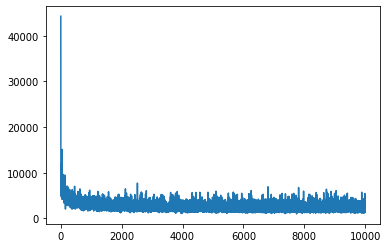

In [11]:
plt.plot(loss_history)
plt.show()

In [12]:
# 使用sklearn计算出的参数
w_sklearn = [-0.00464263, 0.01397336, -0.03886028, 0.0293388, -0.00365658, -0.04661882,
  0.03694577, -0.0054193, 0.06047693, 0.00577817, -0.0319874, 0.21899017,
 -0.22012773, -0.02856183,  0.46212953, -0.54537651, 0.01505894, 0.99127644,
 -0.46716408, 0.2627013, -0.06921504, -0.11462512, 0.06221699, 0.033768,
 -0.23443064, 0.11238785, 0.44891618] 
b_sklearn = 1.2370217163519577
w_sklearn = np.array(w_sklearn)
w_sklearn = np.reshape(w_sklearn,(3,9))

GetFinalError(w_sklearn,b_sklearn)

final error:  8351.386588867757
